# *+Processing with Sentinel bands & RN & biomass data of other authors+*

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load biomass dataset
input_data = '/home/dima/Desktop/WORK/GIS and ML algoritms/6_Est_RN&biomass_all_site_Sentinel/Pre_GIS_data/Site_with_Sentinel_bands_data.csv'
df = pd.read_csv(input_data)
df.head()

Site # Origin Dominant_s  N_trees at  A_year  D_live_cm  H_live_m  \
0      1      n      Birch          57      35       13.5      17.3   
1      2      a       Pine          25      58       15.0      16.9   
2      3      a       Pine          32      58       13.7      16.8   
3      4      a       Pine          63      58       20.3      18.4   
4      5      a       Pine          53      58       17.5      19.9   

   G_live_m2_  f_Gs_cub_m  f_M_stem_kg_m2  ...  r2019B03  r2019B04  r2019B05  \
0        15.1         123            5.83  ...  0.030628  0.266210  0.166299   
1        39.0         317           11.67  ...  0.027934  0.183349  0.102656   
2        42.8         346           12.37  ...  0.026123  0.184066  0.099625   
3        38.8         315           13.88  ...  0.027390  0.177221  0.102540   
4        48.3         383           14.51  ...  0.025702  0.183705  0.101394   

   r2019B06  r2019B07  r2019B08  r2019B09   r2019B10   r2019B11  r2019B12  
0  0.081316  0.793351 -0.733693  0.532051 -15.396488 -11.262037  0.731937  
1  0.052144  0.735493 -0.655456  0.557000 -16.012156  -9.364664  0.584920  
2  0.050684  0.751436 -0.650575  0.568148 -13.609903  -9.726108  0.715177  
3  0.052198  0.732404 -0.648310  0.544717 -14.321650 -10.457536  0.730390  
4  0.050437  0.754481 -0.660382  0.569112 -13.934375 -11.393335  0.817430  

[5 rows x 63 columns]

# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:

'Site #', 'Origin', 'Dominant_s', 'N_trees at', 'A_year', 'D_live_cm', 'H_live_m', 'G_live_m2_', 'f_Gs_cub_m', 'f_M_stem_kg_m2', 'f_M_stem_bark_kg_m2', 'f_M_crown_kg_m2', 'f_M_foliage_kg_m2', 'f_M_AG_kg_m2', 'Ln_Gs_cub_m', 'Ln_M_stem_kg_m2', 'Ln_M_stem_bark_kg_m2', 'Ln_M_crown_kg_m2', 'Ln_M_foliage_kg_m2', 'Ln_M_AG_kg_m2', 'F_Soil', 'M_Soil', 'X_N36', 'Y_N36', 'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'Ln_Cs_wood', 'Ln_Sr_wood', 'Tag_Cs', 'Tag_Sr', 'Ln_Tag_Cs', 'Ln_Tag_Sr', 'Cs_2021_kB', 'Sr_2021_kB', 'AEDR_count', 'AEDR_mean', 'Distance_k', 'Azimuth', 'r2020B01', 'r2020B02', 'r2020B03', 'r2020B04', 'r2020B05', 'r2020B06', 'r2020B07', 'r2020B08', 'r2020B09', 'r2020B10', 'r2020B11', 'r2020B12', 'r2020B13', 'r2019B01', 'r2019B02', 'r2019B03', 'r2019B04', 'r2019B05', 'r2019B06', 'r2019B07', 'r2019B08', 'r2019B09', 'r2019B10', 'r2019B11', 'r2019B12'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['Ln_Gs_cub_m', 'Ln_M_stem_kg_m2', 'Ln_M_stem_bark_kg_m2', 'Ln_M_crown_kg_m2', 'Ln_M_foliage_kg_m2', 'Ln_M_AG_kg_m2', 'Ln_Cs_wood', 'Ln_Sr_wood', 'Ln_Tag_Cs', 'Ln_Tag_Sr', 'r2019B01', 'r2019B02', 'r2019B03', 'r2019B04', 'r2019B05', 'r2019B06', 'r2019B07', 'r2019B08', 'r2019B09', 'r2019B10', 'r2019B11', 'r2019B12'])
            


# Show the first five columns
select.head()

Ln_Gs_cub_m  Ln_M_stem_kg_m2  Ln_M_stem_bark_kg_m2  Ln_M_crown_kg_m2  \
0         4.81             1.76                 -0.31             -0.16   
1         5.76             2.46                 -0.25              0.34   
2         5.85             2.52                 -0.11              0.55   
3         5.75             2.63                 -0.08              0.39   
4         5.95             2.67                  0.00              0.57   

   Ln_M_foliage_kg_m2  Ln_M_AG_kg_m2  Ln_Cs_wood  Ln_Sr_wood  Ln_Tag_Cs  \
0               -2.44           1.91         6.8         9.2       -0.7   
1               -0.20           2.63         8.2         9.6        0.6   
2               -0.21           2.70         8.4         9.6        0.8   
3               -0.35           2.78         8.1         9.4        0.5   
4               -0.37           2.83         7.7         9.4        0.2   

   Ln_Tag_Sr  ...  r2019B03  r2019B04  r2019B05  r2019B06  r2019B07  r2019B08  \
0        2.6  ...  0.030628  0.266210  0.166299  0.081316  0.793351 -0.733693   
1        2.9  ...  0.027934  0.183349  0.102656  0.052144  0.735493 -0.655456   
2        2.9  ...  0.026123  0.184066  0.099625  0.050684  0.751436 -0.650575   
3        2.7  ...  0.027390  0.177221  0.102540  0.052198  0.732404 -0.648310   
4        2.8  ...  0.025702  0.183705  0.101394  0.050437  0.754481 -0.660382   

   r2019B09   r2019B10   r2019B11  r2019B12  
0  0.532051 -15.396488 -11.262037  0.731937  
1  0.557000 -16.012156  -9.364664  0.584920  
2  0.568148 -13.609903  -9.726108  0.715177  
3  0.544717 -14.321650 -10.457536  0.730390  
4  0.569112 -13.934375 -11.393335  0.817430  

[5 rows x 22 columns]

# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ln_Gs_cub_m           205 non-null    float64
 1   Ln_M_stem_kg_m2       205 non-null    float64
 2   Ln_M_stem_bark_kg_m2  205 non-null    float64
 3   Ln_M_crown_kg_m2      205 non-null    float64
 4   Ln_M_foliage_kg_m2    205 non-null    float64
 5   Ln_M_AG_kg_m2         205 non-null    float64
 6   Ln_Cs_wood            205 non-null    float64
 7   Ln_Sr_wood            205 non-null    float64
 8   Ln_Tag_Cs             205 non-null    float64
 9   Ln_Tag_Sr             205 non-null    float64
 10  r2019B01              205 non-null    float64
 11  r2019B02              205 non-null    float64
 12  r2019B03              205 non-null    float64
 13  r2019B04              205 non-null    float64
 14  r2019B05              205 non-null    float64
 15  r2019B06              2

In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Dominant_s"])["f_Gs_cub_m", "f_M_stem_kg_m2"].describe()

/tmp/ipykernel_21104/4147815954.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["Dominant_s"])["f_Gs_cub_m", "f_M_stem_kg_m2"].describe()


f_Gs_cub_m                                                      \
                count        mean         std    min    25%    50%    75%   
Dominant_s                                                                  
Alder            13.0  393.153846  113.795757  199.0  311.0  434.0  462.0   
Aspen             7.0  241.571429  134.878782  121.0  147.0  194.0  321.0   
Birch            45.0  164.622222   83.668254   11.0  107.0  157.0  222.0   
Oak               9.0  199.777778   88.192655   79.0  112.0  220.0  255.0   
Pine            130.0  299.023077  185.204955    2.0  144.0  316.0  451.0   
Spruce            1.0  619.000000         NaN  619.0  619.0  619.0  619.0   

                  f_M_stem_kg_m2                                             \
              max          count       mean       std    min     25%    50%   
Dominant_s                                                                    
Alder       558.0           13.0  16.823846  4.334304   9.90  13.560  16.96   
Aspen       440.0            7.0  11.862857  7.997334   4.64   6.470   9.79   
Birch       346.0           45.0   8.030444  4.090891   0.84   4.960   7.75   
Oak         313.0            9.0  10.728889  4.976167   3.59   5.870  11.72   
Pine        671.0          130.0  11.784154  7.069419   0.05   5.915  11.96   
Spruce      619.0            1.0  23.830000       NaN  23.83  23.830  23.83   

                           
               75%    max  
Dominant_s                 
Alder       20.130  24.29  
Aspen       14.810  26.05  
Birch       10.990  17.00  
Oak         13.590  18.99  
Pine        17.305  25.37  
Spruce      23.830  23.83

In [6]:
# Descriptive statistics of main parameters
select.describe()

Ln_Gs_cub_m  Ln_M_stem_kg_m2  Ln_M_stem_bark_kg_m2  Ln_M_crown_kg_m2  \
count   205.000000       205.000000            205.000000        205.000000   
mean      5.224390         2.071854             -0.042439          0.168537   
std       1.125422         1.119577              0.780389          0.583474   
min       0.690000        -3.000000             -3.910000         -1.560000   
25%       4.930000         1.770000             -0.190000         -0.030000   
50%       5.510000         2.410000              0.060000          0.310000   
75%       5.980000         2.800000              0.370000          0.530000   
max       6.510000         3.260000              1.650000          1.410000   

       Ln_M_foliage_kg_m2  Ln_M_AG_kg_m2  Ln_Cs_wood  Ln_Sr_wood   Ln_Tag_Cs  \
count          205.000000     205.000000  205.000000  205.000000  205.000000   
mean            -0.941463       2.297463    5.995610    7.382927   -0.620000   
std              0.714443       0.926225    2.084309    2.041062    1.275808   
min             -2.920000      -0.800000    1.600000    2.400000   -4.700000   
25%             -1.510000       2.050000    4.100000    5.800000   -1.400000   
50%             -0.680000       2.570000    6.300000    7.500000   -0.500000   
75%             -0.360000       2.930000    7.300000    8.700000    0.300000   
max              0.110000       3.390000   11.400000   13.900000    1.700000   

        Ln_Tag_Sr  ...    r2019B03    r2019B04    r2019B05    r2019B06  \
count  205.000000  ...  205.000000  205.000000  205.000000  205.000000   
mean     2.310732  ...    0.028895    0.219361    0.131344    0.068068   
std      0.951460  ...    0.010704    0.049137    0.036023    0.026479   
min     -0.300000  ...    0.015301    0.140309    0.078918    0.035914   
25%      1.700000  ...    0.022685    0.183403    0.102471    0.051182   
50%      2.400000  ...    0.026123    0.199665    0.121704    0.060839   
75%      3.000000  ...    0.030628    0.250913    0.153232    0.078586   
max      4.700000  ...    0.081675    0.423326    0.252487    0.196544   

         r2019B07    r2019B08    r2019B09    r2019B10    r2019B11    r2019B12  
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000  
mean     0.759654   -0.692408    0.526662  -15.737088  -10.490763    0.668847  
std      0.091469    0.070703    0.144729    1.547144    1.471517    0.081010  
min      0.363395   -0.849155   -0.037478  -22.820204  -16.820473    0.386847  
25%      0.727961   -0.735660    0.470852  -16.494671  -11.364958    0.615553  
50%      0.771691   -0.693779    0.562326  -15.454248  -10.299303    0.666882  
75%      0.814177   -0.660039    0.626609  -14.760403   -9.547850    0.728737  
max      0.914709   -0.389420    0.740912  -12.365163   -5.703308    0.877743  

[8 rows x 22 columns]

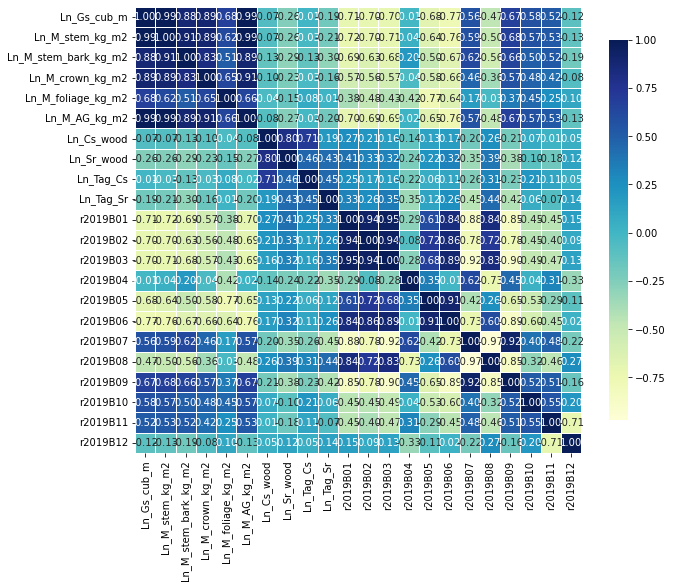

In [7]:
# Correlation matrix

import seaborn as sns # for correlation heatmap

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();
    
correlation_heatmap(select)

# Selecting working columns for the XGBoost algorithms

In [8]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns= ['r2019B01', 'r2019B04', 'r2019B06', 'r2019B10', 'r2019B11'])
y = pd.DataFrame(select, columns= ['Ln_M_stem_kg_m2'])

In [9]:
# Add to 'X' data colection new colomns with sintetic/random data: selest "Yes" or "No".
question=input("Choose an option - Add a synthetic column with random values!!! (Yes or No):")

if question == 'Yes':
    count = y.count()
    norm_random_1 = np.random.normal(10, 2, size=count)
    norm_random_2 = np.random.normal(10, 2, size=count)
    norm_random_3 = np.random.normal(10, 2, size=count)
    norm_random_4 = np.random.normal(10, 2, size=count)
    norm_random_5 = np.random.normal(10, 2, size=count)
    X['Random1'] = norm_random_1
    X['Random2'] = norm_random_2
    X['Random3'] = norm_random_3
    X['Random4'] = norm_random_4
    X['Random5'] = norm_random_5
    
    print('Selected "Yes"!!! A new column with random values was created.')
elif question == 'No':
    print('Selected "No"!!! A new column with random values was not created.')
else:
    print('Error!!! Typed no corectly text!!!')

Choose an option - Add a synthetic column with random values!!! (Yes or No): No


Selected "No"!!! A new column with random values was not created.


In [10]:
# Columns in "X" data collections
X.head()

r2019B01  r2019B04  r2019B06   r2019B10   r2019B11
0  0.025483  0.266210  0.081316 -15.396488 -11.262037
1  0.024075  0.183349  0.052144 -16.012156  -9.364664
2  0.022492  0.184066  0.050684 -13.609903  -9.726108
3  0.023742  0.177221  0.052198 -14.321650 -10.457536
4  0.022916  0.183705  0.050437 -13.934375 -11.393335

In [11]:
# Columns in "y" data collections
y.head()

Ln_M_stem_kg_m2
0             1.76
1             2.46
2             2.52
3             2.63
4             2.67

# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.42462534326331425, 0.3239515281358568, 0.5761708375296004]
    Mean: 0.442
    Std: 0.104

 --------------------
Root-mean-square error (RMSE): 

    Scores: [0.99362585 0.92093311 0.79425801]
    Mean: 0.903
    Std: 0.082

 --------------------
Mean absolute error (MAE): 

    Scores: [0.5190736244597296, 0.6344261739709799, 0.5221075836152714]
    Mean: 0.559
    Std: 0.054

 --------------------


# Find optimal hyperparameters for XGBoost model

In [16]:
# Create function for present of hyperparameters and main scores
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            global hps
            hps =  results['params'][candidate]
            print("")

In [17]:
# Tuning XGBoost parameters
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", eval_metric="rmse")
params = {
    "colsample_bytree": uniform(0.05, 0.9),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.01, 0.3), # default 0.1 
    "max_depth": randint(2, 5), # default 3
    "n_estimators": randint(50, 200), # default 100
    "subsample": uniform(0.3, 0.7)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=10000, cv=5, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y)

report_best_scores(search.cv_results_, 1)

Fitting 5 folds for each of 10000 candidates, totalling 50000 fits
Model with rank: 1
Mean validation score: 0.483 (std: 0.209)
Parameters: {'colsample_bytree': 0.8788354783773641, 'gamma': 0.4735445391139459, 'learning_rate': 0.16434905209004702, 'max_depth': 2, 'n_estimators': 126, 'subsample': 0.35621227697003477}



In [18]:
# All output data for XGBoost models after tuning parameters
print(search.cv_results_)

{'mean_fit_time': array([0.27943339, 0.09847732, 0.23097978, ..., 0.31195445, 0.1908216 ,
       0.18478189]), 'std_fit_time': array([0.02929366, 0.00513386, 0.01849574, ..., 0.01605451, 0.00577472,
       0.00275219]), 'mean_score_time': array([0.00498075, 0.00447183, 0.00458651, ..., 0.00448055, 0.00454416,
       0.00663362]), 'std_score_time': array([7.92477168e-04, 1.67155359e-04, 1.73565542e-04, ...,
       1.24626881e-04, 9.12200326e-05, 4.68033709e-03]), 'param_colsample_bytree': masked_array(data=[0.7534007509283936, 0.1143316209171244,
                   0.29494314591411575, ..., 0.29559448189088683,
                   0.6758808984696376, 0.848333557830298],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.03516638347134565, 0.43029420805543644,
                   0.34233825963705333, ..., 0.23091911826318817,
                   0.15050751953191494, 0.2773333281930022],
   

In [19]:
# Overwrite hyperparameters data for the next step/stage
p1 = hps['colsample_bytree']     # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = hps['gamma']                # gamma
print('Gamma: ' + str(p2))

p3 = hps['learning_rate']        # learning_rate
print('Learning_rate: ' + str(p3))

p4 = hps['max_depth']            # max_depth
print('Max_depth: ' + str(p4))

p5 = hps['n_estimators']         # n_estimators
print('N_estimators: ' + str(p5))

p6 = hps['subsample']            # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.8788354783773641
Gamma: 0.4735445391139459
Learning_rate: 0.16434905209004702
Max_depth: 2
N_estimators: 126
Subsample: 0.35621227697003477


# Estimation of a basic XGBoost model using Loops

In [20]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [21]:
# Aggregate parameters
aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

# Body loop
for i in range(500):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()
    rel_bias = bias/y_mean_sample
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample    
        
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    #Add values to lists    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)

[0]	validation_0-rmse:1.66493	validation_1-rmse:1.73042
[1]	validation_0-rmse:1.46655	validation_1-rmse:1.49283
[2]	validation_0-rmse:1.30590	validation_1-rmse:1.32001
[3]	validation_0-rmse:1.15923	validation_1-rmse:1.17901
[4]	validation_0-rmse:1.03253	validation_1-rmse:1.05465
[5]	validation_0-rmse:0.95593	validation_1-rmse:0.97343
[6]	validation_0-rmse:0.87424	validation_1-rmse:0.89339
[7]	validation_0-rmse:0.81357	validation_1-rmse:0.84529
[8]	validation_0-rmse:0.76977	validation_1-rmse:0.78861
[9]	validation_0-rmse:0.74825	validation_1-rmse:0.76370
[10]	validation_0-rmse:0.71805	validation_1-rmse:0.74318
[11]	validation_0-rmse:0.69454	validation_1-rmse:0.71579
[12]	validation_0-rmse:0.67458	validation_1-rmse:0.69453
[13]	validation_0-rmse:0.66009	validation_1-rmse:0.66674


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.63553	validation_1-rmse:0.67470
[15]	validation_0-rmse:0.62903	validation_1-rmse:0.67070
[16]	validation_0-rmse:0.62132	validation_1-rmse:0.66602
[17]	validation_0-rmse:0.60946	validation_1-rmse:0.68778
[18]	validation_0-rmse:0.59901	validation_1-rmse:0.69515
[19]	validation_0-rmse:0.58832	validation_1-rmse:0.68498
[20]	validation_0-rmse:0.58467	validation_1-rmse:0.66881
[21]	validation_0-rmse:0.57708	validation_1-rmse:0.67344
[22]	validation_0-rmse:0.57339	validation_1-rmse:0.68077
[23]	validation_0-rmse:0.56693	validation_1-rmse:0.68409
[24]	validation_0-rmse:0.56697	validation_1-rmse:0.69205
[25]	validation_0-rmse:0.56311	validation_1-rmse:0.67585
[26]	validation_0-rmse:0.55505	validation_1-rmse:0.65274
[27]	validation_0-rmse:0.55212	validation_1-rmse:0.66240
[28]	validation_0-rmse:0.54778	validation_1-rmse:0.64721
[29]	validation_0-rmse:0.54477	validation_1-rmse:0.64281
[30]	validation_0-rmse:0.54128	validation_1-rmse:0.63411
[31]	validation_0-rmse:0.53745	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.53065	validation_1-rmse:0.79204
[22]	validation_0-rmse:0.52675	validation_1-rmse:0.78490
[23]	validation_0-rmse:0.51571	validation_1-rmse:0.78209
[24]	validation_0-rmse:0.51308	validation_1-rmse:0.80395
[25]	validation_0-rmse:0.51110	validation_1-rmse:0.79926
[26]	validation_0-rmse:0.50524	validation_1-rmse:0.81772
[27]	validation_0-rmse:0.49541	validation_1-rmse:0.81616
[28]	validation_0-rmse:0.49171	validation_1-rmse:0.81541
[29]	validation_0-rmse:0.48959	validation_1-rmse:0.81596
[30]	validation_0-rmse:0.48524	validation_1-rmse:0.81897
[31]	validation_0-rmse:0.48131	validation_1-rmse:0.83058
[32]	validation_0-rmse:0.47357	validation_1-rmse:0.84055
[33]	validation_0-rmse:0.46566	validation_1-rmse:0.85521
[34]	validation_0-rmse:0.46224	validation_1-rmse:0.85376
[35]	validation_0-rmse:0.46222	validation_1-rmse:0.85370
[36]	validation_0-rmse:0.45529	validation_1-rmse:0.86302
[37]	validation_0-rmse:0.45210	validation_1-rmse:0.86152
[38]	validation_0-rmse:0.44943	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.55295	validation_1-rmse:0.76291
[24]	validation_0-rmse:0.54695	validation_1-rmse:0.76165
[25]	validation_0-rmse:0.54241	validation_1-rmse:0.76114
[26]	validation_0-rmse:0.54090	validation_1-rmse:0.77085
[27]	validation_0-rmse:0.53891	validation_1-rmse:0.79064
[28]	validation_0-rmse:0.53992	validation_1-rmse:0.81627
[29]	validation_0-rmse:0.53342	validation_1-rmse:0.81678
[0]	validation_0-rmse:1.67697	validation_1-rmse:1.66425
[1]	validation_0-rmse:1.47455	validation_1-rmse:1.46995
[2]	validation_0-rmse:1.29540	validation_1-rmse:1.29458
[3]	validation_0-rmse:1.15729	validation_1-rmse:1.14021
[4]	validation_0-rmse:1.03279	validation_1-rmse:1.03831
[5]	validation_0-rmse:0.94991	validation_1-rmse:0.97795
[6]	validation_0-rmse:0.87326	validation_1-rmse:0.90821
[7]	validation_0-rmse:0.81599	validation_1-rmse:0.88215
[8]	validation_0-rmse:0.78290	validation_1-rmse:0.84476
[9]	validation_0-rmse:0.74171	validation_1-rmse:0.83741
[10]	validation_0-rmse:0.70668	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.57667	validation_1-rmse:0.67619
[22]	validation_0-rmse:0.57321	validation_1-rmse:0.66756
[23]	validation_0-rmse:0.56745	validation_1-rmse:0.68506
[24]	validation_0-rmse:0.56036	validation_1-rmse:0.68363
[25]	validation_0-rmse:0.55514	validation_1-rmse:0.68290
[26]	validation_0-rmse:0.55378	validation_1-rmse:0.68168
[27]	validation_0-rmse:0.54097	validation_1-rmse:0.69366
[28]	validation_0-rmse:0.53505	validation_1-rmse:0.69617
[29]	validation_0-rmse:0.52872	validation_1-rmse:0.69912
[30]	validation_0-rmse:0.52778	validation_1-rmse:0.69590
[31]	validation_0-rmse:0.52725	validation_1-rmse:0.71459
[32]	validation_0-rmse:0.52374	validation_1-rmse:0.72801
[33]	validation_0-rmse:0.52232	validation_1-rmse:0.71534
[34]	validation_0-rmse:0.51461	validation_1-rmse:0.70207
[35]	validation_0-rmse:0.51057	validation_1-rmse:0.69420
[36]	validation_0-rmse:0.50543	validation_1-rmse:0.69625
[37]	validation_0-rmse:0.50097	validation_1-rmse:0.68847
[38]	validation_0-rmse:0.49479	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.64654	validation_1-rmse:0.57346
[14]	validation_0-rmse:0.63340	validation_1-rmse:0.56260
[15]	validation_0-rmse:0.62454	validation_1-rmse:0.54762
[16]	validation_0-rmse:0.61558	validation_1-rmse:0.54786
[17]	validation_0-rmse:0.60435	validation_1-rmse:0.54965
[18]	validation_0-rmse:0.59815	validation_1-rmse:0.54513
[19]	validation_0-rmse:0.59442	validation_1-rmse:0.55267
[20]	validation_0-rmse:0.59227	validation_1-rmse:0.55569
[21]	validation_0-rmse:0.58461	validation_1-rmse:0.56991
[22]	validation_0-rmse:0.57274	validation_1-rmse:0.54156
[23]	validation_0-rmse:0.56546	validation_1-rmse:0.53358
[24]	validation_0-rmse:0.56145	validation_1-rmse:0.53156
[25]	validation_0-rmse:0.55951	validation_1-rmse:0.54501
[26]	validation_0-rmse:0.55617	validation_1-rmse:0.53384
[27]	validation_0-rmse:0.55370	validation_1-rmse:0.55218
[28]	validation_0-rmse:0.54945	validation_1-rmse:0.55174
[29]	validation_0-rmse:0.54442	validation_1-rmse:0.55749
[30]	validation_0-rmse:0.53880	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:0.67981	validation_1-rmse:0.58271
[12]	validation_0-rmse:0.66326	validation_1-rmse:0.57087
[13]	validation_0-rmse:0.65259	validation_1-rmse:0.56034
[14]	validation_0-rmse:0.63577	validation_1-rmse:0.55228
[15]	validation_0-rmse:0.62188	validation_1-rmse:0.53979
[16]	validation_0-rmse:0.61497	validation_1-rmse:0.53466
[17]	validation_0-rmse:0.61202	validation_1-rmse:0.52788
[18]	validation_0-rmse:0.60546	validation_1-rmse:0.52323
[19]	validation_0-rmse:0.59725	validation_1-rmse:0.52536
[20]	validation_0-rmse:0.58966	validation_1-rmse:0.53561
[21]	validation_0-rmse:0.57997	validation_1-rmse:0.55184
[22]	validation_0-rmse:0.57371	validation_1-rmse:0.54365
[23]	validation_0-rmse:0.55983	validation_1-rmse:0.55520
[24]	validation_0-rmse:0.55694	validation_1-rmse:0.55388
[25]	validation_0-rmse:0.55009	validation_1-rmse:0.55281
[26]	validation_0-rmse:0.54268	validation_1-rmse:0.55177
[27]	validation_0-rmse:0.53266	validation_1-rmse:0.56207
[28]	validation_0-rmse:0.52407	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:0.62042	validation_1-rmse:1.05883
[11]	validation_0-rmse:0.59696	validation_1-rmse:1.06621
[12]	validation_0-rmse:0.57376	validation_1-rmse:1.04201
[13]	validation_0-rmse:0.55920	validation_1-rmse:1.04476
[14]	validation_0-rmse:0.54772	validation_1-rmse:1.03158
[15]	validation_0-rmse:0.52473	validation_1-rmse:1.01173
[16]	validation_0-rmse:0.51436	validation_1-rmse:1.01014
[17]	validation_0-rmse:0.50809	validation_1-rmse:1.03664
[18]	validation_0-rmse:0.49501	validation_1-rmse:1.01743
[19]	validation_0-rmse:0.48097	validation_1-rmse:0.99684
[20]	validation_0-rmse:0.47413	validation_1-rmse:0.99671
[21]	validation_0-rmse:0.46458	validation_1-rmse:1.01151
[22]	validation_0-rmse:0.46073	validation_1-rmse:1.01896
[23]	validation_0-rmse:0.45962	validation_1-rmse:1.02383
[24]	validation_0-rmse:0.45842	validation_1-rmse:1.01457
[25]	validation_0-rmse:0.44979	validation_1-rmse:0.99359
[26]	validation_0-rmse:0.44652	validation_1-rmse:1.00409
[27]	validation_0-rmse:0.44310	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.53787	validation_1-rmse:0.78670
[22]	validation_0-rmse:0.52872	validation_1-rmse:0.79702
[23]	validation_0-rmse:0.52351	validation_1-rmse:0.78480
[24]	validation_0-rmse:0.51758	validation_1-rmse:0.78677
[25]	validation_0-rmse:0.51500	validation_1-rmse:0.78610
[26]	validation_0-rmse:0.51401	validation_1-rmse:0.79812
[27]	validation_0-rmse:0.51123	validation_1-rmse:0.81195
[28]	validation_0-rmse:0.50539	validation_1-rmse:0.81009
[29]	validation_0-rmse:0.50203	validation_1-rmse:0.81598
[30]	validation_0-rmse:0.49928	validation_1-rmse:0.81789
[31]	validation_0-rmse:0.49565	validation_1-rmse:0.80902
[32]	validation_0-rmse:0.49504	validation_1-rmse:0.81191
[33]	validation_0-rmse:0.48936	validation_1-rmse:0.80348
[0]	validation_0-rmse:1.68107	validation_1-rmse:1.61364
[1]	validation_0-rmse:1.48458	validation_1-rmse:1.42288
[2]	validation_0-rmse:1.30813	validation_1-rmse:1.26706
[3]	validation_0-rmse:1.16346	validation_1-rmse:1.14515
[4]	validation_0-rmse:1.04869	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.63504	validation_1-rmse:0.74481
[14]	validation_0-rmse:0.62690	validation_1-rmse:0.73706
[15]	validation_0-rmse:0.61393	validation_1-rmse:0.74006
[16]	validation_0-rmse:0.60238	validation_1-rmse:0.73945
[17]	validation_0-rmse:0.59620	validation_1-rmse:0.74320
[18]	validation_0-rmse:0.58617	validation_1-rmse:0.75640
[19]	validation_0-rmse:0.57876	validation_1-rmse:0.75539
[20]	validation_0-rmse:0.56912	validation_1-rmse:0.75609
[21]	validation_0-rmse:0.56792	validation_1-rmse:0.75748
[22]	validation_0-rmse:0.55635	validation_1-rmse:0.75289
[23]	validation_0-rmse:0.54821	validation_1-rmse:0.77029
[24]	validation_0-rmse:0.54227	validation_1-rmse:0.78250
[25]	validation_0-rmse:0.53929	validation_1-rmse:0.77274
[26]	validation_0-rmse:0.53218	validation_1-rmse:0.77481
[27]	validation_0-rmse:0.52373	validation_1-rmse:0.78686
[28]	validation_0-rmse:0.51585	validation_1-rmse:0.77801
[29]	validation_0-rmse:0.50697	validation_1-rmse:0.78073
[30]	validation_0-rmse:0.50497	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:0.64837	validation_1-rmse:0.99567
[11]	validation_0-rmse:0.62041	validation_1-rmse:0.97136
[12]	validation_0-rmse:0.59893	validation_1-rmse:0.94151
[13]	validation_0-rmse:0.58550	validation_1-rmse:0.93185
[14]	validation_0-rmse:0.57293	validation_1-rmse:0.92015
[15]	validation_0-rmse:0.56628	validation_1-rmse:0.90632
[16]	validation_0-rmse:0.55746	validation_1-rmse:0.89956
[17]	validation_0-rmse:0.54324	validation_1-rmse:0.87595
[18]	validation_0-rmse:0.54053	validation_1-rmse:0.85971
[19]	validation_0-rmse:0.52883	validation_1-rmse:0.85796
[20]	validation_0-rmse:0.52075	validation_1-rmse:0.87356
[21]	validation_0-rmse:0.51299	validation_1-rmse:0.87974
[22]	validation_0-rmse:0.50324	validation_1-rmse:0.88488
[23]	validation_0-rmse:0.49677	validation_1-rmse:0.87793
[24]	validation_0-rmse:0.49461	validation_1-rmse:0.88147
[25]	validation_0-rmse:0.49145	validation_1-rmse:0.87229
[26]	validation_0-rmse:0.48563	validation_1-rmse:0.87404
[27]	validation_0-rmse:0.47967	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.60230	validation_1-rmse:0.67897
[28]	validation_0-rmse:0.59352	validation_1-rmse:0.66228
[29]	validation_0-rmse:0.58637	validation_1-rmse:0.64895
[30]	validation_0-rmse:0.57602	validation_1-rmse:0.65559
[31]	validation_0-rmse:0.57151	validation_1-rmse:0.64799
[32]	validation_0-rmse:0.56902	validation_1-rmse:0.64509
[33]	validation_0-rmse:0.56501	validation_1-rmse:0.63767
[34]	validation_0-rmse:0.56000	validation_1-rmse:0.62842
[35]	validation_0-rmse:0.55746	validation_1-rmse:0.61403
[36]	validation_0-rmse:0.55048	validation_1-rmse:0.62706
[37]	validation_0-rmse:0.54019	validation_1-rmse:0.63192
[38]	validation_0-rmse:0.53511	validation_1-rmse:0.64475
[39]	validation_0-rmse:0.52879	validation_1-rmse:0.64390
[40]	validation_0-rmse:0.52501	validation_1-rmse:0.63631
[41]	validation_0-rmse:0.52312	validation_1-rmse:0.64041
[42]	validation_0-rmse:0.51937	validation_1-rmse:0.63177
[43]	validation_0-rmse:0.51936	validation_1-rmse:0.63280
[44]	validation_0-rmse:0.51153	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.55891	validation_1-rmse:0.91070
[17]	validation_0-rmse:0.55204	validation_1-rmse:0.90849
[18]	validation_0-rmse:0.53984	validation_1-rmse:0.90611
[19]	validation_0-rmse:0.53756	validation_1-rmse:0.89987
[20]	validation_0-rmse:0.53961	validation_1-rmse:0.90421
[21]	validation_0-rmse:0.52540	validation_1-rmse:0.89698
[22]	validation_0-rmse:0.52390	validation_1-rmse:0.89946
[23]	validation_0-rmse:0.51328	validation_1-rmse:0.90209
[24]	validation_0-rmse:0.50578	validation_1-rmse:0.90172
[25]	validation_0-rmse:0.49512	validation_1-rmse:0.89964
[26]	validation_0-rmse:0.49176	validation_1-rmse:0.89738
[27]	validation_0-rmse:0.48611	validation_1-rmse:0.89092
[0]	validation_0-rmse:1.67230	validation_1-rmse:1.60624
[1]	validation_0-rmse:1.47751	validation_1-rmse:1.39866
[2]	validation_0-rmse:1.30711	validation_1-rmse:1.23084
[3]	validation_0-rmse:1.17250	validation_1-rmse:1.07962
[4]	validation_0-rmse:1.05569	validation_1-rmse:0.97410
[5]	validation_0-rmse:0.95279	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.60530	validation_1-rmse:0.62300
[19]	validation_0-rmse:0.60030	validation_1-rmse:0.63768
[20]	validation_0-rmse:0.59327	validation_1-rmse:0.63216
[21]	validation_0-rmse:0.58645	validation_1-rmse:0.62993
[22]	validation_0-rmse:0.57713	validation_1-rmse:0.64183
[23]	validation_0-rmse:0.57707	validation_1-rmse:0.64555
[24]	validation_0-rmse:0.57707	validation_1-rmse:0.64934
[25]	validation_0-rmse:0.56837	validation_1-rmse:0.64099
[26]	validation_0-rmse:0.57061	validation_1-rmse:0.65499
[27]	validation_0-rmse:0.56641	validation_1-rmse:0.65036
[28]	validation_0-rmse:0.55709	validation_1-rmse:0.64335
[29]	validation_0-rmse:0.55008	validation_1-rmse:0.63202
[30]	validation_0-rmse:0.54436	validation_1-rmse:0.63639
[31]	validation_0-rmse:0.54225	validation_1-rmse:0.63008
[32]	validation_0-rmse:0.53533	validation_1-rmse:0.62159
[33]	validation_0-rmse:0.53097	validation_1-rmse:0.63053
[34]	validation_0-rmse:0.52507	validation_1-rmse:0.62126
[35]	validation_0-rmse:0.52430	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.56859	validation_1-rmse:0.91209
[18]	validation_0-rmse:0.55197	validation_1-rmse:0.94700
[19]	validation_0-rmse:0.54300	validation_1-rmse:0.94325
[20]	validation_0-rmse:0.53308	validation_1-rmse:0.94187
[21]	validation_0-rmse:0.52007	validation_1-rmse:0.92277
[22]	validation_0-rmse:0.51132	validation_1-rmse:0.92509
[23]	validation_0-rmse:0.49853	validation_1-rmse:0.93473
[24]	validation_0-rmse:0.49129	validation_1-rmse:0.93277
[25]	validation_0-rmse:0.48550	validation_1-rmse:0.93504
[26]	validation_0-rmse:0.48295	validation_1-rmse:0.94624
[27]	validation_0-rmse:0.47610	validation_1-rmse:0.93129
[28]	validation_0-rmse:0.46833	validation_1-rmse:0.91372
[29]	validation_0-rmse:0.46475	validation_1-rmse:0.91667
[30]	validation_0-rmse:0.46125	validation_1-rmse:0.91754
[31]	validation_0-rmse:0.45850	validation_1-rmse:0.90588
[32]	validation_0-rmse:0.45262	validation_1-rmse:0.92162
[33]	validation_0-rmse:0.45071	validation_1-rmse:0.93392
[34]	validation_0-rmse:0.44851	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.57975	validation_1-rmse:0.45086
[20]	validation_0-rmse:0.57887	validation_1-rmse:0.45077
[21]	validation_0-rmse:0.57269	validation_1-rmse:0.45115
[22]	validation_0-rmse:0.56621	validation_1-rmse:0.43855
[23]	validation_0-rmse:0.55790	validation_1-rmse:0.43808
[24]	validation_0-rmse:0.55078	validation_1-rmse:0.42924
[25]	validation_0-rmse:0.54556	validation_1-rmse:0.43866
[26]	validation_0-rmse:0.53967	validation_1-rmse:0.43780
[27]	validation_0-rmse:0.53899	validation_1-rmse:0.43671
[28]	validation_0-rmse:0.53170	validation_1-rmse:0.44742
[29]	validation_0-rmse:0.52539	validation_1-rmse:0.44695
[30]	validation_0-rmse:0.51849	validation_1-rmse:0.44667
[31]	validation_0-rmse:0.51572	validation_1-rmse:0.44397
[32]	validation_0-rmse:0.51363	validation_1-rmse:0.44200
[33]	validation_0-rmse:0.50477	validation_1-rmse:0.44189
[34]	validation_0-rmse:0.49843	validation_1-rmse:0.44890
[35]	validation_0-rmse:0.49216	validation_1-rmse:0.43293
[36]	validation_0-rmse:0.48692	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.62080	validation_1-rmse:0.63431
[15]	validation_0-rmse:0.60636	validation_1-rmse:0.62053
[16]	validation_0-rmse:0.59844	validation_1-rmse:0.60580
[17]	validation_0-rmse:0.59331	validation_1-rmse:0.59944
[18]	validation_0-rmse:0.58625	validation_1-rmse:0.59292
[19]	validation_0-rmse:0.58475	validation_1-rmse:0.60131
[20]	validation_0-rmse:0.58216	validation_1-rmse:0.58318
[21]	validation_0-rmse:0.57825	validation_1-rmse:0.56106
[22]	validation_0-rmse:0.57275	validation_1-rmse:0.56372
[23]	validation_0-rmse:0.56835	validation_1-rmse:0.56669
[24]	validation_0-rmse:0.56463	validation_1-rmse:0.57339
[25]	validation_0-rmse:0.56322	validation_1-rmse:0.56359
[26]	validation_0-rmse:0.55815	validation_1-rmse:0.55046
[27]	validation_0-rmse:0.55788	validation_1-rmse:0.56594
[28]	validation_0-rmse:0.55534	validation_1-rmse:0.57236
[29]	validation_0-rmse:0.55641	validation_1-rmse:0.56940
[30]	validation_0-rmse:0.55171	validation_1-rmse:0.56377
[31]	validation_0-rmse:0.54692	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.58688	validation_1-rmse:0.59138
[25]	validation_0-rmse:0.58196	validation_1-rmse:0.57929
[26]	validation_0-rmse:0.57242	validation_1-rmse:0.55444
[27]	validation_0-rmse:0.57036	validation_1-rmse:0.55691
[28]	validation_0-rmse:0.56445	validation_1-rmse:0.55069
[29]	validation_0-rmse:0.55983	validation_1-rmse:0.55795
[30]	validation_0-rmse:0.55167	validation_1-rmse:0.55781
[31]	validation_0-rmse:0.54682	validation_1-rmse:0.57404
[32]	validation_0-rmse:0.54406	validation_1-rmse:0.58799
[33]	validation_0-rmse:0.54010	validation_1-rmse:0.58177
[34]	validation_0-rmse:0.53378	validation_1-rmse:0.56815
[35]	validation_0-rmse:0.53296	validation_1-rmse:0.56604
[36]	validation_0-rmse:0.52692	validation_1-rmse:0.56022
[37]	validation_0-rmse:0.52894	validation_1-rmse:0.58133
[38]	validation_0-rmse:0.53125	validation_1-rmse:0.58210
[39]	validation_0-rmse:0.52634	validation_1-rmse:0.56265
[40]	validation_0-rmse:0.52048	validation_1-rmse:0.56012
[41]	validation_0-rmse:0.51686	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.62535	validation_1-rmse:0.49631
[21]	validation_0-rmse:0.61691	validation_1-rmse:0.50318
[22]	validation_0-rmse:0.60589	validation_1-rmse:0.51386
[23]	validation_0-rmse:0.59999	validation_1-rmse:0.50645
[24]	validation_0-rmse:0.59428	validation_1-rmse:0.51254
[25]	validation_0-rmse:0.58424	validation_1-rmse:0.49906
[26]	validation_0-rmse:0.58611	validation_1-rmse:0.50523
[27]	validation_0-rmse:0.57848	validation_1-rmse:0.49553
[28]	validation_0-rmse:0.57380	validation_1-rmse:0.49061
[29]	validation_0-rmse:0.56619	validation_1-rmse:0.48852
[30]	validation_0-rmse:0.56391	validation_1-rmse:0.48021
[31]	validation_0-rmse:0.55552	validation_1-rmse:0.47864
[32]	validation_0-rmse:0.55224	validation_1-rmse:0.47935
[33]	validation_0-rmse:0.54897	validation_1-rmse:0.48154
[34]	validation_0-rmse:0.55001	validation_1-rmse:0.47971
[35]	validation_0-rmse:0.55384	validation_1-rmse:0.47970
[36]	validation_0-rmse:0.55479	validation_1-rmse:0.46973
[37]	validation_0-rmse:0.54922	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.56088	validation_1-rmse:1.01550
[16]	validation_0-rmse:0.55512	validation_1-rmse:1.01124
[17]	validation_0-rmse:0.54463	validation_1-rmse:1.01022
[18]	validation_0-rmse:0.53505	validation_1-rmse:1.01970
[19]	validation_0-rmse:0.52776	validation_1-rmse:1.01461
[20]	validation_0-rmse:0.52562	validation_1-rmse:1.01615
[21]	validation_0-rmse:0.51922	validation_1-rmse:1.00943
[22]	validation_0-rmse:0.51684	validation_1-rmse:1.01621
[23]	validation_0-rmse:0.51113	validation_1-rmse:1.01928
[24]	validation_0-rmse:0.49979	validation_1-rmse:1.01910
[25]	validation_0-rmse:0.49479	validation_1-rmse:1.02254
[26]	validation_0-rmse:0.49303	validation_1-rmse:1.02829
[27]	validation_0-rmse:0.48730	validation_1-rmse:1.03712
[28]	validation_0-rmse:0.48091	validation_1-rmse:1.04155
[29]	validation_0-rmse:0.47009	validation_1-rmse:1.03403
[0]	validation_0-rmse:1.62640	validation_1-rmse:1.89893
[1]	validation_0-rmse:1.40716	validation_1-rmse:1.71628
[2]	validation_0-rmse:1.23756	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.57486	validation_1-rmse:0.89191
[15]	validation_0-rmse:0.56040	validation_1-rmse:0.88864
[16]	validation_0-rmse:0.55289	validation_1-rmse:0.88993
[17]	validation_0-rmse:0.54753	validation_1-rmse:0.88507
[18]	validation_0-rmse:0.54406	validation_1-rmse:0.87531
[19]	validation_0-rmse:0.53757	validation_1-rmse:0.90453
[20]	validation_0-rmse:0.53087	validation_1-rmse:0.88862
[21]	validation_0-rmse:0.52098	validation_1-rmse:0.87929
[22]	validation_0-rmse:0.51687	validation_1-rmse:0.88860
[23]	validation_0-rmse:0.51237	validation_1-rmse:0.88153
[24]	validation_0-rmse:0.50740	validation_1-rmse:0.85565
[25]	validation_0-rmse:0.50877	validation_1-rmse:0.84689
[26]	validation_0-rmse:0.50290	validation_1-rmse:0.84199
[27]	validation_0-rmse:0.49930	validation_1-rmse:0.84395
[28]	validation_0-rmse:0.49492	validation_1-rmse:0.84518
[29]	validation_0-rmse:0.49405	validation_1-rmse:0.86356
[30]	validation_0-rmse:0.49479	validation_1-rmse:0.86264
[31]	validation_0-rmse:0.49261	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.61843	validation_1-rmse:0.73754
[15]	validation_0-rmse:0.60843	validation_1-rmse:0.72853
[16]	validation_0-rmse:0.59766	validation_1-rmse:0.72402
[17]	validation_0-rmse:0.59009	validation_1-rmse:0.73042
[18]	validation_0-rmse:0.58836	validation_1-rmse:0.72054
[19]	validation_0-rmse:0.57757	validation_1-rmse:0.71995
[20]	validation_0-rmse:0.57284	validation_1-rmse:0.71629
[21]	validation_0-rmse:0.57326	validation_1-rmse:0.71747
[22]	validation_0-rmse:0.56736	validation_1-rmse:0.70853
[23]	validation_0-rmse:0.56472	validation_1-rmse:0.68906
[24]	validation_0-rmse:0.56140	validation_1-rmse:0.67738
[25]	validation_0-rmse:0.55966	validation_1-rmse:0.67739
[26]	validation_0-rmse:0.56079	validation_1-rmse:0.66291
[27]	validation_0-rmse:0.55219	validation_1-rmse:0.67465
[28]	validation_0-rmse:0.54853	validation_1-rmse:0.66007
[29]	validation_0-rmse:0.54104	validation_1-rmse:0.66429
[30]	validation_0-rmse:0.53313	validation_1-rmse:0.67139
[31]	validation_0-rmse:0.52977	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.63994	validation_1-rmse:0.71684
[14]	validation_0-rmse:0.62529	validation_1-rmse:0.70752
[15]	validation_0-rmse:0.61632	validation_1-rmse:0.70732
[16]	validation_0-rmse:0.60981	validation_1-rmse:0.70682
[17]	validation_0-rmse:0.59868	validation_1-rmse:0.70306
[18]	validation_0-rmse:0.58119	validation_1-rmse:0.69919
[19]	validation_0-rmse:0.57863	validation_1-rmse:0.69784
[20]	validation_0-rmse:0.57260	validation_1-rmse:0.70794
[21]	validation_0-rmse:0.55905	validation_1-rmse:0.70472
[22]	validation_0-rmse:0.55758	validation_1-rmse:0.70791
[23]	validation_0-rmse:0.54966	validation_1-rmse:0.70043
[24]	validation_0-rmse:0.53875	validation_1-rmse:0.69182
[25]	validation_0-rmse:0.53327	validation_1-rmse:0.69790
[26]	validation_0-rmse:0.52304	validation_1-rmse:0.69680
[27]	validation_0-rmse:0.51539	validation_1-rmse:0.70339
[28]	validation_0-rmse:0.50768	validation_1-rmse:0.70733
[29]	validation_0-rmse:0.50386	validation_1-rmse:0.70854
[30]	validation_0-rmse:0.49719	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.51759	validation_1-rmse:0.77313
[24]	validation_0-rmse:0.51671	validation_1-rmse:0.77000
[25]	validation_0-rmse:0.52014	validation_1-rmse:0.75899
[26]	validation_0-rmse:0.51983	validation_1-rmse:0.75687
[27]	validation_0-rmse:0.51687	validation_1-rmse:0.75812
[28]	validation_0-rmse:0.51002	validation_1-rmse:0.75023
[29]	validation_0-rmse:0.50654	validation_1-rmse:0.74257
[30]	validation_0-rmse:0.49567	validation_1-rmse:0.74076
[31]	validation_0-rmse:0.49178	validation_1-rmse:0.73728
[32]	validation_0-rmse:0.48430	validation_1-rmse:0.72591
[33]	validation_0-rmse:0.47676	validation_1-rmse:0.73768
[34]	validation_0-rmse:0.47275	validation_1-rmse:0.73544
[35]	validation_0-rmse:0.46983	validation_1-rmse:0.73375
[36]	validation_0-rmse:0.46864	validation_1-rmse:0.73427
[37]	validation_0-rmse:0.46725	validation_1-rmse:0.73881
[38]	validation_0-rmse:0.46879	validation_1-rmse:0.73924
[39]	validation_0-rmse:0.46957	validation_1-rmse:0.74433
[40]	validation_0-rmse:0.46945	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.61164	validation_1-rmse:0.96365
[15]	validation_0-rmse:0.59947	validation_1-rmse:0.96947
[16]	validation_0-rmse:0.58893	validation_1-rmse:0.96420
[17]	validation_0-rmse:0.58002	validation_1-rmse:0.95674
[18]	validation_0-rmse:0.57022	validation_1-rmse:0.96130
[19]	validation_0-rmse:0.55568	validation_1-rmse:0.95678
[20]	validation_0-rmse:0.54563	validation_1-rmse:0.94010
[21]	validation_0-rmse:0.53615	validation_1-rmse:0.93931
[22]	validation_0-rmse:0.53149	validation_1-rmse:0.93129
[23]	validation_0-rmse:0.52837	validation_1-rmse:0.96606
[24]	validation_0-rmse:0.52333	validation_1-rmse:0.99218
[25]	validation_0-rmse:0.51692	validation_1-rmse:0.97086
[26]	validation_0-rmse:0.51206	validation_1-rmse:0.96986
[27]	validation_0-rmse:0.50766	validation_1-rmse:0.97313
[28]	validation_0-rmse:0.50145	validation_1-rmse:0.99258
[29]	validation_0-rmse:0.49272	validation_1-rmse:0.99451
[30]	validation_0-rmse:0.48779	validation_1-rmse:0.99640
[31]	validation_0-rmse:0.48019	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.54140	validation_1-rmse:0.66787
[23]	validation_0-rmse:0.53743	validation_1-rmse:0.66841
[24]	validation_0-rmse:0.53201	validation_1-rmse:0.66291
[25]	validation_0-rmse:0.52417	validation_1-rmse:0.66767
[26]	validation_0-rmse:0.51850	validation_1-rmse:0.67353
[27]	validation_0-rmse:0.51083	validation_1-rmse:0.69680
[28]	validation_0-rmse:0.50763	validation_1-rmse:0.69312
[29]	validation_0-rmse:0.50305	validation_1-rmse:0.69634
[30]	validation_0-rmse:0.49712	validation_1-rmse:0.70033
[31]	validation_0-rmse:0.49398	validation_1-rmse:0.69970
[32]	validation_0-rmse:0.48564	validation_1-rmse:0.69492
[33]	validation_0-rmse:0.48431	validation_1-rmse:0.70529
[34]	validation_0-rmse:0.47947	validation_1-rmse:0.69610
[35]	validation_0-rmse:0.47893	validation_1-rmse:0.69665
[36]	validation_0-rmse:0.47762	validation_1-rmse:0.69388
[37]	validation_0-rmse:0.47369	validation_1-rmse:0.70715
[38]	validation_0-rmse:0.47065	validation_1-rmse:0.70334
[0]	validation_0-rmse:1.67258	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.57691	validation_1-rmse:0.69805
[18]	validation_0-rmse:0.57235	validation_1-rmse:0.69299
[19]	validation_0-rmse:0.56526	validation_1-rmse:0.68551
[20]	validation_0-rmse:0.56598	validation_1-rmse:0.68912
[21]	validation_0-rmse:0.56228	validation_1-rmse:0.67013
[22]	validation_0-rmse:0.56035	validation_1-rmse:0.67124
[23]	validation_0-rmse:0.55184	validation_1-rmse:0.67720
[24]	validation_0-rmse:0.54244	validation_1-rmse:0.68257
[25]	validation_0-rmse:0.53798	validation_1-rmse:0.68262
[26]	validation_0-rmse:0.52785	validation_1-rmse:0.69725
[27]	validation_0-rmse:0.52644	validation_1-rmse:0.67049
[28]	validation_0-rmse:0.51658	validation_1-rmse:0.67321
[29]	validation_0-rmse:0.51326	validation_1-rmse:0.68769
[30]	validation_0-rmse:0.50990	validation_1-rmse:0.68853
[31]	validation_0-rmse:0.50849	validation_1-rmse:0.69120
[32]	validation_0-rmse:0.50470	validation_1-rmse:0.69914
[33]	validation_0-rmse:0.50314	validation_1-rmse:0.71180
[34]	validation_0-rmse:0.49872	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.51742	validation_1-rmse:0.79553
[28]	validation_0-rmse:0.51312	validation_1-rmse:0.79468
[29]	validation_0-rmse:0.50894	validation_1-rmse:0.79995
[30]	validation_0-rmse:0.50842	validation_1-rmse:0.80001
[31]	validation_0-rmse:0.50479	validation_1-rmse:0.79858
[32]	validation_0-rmse:0.49702	validation_1-rmse:0.79193
[33]	validation_0-rmse:0.49626	validation_1-rmse:0.80432
[34]	validation_0-rmse:0.49597	validation_1-rmse:0.81054
[35]	validation_0-rmse:0.49239	validation_1-rmse:0.81021
[36]	validation_0-rmse:0.48937	validation_1-rmse:0.82024
[37]	validation_0-rmse:0.48759	validation_1-rmse:0.82529
[38]	validation_0-rmse:0.47573	validation_1-rmse:0.81458
[39]	validation_0-rmse:0.46810	validation_1-rmse:0.80910
[40]	validation_0-rmse:0.46403	validation_1-rmse:0.81309
[0]	validation_0-rmse:1.65563	validation_1-rmse:1.76518
[1]	validation_0-rmse:1.45419	validation_1-rmse:1.54307
[2]	validation_0-rmse:1.28124	validation_1-rmse:1.35604
[3]	validation_0-rmse:1.13698	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.55023	validation_1-rmse:0.64423
[27]	validation_0-rmse:0.54428	validation_1-rmse:0.65173
[28]	validation_0-rmse:0.53434	validation_1-rmse:0.65286
[29]	validation_0-rmse:0.53113	validation_1-rmse:0.65768
[30]	validation_0-rmse:0.53127	validation_1-rmse:0.67479
[31]	validation_0-rmse:0.52591	validation_1-rmse:0.67634
[32]	validation_0-rmse:0.51814	validation_1-rmse:0.68315
[33]	validation_0-rmse:0.51746	validation_1-rmse:0.68424
[34]	validation_0-rmse:0.51548	validation_1-rmse:0.69111
[35]	validation_0-rmse:0.51317	validation_1-rmse:0.69411
[36]	validation_0-rmse:0.50494	validation_1-rmse:0.70354
[37]	validation_0-rmse:0.50354	validation_1-rmse:0.70042
[38]	validation_0-rmse:0.49581	validation_1-rmse:0.70280
[39]	validation_0-rmse:0.49328	validation_1-rmse:0.70235
[40]	validation_0-rmse:0.48945	validation_1-rmse:0.69838
[0]	validation_0-rmse:1.66273	validation_1-rmse:1.69991
[1]	validation_0-rmse:1.45078	validation_1-rmse:1.51555
[2]	validation_0-rmse:1.26944	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.53879	validation_1-rmse:0.74068
[29]	validation_0-rmse:0.52829	validation_1-rmse:0.73557
[30]	validation_0-rmse:0.52566	validation_1-rmse:0.72668
[31]	validation_0-rmse:0.52253	validation_1-rmse:0.72750
[32]	validation_0-rmse:0.51960	validation_1-rmse:0.72560
[33]	validation_0-rmse:0.51560	validation_1-rmse:0.72053
[34]	validation_0-rmse:0.51152	validation_1-rmse:0.72026
[35]	validation_0-rmse:0.51017	validation_1-rmse:0.72260
[36]	validation_0-rmse:0.50195	validation_1-rmse:0.71986
[37]	validation_0-rmse:0.50257	validation_1-rmse:0.71347
[38]	validation_0-rmse:0.49502	validation_1-rmse:0.73121
[39]	validation_0-rmse:0.49251	validation_1-rmse:0.72976
[40]	validation_0-rmse:0.48992	validation_1-rmse:0.73114
[41]	validation_0-rmse:0.48485	validation_1-rmse:0.72870
[42]	validation_0-rmse:0.47993	validation_1-rmse:0.72708
[43]	validation_0-rmse:0.47609	validation_1-rmse:0.72748
[44]	validation_0-rmse:0.47237	validation_1-rmse:0.73650
[45]	validation_0-rmse:0.47005	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.52258	validation_1-rmse:0.74729
[28]	validation_0-rmse:0.51812	validation_1-rmse:0.74312
[29]	validation_0-rmse:0.51690	validation_1-rmse:0.73912
[30]	validation_0-rmse:0.50263	validation_1-rmse:0.75497
[31]	validation_0-rmse:0.50022	validation_1-rmse:0.75325
[32]	validation_0-rmse:0.49425	validation_1-rmse:0.75202
[33]	validation_0-rmse:0.48739	validation_1-rmse:0.75012
[34]	validation_0-rmse:0.48278	validation_1-rmse:0.74837
[35]	validation_0-rmse:0.47951	validation_1-rmse:0.74950
[36]	validation_0-rmse:0.47364	validation_1-rmse:0.75294
[37]	validation_0-rmse:0.47382	validation_1-rmse:0.75222
[38]	validation_0-rmse:0.47183	validation_1-rmse:0.74751
[39]	validation_0-rmse:0.47065	validation_1-rmse:0.74665
[40]	validation_0-rmse:0.46685	validation_1-rmse:0.74350
[41]	validation_0-rmse:0.46546	validation_1-rmse:0.74603
[42]	validation_0-rmse:0.45670	validation_1-rmse:0.75386
[43]	validation_0-rmse:0.45648	validation_1-rmse:0.75850
[44]	validation_0-rmse:0.45514	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.54719	validation_1-rmse:0.73815
[26]	validation_0-rmse:0.53813	validation_1-rmse:0.72671
[27]	validation_0-rmse:0.53623	validation_1-rmse:0.72895
[28]	validation_0-rmse:0.53530	validation_1-rmse:0.73084
[29]	validation_0-rmse:0.52936	validation_1-rmse:0.73672
[30]	validation_0-rmse:0.51573	validation_1-rmse:0.74469
[31]	validation_0-rmse:0.50823	validation_1-rmse:0.75509
[32]	validation_0-rmse:0.50608	validation_1-rmse:0.73419
[33]	validation_0-rmse:0.50070	validation_1-rmse:0.73936
[34]	validation_0-rmse:0.49910	validation_1-rmse:0.76256
[35]	validation_0-rmse:0.50061	validation_1-rmse:0.75608
[36]	validation_0-rmse:0.49514	validation_1-rmse:0.74554
[37]	validation_0-rmse:0.48743	validation_1-rmse:0.73787
[38]	validation_0-rmse:0.48324	validation_1-rmse:0.72787
[0]	validation_0-rmse:1.70162	validation_1-rmse:1.51297
[1]	validation_0-rmse:1.48596	validation_1-rmse:1.34475
[2]	validation_0-rmse:1.29670	validation_1-rmse:1.18670
[3]	validation_0-rmse:1.13312	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.50995	validation_1-rmse:0.74176
[31]	validation_0-rmse:0.50481	validation_1-rmse:0.74760
[32]	validation_0-rmse:0.50392	validation_1-rmse:0.72942
[33]	validation_0-rmse:0.50067	validation_1-rmse:0.72491
[34]	validation_0-rmse:0.50050	validation_1-rmse:0.72313
[35]	validation_0-rmse:0.49885	validation_1-rmse:0.74899
[36]	validation_0-rmse:0.49427	validation_1-rmse:0.74037
[37]	validation_0-rmse:0.48986	validation_1-rmse:0.70478
[38]	validation_0-rmse:0.48445	validation_1-rmse:0.71001
[39]	validation_0-rmse:0.47670	validation_1-rmse:0.71814
[40]	validation_0-rmse:0.47214	validation_1-rmse:0.73609
[41]	validation_0-rmse:0.47163	validation_1-rmse:0.75255
[42]	validation_0-rmse:0.46843	validation_1-rmse:0.74825
[43]	validation_0-rmse:0.46744	validation_1-rmse:0.75288
[44]	validation_0-rmse:0.46743	validation_1-rmse:0.76013
[45]	validation_0-rmse:0.46875	validation_1-rmse:0.75773
[46]	validation_0-rmse:0.46858	validation_1-rmse:0.75818
[47]	validation_0-rmse:0.46923	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.47989	validation_1-rmse:0.86869
[31]	validation_0-rmse:0.47527	validation_1-rmse:0.87507
[32]	validation_0-rmse:0.47599	validation_1-rmse:0.86310
[33]	validation_0-rmse:0.47278	validation_1-rmse:0.85844
[34]	validation_0-rmse:0.47175	validation_1-rmse:0.83886
[35]	validation_0-rmse:0.46824	validation_1-rmse:0.84066
[36]	validation_0-rmse:0.46325	validation_1-rmse:0.85226
[37]	validation_0-rmse:0.45196	validation_1-rmse:0.86146
[38]	validation_0-rmse:0.44863	validation_1-rmse:0.87044
[39]	validation_0-rmse:0.44126	validation_1-rmse:0.86725
[40]	validation_0-rmse:0.43600	validation_1-rmse:0.86940
[41]	validation_0-rmse:0.43855	validation_1-rmse:0.87341
[42]	validation_0-rmse:0.43159	validation_1-rmse:0.85413
[43]	validation_0-rmse:0.43033	validation_1-rmse:0.86102
[44]	validation_0-rmse:0.42756	validation_1-rmse:0.84825
[45]	validation_0-rmse:0.42419	validation_1-rmse:0.85683
[46]	validation_0-rmse:0.41619	validation_1-rmse:0.86924
[47]	validation_0-rmse:0.41493	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.51542	validation_1-rmse:0.70815
[31]	validation_0-rmse:0.51613	validation_1-rmse:0.70466
[32]	validation_0-rmse:0.51461	validation_1-rmse:0.71669
[33]	validation_0-rmse:0.51401	validation_1-rmse:0.71711
[34]	validation_0-rmse:0.51424	validation_1-rmse:0.71918
[35]	validation_0-rmse:0.51536	validation_1-rmse:0.71617
[36]	validation_0-rmse:0.51688	validation_1-rmse:0.70760
[37]	validation_0-rmse:0.51391	validation_1-rmse:0.71117
[38]	validation_0-rmse:0.50591	validation_1-rmse:0.71340
[39]	validation_0-rmse:0.50106	validation_1-rmse:0.72772
[0]	validation_0-rmse:1.65072	validation_1-rmse:1.84373
[1]	validation_0-rmse:1.43002	validation_1-rmse:1.62048
[2]	validation_0-rmse:1.24295	validation_1-rmse:1.41140
[3]	validation_0-rmse:1.10935	validation_1-rmse:1.28740
[4]	validation_0-rmse:1.00038	validation_1-rmse:1.15019
[5]	validation_0-rmse:0.90953	validation_1-rmse:1.02915
[6]	validation_0-rmse:0.83482	validation_1-rmse:0.97649
[7]	validation_0-rmse:0.78608	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.54341	validation_1-rmse:0.71181
[29]	validation_0-rmse:0.53681	validation_1-rmse:0.69263
[30]	validation_0-rmse:0.53910	validation_1-rmse:0.70504
[31]	validation_0-rmse:0.53250	validation_1-rmse:0.69415
[32]	validation_0-rmse:0.52762	validation_1-rmse:0.70354
[33]	validation_0-rmse:0.52321	validation_1-rmse:0.70030
[34]	validation_0-rmse:0.51670	validation_1-rmse:0.70029
[35]	validation_0-rmse:0.51517	validation_1-rmse:0.71506
[36]	validation_0-rmse:0.51419	validation_1-rmse:0.71817
[37]	validation_0-rmse:0.51014	validation_1-rmse:0.71752
[38]	validation_0-rmse:0.50399	validation_1-rmse:0.71563
[39]	validation_0-rmse:0.50695	validation_1-rmse:0.72991
[40]	validation_0-rmse:0.50333	validation_1-rmse:0.74428
[41]	validation_0-rmse:0.50624	validation_1-rmse:0.74783
[42]	validation_0-rmse:0.50171	validation_1-rmse:0.73043
[0]	validation_0-rmse:1.68799	validation_1-rmse:1.58848
[1]	validation_0-rmse:1.48537	validation_1-rmse:1.36454
[2]	validation_0-rmse:1.31176	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.52285	validation_1-rmse:0.61242
[31]	validation_0-rmse:0.51980	validation_1-rmse:0.62390
[32]	validation_0-rmse:0.52081	validation_1-rmse:0.62305
[33]	validation_0-rmse:0.51771	validation_1-rmse:0.63007
[34]	validation_0-rmse:0.51558	validation_1-rmse:0.62627
[35]	validation_0-rmse:0.51947	validation_1-rmse:0.64086
[0]	validation_0-rmse:1.68637	validation_1-rmse:1.72401
[1]	validation_0-rmse:1.47366	validation_1-rmse:1.51185
[2]	validation_0-rmse:1.29778	validation_1-rmse:1.33807
[3]	validation_0-rmse:1.16632	validation_1-rmse:1.19405
[4]	validation_0-rmse:1.05943	validation_1-rmse:1.07770
[5]	validation_0-rmse:0.96446	validation_1-rmse:0.99280
[6]	validation_0-rmse:0.89429	validation_1-rmse:0.92767
[7]	validation_0-rmse:0.82762	validation_1-rmse:0.87286
[8]	validation_0-rmse:0.77791	validation_1-rmse:0.82167
[9]	validation_0-rmse:0.73942	validation_1-rmse:0.76940
[10]	validation_0-rmse:0.70871	validation_1-rmse:0.73662
[11]	validation_0-rmse:0.68376	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.54705	validation_1-rmse:0.62289
[28]	validation_0-rmse:0.54515	validation_1-rmse:0.61891
[29]	validation_0-rmse:0.53870	validation_1-rmse:0.62232
[30]	validation_0-rmse:0.53636	validation_1-rmse:0.62424
[31]	validation_0-rmse:0.53396	validation_1-rmse:0.62141
[32]	validation_0-rmse:0.53573	validation_1-rmse:0.64238
[33]	validation_0-rmse:0.53319	validation_1-rmse:0.65302
[34]	validation_0-rmse:0.52764	validation_1-rmse:0.64947
[35]	validation_0-rmse:0.52690	validation_1-rmse:0.64986
[36]	validation_0-rmse:0.52466	validation_1-rmse:0.64115
[37]	validation_0-rmse:0.52034	validation_1-rmse:0.63409
[38]	validation_0-rmse:0.51614	validation_1-rmse:0.63272
[39]	validation_0-rmse:0.51319	validation_1-rmse:0.63055
[40]	validation_0-rmse:0.51019	validation_1-rmse:0.62494
[41]	validation_0-rmse:0.50688	validation_1-rmse:0.62736
[42]	validation_0-rmse:0.50761	validation_1-rmse:0.63196
[43]	validation_0-rmse:0.50385	validation_1-rmse:0.62995
[44]	validation_0-rmse:0.50206	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:1.66099	validation_1-rmse:1.64215
[1]	validation_0-rmse:1.46274	validation_1-rmse:1.42345
[2]	validation_0-rmse:1.27535	validation_1-rmse:1.22505
[3]	validation_0-rmse:1.12477	validation_1-rmse:1.06433
[4]	validation_0-rmse:1.02922	validation_1-rmse:0.93011
[5]	validation_0-rmse:0.93903	validation_1-rmse:0.84097
[6]	validation_0-rmse:0.86638	validation_1-rmse:0.75601
[7]	validation_0-rmse:0.81330	validation_1-rmse:0.69460
[8]	validation_0-rmse:0.77055	validation_1-rmse:0.64481
[9]	validation_0-rmse:0.74097	validation_1-rmse:0.59885
[10]	validation_0-rmse:0.71463	validation_1-rmse:0.56939
[11]	validation_0-rmse:0.69319	validation_1-rmse:0.56417
[12]	validation_0-rmse:0.68146	validation_1-rmse:0.54494
[13]	validation_0-rmse:0.66956	validation_1-rmse:0.53586
[14]	validation_0-rmse:0.66149	validation_1-rmse:0.54068
[15]	validation_0-rmse:0.64713	validation_1-rmse:0.52542
[16]	validation_0-rmse:0.63387	validation_1-rmse:0.52717
[17]	validation_0-rmse:0.62504	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.55135	validation_1-rmse:0.48303
[27]	validation_0-rmse:0.54267	validation_1-rmse:0.50900
[28]	validation_0-rmse:0.53849	validation_1-rmse:0.50647
[29]	validation_0-rmse:0.53413	validation_1-rmse:0.50235
[30]	validation_0-rmse:0.53147	validation_1-rmse:0.50296
[31]	validation_0-rmse:0.52753	validation_1-rmse:0.52503
[32]	validation_0-rmse:0.52962	validation_1-rmse:0.53329
[33]	validation_0-rmse:0.52643	validation_1-rmse:0.53569
[34]	validation_0-rmse:0.52203	validation_1-rmse:0.52654
[35]	validation_0-rmse:0.52048	validation_1-rmse:0.53637
[36]	validation_0-rmse:0.51978	validation_1-rmse:0.55821
[37]	validation_0-rmse:0.52209	validation_1-rmse:0.56827
[38]	validation_0-rmse:0.51407	validation_1-rmse:0.55486
[39]	validation_0-rmse:0.50495	validation_1-rmse:0.55355
[40]	validation_0-rmse:0.50230	validation_1-rmse:0.55233
[41]	validation_0-rmse:0.49372	validation_1-rmse:0.55175
[42]	validation_0-rmse:0.48860	validation_1-rmse:0.55263
[43]	validation_0-rmse:0.48780	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.56240	validation_1-rmse:0.62363
[31]	validation_0-rmse:0.56005	validation_1-rmse:0.62509
[32]	validation_0-rmse:0.55299	validation_1-rmse:0.62057
[33]	validation_0-rmse:0.54507	validation_1-rmse:0.62376
[34]	validation_0-rmse:0.54119	validation_1-rmse:0.61815
[35]	validation_0-rmse:0.53782	validation_1-rmse:0.58744
[36]	validation_0-rmse:0.53657	validation_1-rmse:0.58221
[37]	validation_0-rmse:0.53095	validation_1-rmse:0.60737
[38]	validation_0-rmse:0.52711	validation_1-rmse:0.60845
[39]	validation_0-rmse:0.52361	validation_1-rmse:0.60164
[40]	validation_0-rmse:0.51765	validation_1-rmse:0.60518
[41]	validation_0-rmse:0.51820	validation_1-rmse:0.60277
[42]	validation_0-rmse:0.51655	validation_1-rmse:0.60570
[43]	validation_0-rmse:0.51396	validation_1-rmse:0.61741
[44]	validation_0-rmse:0.51460	validation_1-rmse:0.59040
[45]	validation_0-rmse:0.50929	validation_1-rmse:0.59469
[46]	validation_0-rmse:0.50635	validation_1-rmse:0.60834
[47]	validation_0-rmse:0.50379	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.58944	validation_1-rmse:0.76323
[16]	validation_0-rmse:0.57983	validation_1-rmse:0.75844
[17]	validation_0-rmse:0.58115	validation_1-rmse:0.75655
[18]	validation_0-rmse:0.57751	validation_1-rmse:0.76751
[19]	validation_0-rmse:0.56674	validation_1-rmse:0.76195
[20]	validation_0-rmse:0.56038	validation_1-rmse:0.75144
[21]	validation_0-rmse:0.55419	validation_1-rmse:0.74729
[22]	validation_0-rmse:0.54976	validation_1-rmse:0.75196
[23]	validation_0-rmse:0.54543	validation_1-rmse:0.75977
[24]	validation_0-rmse:0.53647	validation_1-rmse:0.76532
[25]	validation_0-rmse:0.53351	validation_1-rmse:0.74667
[26]	validation_0-rmse:0.52712	validation_1-rmse:0.72494
[27]	validation_0-rmse:0.52074	validation_1-rmse:0.72872
[28]	validation_0-rmse:0.52129	validation_1-rmse:0.72466
[29]	validation_0-rmse:0.51903	validation_1-rmse:0.71324
[30]	validation_0-rmse:0.51515	validation_1-rmse:0.72136
[31]	validation_0-rmse:0.50884	validation_1-rmse:0.72602
[32]	validation_0-rmse:0.51076	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.56152	validation_1-rmse:0.53216
[33]	validation_0-rmse:0.55985	validation_1-rmse:0.53118
[34]	validation_0-rmse:0.55211	validation_1-rmse:0.51908
[35]	validation_0-rmse:0.55010	validation_1-rmse:0.53541
[36]	validation_0-rmse:0.54459	validation_1-rmse:0.53143
[37]	validation_0-rmse:0.53000	validation_1-rmse:0.53385
[38]	validation_0-rmse:0.51582	validation_1-rmse:0.55479
[0]	validation_0-rmse:1.65818	validation_1-rmse:1.71565
[1]	validation_0-rmse:1.44122	validation_1-rmse:1.53301
[2]	validation_0-rmse:1.26019	validation_1-rmse:1.34395
[3]	validation_0-rmse:1.12071	validation_1-rmse:1.22874
[4]	validation_0-rmse:1.01469	validation_1-rmse:1.15516
[5]	validation_0-rmse:0.91586	validation_1-rmse:1.07117
[6]	validation_0-rmse:0.84263	validation_1-rmse:0.98433
[7]	validation_0-rmse:0.78918	validation_1-rmse:0.95554
[8]	validation_0-rmse:0.74940	validation_1-rmse:0.93494
[9]	validation_0-rmse:0.70810	validation_1-rmse:0.91349
[10]	validation_0-rmse:0.67348	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.52380	validation_1-rmse:0.87235
[33]	validation_0-rmse:0.51754	validation_1-rmse:0.87352
[34]	validation_0-rmse:0.51631	validation_1-rmse:0.88516
[35]	validation_0-rmse:0.50786	validation_1-rmse:0.87078
[36]	validation_0-rmse:0.50540	validation_1-rmse:0.87141
[37]	validation_0-rmse:0.50456	validation_1-rmse:0.89563
[38]	validation_0-rmse:0.49799	validation_1-rmse:0.90486
[39]	validation_0-rmse:0.49139	validation_1-rmse:0.88160
[40]	validation_0-rmse:0.48380	validation_1-rmse:0.88653
[41]	validation_0-rmse:0.48320	validation_1-rmse:0.89099
[42]	validation_0-rmse:0.48038	validation_1-rmse:0.90279
[43]	validation_0-rmse:0.47715	validation_1-rmse:0.88685
[44]	validation_0-rmse:0.47771	validation_1-rmse:0.89295
[45]	validation_0-rmse:0.47206	validation_1-rmse:0.89352
[46]	validation_0-rmse:0.46867	validation_1-rmse:0.89523
[47]	validation_0-rmse:0.46605	validation_1-rmse:0.89532
[48]	validation_0-rmse:0.46068	validation_1-rmse:0.90038
[49]	validation_0-rmse:0.45859	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.54295	validation_1-rmse:0.57812
[29]	validation_0-rmse:0.54040	validation_1-rmse:0.59199
[30]	validation_0-rmse:0.53191	validation_1-rmse:0.58395
[31]	validation_0-rmse:0.53129	validation_1-rmse:0.58653
[32]	validation_0-rmse:0.52811	validation_1-rmse:0.58794
[33]	validation_0-rmse:0.52208	validation_1-rmse:0.58878
[34]	validation_0-rmse:0.51667	validation_1-rmse:0.59628
[35]	validation_0-rmse:0.51496	validation_1-rmse:0.58803
[36]	validation_0-rmse:0.51166	validation_1-rmse:0.59834
[37]	validation_0-rmse:0.50516	validation_1-rmse:0.60195
[38]	validation_0-rmse:0.50463	validation_1-rmse:0.60144
[39]	validation_0-rmse:0.50181	validation_1-rmse:0.60610
[40]	validation_0-rmse:0.49556	validation_1-rmse:0.59968
[41]	validation_0-rmse:0.49142	validation_1-rmse:0.57939
[42]	validation_0-rmse:0.48871	validation_1-rmse:0.58513
[43]	validation_0-rmse:0.48752	validation_1-rmse:0.58297
[44]	validation_0-rmse:0.48606	validation_1-rmse:0.58245
[45]	validation_0-rmse:0.48454	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.55388	validation_1-rmse:0.64792
[30]	validation_0-rmse:0.54776	validation_1-rmse:0.65336
[31]	validation_0-rmse:0.54702	validation_1-rmse:0.64855
[32]	validation_0-rmse:0.54246	validation_1-rmse:0.62983
[33]	validation_0-rmse:0.53899	validation_1-rmse:0.63215
[34]	validation_0-rmse:0.53557	validation_1-rmse:0.63809
[35]	validation_0-rmse:0.53227	validation_1-rmse:0.65035
[36]	validation_0-rmse:0.52214	validation_1-rmse:0.64195
[37]	validation_0-rmse:0.52260	validation_1-rmse:0.63798
[38]	validation_0-rmse:0.51742	validation_1-rmse:0.64946
[39]	validation_0-rmse:0.51273	validation_1-rmse:0.63007
[40]	validation_0-rmse:0.51327	validation_1-rmse:0.62878
[41]	validation_0-rmse:0.51221	validation_1-rmse:0.63850
[42]	validation_0-rmse:0.50071	validation_1-rmse:0.64945
[43]	validation_0-rmse:0.50178	validation_1-rmse:0.64413
[44]	validation_0-rmse:0.49697	validation_1-rmse:0.62022
[45]	validation_0-rmse:0.49420	validation_1-rmse:0.61224
[46]	validation_0-rmse:0.49038	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.53028	validation_1-rmse:0.67440
[28]	validation_0-rmse:0.52472	validation_1-rmse:0.66126
[29]	validation_0-rmse:0.52031	validation_1-rmse:0.65331
[30]	validation_0-rmse:0.52075	validation_1-rmse:0.64633
[31]	validation_0-rmse:0.51509	validation_1-rmse:0.65332
[32]	validation_0-rmse:0.50979	validation_1-rmse:0.65462
[33]	validation_0-rmse:0.50688	validation_1-rmse:0.64729
[0]	validation_0-rmse:1.69109	validation_1-rmse:1.63894
[1]	validation_0-rmse:1.47933	validation_1-rmse:1.41587
[2]	validation_0-rmse:1.29828	validation_1-rmse:1.23469
[3]	validation_0-rmse:1.15089	validation_1-rmse:1.08329
[4]	validation_0-rmse:1.04251	validation_1-rmse:0.97352
[5]	validation_0-rmse:0.94811	validation_1-rmse:0.88546
[6]	validation_0-rmse:0.88070	validation_1-rmse:0.81346
[7]	validation_0-rmse:0.81158	validation_1-rmse:0.75133
[8]	validation_0-rmse:0.75586	validation_1-rmse:0.70168
[9]	validation_0-rmse:0.71903	validation_1-rmse:0.67086
[10]	validation_0-rmse:0.68318	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.52965	validation_1-rmse:0.65251
[31]	validation_0-rmse:0.52803	validation_1-rmse:0.66403
[32]	validation_0-rmse:0.52691	validation_1-rmse:0.66778
[33]	validation_0-rmse:0.52233	validation_1-rmse:0.65290
[34]	validation_0-rmse:0.51971	validation_1-rmse:0.65972
[35]	validation_0-rmse:0.51181	validation_1-rmse:0.65907
[36]	validation_0-rmse:0.50859	validation_1-rmse:0.65946
[37]	validation_0-rmse:0.50474	validation_1-rmse:0.66351
[38]	validation_0-rmse:0.50343	validation_1-rmse:0.66429
[39]	validation_0-rmse:0.49525	validation_1-rmse:0.66405
[40]	validation_0-rmse:0.48907	validation_1-rmse:0.66084
[0]	validation_0-rmse:1.68466	validation_1-rmse:1.68780
[1]	validation_0-rmse:1.48822	validation_1-rmse:1.49421
[2]	validation_0-rmse:1.27696	validation_1-rmse:1.30163
[3]	validation_0-rmse:1.13653	validation_1-rmse:1.18810
[4]	validation_0-rmse:1.02322	validation_1-rmse:1.10311
[5]	validation_0-rmse:0.91820	validation_1-rmse:1.03596
[6]	validation_0-rmse:0.84414	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.48711	validation_1-rmse:0.87031
[32]	validation_0-rmse:0.48400	validation_1-rmse:0.86801
[33]	validation_0-rmse:0.47880	validation_1-rmse:0.86543
[34]	validation_0-rmse:0.47270	validation_1-rmse:0.88321
[35]	validation_0-rmse:0.46906	validation_1-rmse:0.87790
[36]	validation_0-rmse:0.46497	validation_1-rmse:0.87264
[37]	validation_0-rmse:0.46522	validation_1-rmse:0.87411
[38]	validation_0-rmse:0.46551	validation_1-rmse:0.88403
[39]	validation_0-rmse:0.46321	validation_1-rmse:0.87952
[40]	validation_0-rmse:0.45730	validation_1-rmse:0.88312
[41]	validation_0-rmse:0.45452	validation_1-rmse:0.88705
[42]	validation_0-rmse:0.45289	validation_1-rmse:0.88596
[0]	validation_0-rmse:1.67792	validation_1-rmse:1.69600
[1]	validation_0-rmse:1.47529	validation_1-rmse:1.48965
[2]	validation_0-rmse:1.29820	validation_1-rmse:1.30509
[3]	validation_0-rmse:1.14436	validation_1-rmse:1.13732
[4]	validation_0-rmse:1.03969	validation_1-rmse:1.00546
[5]	validation_0-rmse:0.96321	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.56007	validation_1-rmse:0.54765
[29]	validation_0-rmse:0.55676	validation_1-rmse:0.55517
[30]	validation_0-rmse:0.54955	validation_1-rmse:0.54121
[31]	validation_0-rmse:0.54730	validation_1-rmse:0.53101
[32]	validation_0-rmse:0.54088	validation_1-rmse:0.53380
[33]	validation_0-rmse:0.53170	validation_1-rmse:0.54540
[34]	validation_0-rmse:0.52786	validation_1-rmse:0.56050
[35]	validation_0-rmse:0.52291	validation_1-rmse:0.54491
[36]	validation_0-rmse:0.51758	validation_1-rmse:0.54701
[37]	validation_0-rmse:0.51689	validation_1-rmse:0.55648
[38]	validation_0-rmse:0.51577	validation_1-rmse:0.54905
[39]	validation_0-rmse:0.51298	validation_1-rmse:0.53254
[40]	validation_0-rmse:0.50759	validation_1-rmse:0.52570
[41]	validation_0-rmse:0.50971	validation_1-rmse:0.51617
[42]	validation_0-rmse:0.50903	validation_1-rmse:0.51763
[43]	validation_0-rmse:0.50278	validation_1-rmse:0.53230
[44]	validation_0-rmse:0.50066	validation_1-rmse:0.53391
[45]	validation_0-rmse:0.49520	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.50245	validation_1-rmse:0.74978
[29]	validation_0-rmse:0.49489	validation_1-rmse:0.75047
[30]	validation_0-rmse:0.49183	validation_1-rmse:0.75138
[31]	validation_0-rmse:0.48911	validation_1-rmse:0.75488
[32]	validation_0-rmse:0.48466	validation_1-rmse:0.74628
[33]	validation_0-rmse:0.48405	validation_1-rmse:0.75375
[34]	validation_0-rmse:0.48274	validation_1-rmse:0.76102
[35]	validation_0-rmse:0.48091	validation_1-rmse:0.76649
[36]	validation_0-rmse:0.47766	validation_1-rmse:0.75887
[37]	validation_0-rmse:0.47192	validation_1-rmse:0.74263
[38]	validation_0-rmse:0.47087	validation_1-rmse:0.75089
[39]	validation_0-rmse:0.46972	validation_1-rmse:0.74705
[40]	validation_0-rmse:0.46634	validation_1-rmse:0.75641
[0]	validation_0-rmse:1.67600	validation_1-rmse:1.60106
[1]	validation_0-rmse:1.47342	validation_1-rmse:1.40901
[2]	validation_0-rmse:1.29047	validation_1-rmse:1.24802
[3]	validation_0-rmse:1.14350	validation_1-rmse:1.11534
[4]	validation_0-rmse:1.02248	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.52495	validation_1-rmse:0.65757
[28]	validation_0-rmse:0.51774	validation_1-rmse:0.65071
[29]	validation_0-rmse:0.51204	validation_1-rmse:0.65254
[30]	validation_0-rmse:0.51046	validation_1-rmse:0.63592
[31]	validation_0-rmse:0.50728	validation_1-rmse:0.63793
[32]	validation_0-rmse:0.50692	validation_1-rmse:0.63655
[33]	validation_0-rmse:0.50552	validation_1-rmse:0.65314
[34]	validation_0-rmse:0.50384	validation_1-rmse:0.67861
[35]	validation_0-rmse:0.50035	validation_1-rmse:0.66034
[36]	validation_0-rmse:0.49551	validation_1-rmse:0.64619
[37]	validation_0-rmse:0.49146	validation_1-rmse:0.66584
[38]	validation_0-rmse:0.48676	validation_1-rmse:0.67637
[39]	validation_0-rmse:0.48509	validation_1-rmse:0.66715
[40]	validation_0-rmse:0.48068	validation_1-rmse:0.68340
[41]	validation_0-rmse:0.48055	validation_1-rmse:0.69260
[42]	validation_0-rmse:0.47959	validation_1-rmse:0.67398
[43]	validation_0-rmse:0.47323	validation_1-rmse:0.67581
[44]	validation_0-rmse:0.47120	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.46680	validation_1-rmse:0.96193
[30]	validation_0-rmse:0.46402	validation_1-rmse:0.95946
[31]	validation_0-rmse:0.46149	validation_1-rmse:0.95727
[32]	validation_0-rmse:0.45811	validation_1-rmse:0.96099
[33]	validation_0-rmse:0.45271	validation_1-rmse:0.96553
[34]	validation_0-rmse:0.44668	validation_1-rmse:0.96248
[35]	validation_0-rmse:0.44415	validation_1-rmse:0.97005
[36]	validation_0-rmse:0.44311	validation_1-rmse:0.97374
[37]	validation_0-rmse:0.43830	validation_1-rmse:0.97760
[38]	validation_0-rmse:0.43292	validation_1-rmse:0.97467
[39]	validation_0-rmse:0.43116	validation_1-rmse:0.97497
[40]	validation_0-rmse:0.42895	validation_1-rmse:0.97323
[41]	validation_0-rmse:0.42844	validation_1-rmse:0.98023
[42]	validation_0-rmse:0.42623	validation_1-rmse:0.97256
[0]	validation_0-rmse:1.65349	validation_1-rmse:1.70538
[1]	validation_0-rmse:1.43724	validation_1-rmse:1.48656
[2]	validation_0-rmse:1.26588	validation_1-rmse:1.32240
[3]	validation_0-rmse:1.12643	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.50974	validation_1-rmse:0.68038
[30]	validation_0-rmse:0.51168	validation_1-rmse:0.67093
[31]	validation_0-rmse:0.50288	validation_1-rmse:0.67628
[32]	validation_0-rmse:0.49817	validation_1-rmse:0.66653
[33]	validation_0-rmse:0.49681	validation_1-rmse:0.66982
[34]	validation_0-rmse:0.49287	validation_1-rmse:0.68762
[35]	validation_0-rmse:0.48711	validation_1-rmse:0.68226
[36]	validation_0-rmse:0.48290	validation_1-rmse:0.67133
[37]	validation_0-rmse:0.47916	validation_1-rmse:0.67795
[38]	validation_0-rmse:0.47430	validation_1-rmse:0.68081
[39]	validation_0-rmse:0.47284	validation_1-rmse:0.66455
[0]	validation_0-rmse:1.62916	validation_1-rmse:1.84736
[1]	validation_0-rmse:1.41297	validation_1-rmse:1.65417
[2]	validation_0-rmse:1.23195	validation_1-rmse:1.48954
[3]	validation_0-rmse:1.08986	validation_1-rmse:1.36361
[4]	validation_0-rmse:0.97516	validation_1-rmse:1.27163
[5]	validation_0-rmse:0.88792	validation_1-rmse:1.20186
[6]	validation_0-rmse:0.80796	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.46538	validation_1-rmse:0.90009
[31]	validation_0-rmse:0.46080	validation_1-rmse:0.90333
[32]	validation_0-rmse:0.45024	validation_1-rmse:0.89388
[33]	validation_0-rmse:0.44840	validation_1-rmse:0.88568
[34]	validation_0-rmse:0.43774	validation_1-rmse:0.90129
[35]	validation_0-rmse:0.43939	validation_1-rmse:0.90041
[36]	validation_0-rmse:0.43498	validation_1-rmse:0.89884
[37]	validation_0-rmse:0.43306	validation_1-rmse:0.89611
[38]	validation_0-rmse:0.43172	validation_1-rmse:0.89471
[39]	validation_0-rmse:0.42627	validation_1-rmse:0.88713
[40]	validation_0-rmse:0.41941	validation_1-rmse:0.90644
[41]	validation_0-rmse:0.41883	validation_1-rmse:0.90806
[42]	validation_0-rmse:0.41543	validation_1-rmse:0.90966
[43]	validation_0-rmse:0.41224	validation_1-rmse:0.91419
[44]	validation_0-rmse:0.41117	validation_1-rmse:0.90570
[0]	validation_0-rmse:1.67507	validation_1-rmse:1.76879
[1]	validation_0-rmse:1.44039	validation_1-rmse:1.53785
[2]	validation_0-rmse:1.26990	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.50931	validation_1-rmse:0.80003
[29]	validation_0-rmse:0.50734	validation_1-rmse:0.78232
[30]	validation_0-rmse:0.50554	validation_1-rmse:0.79115
[31]	validation_0-rmse:0.49461	validation_1-rmse:0.78144
[32]	validation_0-rmse:0.49315	validation_1-rmse:0.79324
[33]	validation_0-rmse:0.48626	validation_1-rmse:0.78984
[34]	validation_0-rmse:0.48328	validation_1-rmse:0.77723
[35]	validation_0-rmse:0.48222	validation_1-rmse:0.77083
[36]	validation_0-rmse:0.48114	validation_1-rmse:0.78694
[37]	validation_0-rmse:0.47852	validation_1-rmse:0.78702
[0]	validation_0-rmse:1.68402	validation_1-rmse:1.67903
[1]	validation_0-rmse:1.48485	validation_1-rmse:1.45935
[2]	validation_0-rmse:1.30203	validation_1-rmse:1.26956
[3]	validation_0-rmse:1.17491	validation_1-rmse:1.13438
[4]	validation_0-rmse:1.06865	validation_1-rmse:1.02776
[5]	validation_0-rmse:0.98843	validation_1-rmse:0.93701
[6]	validation_0-rmse:0.91172	validation_1-rmse:0.84517
[7]	validation_0-rmse:0.84470	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.52774	validation_1-rmse:0.57825
[30]	validation_0-rmse:0.52409	validation_1-rmse:0.56528
[31]	validation_0-rmse:0.52284	validation_1-rmse:0.56780
[32]	validation_0-rmse:0.51966	validation_1-rmse:0.55261
[33]	validation_0-rmse:0.51487	validation_1-rmse:0.55259
[34]	validation_0-rmse:0.50933	validation_1-rmse:0.55627
[35]	validation_0-rmse:0.50929	validation_1-rmse:0.55693
[36]	validation_0-rmse:0.50803	validation_1-rmse:0.55744
[37]	validation_0-rmse:0.50631	validation_1-rmse:0.56136
[38]	validation_0-rmse:0.49942	validation_1-rmse:0.55287
[39]	validation_0-rmse:0.49794	validation_1-rmse:0.55103
[40]	validation_0-rmse:0.49143	validation_1-rmse:0.55823
[41]	validation_0-rmse:0.48393	validation_1-rmse:0.56048
[42]	validation_0-rmse:0.48368	validation_1-rmse:0.56402
[43]	validation_0-rmse:0.47814	validation_1-rmse:0.57887
[44]	validation_0-rmse:0.48253	validation_1-rmse:0.58345
[45]	validation_0-rmse:0.47901	validation_1-rmse:0.57975
[46]	validation_0-rmse:0.47794	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.51302	validation_1-rmse:0.63426
[32]	validation_0-rmse:0.50936	validation_1-rmse:0.64317
[33]	validation_0-rmse:0.50207	validation_1-rmse:0.64483
[34]	validation_0-rmse:0.50173	validation_1-rmse:0.65715
[35]	validation_0-rmse:0.49362	validation_1-rmse:0.64120
[36]	validation_0-rmse:0.48909	validation_1-rmse:0.63248
[37]	validation_0-rmse:0.48461	validation_1-rmse:0.63157
[38]	validation_0-rmse:0.47715	validation_1-rmse:0.63241
[39]	validation_0-rmse:0.47266	validation_1-rmse:0.62981
[40]	validation_0-rmse:0.47043	validation_1-rmse:0.61847
[41]	validation_0-rmse:0.46533	validation_1-rmse:0.61700
[42]	validation_0-rmse:0.45820	validation_1-rmse:0.62257
[43]	validation_0-rmse:0.45511	validation_1-rmse:0.61937
[44]	validation_0-rmse:0.45533	validation_1-rmse:0.61878
[45]	validation_0-rmse:0.45171	validation_1-rmse:0.62571
[46]	validation_0-rmse:0.44463	validation_1-rmse:0.62623
[47]	validation_0-rmse:0.44199	validation_1-rmse:0.62490
[48]	validation_0-rmse:0.44107	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.49145	validation_1-rmse:0.85938
[31]	validation_0-rmse:0.48820	validation_1-rmse:0.88352
[32]	validation_0-rmse:0.48820	validation_1-rmse:0.87051
[33]	validation_0-rmse:0.48267	validation_1-rmse:0.87732
[34]	validation_0-rmse:0.47506	validation_1-rmse:0.87821
[35]	validation_0-rmse:0.47056	validation_1-rmse:0.87578
[36]	validation_0-rmse:0.47093	validation_1-rmse:0.86338
[37]	validation_0-rmse:0.46885	validation_1-rmse:0.86842
[38]	validation_0-rmse:0.46702	validation_1-rmse:0.88120
[39]	validation_0-rmse:0.46348	validation_1-rmse:0.88202
[0]	validation_0-rmse:1.68190	validation_1-rmse:1.67947
[1]	validation_0-rmse:1.45767	validation_1-rmse:1.49092
[2]	validation_0-rmse:1.27749	validation_1-rmse:1.35051
[3]	validation_0-rmse:1.13408	validation_1-rmse:1.25504
[4]	validation_0-rmse:1.00858	validation_1-rmse:1.16992
[5]	validation_0-rmse:0.90457	validation_1-rmse:1.11346
[6]	validation_0-rmse:0.82432	validation_1-rmse:1.06276
[7]	validation_0-rmse:0.75490	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.49417	validation_1-rmse:1.05008
[30]	validation_0-rmse:0.49189	validation_1-rmse:1.05090
[31]	validation_0-rmse:0.48856	validation_1-rmse:1.05932
[32]	validation_0-rmse:0.47837	validation_1-rmse:1.04660
[33]	validation_0-rmse:0.47802	validation_1-rmse:1.05499
[34]	validation_0-rmse:0.47587	validation_1-rmse:1.05644
[35]	validation_0-rmse:0.47199	validation_1-rmse:1.04157
[36]	validation_0-rmse:0.47193	validation_1-rmse:1.03818
[37]	validation_0-rmse:0.46518	validation_1-rmse:1.01897
[38]	validation_0-rmse:0.45945	validation_1-rmse:1.02941
[0]	validation_0-rmse:1.66096	validation_1-rmse:1.62336
[1]	validation_0-rmse:1.45307	validation_1-rmse:1.44375
[2]	validation_0-rmse:1.27006	validation_1-rmse:1.27800
[3]	validation_0-rmse:1.12942	validation_1-rmse:1.16467
[4]	validation_0-rmse:1.01041	validation_1-rmse:1.05950
[5]	validation_0-rmse:0.91917	validation_1-rmse:0.99089
[6]	validation_0-rmse:0.84741	validation_1-rmse:0.95720
[7]	validation_0-rmse:0.77778	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.46480	validation_1-rmse:0.86522
[32]	validation_0-rmse:0.45781	validation_1-rmse:0.86599
[0]	validation_0-rmse:1.65108	validation_1-rmse:1.71213
[1]	validation_0-rmse:1.43885	validation_1-rmse:1.55369
[2]	validation_0-rmse:1.25574	validation_1-rmse:1.43693
[3]	validation_0-rmse:1.10384	validation_1-rmse:1.33351
[4]	validation_0-rmse:0.98560	validation_1-rmse:1.25019
[5]	validation_0-rmse:0.88758	validation_1-rmse:1.19267
[6]	validation_0-rmse:0.80129	validation_1-rmse:1.14817
[7]	validation_0-rmse:0.73370	validation_1-rmse:1.11638
[8]	validation_0-rmse:0.67157	validation_1-rmse:1.10548
[9]	validation_0-rmse:0.64030	validation_1-rmse:1.11242
[10]	validation_0-rmse:0.60829	validation_1-rmse:1.09705
[11]	validation_0-rmse:0.57193	validation_1-rmse:1.08768
[12]	validation_0-rmse:0.54641	validation_1-rmse:1.06896
[13]	validation_0-rmse:0.52322	validation_1-rmse:1.05890
[14]	validation_0-rmse:0.51160	validation_1-rmse:1.05529
[15]	validation_0-rmse:0.50057	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.43077	validation_1-rmse:1.08330
[30]	validation_0-rmse:0.42770	validation_1-rmse:1.08658
[31]	validation_0-rmse:0.42231	validation_1-rmse:1.08561
[32]	validation_0-rmse:0.41633	validation_1-rmse:1.07787
[33]	validation_0-rmse:0.41600	validation_1-rmse:1.08213
[34]	validation_0-rmse:0.41390	validation_1-rmse:1.07841
[0]	validation_0-rmse:1.65185	validation_1-rmse:1.78198
[1]	validation_0-rmse:1.46168	validation_1-rmse:1.63075
[2]	validation_0-rmse:1.29096	validation_1-rmse:1.49228
[3]	validation_0-rmse:1.12810	validation_1-rmse:1.33211
[4]	validation_0-rmse:1.01671	validation_1-rmse:1.21672
[5]	validation_0-rmse:0.92072	validation_1-rmse:1.13662
[6]	validation_0-rmse:0.85435	validation_1-rmse:1.07859
[7]	validation_0-rmse:0.80157	validation_1-rmse:1.03239
[8]	validation_0-rmse:0.74337	validation_1-rmse:0.98963
[9]	validation_0-rmse:0.69836	validation_1-rmse:0.97696
[10]	validation_0-rmse:0.66745	validation_1-rmse:0.95880
[11]	validation_0-rmse:0.63121	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.48065	validation_1-rmse:0.87176
[28]	validation_0-rmse:0.47851	validation_1-rmse:0.87853
[29]	validation_0-rmse:0.46910	validation_1-rmse:0.87525
[30]	validation_0-rmse:0.46679	validation_1-rmse:0.86987
[31]	validation_0-rmse:0.46379	validation_1-rmse:0.87300
[32]	validation_0-rmse:0.46357	validation_1-rmse:0.86611
[33]	validation_0-rmse:0.45792	validation_1-rmse:0.86404
[34]	validation_0-rmse:0.45569	validation_1-rmse:0.86081
[35]	validation_0-rmse:0.45382	validation_1-rmse:0.84870
[36]	validation_0-rmse:0.44723	validation_1-rmse:0.83534
[37]	validation_0-rmse:0.44132	validation_1-rmse:0.86012
[38]	validation_0-rmse:0.43946	validation_1-rmse:0.86513
[39]	validation_0-rmse:0.43468	validation_1-rmse:0.84804
[40]	validation_0-rmse:0.43297	validation_1-rmse:0.83764
[41]	validation_0-rmse:0.43363	validation_1-rmse:0.82643
[42]	validation_0-rmse:0.43363	validation_1-rmse:0.82906
[43]	validation_0-rmse:0.43447	validation_1-rmse:0.84301
[44]	validation_0-rmse:0.43612	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.45086	validation_1-rmse:1.02667
[30]	validation_0-rmse:0.44335	validation_1-rmse:1.03363
[31]	validation_0-rmse:0.44292	validation_1-rmse:1.03308
[32]	validation_0-rmse:0.44455	validation_1-rmse:1.03235
[0]	validation_0-rmse:1.65018	validation_1-rmse:1.69616
[1]	validation_0-rmse:1.44225	validation_1-rmse:1.45412
[2]	validation_0-rmse:1.28652	validation_1-rmse:1.27664
[3]	validation_0-rmse:1.14797	validation_1-rmse:1.11446
[4]	validation_0-rmse:1.04337	validation_1-rmse:0.98998
[5]	validation_0-rmse:0.97664	validation_1-rmse:0.88643
[6]	validation_0-rmse:0.92053	validation_1-rmse:0.81632
[7]	validation_0-rmse:0.86280	validation_1-rmse:0.76276
[8]	validation_0-rmse:0.81395	validation_1-rmse:0.69303
[9]	validation_0-rmse:0.78058	validation_1-rmse:0.63595
[10]	validation_0-rmse:0.74670	validation_1-rmse:0.58753
[11]	validation_0-rmse:0.71820	validation_1-rmse:0.54108
[12]	validation_0-rmse:0.69891	validation_1-rmse:0.52303
[13]	validation_0-rmse:0.68381	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.55581	validation_1-rmse:0.43724
[30]	validation_0-rmse:0.55814	validation_1-rmse:0.43898
[31]	validation_0-rmse:0.55590	validation_1-rmse:0.44521
[32]	validation_0-rmse:0.55032	validation_1-rmse:0.43908
[33]	validation_0-rmse:0.54467	validation_1-rmse:0.43316
[34]	validation_0-rmse:0.53930	validation_1-rmse:0.43289
[35]	validation_0-rmse:0.53568	validation_1-rmse:0.43473
[36]	validation_0-rmse:0.52486	validation_1-rmse:0.42122
[37]	validation_0-rmse:0.52015	validation_1-rmse:0.42555
[38]	validation_0-rmse:0.51863	validation_1-rmse:0.42275
[39]	validation_0-rmse:0.51530	validation_1-rmse:0.42201
[40]	validation_0-rmse:0.51131	validation_1-rmse:0.42170
[41]	validation_0-rmse:0.50621	validation_1-rmse:0.42600
[42]	validation_0-rmse:0.50461	validation_1-rmse:0.41922
[43]	validation_0-rmse:0.49843	validation_1-rmse:0.41656
[44]	validation_0-rmse:0.49866	validation_1-rmse:0.41601
[45]	validation_0-rmse:0.49263	validation_1-rmse:0.41545
[46]	validation_0-rmse:0.48832	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.50607	validation_1-rmse:0.86607
[31]	validation_0-rmse:0.49786	validation_1-rmse:0.87144
[32]	validation_0-rmse:0.50086	validation_1-rmse:0.87487
[33]	validation_0-rmse:0.49552	validation_1-rmse:0.88047
[34]	validation_0-rmse:0.49303	validation_1-rmse:0.88127
[35]	validation_0-rmse:0.49242	validation_1-rmse:0.88909
[36]	validation_0-rmse:0.48804	validation_1-rmse:0.87363
[37]	validation_0-rmse:0.48046	validation_1-rmse:0.87008
[38]	validation_0-rmse:0.47899	validation_1-rmse:0.88593
[0]	validation_0-rmse:1.69358	validation_1-rmse:1.70128
[1]	validation_0-rmse:1.47851	validation_1-rmse:1.52932
[2]	validation_0-rmse:1.28923	validation_1-rmse:1.38174
[3]	validation_0-rmse:1.12585	validation_1-rmse:1.25390
[4]	validation_0-rmse:1.01956	validation_1-rmse:1.18712
[5]	validation_0-rmse:0.91752	validation_1-rmse:1.09527
[6]	validation_0-rmse:0.84432	validation_1-rmse:1.03230
[7]	validation_0-rmse:0.77819	validation_1-rmse:1.00093
[8]	validation_0-rmse:0.72091	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.47943	validation_1-rmse:0.87248
[31]	validation_0-rmse:0.47672	validation_1-rmse:0.87197
[32]	validation_0-rmse:0.47074	validation_1-rmse:0.87071
[33]	validation_0-rmse:0.46745	validation_1-rmse:0.86868
[34]	validation_0-rmse:0.46298	validation_1-rmse:0.86217
[35]	validation_0-rmse:0.46237	validation_1-rmse:0.86829
[36]	validation_0-rmse:0.46283	validation_1-rmse:0.87231
[37]	validation_0-rmse:0.45967	validation_1-rmse:0.88135
[38]	validation_0-rmse:0.45860	validation_1-rmse:0.88004
[39]	validation_0-rmse:0.45267	validation_1-rmse:0.87798
[40]	validation_0-rmse:0.45043	validation_1-rmse:0.88257
[41]	validation_0-rmse:0.44846	validation_1-rmse:0.88749
[42]	validation_0-rmse:0.44203	validation_1-rmse:0.90345
[43]	validation_0-rmse:0.44031	validation_1-rmse:0.90484
[44]	validation_0-rmse:0.43868	validation_1-rmse:0.90712
[45]	validation_0-rmse:0.43905	validation_1-rmse:0.89561
[46]	validation_0-rmse:0.43763	validation_1-rmse:0.90302
[47]	validation_0-rmse:0.43312	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.48132	validation_1-rmse:0.78356
[31]	validation_0-rmse:0.47416	validation_1-rmse:0.78628
[32]	validation_0-rmse:0.47043	validation_1-rmse:0.78124
[33]	validation_0-rmse:0.46479	validation_1-rmse:0.78974
[34]	validation_0-rmse:0.46229	validation_1-rmse:0.77864
[35]	validation_0-rmse:0.46063	validation_1-rmse:0.78129
[36]	validation_0-rmse:0.45834	validation_1-rmse:0.78783
[37]	validation_0-rmse:0.45858	validation_1-rmse:0.77944
[38]	validation_0-rmse:0.45320	validation_1-rmse:0.78696
[0]	validation_0-rmse:1.67745	validation_1-rmse:1.64694
[1]	validation_0-rmse:1.46144	validation_1-rmse:1.45274
[2]	validation_0-rmse:1.28129	validation_1-rmse:1.29524
[3]	validation_0-rmse:1.13755	validation_1-rmse:1.16481
[4]	validation_0-rmse:1.02606	validation_1-rmse:1.05967
[5]	validation_0-rmse:0.93025	validation_1-rmse:1.00263
[6]	validation_0-rmse:0.86223	validation_1-rmse:0.95086
[7]	validation_0-rmse:0.80590	validation_1-rmse:0.91440
[8]	validation_0-rmse:0.75261	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.52234	validation_1-rmse:0.82664
[30]	validation_0-rmse:0.51172	validation_1-rmse:0.80699
[31]	validation_0-rmse:0.50885	validation_1-rmse:0.81676
[32]	validation_0-rmse:0.50226	validation_1-rmse:0.81261
[33]	validation_0-rmse:0.49471	validation_1-rmse:0.81991
[34]	validation_0-rmse:0.48788	validation_1-rmse:0.81856
[35]	validation_0-rmse:0.48651	validation_1-rmse:0.82310
[36]	validation_0-rmse:0.48337	validation_1-rmse:0.81767
[37]	validation_0-rmse:0.48403	validation_1-rmse:0.80519
[38]	validation_0-rmse:0.48296	validation_1-rmse:0.80796
[39]	validation_0-rmse:0.47860	validation_1-rmse:0.79027
[40]	validation_0-rmse:0.47583	validation_1-rmse:0.77477
[41]	validation_0-rmse:0.47690	validation_1-rmse:0.76705
[42]	validation_0-rmse:0.47000	validation_1-rmse:0.77152
[43]	validation_0-rmse:0.46427	validation_1-rmse:0.77937
[44]	validation_0-rmse:0.46081	validation_1-rmse:0.78830
[45]	validation_0-rmse:0.45855	validation_1-rmse:0.79106
[46]	validation_0-rmse:0.45740	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.57016	validation_1-rmse:0.54285
[30]	validation_0-rmse:0.56718	validation_1-rmse:0.52994
[31]	validation_0-rmse:0.56299	validation_1-rmse:0.52924
[32]	validation_0-rmse:0.55996	validation_1-rmse:0.52688
[33]	validation_0-rmse:0.55882	validation_1-rmse:0.52280
[34]	validation_0-rmse:0.55391	validation_1-rmse:0.51760
[35]	validation_0-rmse:0.55146	validation_1-rmse:0.51840
[36]	validation_0-rmse:0.54728	validation_1-rmse:0.51025
[37]	validation_0-rmse:0.54412	validation_1-rmse:0.50706
[38]	validation_0-rmse:0.54418	validation_1-rmse:0.50474
[39]	validation_0-rmse:0.53776	validation_1-rmse:0.50434
[40]	validation_0-rmse:0.53320	validation_1-rmse:0.49622
[41]	validation_0-rmse:0.52990	validation_1-rmse:0.49364
[42]	validation_0-rmse:0.53056	validation_1-rmse:0.49751
[43]	validation_0-rmse:0.52609	validation_1-rmse:0.49404
[44]	validation_0-rmse:0.52226	validation_1-rmse:0.50125
[45]	validation_0-rmse:0.52174	validation_1-rmse:0.50780
[46]	validation_0-rmse:0.51773	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.54535	validation_1-rmse:0.58187
[28]	validation_0-rmse:0.54262	validation_1-rmse:0.58171
[29]	validation_0-rmse:0.53803	validation_1-rmse:0.58273
[30]	validation_0-rmse:0.52983	validation_1-rmse:0.57903
[31]	validation_0-rmse:0.53009	validation_1-rmse:0.58056
[32]	validation_0-rmse:0.52977	validation_1-rmse:0.58338
[33]	validation_0-rmse:0.52957	validation_1-rmse:0.57600
[34]	validation_0-rmse:0.52128	validation_1-rmse:0.57117
[35]	validation_0-rmse:0.51900	validation_1-rmse:0.57062
[36]	validation_0-rmse:0.51239	validation_1-rmse:0.58154
[37]	validation_0-rmse:0.50912	validation_1-rmse:0.57830
[38]	validation_0-rmse:0.50227	validation_1-rmse:0.57937
[39]	validation_0-rmse:0.50009	validation_1-rmse:0.58203
[40]	validation_0-rmse:0.50017	validation_1-rmse:0.58324
[41]	validation_0-rmse:0.49868	validation_1-rmse:0.57718
[42]	validation_0-rmse:0.49166	validation_1-rmse:0.56244
[0]	validation_0-rmse:1.65252	validation_1-rmse:1.66610
[1]	validation_0-rmse:1.45789	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.51507	validation_1-rmse:0.78014
[26]	validation_0-rmse:0.51622	validation_1-rmse:0.78786
[27]	validation_0-rmse:0.51160	validation_1-rmse:0.77190
[28]	validation_0-rmse:0.50370	validation_1-rmse:0.79418
[29]	validation_0-rmse:0.49403	validation_1-rmse:0.79284
[30]	validation_0-rmse:0.49198	validation_1-rmse:0.78501
[31]	validation_0-rmse:0.49004	validation_1-rmse:0.78697
[32]	validation_0-rmse:0.48870	validation_1-rmse:0.78034
[33]	validation_0-rmse:0.48580	validation_1-rmse:0.78258
[34]	validation_0-rmse:0.48318	validation_1-rmse:0.78512
[35]	validation_0-rmse:0.48246	validation_1-rmse:0.78656
[36]	validation_0-rmse:0.47270	validation_1-rmse:0.81798
[37]	validation_0-rmse:0.46987	validation_1-rmse:0.81480
[38]	validation_0-rmse:0.46404	validation_1-rmse:0.83890
[39]	validation_0-rmse:0.46014	validation_1-rmse:0.83466
[0]	validation_0-rmse:1.66910	validation_1-rmse:1.67453
[1]	validation_0-rmse:1.46528	validation_1-rmse:1.48598
[2]	validation_0-rmse:1.28121	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.54409	validation_1-rmse:0.61971
[32]	validation_0-rmse:0.53699	validation_1-rmse:0.63535
[33]	validation_0-rmse:0.53184	validation_1-rmse:0.64783
[34]	validation_0-rmse:0.53033	validation_1-rmse:0.66404
[35]	validation_0-rmse:0.52426	validation_1-rmse:0.67014
[36]	validation_0-rmse:0.51422	validation_1-rmse:0.67486
[37]	validation_0-rmse:0.51496	validation_1-rmse:0.67486
[38]	validation_0-rmse:0.50831	validation_1-rmse:0.67395
[39]	validation_0-rmse:0.50447	validation_1-rmse:0.67265
[40]	validation_0-rmse:0.50023	validation_1-rmse:0.65855
[41]	validation_0-rmse:0.49566	validation_1-rmse:0.66487
[42]	validation_0-rmse:0.48701	validation_1-rmse:0.67209
[43]	validation_0-rmse:0.48015	validation_1-rmse:0.67470
[44]	validation_0-rmse:0.47933	validation_1-rmse:0.67475
[0]	validation_0-rmse:1.61926	validation_1-rmse:1.84024
[1]	validation_0-rmse:1.44034	validation_1-rmse:1.65635
[2]	validation_0-rmse:1.26722	validation_1-rmse:1.47978
[3]	validation_0-rmse:1.13103	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.55631	validation_1-rmse:0.82035
[29]	validation_0-rmse:0.55042	validation_1-rmse:0.80669
[30]	validation_0-rmse:0.54785	validation_1-rmse:0.80981
[31]	validation_0-rmse:0.54041	validation_1-rmse:0.78213
[32]	validation_0-rmse:0.53678	validation_1-rmse:0.78740
[33]	validation_0-rmse:0.53046	validation_1-rmse:0.77710
[34]	validation_0-rmse:0.52548	validation_1-rmse:0.77418
[35]	validation_0-rmse:0.52349	validation_1-rmse:0.77176
[36]	validation_0-rmse:0.51917	validation_1-rmse:0.77196
[37]	validation_0-rmse:0.51488	validation_1-rmse:0.77818
[38]	validation_0-rmse:0.51041	validation_1-rmse:0.76628
[39]	validation_0-rmse:0.51108	validation_1-rmse:0.77452
[40]	validation_0-rmse:0.50825	validation_1-rmse:0.76979
[41]	validation_0-rmse:0.50606	validation_1-rmse:0.76141
[42]	validation_0-rmse:0.50479	validation_1-rmse:0.77075
[43]	validation_0-rmse:0.50426	validation_1-rmse:0.77837
[44]	validation_0-rmse:0.50553	validation_1-rmse:0.79253
[45]	validation_0-rmse:0.49917	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.55179	validation_1-rmse:0.53215
[28]	validation_0-rmse:0.54654	validation_1-rmse:0.52195
[29]	validation_0-rmse:0.54008	validation_1-rmse:0.52839
[30]	validation_0-rmse:0.53598	validation_1-rmse:0.52849
[31]	validation_0-rmse:0.53293	validation_1-rmse:0.53360
[32]	validation_0-rmse:0.53058	validation_1-rmse:0.53734
[33]	validation_0-rmse:0.52484	validation_1-rmse:0.53459
[34]	validation_0-rmse:0.51771	validation_1-rmse:0.53262
[35]	validation_0-rmse:0.51680	validation_1-rmse:0.53532
[36]	validation_0-rmse:0.51463	validation_1-rmse:0.53475
[37]	validation_0-rmse:0.50883	validation_1-rmse:0.53812
[38]	validation_0-rmse:0.50782	validation_1-rmse:0.53339
[39]	validation_0-rmse:0.50208	validation_1-rmse:0.53247
[40]	validation_0-rmse:0.49739	validation_1-rmse:0.52907
[41]	validation_0-rmse:0.49629	validation_1-rmse:0.53792
[42]	validation_0-rmse:0.49131	validation_1-rmse:0.54601
[43]	validation_0-rmse:0.49039	validation_1-rmse:0.54388
[44]	validation_0-rmse:0.48585	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.53854	validation_1-rmse:0.60302
[29]	validation_0-rmse:0.53112	validation_1-rmse:0.60379
[30]	validation_0-rmse:0.52737	validation_1-rmse:0.59720
[31]	validation_0-rmse:0.52545	validation_1-rmse:0.59017
[32]	validation_0-rmse:0.52236	validation_1-rmse:0.59056
[33]	validation_0-rmse:0.51777	validation_1-rmse:0.59041
[34]	validation_0-rmse:0.51285	validation_1-rmse:0.60496
[0]	validation_0-rmse:1.66122	validation_1-rmse:1.72270
[1]	validation_0-rmse:1.45146	validation_1-rmse:1.51497
[2]	validation_0-rmse:1.27533	validation_1-rmse:1.37098
[3]	validation_0-rmse:1.12374	validation_1-rmse:1.25153
[4]	validation_0-rmse:0.99450	validation_1-rmse:1.16048
[5]	validation_0-rmse:0.90534	validation_1-rmse:1.08223
[6]	validation_0-rmse:0.82361	validation_1-rmse:1.05469
[7]	validation_0-rmse:0.77002	validation_1-rmse:1.03683
[8]	validation_0-rmse:0.70884	validation_1-rmse:0.98642
[9]	validation_0-rmse:0.67004	validation_1-rmse:0.96038
[10]	validation_0-rmse:0.64115	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.47712	validation_1-rmse:0.97430
[31]	validation_0-rmse:0.47318	validation_1-rmse:0.96353
[32]	validation_0-rmse:0.47190	validation_1-rmse:0.96661
[33]	validation_0-rmse:0.46427	validation_1-rmse:0.96821
[34]	validation_0-rmse:0.46085	validation_1-rmse:0.95530
[35]	validation_0-rmse:0.45997	validation_1-rmse:0.95206
[36]	validation_0-rmse:0.45418	validation_1-rmse:0.95630
[37]	validation_0-rmse:0.45201	validation_1-rmse:0.95615
[38]	validation_0-rmse:0.44817	validation_1-rmse:0.94985
[39]	validation_0-rmse:0.44450	validation_1-rmse:0.95124
[40]	validation_0-rmse:0.44283	validation_1-rmse:0.96858
[41]	validation_0-rmse:0.44133	validation_1-rmse:0.96316
[42]	validation_0-rmse:0.44058	validation_1-rmse:0.95456
[43]	validation_0-rmse:0.43492	validation_1-rmse:0.94435
[44]	validation_0-rmse:0.43222	validation_1-rmse:0.94016
[45]	validation_0-rmse:0.43339	validation_1-rmse:0.94246
[46]	validation_0-rmse:0.43187	validation_1-rmse:0.94302
[47]	validation_0-rmse:0.42958	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.57158	validation_1-rmse:0.57290
[28]	validation_0-rmse:0.57089	validation_1-rmse:0.57764
[29]	validation_0-rmse:0.56548	validation_1-rmse:0.56830
[30]	validation_0-rmse:0.55697	validation_1-rmse:0.57208
[31]	validation_0-rmse:0.55707	validation_1-rmse:0.59678
[32]	validation_0-rmse:0.55347	validation_1-rmse:0.59306
[33]	validation_0-rmse:0.54891	validation_1-rmse:0.58326
[34]	validation_0-rmse:0.54799	validation_1-rmse:0.60424
[35]	validation_0-rmse:0.54473	validation_1-rmse:0.61339
[36]	validation_0-rmse:0.53326	validation_1-rmse:0.61979
[37]	validation_0-rmse:0.53209	validation_1-rmse:0.62032
[38]	validation_0-rmse:0.53181	validation_1-rmse:0.62481
[0]	validation_0-rmse:1.68741	validation_1-rmse:1.63002
[1]	validation_0-rmse:1.47242	validation_1-rmse:1.42998
[2]	validation_0-rmse:1.29434	validation_1-rmse:1.25465
[3]	validation_0-rmse:1.15213	validation_1-rmse:1.12796
[4]	validation_0-rmse:1.03017	validation_1-rmse:1.01608
[5]	validation_0-rmse:0.95725	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.53352	validation_1-rmse:0.64510
[29]	validation_0-rmse:0.53229	validation_1-rmse:0.64681
[30]	validation_0-rmse:0.52666	validation_1-rmse:0.64403
[31]	validation_0-rmse:0.52603	validation_1-rmse:0.65342
[32]	validation_0-rmse:0.51790	validation_1-rmse:0.66703
[33]	validation_0-rmse:0.51301	validation_1-rmse:0.66142
[34]	validation_0-rmse:0.50500	validation_1-rmse:0.62988
[35]	validation_0-rmse:0.49863	validation_1-rmse:0.61289
[36]	validation_0-rmse:0.49568	validation_1-rmse:0.61001
[37]	validation_0-rmse:0.49267	validation_1-rmse:0.61482
[38]	validation_0-rmse:0.48615	validation_1-rmse:0.61486
[39]	validation_0-rmse:0.48280	validation_1-rmse:0.61986
[40]	validation_0-rmse:0.48181	validation_1-rmse:0.61907
[41]	validation_0-rmse:0.47815	validation_1-rmse:0.62294
[42]	validation_0-rmse:0.47246	validation_1-rmse:0.62392
[43]	validation_0-rmse:0.46821	validation_1-rmse:0.62117
[44]	validation_0-rmse:0.46553	validation_1-rmse:0.62720
[45]	validation_0-rmse:0.46254	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.47662	validation_1-rmse:0.78696
[30]	validation_0-rmse:0.47370	validation_1-rmse:0.78898
[31]	validation_0-rmse:0.46597	validation_1-rmse:0.79204
[32]	validation_0-rmse:0.46364	validation_1-rmse:0.78920
[33]	validation_0-rmse:0.45852	validation_1-rmse:0.79090
[34]	validation_0-rmse:0.45384	validation_1-rmse:0.79093
[35]	validation_0-rmse:0.45206	validation_1-rmse:0.79490
[36]	validation_0-rmse:0.44578	validation_1-rmse:0.79487
[37]	validation_0-rmse:0.44340	validation_1-rmse:0.80117
[38]	validation_0-rmse:0.44253	validation_1-rmse:0.80149
[39]	validation_0-rmse:0.44257	validation_1-rmse:0.80125
[40]	validation_0-rmse:0.44292	validation_1-rmse:0.79905
[41]	validation_0-rmse:0.44266	validation_1-rmse:0.79753
[42]	validation_0-rmse:0.44180	validation_1-rmse:0.80185
[43]	validation_0-rmse:0.43935	validation_1-rmse:0.80810
[44]	validation_0-rmse:0.44200	validation_1-rmse:0.80112
[0]	validation_0-rmse:1.67007	validation_1-rmse:1.68120
[1]	validation_0-rmse:1.48674	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.55905	validation_1-rmse:0.49692
[30]	validation_0-rmse:0.56057	validation_1-rmse:0.51372
[31]	validation_0-rmse:0.55279	validation_1-rmse:0.51600
[32]	validation_0-rmse:0.54946	validation_1-rmse:0.52431
[33]	validation_0-rmse:0.54901	validation_1-rmse:0.53145
[34]	validation_0-rmse:0.54530	validation_1-rmse:0.53427
[35]	validation_0-rmse:0.54504	validation_1-rmse:0.51293
[36]	validation_0-rmse:0.54543	validation_1-rmse:0.51343
[37]	validation_0-rmse:0.54118	validation_1-rmse:0.52085
[38]	validation_0-rmse:0.53335	validation_1-rmse:0.52202
[39]	validation_0-rmse:0.53095	validation_1-rmse:0.53022
[40]	validation_0-rmse:0.52728	validation_1-rmse:0.51245
[41]	validation_0-rmse:0.52770	validation_1-rmse:0.51417
[0]	validation_0-rmse:1.65365	validation_1-rmse:1.77092
[1]	validation_0-rmse:1.42091	validation_1-rmse:1.54754
[2]	validation_0-rmse:1.23695	validation_1-rmse:1.38273
[3]	validation_0-rmse:1.09631	validation_1-rmse:1.26694
[4]	validation_0-rmse:0.97924	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.45784	validation_1-rmse:0.90227
[31]	validation_0-rmse:0.45754	validation_1-rmse:0.89728
[32]	validation_0-rmse:0.45642	validation_1-rmse:0.90077
[33]	validation_0-rmse:0.44781	validation_1-rmse:0.90190
[34]	validation_0-rmse:0.44463	validation_1-rmse:0.89422
[35]	validation_0-rmse:0.44535	validation_1-rmse:0.88366
[36]	validation_0-rmse:0.44111	validation_1-rmse:0.89038
[37]	validation_0-rmse:0.43780	validation_1-rmse:0.88291
[38]	validation_0-rmse:0.43450	validation_1-rmse:0.89473
[39]	validation_0-rmse:0.43298	validation_1-rmse:0.89821
[40]	validation_0-rmse:0.43012	validation_1-rmse:0.90305
[41]	validation_0-rmse:0.42535	validation_1-rmse:0.91713
[42]	validation_0-rmse:0.42720	validation_1-rmse:0.92941
[43]	validation_0-rmse:0.42528	validation_1-rmse:0.91376
[44]	validation_0-rmse:0.42535	validation_1-rmse:0.91357
[45]	validation_0-rmse:0.43103	validation_1-rmse:0.91451
[46]	validation_0-rmse:0.43026	validation_1-rmse:0.93264
[47]	validation_0-rmse:0.42425	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.53369	validation_1-rmse:0.65686
[31]	validation_0-rmse:0.52948	validation_1-rmse:0.65111
[32]	validation_0-rmse:0.53112	validation_1-rmse:0.64783
[33]	validation_0-rmse:0.52613	validation_1-rmse:0.65137
[34]	validation_0-rmse:0.52250	validation_1-rmse:0.64830
[35]	validation_0-rmse:0.52111	validation_1-rmse:0.64876
[36]	validation_0-rmse:0.51227	validation_1-rmse:0.64709
[37]	validation_0-rmse:0.50797	validation_1-rmse:0.64794
[38]	validation_0-rmse:0.50644	validation_1-rmse:0.64991
[39]	validation_0-rmse:0.50405	validation_1-rmse:0.65446
[40]	validation_0-rmse:0.50026	validation_1-rmse:0.65815
[41]	validation_0-rmse:0.49907	validation_1-rmse:0.65692
[0]	validation_0-rmse:1.66367	validation_1-rmse:1.77204
[1]	validation_0-rmse:1.45566	validation_1-rmse:1.56791
[2]	validation_0-rmse:1.27928	validation_1-rmse:1.38862
[3]	validation_0-rmse:1.13160	validation_1-rmse:1.23307
[4]	validation_0-rmse:1.01351	validation_1-rmse:1.12216
[5]	validation_0-rmse:0.92625	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.50137	validation_1-rmse:0.85709
[32]	validation_0-rmse:0.49402	validation_1-rmse:0.86318
[33]	validation_0-rmse:0.48548	validation_1-rmse:0.86460
[0]	validation_0-rmse:1.65869	validation_1-rmse:1.65782
[1]	validation_0-rmse:1.45000	validation_1-rmse:1.43854
[2]	validation_0-rmse:1.30141	validation_1-rmse:1.26548
[3]	validation_0-rmse:1.14666	validation_1-rmse:1.11083
[4]	validation_0-rmse:1.03071	validation_1-rmse:0.99099
[5]	validation_0-rmse:0.93561	validation_1-rmse:0.89921
[6]	validation_0-rmse:0.86798	validation_1-rmse:0.84691
[7]	validation_0-rmse:0.81420	validation_1-rmse:0.77096
[8]	validation_0-rmse:0.77176	validation_1-rmse:0.74882
[9]	validation_0-rmse:0.73779	validation_1-rmse:0.72720
[10]	validation_0-rmse:0.70538	validation_1-rmse:0.72806
[11]	validation_0-rmse:0.66840	validation_1-rmse:0.71531
[12]	validation_0-rmse:0.65438	validation_1-rmse:0.70687
[13]	validation_0-rmse:0.63606	validation_1-rmse:0.69277
[14]	validation_0-rmse:0.62476	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.55649	validation_1-rmse:0.66697
[26]	validation_0-rmse:0.55071	validation_1-rmse:0.67387
[27]	validation_0-rmse:0.54134	validation_1-rmse:0.67948
[28]	validation_0-rmse:0.53750	validation_1-rmse:0.70190
[29]	validation_0-rmse:0.53205	validation_1-rmse:0.70237
[30]	validation_0-rmse:0.52589	validation_1-rmse:0.69212
[31]	validation_0-rmse:0.52956	validation_1-rmse:0.70693
[32]	validation_0-rmse:0.52807	validation_1-rmse:0.71479
[33]	validation_0-rmse:0.52000	validation_1-rmse:0.69593
[34]	validation_0-rmse:0.51323	validation_1-rmse:0.69372
[35]	validation_0-rmse:0.50842	validation_1-rmse:0.67183
[36]	validation_0-rmse:0.50576	validation_1-rmse:0.67363
[37]	validation_0-rmse:0.49721	validation_1-rmse:0.67104
[38]	validation_0-rmse:0.49606	validation_1-rmse:0.66933
[39]	validation_0-rmse:0.49820	validation_1-rmse:0.67908
[40]	validation_0-rmse:0.48964	validation_1-rmse:0.66872
[41]	validation_0-rmse:0.48807	validation_1-rmse:0.67486
[0]	validation_0-rmse:1.66256	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.50565	validation_1-rmse:0.77611
[28]	validation_0-rmse:0.50382	validation_1-rmse:0.77900
[29]	validation_0-rmse:0.50061	validation_1-rmse:0.78478
[30]	validation_0-rmse:0.49779	validation_1-rmse:0.79103
[31]	validation_0-rmse:0.49496	validation_1-rmse:0.78439
[32]	validation_0-rmse:0.49333	validation_1-rmse:0.77808
[33]	validation_0-rmse:0.49048	validation_1-rmse:0.78132
[34]	validation_0-rmse:0.48786	validation_1-rmse:0.78863
[35]	validation_0-rmse:0.48830	validation_1-rmse:0.79337
[36]	validation_0-rmse:0.48407	validation_1-rmse:0.79406
[37]	validation_0-rmse:0.48293	validation_1-rmse:0.79331
[38]	validation_0-rmse:0.48026	validation_1-rmse:0.78603
[39]	validation_0-rmse:0.47795	validation_1-rmse:0.77754
[0]	validation_0-rmse:1.67365	validation_1-rmse:1.68219
[1]	validation_0-rmse:1.46440	validation_1-rmse:1.45490
[2]	validation_0-rmse:1.27927	validation_1-rmse:1.27939
[3]	validation_0-rmse:1.14088	validation_1-rmse:1.14946
[4]	validation_0-rmse:1.01186	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.52419	validation_1-rmse:0.72589
[26]	validation_0-rmse:0.51732	validation_1-rmse:0.72298
[27]	validation_0-rmse:0.50871	validation_1-rmse:0.73224
[28]	validation_0-rmse:0.50388	validation_1-rmse:0.74070
[29]	validation_0-rmse:0.49775	validation_1-rmse:0.73587
[30]	validation_0-rmse:0.49754	validation_1-rmse:0.73012
[31]	validation_0-rmse:0.49070	validation_1-rmse:0.74190
[32]	validation_0-rmse:0.48614	validation_1-rmse:0.74797
[33]	validation_0-rmse:0.48343	validation_1-rmse:0.74662
[34]	validation_0-rmse:0.48008	validation_1-rmse:0.74645
[35]	validation_0-rmse:0.47757	validation_1-rmse:0.73984
[36]	validation_0-rmse:0.47285	validation_1-rmse:0.74955
[37]	validation_0-rmse:0.46440	validation_1-rmse:0.74276
[38]	validation_0-rmse:0.46102	validation_1-rmse:0.74543
[39]	validation_0-rmse:0.45438	validation_1-rmse:0.74448
[40]	validation_0-rmse:0.44474	validation_1-rmse:0.74950
[41]	validation_0-rmse:0.44222	validation_1-rmse:0.74921
[42]	validation_0-rmse:0.43996	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.53190	validation_1-rmse:0.82035
[25]	validation_0-rmse:0.52765	validation_1-rmse:0.81543
[26]	validation_0-rmse:0.52058	validation_1-rmse:0.80269
[27]	validation_0-rmse:0.51613	validation_1-rmse:0.80754
[28]	validation_0-rmse:0.50959	validation_1-rmse:0.81910
[29]	validation_0-rmse:0.50424	validation_1-rmse:0.82058
[30]	validation_0-rmse:0.50240	validation_1-rmse:0.82615
[31]	validation_0-rmse:0.49797	validation_1-rmse:0.83423
[32]	validation_0-rmse:0.49758	validation_1-rmse:0.82398
[33]	validation_0-rmse:0.49702	validation_1-rmse:0.82026
[34]	validation_0-rmse:0.50188	validation_1-rmse:0.82184
[35]	validation_0-rmse:0.49692	validation_1-rmse:0.81149
[36]	validation_0-rmse:0.49645	validation_1-rmse:0.80310
[37]	validation_0-rmse:0.49292	validation_1-rmse:0.80795
[38]	validation_0-rmse:0.49153	validation_1-rmse:0.80768
[39]	validation_0-rmse:0.48805	validation_1-rmse:0.82061
[40]	validation_0-rmse:0.48414	validation_1-rmse:0.82353
[41]	validation_0-rmse:0.47882	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.53703	validation_1-rmse:0.59402
[28]	validation_0-rmse:0.53380	validation_1-rmse:0.59674
[29]	validation_0-rmse:0.52902	validation_1-rmse:0.59665
[30]	validation_0-rmse:0.52705	validation_1-rmse:0.59223
[31]	validation_0-rmse:0.52442	validation_1-rmse:0.58433
[32]	validation_0-rmse:0.52195	validation_1-rmse:0.58716
[33]	validation_0-rmse:0.51690	validation_1-rmse:0.58442
[34]	validation_0-rmse:0.51140	validation_1-rmse:0.58540
[35]	validation_0-rmse:0.50922	validation_1-rmse:0.58187
[36]	validation_0-rmse:0.50696	validation_1-rmse:0.58209
[37]	validation_0-rmse:0.50157	validation_1-rmse:0.57428
[38]	validation_0-rmse:0.49993	validation_1-rmse:0.56234
[39]	validation_0-rmse:0.49895	validation_1-rmse:0.55967
[40]	validation_0-rmse:0.49605	validation_1-rmse:0.56189
[41]	validation_0-rmse:0.49505	validation_1-rmse:0.56440
[42]	validation_0-rmse:0.49288	validation_1-rmse:0.55922
[43]	validation_0-rmse:0.49015	validation_1-rmse:0.55534
[44]	validation_0-rmse:0.48686	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.51503	validation_1-rmse:0.87797
[28]	validation_0-rmse:0.50698	validation_1-rmse:0.89498
[29]	validation_0-rmse:0.50241	validation_1-rmse:0.85421
[30]	validation_0-rmse:0.50264	validation_1-rmse:0.84098
[31]	validation_0-rmse:0.49755	validation_1-rmse:0.85708
[32]	validation_0-rmse:0.49385	validation_1-rmse:0.85742
[33]	validation_0-rmse:0.48770	validation_1-rmse:0.86906
[34]	validation_0-rmse:0.48357	validation_1-rmse:0.87991
[35]	validation_0-rmse:0.47944	validation_1-rmse:0.87817
[36]	validation_0-rmse:0.47723	validation_1-rmse:0.87700
[0]	validation_0-rmse:1.64357	validation_1-rmse:1.71179
[1]	validation_0-rmse:1.45094	validation_1-rmse:1.50424
[2]	validation_0-rmse:1.27175	validation_1-rmse:1.31056
[3]	validation_0-rmse:1.14834	validation_1-rmse:1.18971
[4]	validation_0-rmse:1.04903	validation_1-rmse:1.07301
[5]	validation_0-rmse:0.94617	validation_1-rmse:0.96601
[6]	validation_0-rmse:0.87213	validation_1-rmse:0.88825
[7]	validation_0-rmse:0.80916	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.58880	validation_1-rmse:0.59754
[28]	validation_0-rmse:0.58025	validation_1-rmse:0.58945
[29]	validation_0-rmse:0.57358	validation_1-rmse:0.60353
[30]	validation_0-rmse:0.57262	validation_1-rmse:0.60145
[31]	validation_0-rmse:0.56706	validation_1-rmse:0.58300
[32]	validation_0-rmse:0.55952	validation_1-rmse:0.57563
[33]	validation_0-rmse:0.55751	validation_1-rmse:0.57249
[34]	validation_0-rmse:0.55327	validation_1-rmse:0.55804
[35]	validation_0-rmse:0.54721	validation_1-rmse:0.55418
[36]	validation_0-rmse:0.54696	validation_1-rmse:0.57776
[37]	validation_0-rmse:0.54161	validation_1-rmse:0.56622
[0]	validation_0-rmse:1.67308	validation_1-rmse:1.72502
[1]	validation_0-rmse:1.45807	validation_1-rmse:1.52829
[2]	validation_0-rmse:1.27325	validation_1-rmse:1.33324
[3]	validation_0-rmse:1.12840	validation_1-rmse:1.21653
[4]	validation_0-rmse:1.02396	validation_1-rmse:1.12985
[5]	validation_0-rmse:0.93723	validation_1-rmse:1.04611
[6]	validation_0-rmse:0.87616	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.58539	validation_1-rmse:0.80663
[27]	validation_0-rmse:0.57272	validation_1-rmse:0.81807
[28]	validation_0-rmse:0.56922	validation_1-rmse:0.81576
[29]	validation_0-rmse:0.56693	validation_1-rmse:0.81178
[30]	validation_0-rmse:0.56049	validation_1-rmse:0.80437
[31]	validation_0-rmse:0.56215	validation_1-rmse:0.80899
[32]	validation_0-rmse:0.55262	validation_1-rmse:0.82983
[33]	validation_0-rmse:0.54444	validation_1-rmse:0.82139
[34]	validation_0-rmse:0.53776	validation_1-rmse:0.80471
[35]	validation_0-rmse:0.53471	validation_1-rmse:0.80444
[36]	validation_0-rmse:0.53146	validation_1-rmse:0.80104
[37]	validation_0-rmse:0.52838	validation_1-rmse:0.78920
[0]	validation_0-rmse:1.67588	validation_1-rmse:1.62624
[1]	validation_0-rmse:1.46912	validation_1-rmse:1.42137
[2]	validation_0-rmse:1.28042	validation_1-rmse:1.24670
[3]	validation_0-rmse:1.14766	validation_1-rmse:1.11212
[4]	validation_0-rmse:1.03364	validation_1-rmse:1.01564
[5]	validation_0-rmse:0.94010	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.52419	validation_1-rmse:0.79710
[29]	validation_0-rmse:0.51625	validation_1-rmse:0.80681
[30]	validation_0-rmse:0.50983	validation_1-rmse:0.79964
[31]	validation_0-rmse:0.50722	validation_1-rmse:0.79757
[32]	validation_0-rmse:0.50309	validation_1-rmse:0.80330
[33]	validation_0-rmse:0.49349	validation_1-rmse:0.80348
[34]	validation_0-rmse:0.49013	validation_1-rmse:0.80425
[35]	validation_0-rmse:0.48467	validation_1-rmse:0.80410
[36]	validation_0-rmse:0.47891	validation_1-rmse:0.81569
[37]	validation_0-rmse:0.48099	validation_1-rmse:0.81914
[0]	validation_0-rmse:1.65361	validation_1-rmse:1.81238
[1]	validation_0-rmse:1.43969	validation_1-rmse:1.58926
[2]	validation_0-rmse:1.26154	validation_1-rmse:1.43263
[3]	validation_0-rmse:1.10344	validation_1-rmse:1.27794
[4]	validation_0-rmse:1.00123	validation_1-rmse:1.18591
[5]	validation_0-rmse:0.91916	validation_1-rmse:1.10646
[6]	validation_0-rmse:0.84892	validation_1-rmse:1.03106
[7]	validation_0-rmse:0.78915	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.56274	validation_1-rmse:0.69507
[29]	validation_0-rmse:0.55635	validation_1-rmse:0.72378
[30]	validation_0-rmse:0.55003	validation_1-rmse:0.72129
[31]	validation_0-rmse:0.54342	validation_1-rmse:0.74589
[32]	validation_0-rmse:0.53824	validation_1-rmse:0.73630
[33]	validation_0-rmse:0.53426	validation_1-rmse:0.74005
[34]	validation_0-rmse:0.53182	validation_1-rmse:0.75272
[35]	validation_0-rmse:0.52547	validation_1-rmse:0.75914
[36]	validation_0-rmse:0.52611	validation_1-rmse:0.76347
[37]	validation_0-rmse:0.52005	validation_1-rmse:0.77873
[38]	validation_0-rmse:0.51352	validation_1-rmse:0.79333
[39]	validation_0-rmse:0.50917	validation_1-rmse:0.77527
[40]	validation_0-rmse:0.50551	validation_1-rmse:0.77336
[41]	validation_0-rmse:0.50298	validation_1-rmse:0.76586
[42]	validation_0-rmse:0.50388	validation_1-rmse:0.76860
[43]	validation_0-rmse:0.49880	validation_1-rmse:0.76346
[44]	validation_0-rmse:0.49596	validation_1-rmse:0.76503
[45]	validation_0-rmse:0.49371	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.54818	validation_1-rmse:0.74064
[30]	validation_0-rmse:0.54395	validation_1-rmse:0.75185
[31]	validation_0-rmse:0.54099	validation_1-rmse:0.73171
[32]	validation_0-rmse:0.54058	validation_1-rmse:0.73152
[33]	validation_0-rmse:0.53688	validation_1-rmse:0.69157
[0]	validation_0-rmse:1.65757	validation_1-rmse:1.72831
[1]	validation_0-rmse:1.46159	validation_1-rmse:1.50885
[2]	validation_0-rmse:1.27897	validation_1-rmse:1.32626
[3]	validation_0-rmse:1.14318	validation_1-rmse:1.19729
[4]	validation_0-rmse:1.02367	validation_1-rmse:1.08487
[5]	validation_0-rmse:0.91883	validation_1-rmse:0.99287
[6]	validation_0-rmse:0.85519	validation_1-rmse:0.94351
[7]	validation_0-rmse:0.80201	validation_1-rmse:0.89912
[8]	validation_0-rmse:0.74658	validation_1-rmse:0.86227
[9]	validation_0-rmse:0.71742	validation_1-rmse:0.83466
[10]	validation_0-rmse:0.68443	validation_1-rmse:0.82297
[11]	validation_0-rmse:0.65219	validation_1-rmse:0.80307
[12]	validation_0-rmse:0.63923	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.52371	validation_1-rmse:0.72564
[26]	validation_0-rmse:0.51105	validation_1-rmse:0.72533
[27]	validation_0-rmse:0.50345	validation_1-rmse:0.72999
[28]	validation_0-rmse:0.49636	validation_1-rmse:0.73452
[29]	validation_0-rmse:0.48839	validation_1-rmse:0.74028
[30]	validation_0-rmse:0.48204	validation_1-rmse:0.74049
[31]	validation_0-rmse:0.47500	validation_1-rmse:0.74222
[32]	validation_0-rmse:0.46823	validation_1-rmse:0.74436
[33]	validation_0-rmse:0.46129	validation_1-rmse:0.74244
[34]	validation_0-rmse:0.45858	validation_1-rmse:0.74168
[35]	validation_0-rmse:0.45923	validation_1-rmse:0.74186
[36]	validation_0-rmse:0.45949	validation_1-rmse:0.73861
[37]	validation_0-rmse:0.45857	validation_1-rmse:0.73437
[38]	validation_0-rmse:0.45483	validation_1-rmse:0.74261
[39]	validation_0-rmse:0.45193	validation_1-rmse:0.74314
[40]	validation_0-rmse:0.44782	validation_1-rmse:0.73549
[41]	validation_0-rmse:0.44671	validation_1-rmse:0.74211
[42]	validation_0-rmse:0.44251	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.52920	validation_1-rmse:0.78363
[25]	validation_0-rmse:0.52555	validation_1-rmse:0.78648
[26]	validation_0-rmse:0.52355	validation_1-rmse:0.78215
[27]	validation_0-rmse:0.51502	validation_1-rmse:0.77786
[28]	validation_0-rmse:0.51412	validation_1-rmse:0.77976
[29]	validation_0-rmse:0.50704	validation_1-rmse:0.77816
[30]	validation_0-rmse:0.50166	validation_1-rmse:0.78152
[31]	validation_0-rmse:0.49145	validation_1-rmse:0.78658
[32]	validation_0-rmse:0.48469	validation_1-rmse:0.77811
[33]	validation_0-rmse:0.47823	validation_1-rmse:0.78101
[34]	validation_0-rmse:0.47324	validation_1-rmse:0.78271
[35]	validation_0-rmse:0.46791	validation_1-rmse:0.78558
[36]	validation_0-rmse:0.46495	validation_1-rmse:0.79099
[37]	validation_0-rmse:0.46258	validation_1-rmse:0.79023
[38]	validation_0-rmse:0.46131	validation_1-rmse:0.78858
[39]	validation_0-rmse:0.45872	validation_1-rmse:0.79265
[40]	validation_0-rmse:0.45390	validation_1-rmse:0.79476
[41]	validation_0-rmse:0.45129	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.53709	validation_1-rmse:0.82128
[29]	validation_0-rmse:0.53451	validation_1-rmse:0.81283
[30]	validation_0-rmse:0.52852	validation_1-rmse:0.81642
[31]	validation_0-rmse:0.52410	validation_1-rmse:0.82104
[32]	validation_0-rmse:0.51923	validation_1-rmse:0.80470
[33]	validation_0-rmse:0.51998	validation_1-rmse:0.79633
[34]	validation_0-rmse:0.51636	validation_1-rmse:0.79420
[35]	validation_0-rmse:0.51374	validation_1-rmse:0.77731
[36]	validation_0-rmse:0.50576	validation_1-rmse:0.77834
[37]	validation_0-rmse:0.50511	validation_1-rmse:0.78426
[38]	validation_0-rmse:0.50115	validation_1-rmse:0.77660
[39]	validation_0-rmse:0.49942	validation_1-rmse:0.78068
[40]	validation_0-rmse:0.49618	validation_1-rmse:0.78369
[41]	validation_0-rmse:0.49911	validation_1-rmse:0.79081
[42]	validation_0-rmse:0.49853	validation_1-rmse:0.79090
[43]	validation_0-rmse:0.49707	validation_1-rmse:0.80275
[44]	validation_0-rmse:0.49310	validation_1-rmse:0.79327
[45]	validation_0-rmse:0.49323	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.52473	validation_1-rmse:0.86697
[27]	validation_0-rmse:0.52154	validation_1-rmse:0.86784
[28]	validation_0-rmse:0.51486	validation_1-rmse:0.85828
[29]	validation_0-rmse:0.50981	validation_1-rmse:0.85559
[30]	validation_0-rmse:0.50823	validation_1-rmse:0.86292
[31]	validation_0-rmse:0.50332	validation_1-rmse:0.86076
[32]	validation_0-rmse:0.50137	validation_1-rmse:0.85587
[33]	validation_0-rmse:0.49962	validation_1-rmse:0.85702
[34]	validation_0-rmse:0.50082	validation_1-rmse:0.86666
[35]	validation_0-rmse:0.49761	validation_1-rmse:0.86385
[36]	validation_0-rmse:0.48564	validation_1-rmse:0.86359
[37]	validation_0-rmse:0.48040	validation_1-rmse:0.86887
[38]	validation_0-rmse:0.48142	validation_1-rmse:0.86629
[39]	validation_0-rmse:0.47504	validation_1-rmse:0.86992
[40]	validation_0-rmse:0.46609	validation_1-rmse:0.87064
[41]	validation_0-rmse:0.46529	validation_1-rmse:0.86921
[42]	validation_0-rmse:0.46273	validation_1-rmse:0.88385
[43]	validation_0-rmse:0.45896	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.53908	validation_1-rmse:0.69237
[30]	validation_0-rmse:0.53699	validation_1-rmse:0.69384
[31]	validation_0-rmse:0.52897	validation_1-rmse:0.70181
[32]	validation_0-rmse:0.52477	validation_1-rmse:0.67517
[33]	validation_0-rmse:0.51780	validation_1-rmse:0.67751
[34]	validation_0-rmse:0.51058	validation_1-rmse:0.68263
[35]	validation_0-rmse:0.50556	validation_1-rmse:0.67408
[36]	validation_0-rmse:0.50114	validation_1-rmse:0.66538
[37]	validation_0-rmse:0.50351	validation_1-rmse:0.67968
[38]	validation_0-rmse:0.50103	validation_1-rmse:0.67801
[39]	validation_0-rmse:0.49794	validation_1-rmse:0.67419
[40]	validation_0-rmse:0.49982	validation_1-rmse:0.67887
[41]	validation_0-rmse:0.49644	validation_1-rmse:0.67082
[42]	validation_0-rmse:0.49460	validation_1-rmse:0.66425
[43]	validation_0-rmse:0.49258	validation_1-rmse:0.66832
[44]	validation_0-rmse:0.49036	validation_1-rmse:0.65423
[45]	validation_0-rmse:0.48580	validation_1-rmse:0.66491
[46]	validation_0-rmse:0.47999	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.51358	validation_1-rmse:0.72819
[29]	validation_0-rmse:0.50998	validation_1-rmse:0.73394
[30]	validation_0-rmse:0.49989	validation_1-rmse:0.73123
[31]	validation_0-rmse:0.49813	validation_1-rmse:0.72821
[32]	validation_0-rmse:0.49616	validation_1-rmse:0.73424
[33]	validation_0-rmse:0.49127	validation_1-rmse:0.73252
[34]	validation_0-rmse:0.48739	validation_1-rmse:0.73665
[35]	validation_0-rmse:0.48354	validation_1-rmse:0.73701
[36]	validation_0-rmse:0.48123	validation_1-rmse:0.73541
[37]	validation_0-rmse:0.47766	validation_1-rmse:0.74377
[38]	validation_0-rmse:0.47702	validation_1-rmse:0.74544
[39]	validation_0-rmse:0.47216	validation_1-rmse:0.74554
[40]	validation_0-rmse:0.46472	validation_1-rmse:0.77507
[41]	validation_0-rmse:0.46296	validation_1-rmse:0.76411
[42]	validation_0-rmse:0.45329	validation_1-rmse:0.75591
[43]	validation_0-rmse:0.45142	validation_1-rmse:0.75326
[44]	validation_0-rmse:0.44810	validation_1-rmse:0.77462
[45]	validation_0-rmse:0.44677	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.48355	validation_1-rmse:0.85904
[29]	validation_0-rmse:0.47941	validation_1-rmse:0.86593
[30]	validation_0-rmse:0.47560	validation_1-rmse:0.86280
[31]	validation_0-rmse:0.47409	validation_1-rmse:0.85435
[32]	validation_0-rmse:0.46761	validation_1-rmse:0.85378
[33]	validation_0-rmse:0.46349	validation_1-rmse:0.84179
[34]	validation_0-rmse:0.45693	validation_1-rmse:0.86021
[35]	validation_0-rmse:0.45329	validation_1-rmse:0.83795
[36]	validation_0-rmse:0.44940	validation_1-rmse:0.84346
[37]	validation_0-rmse:0.44735	validation_1-rmse:0.84400
[38]	validation_0-rmse:0.44544	validation_1-rmse:0.84060
[39]	validation_0-rmse:0.43944	validation_1-rmse:0.85030
[40]	validation_0-rmse:0.43779	validation_1-rmse:0.85299
[41]	validation_0-rmse:0.43603	validation_1-rmse:0.85421
[42]	validation_0-rmse:0.43485	validation_1-rmse:0.85405
[43]	validation_0-rmse:0.43249	validation_1-rmse:0.84118
[44]	validation_0-rmse:0.43239	validation_1-rmse:0.84599
[45]	validation_0-rmse:0.42892	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.53631	validation_1-rmse:0.60994
[31]	validation_0-rmse:0.52469	validation_1-rmse:0.61419
[32]	validation_0-rmse:0.51949	validation_1-rmse:0.60371
[33]	validation_0-rmse:0.51301	validation_1-rmse:0.60000
[34]	validation_0-rmse:0.50835	validation_1-rmse:0.60236
[35]	validation_0-rmse:0.49814	validation_1-rmse:0.59220
[36]	validation_0-rmse:0.49395	validation_1-rmse:0.58798
[37]	validation_0-rmse:0.49155	validation_1-rmse:0.59963
[38]	validation_0-rmse:0.48468	validation_1-rmse:0.60676
[39]	validation_0-rmse:0.48124	validation_1-rmse:0.61114
[40]	validation_0-rmse:0.47626	validation_1-rmse:0.61062
[41]	validation_0-rmse:0.47924	validation_1-rmse:0.61026
[42]	validation_0-rmse:0.47593	validation_1-rmse:0.61632
[43]	validation_0-rmse:0.47636	validation_1-rmse:0.61875
[44]	validation_0-rmse:0.47484	validation_1-rmse:0.62049
[45]	validation_0-rmse:0.46886	validation_1-rmse:0.61515
[46]	validation_0-rmse:0.46126	validation_1-rmse:0.59996
[47]	validation_0-rmse:0.46214	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.51381	validation_1-rmse:0.79285
[29]	validation_0-rmse:0.50833	validation_1-rmse:0.80537
[30]	validation_0-rmse:0.50648	validation_1-rmse:0.80551
[31]	validation_0-rmse:0.50538	validation_1-rmse:0.80522
[32]	validation_0-rmse:0.50271	validation_1-rmse:0.81847
[33]	validation_0-rmse:0.49774	validation_1-rmse:0.81571
[34]	validation_0-rmse:0.49426	validation_1-rmse:0.81739
[35]	validation_0-rmse:0.49076	validation_1-rmse:0.82767
[36]	validation_0-rmse:0.48473	validation_1-rmse:0.83469
[0]	validation_0-rmse:1.64841	validation_1-rmse:1.77547
[1]	validation_0-rmse:1.44848	validation_1-rmse:1.60092
[2]	validation_0-rmse:1.27016	validation_1-rmse:1.42244
[3]	validation_0-rmse:1.12033	validation_1-rmse:1.27078
[4]	validation_0-rmse:1.01706	validation_1-rmse:1.16341
[5]	validation_0-rmse:0.92124	validation_1-rmse:1.06996
[6]	validation_0-rmse:0.84974	validation_1-rmse:1.00148
[7]	validation_0-rmse:0.79712	validation_1-rmse:0.95508
[8]	validation_0-rmse:0.75096	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.53144	validation_1-rmse:0.75643
[31]	validation_0-rmse:0.52151	validation_1-rmse:0.75742
[32]	validation_0-rmse:0.51779	validation_1-rmse:0.73528
[33]	validation_0-rmse:0.51187	validation_1-rmse:0.73274
[34]	validation_0-rmse:0.50294	validation_1-rmse:0.72664
[35]	validation_0-rmse:0.50165	validation_1-rmse:0.72556
[36]	validation_0-rmse:0.49524	validation_1-rmse:0.71871
[37]	validation_0-rmse:0.49658	validation_1-rmse:0.72007
[38]	validation_0-rmse:0.49464	validation_1-rmse:0.72037
[39]	validation_0-rmse:0.48933	validation_1-rmse:0.72846
[40]	validation_0-rmse:0.47858	validation_1-rmse:0.73623
[41]	validation_0-rmse:0.47743	validation_1-rmse:0.73499
[42]	validation_0-rmse:0.47349	validation_1-rmse:0.74191
[43]	validation_0-rmse:0.47006	validation_1-rmse:0.73044
[44]	validation_0-rmse:0.46516	validation_1-rmse:0.72945
[45]	validation_0-rmse:0.46281	validation_1-rmse:0.73277
[46]	validation_0-rmse:0.46321	validation_1-rmse:0.74181
[47]	validation_0-rmse:0.46317	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.54583	validation_1-rmse:0.91583
[27]	validation_0-rmse:0.54407	validation_1-rmse:0.90126
[28]	validation_0-rmse:0.53539	validation_1-rmse:0.91670
[29]	validation_0-rmse:0.53158	validation_1-rmse:0.90724
[30]	validation_0-rmse:0.51971	validation_1-rmse:0.90271
[31]	validation_0-rmse:0.51438	validation_1-rmse:0.88686
[32]	validation_0-rmse:0.50856	validation_1-rmse:0.85576
[33]	validation_0-rmse:0.50366	validation_1-rmse:0.85756
[34]	validation_0-rmse:0.50032	validation_1-rmse:0.84320
[35]	validation_0-rmse:0.49542	validation_1-rmse:0.83209
[36]	validation_0-rmse:0.49036	validation_1-rmse:0.87612
[37]	validation_0-rmse:0.48751	validation_1-rmse:0.87200
[38]	validation_0-rmse:0.48557	validation_1-rmse:0.84439
[39]	validation_0-rmse:0.48168	validation_1-rmse:0.84535
[40]	validation_0-rmse:0.47689	validation_1-rmse:0.84820
[41]	validation_0-rmse:0.47629	validation_1-rmse:0.83798
[42]	validation_0-rmse:0.47542	validation_1-rmse:0.82423
[43]	validation_0-rmse:0.47294	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.43167	validation_1-rmse:1.03275
[31]	validation_0-rmse:0.42631	validation_1-rmse:1.03224
[0]	validation_0-rmse:1.71147	validation_1-rmse:1.45462
[1]	validation_0-rmse:1.51520	validation_1-rmse:1.25506
[2]	validation_0-rmse:1.33869	validation_1-rmse:1.07415
[3]	validation_0-rmse:1.19323	validation_1-rmse:0.92237
[4]	validation_0-rmse:1.07267	validation_1-rmse:0.79586
[5]	validation_0-rmse:0.98116	validation_1-rmse:0.69531
[6]	validation_0-rmse:0.91242	validation_1-rmse:0.62442
[7]	validation_0-rmse:0.86409	validation_1-rmse:0.57273
[8]	validation_0-rmse:0.80776	validation_1-rmse:0.52087
[9]	validation_0-rmse:0.76883	validation_1-rmse:0.48872
[10]	validation_0-rmse:0.73822	validation_1-rmse:0.47900
[11]	validation_0-rmse:0.71999	validation_1-rmse:0.46712
[12]	validation_0-rmse:0.70105	validation_1-rmse:0.46057
[13]	validation_0-rmse:0.69036	validation_1-rmse:0.46808
[14]	validation_0-rmse:0.68045	validation_1-rmse:0.46765
[15]	validation_0-rmse:0.67660	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.58687	validation_1-rmse:0.43166
[28]	validation_0-rmse:0.57845	validation_1-rmse:0.41751
[29]	validation_0-rmse:0.56915	validation_1-rmse:0.41208
[30]	validation_0-rmse:0.56121	validation_1-rmse:0.40865
[31]	validation_0-rmse:0.56815	validation_1-rmse:0.40762
[32]	validation_0-rmse:0.56379	validation_1-rmse:0.40863
[33]	validation_0-rmse:0.55906	validation_1-rmse:0.40707
[34]	validation_0-rmse:0.55387	validation_1-rmse:0.40624
[35]	validation_0-rmse:0.55444	validation_1-rmse:0.41826
[36]	validation_0-rmse:0.55362	validation_1-rmse:0.42207
[37]	validation_0-rmse:0.54803	validation_1-rmse:0.41736
[38]	validation_0-rmse:0.54981	validation_1-rmse:0.43690
[39]	validation_0-rmse:0.54450	validation_1-rmse:0.42577
[40]	validation_0-rmse:0.53502	validation_1-rmse:0.40594
[41]	validation_0-rmse:0.52698	validation_1-rmse:0.40311
[42]	validation_0-rmse:0.52402	validation_1-rmse:0.39066
[43]	validation_0-rmse:0.51568	validation_1-rmse:0.37900
[44]	validation_0-rmse:0.50997	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.50562	validation_1-rmse:0.84926
[31]	validation_0-rmse:0.50008	validation_1-rmse:0.84355
[32]	validation_0-rmse:0.49621	validation_1-rmse:0.84028
[33]	validation_0-rmse:0.49475	validation_1-rmse:0.83974
[34]	validation_0-rmse:0.49029	validation_1-rmse:0.83011
[35]	validation_0-rmse:0.48906	validation_1-rmse:0.83605
[36]	validation_0-rmse:0.49015	validation_1-rmse:0.84013
[37]	validation_0-rmse:0.48923	validation_1-rmse:0.83578
[38]	validation_0-rmse:0.48902	validation_1-rmse:0.83732
[39]	validation_0-rmse:0.48944	validation_1-rmse:0.82439
[40]	validation_0-rmse:0.48637	validation_1-rmse:0.82969
[41]	validation_0-rmse:0.48142	validation_1-rmse:0.82360
[42]	validation_0-rmse:0.47743	validation_1-rmse:0.82066
[43]	validation_0-rmse:0.47946	validation_1-rmse:0.82253
[44]	validation_0-rmse:0.47362	validation_1-rmse:0.83482
[45]	validation_0-rmse:0.47623	validation_1-rmse:0.83548
[46]	validation_0-rmse:0.47620	validation_1-rmse:0.83542
[47]	validation_0-rmse:0.46902	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.51646	validation_1-rmse:0.78662
[29]	validation_0-rmse:0.51372	validation_1-rmse:0.79419
[30]	validation_0-rmse:0.51277	validation_1-rmse:0.78524
[31]	validation_0-rmse:0.50518	validation_1-rmse:0.78578
[32]	validation_0-rmse:0.50350	validation_1-rmse:0.78854
[33]	validation_0-rmse:0.50016	validation_1-rmse:0.80043
[34]	validation_0-rmse:0.49427	validation_1-rmse:0.79988
[35]	validation_0-rmse:0.49263	validation_1-rmse:0.79859
[36]	validation_0-rmse:0.48817	validation_1-rmse:0.79537
[37]	validation_0-rmse:0.48322	validation_1-rmse:0.78379
[38]	validation_0-rmse:0.47933	validation_1-rmse:0.79092
[39]	validation_0-rmse:0.47851	validation_1-rmse:0.80141
[40]	validation_0-rmse:0.47588	validation_1-rmse:0.80354
[41]	validation_0-rmse:0.47472	validation_1-rmse:0.81631
[42]	validation_0-rmse:0.47265	validation_1-rmse:0.82379
[43]	validation_0-rmse:0.47060	validation_1-rmse:0.81576
[44]	validation_0-rmse:0.46759	validation_1-rmse:0.81837
[45]	validation_0-rmse:0.46082	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.50669	validation_1-rmse:0.66478
[28]	validation_0-rmse:0.50543	validation_1-rmse:0.66457
[29]	validation_0-rmse:0.50243	validation_1-rmse:0.66409
[30]	validation_0-rmse:0.50503	validation_1-rmse:0.66703
[31]	validation_0-rmse:0.49947	validation_1-rmse:0.65957
[32]	validation_0-rmse:0.50018	validation_1-rmse:0.65249
[33]	validation_0-rmse:0.49190	validation_1-rmse:0.65786
[34]	validation_0-rmse:0.49089	validation_1-rmse:0.66183
[35]	validation_0-rmse:0.48876	validation_1-rmse:0.65445
[36]	validation_0-rmse:0.48288	validation_1-rmse:0.66477
[37]	validation_0-rmse:0.47743	validation_1-rmse:0.66425
[0]	validation_0-rmse:1.68125	validation_1-rmse:1.64738
[1]	validation_0-rmse:1.47256	validation_1-rmse:1.44948
[2]	validation_0-rmse:1.29192	validation_1-rmse:1.28761
[3]	validation_0-rmse:1.14498	validation_1-rmse:1.15614
[4]	validation_0-rmse:1.03544	validation_1-rmse:1.05570
[5]	validation_0-rmse:0.93512	validation_1-rmse:0.97833
[6]	validation_0-rmse:0.85607	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.53907	validation_1-rmse:0.65799
[30]	validation_0-rmse:0.53401	validation_1-rmse:0.66233
[31]	validation_0-rmse:0.52354	validation_1-rmse:0.65481
[32]	validation_0-rmse:0.51504	validation_1-rmse:0.65778
[33]	validation_0-rmse:0.51228	validation_1-rmse:0.66675
[34]	validation_0-rmse:0.50922	validation_1-rmse:0.67116
[35]	validation_0-rmse:0.50591	validation_1-rmse:0.67074
[36]	validation_0-rmse:0.50450	validation_1-rmse:0.67344
[37]	validation_0-rmse:0.49999	validation_1-rmse:0.67229
[38]	validation_0-rmse:0.49536	validation_1-rmse:0.67068
[39]	validation_0-rmse:0.49762	validation_1-rmse:0.67476
[40]	validation_0-rmse:0.49521	validation_1-rmse:0.67454
[0]	validation_0-rmse:1.67758	validation_1-rmse:1.76732
[1]	validation_0-rmse:1.49002	validation_1-rmse:1.60934
[2]	validation_0-rmse:1.30249	validation_1-rmse:1.39382
[3]	validation_0-rmse:1.16767	validation_1-rmse:1.22765
[4]	validation_0-rmse:1.05538	validation_1-rmse:1.08837
[5]	validation_0-rmse:0.97198	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.58760	validation_1-rmse:0.58931
[28]	validation_0-rmse:0.58619	validation_1-rmse:0.59120
[29]	validation_0-rmse:0.57973	validation_1-rmse:0.58445
[30]	validation_0-rmse:0.57502	validation_1-rmse:0.57405
[31]	validation_0-rmse:0.57184	validation_1-rmse:0.57727
[32]	validation_0-rmse:0.56575	validation_1-rmse:0.56838
[33]	validation_0-rmse:0.55800	validation_1-rmse:0.54462
[34]	validation_0-rmse:0.55661	validation_1-rmse:0.55062
[35]	validation_0-rmse:0.55383	validation_1-rmse:0.54502
[36]	validation_0-rmse:0.55087	validation_1-rmse:0.53971
[37]	validation_0-rmse:0.54941	validation_1-rmse:0.52555
[38]	validation_0-rmse:0.54230	validation_1-rmse:0.53610
[39]	validation_0-rmse:0.54133	validation_1-rmse:0.54182
[40]	validation_0-rmse:0.54114	validation_1-rmse:0.54523
[41]	validation_0-rmse:0.54056	validation_1-rmse:0.53635
[42]	validation_0-rmse:0.53667	validation_1-rmse:0.52543
[43]	validation_0-rmse:0.53221	validation_1-rmse:0.51863
[44]	validation_0-rmse:0.53203	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.55617	validation_1-rmse:0.74895
[28]	validation_0-rmse:0.55431	validation_1-rmse:0.74347
[29]	validation_0-rmse:0.55363	validation_1-rmse:0.74126
[30]	validation_0-rmse:0.55270	validation_1-rmse:0.73770
[31]	validation_0-rmse:0.54539	validation_1-rmse:0.73763
[32]	validation_0-rmse:0.53849	validation_1-rmse:0.74665
[33]	validation_0-rmse:0.53311	validation_1-rmse:0.73761
[34]	validation_0-rmse:0.52625	validation_1-rmse:0.74127
[35]	validation_0-rmse:0.52306	validation_1-rmse:0.74735
[36]	validation_0-rmse:0.51752	validation_1-rmse:0.73589
[37]	validation_0-rmse:0.51621	validation_1-rmse:0.72971
[38]	validation_0-rmse:0.51458	validation_1-rmse:0.71983
[39]	validation_0-rmse:0.50732	validation_1-rmse:0.72613
[40]	validation_0-rmse:0.50177	validation_1-rmse:0.73787
[41]	validation_0-rmse:0.49973	validation_1-rmse:0.74379
[42]	validation_0-rmse:0.49595	validation_1-rmse:0.74676
[43]	validation_0-rmse:0.48929	validation_1-rmse:0.74231
[44]	validation_0-rmse:0.48254	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.55070	validation_1-rmse:0.65361
[30]	validation_0-rmse:0.54620	validation_1-rmse:0.64376
[31]	validation_0-rmse:0.54282	validation_1-rmse:0.63891
[32]	validation_0-rmse:0.53661	validation_1-rmse:0.63158
[33]	validation_0-rmse:0.53430	validation_1-rmse:0.63138
[34]	validation_0-rmse:0.52794	validation_1-rmse:0.62955
[35]	validation_0-rmse:0.52748	validation_1-rmse:0.62471
[36]	validation_0-rmse:0.52500	validation_1-rmse:0.62860
[37]	validation_0-rmse:0.52222	validation_1-rmse:0.63302
[38]	validation_0-rmse:0.51958	validation_1-rmse:0.63377
[39]	validation_0-rmse:0.51743	validation_1-rmse:0.63911
[40]	validation_0-rmse:0.50995	validation_1-rmse:0.63809
[41]	validation_0-rmse:0.50550	validation_1-rmse:0.64197
[42]	validation_0-rmse:0.50263	validation_1-rmse:0.64840
[43]	validation_0-rmse:0.49941	validation_1-rmse:0.64450
[44]	validation_0-rmse:0.49761	validation_1-rmse:0.64863
[45]	validation_0-rmse:0.49210	validation_1-rmse:0.64066
[46]	validation_0-rmse:0.48601	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.52630	validation_1-rmse:0.66035
[28]	validation_0-rmse:0.51587	validation_1-rmse:0.67203
[29]	validation_0-rmse:0.51154	validation_1-rmse:0.67969
[30]	validation_0-rmse:0.50778	validation_1-rmse:0.68089
[31]	validation_0-rmse:0.50758	validation_1-rmse:0.67057
[32]	validation_0-rmse:0.50483	validation_1-rmse:0.66681
[33]	validation_0-rmse:0.49898	validation_1-rmse:0.67012
[34]	validation_0-rmse:0.49091	validation_1-rmse:0.65466
[35]	validation_0-rmse:0.49248	validation_1-rmse:0.67281
[36]	validation_0-rmse:0.49153	validation_1-rmse:0.67412
[37]	validation_0-rmse:0.48877	validation_1-rmse:0.66751
[38]	validation_0-rmse:0.48677	validation_1-rmse:0.65063
[39]	validation_0-rmse:0.48384	validation_1-rmse:0.65292
[40]	validation_0-rmse:0.47690	validation_1-rmse:0.65597
[41]	validation_0-rmse:0.47488	validation_1-rmse:0.64637
[42]	validation_0-rmse:0.47186	validation_1-rmse:0.64361
[43]	validation_0-rmse:0.46825	validation_1-rmse:0.63483
[44]	validation_0-rmse:0.46704	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.52365	validation_1-rmse:0.77613
[0]	validation_0-rmse:1.69646	validation_1-rmse:1.67246
[1]	validation_0-rmse:1.47524	validation_1-rmse:1.51645
[2]	validation_0-rmse:1.29222	validation_1-rmse:1.36634
[3]	validation_0-rmse:1.13557	validation_1-rmse:1.24144
[4]	validation_0-rmse:1.00106	validation_1-rmse:1.13218
[5]	validation_0-rmse:0.91191	validation_1-rmse:1.07300
[6]	validation_0-rmse:0.83085	validation_1-rmse:1.02163
[7]	validation_0-rmse:0.75961	validation_1-rmse:0.99003
[8]	validation_0-rmse:0.70749	validation_1-rmse:0.96685
[9]	validation_0-rmse:0.65816	validation_1-rmse:0.94356
[10]	validation_0-rmse:0.62861	validation_1-rmse:0.94590
[11]	validation_0-rmse:0.60758	validation_1-rmse:0.93761
[12]	validation_0-rmse:0.59085	validation_1-rmse:0.92869
[13]	validation_0-rmse:0.58270	validation_1-rmse:0.92941
[14]	validation_0-rmse:0.56387	validation_1-rmse:0.91686
[15]	validation_0-rmse:0.55469	validation_1-rmse:0.93117
[16]	validation_0-rmse:0.54420	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.47937	validation_1-rmse:0.93887
[31]	validation_0-rmse:0.47822	validation_1-rmse:0.94104
[32]	validation_0-rmse:0.47932	validation_1-rmse:0.94617
[33]	validation_0-rmse:0.47584	validation_1-rmse:0.95633
[0]	validation_0-rmse:1.66210	validation_1-rmse:1.75854
[1]	validation_0-rmse:1.45506	validation_1-rmse:1.55699
[2]	validation_0-rmse:1.28451	validation_1-rmse:1.38892
[3]	validation_0-rmse:1.13162	validation_1-rmse:1.24420
[4]	validation_0-rmse:1.01511	validation_1-rmse:1.14294
[5]	validation_0-rmse:0.91985	validation_1-rmse:1.03417
[6]	validation_0-rmse:0.84502	validation_1-rmse:0.97683
[7]	validation_0-rmse:0.77501	validation_1-rmse:0.92517
[8]	validation_0-rmse:0.73632	validation_1-rmse:0.91375
[9]	validation_0-rmse:0.69558	validation_1-rmse:0.91645
[10]	validation_0-rmse:0.66886	validation_1-rmse:0.91290
[11]	validation_0-rmse:0.64707	validation_1-rmse:0.89151
[12]	validation_0-rmse:0.63117	validation_1-rmse:0.86260
[13]	validation_0-rmse:0.60929	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.49818	validation_1-rmse:0.83571
[33]	validation_0-rmse:0.49065	validation_1-rmse:0.84086
[34]	validation_0-rmse:0.48547	validation_1-rmse:0.82431
[35]	validation_0-rmse:0.48208	validation_1-rmse:0.80335
[36]	validation_0-rmse:0.47915	validation_1-rmse:0.80457
[37]	validation_0-rmse:0.47271	validation_1-rmse:0.78986
[38]	validation_0-rmse:0.46947	validation_1-rmse:0.78744
[39]	validation_0-rmse:0.46639	validation_1-rmse:0.78911
[40]	validation_0-rmse:0.46463	validation_1-rmse:0.79710
[41]	validation_0-rmse:0.46271	validation_1-rmse:0.79758
[42]	validation_0-rmse:0.46347	validation_1-rmse:0.79228
[43]	validation_0-rmse:0.46340	validation_1-rmse:0.79763
[44]	validation_0-rmse:0.46006	validation_1-rmse:0.78802
[45]	validation_0-rmse:0.46013	validation_1-rmse:0.78956
[46]	validation_0-rmse:0.45628	validation_1-rmse:0.77811
[47]	validation_0-rmse:0.45165	validation_1-rmse:0.78547
[48]	validation_0-rmse:0.45107	validation_1-rmse:0.77501
[49]	validation_0-rmse:0.44946	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.55653	validation_1-rmse:0.66025
[29]	validation_0-rmse:0.55353	validation_1-rmse:0.66691
[30]	validation_0-rmse:0.54887	validation_1-rmse:0.66013
[31]	validation_0-rmse:0.54481	validation_1-rmse:0.65773
[32]	validation_0-rmse:0.54279	validation_1-rmse:0.66860
[33]	validation_0-rmse:0.53919	validation_1-rmse:0.66531
[34]	validation_0-rmse:0.53535	validation_1-rmse:0.66519
[35]	validation_0-rmse:0.53323	validation_1-rmse:0.65438
[36]	validation_0-rmse:0.52581	validation_1-rmse:0.65631
[37]	validation_0-rmse:0.52405	validation_1-rmse:0.66757
[38]	validation_0-rmse:0.51839	validation_1-rmse:0.66943
[39]	validation_0-rmse:0.51333	validation_1-rmse:0.67842
[40]	validation_0-rmse:0.51068	validation_1-rmse:0.67199
[41]	validation_0-rmse:0.50632	validation_1-rmse:0.66834
[42]	validation_0-rmse:0.50193	validation_1-rmse:0.66929
[43]	validation_0-rmse:0.50187	validation_1-rmse:0.67325
[44]	validation_0-rmse:0.49256	validation_1-rmse:0.68959
[45]	validation_0-rmse:0.48628	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.52731	validation_1-rmse:0.64143
[30]	validation_0-rmse:0.51985	validation_1-rmse:0.64572
[31]	validation_0-rmse:0.51468	validation_1-rmse:0.64078
[32]	validation_0-rmse:0.51210	validation_1-rmse:0.63992
[33]	validation_0-rmse:0.50797	validation_1-rmse:0.63783
[34]	validation_0-rmse:0.50148	validation_1-rmse:0.64840
[35]	validation_0-rmse:0.50180	validation_1-rmse:0.64053
[36]	validation_0-rmse:0.49614	validation_1-rmse:0.64302
[37]	validation_0-rmse:0.49043	validation_1-rmse:0.63858
[38]	validation_0-rmse:0.49466	validation_1-rmse:0.62569
[39]	validation_0-rmse:0.49662	validation_1-rmse:0.62565
[40]	validation_0-rmse:0.49237	validation_1-rmse:0.62546
[41]	validation_0-rmse:0.48780	validation_1-rmse:0.64569
[42]	validation_0-rmse:0.48551	validation_1-rmse:0.65532
[43]	validation_0-rmse:0.48019	validation_1-rmse:0.65363
[44]	validation_0-rmse:0.47727	validation_1-rmse:0.65187
[45]	validation_0-rmse:0.47567	validation_1-rmse:0.65312
[46]	validation_0-rmse:0.47290	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.51507	validation_1-rmse:0.72378
[31]	validation_0-rmse:0.51417	validation_1-rmse:0.73006
[32]	validation_0-rmse:0.51182	validation_1-rmse:0.73073
[33]	validation_0-rmse:0.50767	validation_1-rmse:0.73823
[34]	validation_0-rmse:0.50167	validation_1-rmse:0.74217
[35]	validation_0-rmse:0.49967	validation_1-rmse:0.74166
[36]	validation_0-rmse:0.49609	validation_1-rmse:0.74914
[37]	validation_0-rmse:0.49344	validation_1-rmse:0.75417
[38]	validation_0-rmse:0.49008	validation_1-rmse:0.74787
[39]	validation_0-rmse:0.48931	validation_1-rmse:0.75903
[40]	validation_0-rmse:0.48062	validation_1-rmse:0.76306
[41]	validation_0-rmse:0.47864	validation_1-rmse:0.76280
[0]	validation_0-rmse:1.71752	validation_1-rmse:1.47769
[1]	validation_0-rmse:1.51893	validation_1-rmse:1.32139
[2]	validation_0-rmse:1.33349	validation_1-rmse:1.17065
[3]	validation_0-rmse:1.18261	validation_1-rmse:1.02719
[4]	validation_0-rmse:1.05816	validation_1-rmse:0.90795
[5]	validation_0-rmse:0.97656	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.52026	validation_1-rmse:0.74362
[29]	validation_0-rmse:0.50897	validation_1-rmse:0.75893
[30]	validation_0-rmse:0.50609	validation_1-rmse:0.75843
[31]	validation_0-rmse:0.49803	validation_1-rmse:0.73388
[32]	validation_0-rmse:0.49460	validation_1-rmse:0.73432
[33]	validation_0-rmse:0.49209	validation_1-rmse:0.74135
[34]	validation_0-rmse:0.48734	validation_1-rmse:0.72625
[35]	validation_0-rmse:0.48557	validation_1-rmse:0.72119
[36]	validation_0-rmse:0.48237	validation_1-rmse:0.73161
[37]	validation_0-rmse:0.47926	validation_1-rmse:0.72372
[38]	validation_0-rmse:0.47596	validation_1-rmse:0.71785
[39]	validation_0-rmse:0.47196	validation_1-rmse:0.72039
[0]	validation_0-rmse:1.65162	validation_1-rmse:1.74349
[1]	validation_0-rmse:1.44064	validation_1-rmse:1.55405
[2]	validation_0-rmse:1.27125	validation_1-rmse:1.39867
[3]	validation_0-rmse:1.11858	validation_1-rmse:1.27516
[4]	validation_0-rmse:0.99607	validation_1-rmse:1.18749
[5]	validation_0-rmse:0.89670	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.55192	validation_1-rmse:0.94467
[19]	validation_0-rmse:0.54997	validation_1-rmse:0.94208
[20]	validation_0-rmse:0.54844	validation_1-rmse:0.95428
[21]	validation_0-rmse:0.54348	validation_1-rmse:0.95026
[22]	validation_0-rmse:0.53805	validation_1-rmse:0.94529
[23]	validation_0-rmse:0.52933	validation_1-rmse:0.94140
[24]	validation_0-rmse:0.52533	validation_1-rmse:0.94019
[25]	validation_0-rmse:0.52027	validation_1-rmse:0.93572
[26]	validation_0-rmse:0.52108	validation_1-rmse:0.93464
[27]	validation_0-rmse:0.51172	validation_1-rmse:0.93874
[28]	validation_0-rmse:0.50252	validation_1-rmse:0.92364
[29]	validation_0-rmse:0.49568	validation_1-rmse:0.92696
[30]	validation_0-rmse:0.49022	validation_1-rmse:0.91402
[31]	validation_0-rmse:0.48750	validation_1-rmse:0.91380
[32]	validation_0-rmse:0.48341	validation_1-rmse:0.91107
[33]	validation_0-rmse:0.48256	validation_1-rmse:0.90578
[34]	validation_0-rmse:0.48210	validation_1-rmse:0.89548
[35]	validation_0-rmse:0.48433	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.62250	validation_1-rmse:0.56017
[27]	validation_0-rmse:0.61574	validation_1-rmse:0.56373
[28]	validation_0-rmse:0.60973	validation_1-rmse:0.54455
[29]	validation_0-rmse:0.60411	validation_1-rmse:0.54595
[30]	validation_0-rmse:0.59657	validation_1-rmse:0.53966
[31]	validation_0-rmse:0.58680	validation_1-rmse:0.55683
[32]	validation_0-rmse:0.58116	validation_1-rmse:0.55331
[33]	validation_0-rmse:0.57712	validation_1-rmse:0.53655
[34]	validation_0-rmse:0.57574	validation_1-rmse:0.53629
[35]	validation_0-rmse:0.57111	validation_1-rmse:0.53437
[36]	validation_0-rmse:0.56614	validation_1-rmse:0.53780
[37]	validation_0-rmse:0.56698	validation_1-rmse:0.55640
[38]	validation_0-rmse:0.56506	validation_1-rmse:0.57350
[39]	validation_0-rmse:0.55737	validation_1-rmse:0.56054
[40]	validation_0-rmse:0.55815	validation_1-rmse:0.56907
[41]	validation_0-rmse:0.55414	validation_1-rmse:0.56431
[42]	validation_0-rmse:0.55256	validation_1-rmse:0.56217
[43]	validation_0-rmse:0.54933	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.50236	validation_1-rmse:0.80314
[28]	validation_0-rmse:0.49862	validation_1-rmse:0.80400
[29]	validation_0-rmse:0.49247	validation_1-rmse:0.81375
[30]	validation_0-rmse:0.49112	validation_1-rmse:0.81280
[31]	validation_0-rmse:0.48431	validation_1-rmse:0.81246
[32]	validation_0-rmse:0.47730	validation_1-rmse:0.81427
[33]	validation_0-rmse:0.47667	validation_1-rmse:0.82698
[34]	validation_0-rmse:0.47409	validation_1-rmse:0.83205
[35]	validation_0-rmse:0.46612	validation_1-rmse:0.83670
[36]	validation_0-rmse:0.46169	validation_1-rmse:0.83641
[37]	validation_0-rmse:0.45894	validation_1-rmse:0.85101
[38]	validation_0-rmse:0.45517	validation_1-rmse:0.84476
[39]	validation_0-rmse:0.45347	validation_1-rmse:0.83864
[40]	validation_0-rmse:0.44657	validation_1-rmse:0.84569
[41]	validation_0-rmse:0.43979	validation_1-rmse:0.86010
[42]	validation_0-rmse:0.43915	validation_1-rmse:0.86905
[43]	validation_0-rmse:0.43727	validation_1-rmse:0.86927
[44]	validation_0-rmse:0.43395	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.55721	validation_1-rmse:0.58858
[26]	validation_0-rmse:0.55366	validation_1-rmse:0.58180
[27]	validation_0-rmse:0.55407	validation_1-rmse:0.57085
[28]	validation_0-rmse:0.55080	validation_1-rmse:0.55934
[29]	validation_0-rmse:0.55020	validation_1-rmse:0.55579
[30]	validation_0-rmse:0.54328	validation_1-rmse:0.56869
[31]	validation_0-rmse:0.54416	validation_1-rmse:0.57822
[32]	validation_0-rmse:0.53337	validation_1-rmse:0.59837
[33]	validation_0-rmse:0.52901	validation_1-rmse:0.58946
[34]	validation_0-rmse:0.52953	validation_1-rmse:0.59106
[35]	validation_0-rmse:0.52765	validation_1-rmse:0.59799
[36]	validation_0-rmse:0.51673	validation_1-rmse:0.59682
[37]	validation_0-rmse:0.51789	validation_1-rmse:0.59475
[38]	validation_0-rmse:0.51621	validation_1-rmse:0.59003
[39]	validation_0-rmse:0.50642	validation_1-rmse:0.58101
[40]	validation_0-rmse:0.50313	validation_1-rmse:0.57160
[41]	validation_0-rmse:0.50464	validation_1-rmse:0.56323
[42]	validation_0-rmse:0.49941	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.55849	validation_1-rmse:0.47316
[29]	validation_0-rmse:0.56022	validation_1-rmse:0.47144
[30]	validation_0-rmse:0.55608	validation_1-rmse:0.48084
[31]	validation_0-rmse:0.54794	validation_1-rmse:0.48905
[32]	validation_0-rmse:0.54340	validation_1-rmse:0.47642
[33]	validation_0-rmse:0.53466	validation_1-rmse:0.47474
[34]	validation_0-rmse:0.53047	validation_1-rmse:0.47881
[35]	validation_0-rmse:0.52729	validation_1-rmse:0.47151
[36]	validation_0-rmse:0.51784	validation_1-rmse:0.46855
[37]	validation_0-rmse:0.51768	validation_1-rmse:0.46027
[38]	validation_0-rmse:0.51692	validation_1-rmse:0.46041
[39]	validation_0-rmse:0.51220	validation_1-rmse:0.45816
[40]	validation_0-rmse:0.50876	validation_1-rmse:0.45981
[41]	validation_0-rmse:0.50767	validation_1-rmse:0.46462
[42]	validation_0-rmse:0.50488	validation_1-rmse:0.47022
[43]	validation_0-rmse:0.50257	validation_1-rmse:0.47532
[44]	validation_0-rmse:0.50124	validation_1-rmse:0.47267
[45]	validation_0-rmse:0.50079	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.50812	validation_1-rmse:0.69916
[31]	validation_0-rmse:0.50280	validation_1-rmse:0.71359
[32]	validation_0-rmse:0.50052	validation_1-rmse:0.73734
[33]	validation_0-rmse:0.49562	validation_1-rmse:0.73072
[34]	validation_0-rmse:0.49149	validation_1-rmse:0.70958
[35]	validation_0-rmse:0.49045	validation_1-rmse:0.71521
[36]	validation_0-rmse:0.49030	validation_1-rmse:0.71357
[37]	validation_0-rmse:0.48870	validation_1-rmse:0.70300
[38]	validation_0-rmse:0.48626	validation_1-rmse:0.70739
[39]	validation_0-rmse:0.48534	validation_1-rmse:0.70730
[40]	validation_0-rmse:0.47527	validation_1-rmse:0.70974
[41]	validation_0-rmse:0.47094	validation_1-rmse:0.73537
[42]	validation_0-rmse:0.47156	validation_1-rmse:0.77925
[43]	validation_0-rmse:0.46688	validation_1-rmse:0.77174
[44]	validation_0-rmse:0.46125	validation_1-rmse:0.76181
[45]	validation_0-rmse:0.46000	validation_1-rmse:0.74522
[46]	validation_0-rmse:0.45943	validation_1-rmse:0.74758
[47]	validation_0-rmse:0.45561	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.46879	validation_1-rmse:0.96102
[31]	validation_0-rmse:0.46763	validation_1-rmse:0.96374
[32]	validation_0-rmse:0.46779	validation_1-rmse:0.96141
[33]	validation_0-rmse:0.46395	validation_1-rmse:0.95999
[34]	validation_0-rmse:0.46204	validation_1-rmse:0.96109
[35]	validation_0-rmse:0.45441	validation_1-rmse:0.96804
[36]	validation_0-rmse:0.44605	validation_1-rmse:0.95624
[37]	validation_0-rmse:0.44162	validation_1-rmse:0.95150
[38]	validation_0-rmse:0.43840	validation_1-rmse:0.95490
[39]	validation_0-rmse:0.43288	validation_1-rmse:0.95617
[40]	validation_0-rmse:0.43186	validation_1-rmse:0.94429
[41]	validation_0-rmse:0.43028	validation_1-rmse:0.94308
[42]	validation_0-rmse:0.43061	validation_1-rmse:0.94880
[43]	validation_0-rmse:0.43159	validation_1-rmse:0.95296
[44]	validation_0-rmse:0.42340	validation_1-rmse:0.93805
[45]	validation_0-rmse:0.41944	validation_1-rmse:0.92286
[46]	validation_0-rmse:0.41823	validation_1-rmse:0.92139
[47]	validation_0-rmse:0.41801	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.55318	validation_1-rmse:0.61923
[29]	validation_0-rmse:0.54978	validation_1-rmse:0.61923
[30]	validation_0-rmse:0.54789	validation_1-rmse:0.62017
[31]	validation_0-rmse:0.54569	validation_1-rmse:0.62566
[32]	validation_0-rmse:0.54037	validation_1-rmse:0.63465
[33]	validation_0-rmse:0.53304	validation_1-rmse:0.63995
[34]	validation_0-rmse:0.52936	validation_1-rmse:0.64605
[35]	validation_0-rmse:0.52893	validation_1-rmse:0.63711
[36]	validation_0-rmse:0.52225	validation_1-rmse:0.63757
[37]	validation_0-rmse:0.52240	validation_1-rmse:0.63669
[38]	validation_0-rmse:0.51834	validation_1-rmse:0.63489
[39]	validation_0-rmse:0.51498	validation_1-rmse:0.62240
[40]	validation_0-rmse:0.50368	validation_1-rmse:0.62948
[41]	validation_0-rmse:0.50252	validation_1-rmse:0.63336
[42]	validation_0-rmse:0.49871	validation_1-rmse:0.63690
[43]	validation_0-rmse:0.49572	validation_1-rmse:0.63245
[44]	validation_0-rmse:0.49184	validation_1-rmse:0.63091
[45]	validation_0-rmse:0.48768	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.51667	validation_1-rmse:0.68831
[32]	validation_0-rmse:0.50808	validation_1-rmse:0.66411
[33]	validation_0-rmse:0.50463	validation_1-rmse:0.65184
[34]	validation_0-rmse:0.50299	validation_1-rmse:0.65013
[35]	validation_0-rmse:0.50189	validation_1-rmse:0.63901
[36]	validation_0-rmse:0.49591	validation_1-rmse:0.63342
[37]	validation_0-rmse:0.49324	validation_1-rmse:0.63423
[38]	validation_0-rmse:0.48843	validation_1-rmse:0.63121
[39]	validation_0-rmse:0.48858	validation_1-rmse:0.64228
[40]	validation_0-rmse:0.48528	validation_1-rmse:0.64912
[0]	validation_0-rmse:1.68969	validation_1-rmse:1.61297
[1]	validation_0-rmse:1.48184	validation_1-rmse:1.39400
[2]	validation_0-rmse:1.30707	validation_1-rmse:1.23231
[3]	validation_0-rmse:1.16062	validation_1-rmse:1.07826
[4]	validation_0-rmse:1.04177	validation_1-rmse:0.95939
[5]	validation_0-rmse:0.94489	validation_1-rmse:0.85140
[6]	validation_0-rmse:0.86051	validation_1-rmse:0.79383
[7]	validation_0-rmse:0.80682	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.55597	validation_1-rmse:0.65854
[31]	validation_0-rmse:0.55358	validation_1-rmse:0.66011
[32]	validation_0-rmse:0.55341	validation_1-rmse:0.65969
[33]	validation_0-rmse:0.54135	validation_1-rmse:0.66274
[34]	validation_0-rmse:0.54098	validation_1-rmse:0.64862
[0]	validation_0-rmse:1.65367	validation_1-rmse:1.72340
[1]	validation_0-rmse:1.43034	validation_1-rmse:1.55584
[2]	validation_0-rmse:1.25570	validation_1-rmse:1.40722
[3]	validation_0-rmse:1.10472	validation_1-rmse:1.30223
[4]	validation_0-rmse:0.98374	validation_1-rmse:1.23233
[5]	validation_0-rmse:0.89152	validation_1-rmse:1.18639
[6]	validation_0-rmse:0.81414	validation_1-rmse:1.16451
[7]	validation_0-rmse:0.76255	validation_1-rmse:1.12592
[8]	validation_0-rmse:0.70708	validation_1-rmse:1.09117
[9]	validation_0-rmse:0.66828	validation_1-rmse:1.04661
[10]	validation_0-rmse:0.62932	validation_1-rmse:1.03011
[11]	validation_0-rmse:0.60027	validation_1-rmse:1.02081
[12]	validation_0-rmse:0.58085	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.47042	validation_1-rmse:1.02586
[29]	validation_0-rmse:0.46577	validation_1-rmse:1.02766
[30]	validation_0-rmse:0.46259	validation_1-rmse:1.02718
[31]	validation_0-rmse:0.45595	validation_1-rmse:1.02507
[32]	validation_0-rmse:0.45129	validation_1-rmse:1.00693
[33]	validation_0-rmse:0.45298	validation_1-rmse:1.01796
[34]	validation_0-rmse:0.44965	validation_1-rmse:1.01218
[35]	validation_0-rmse:0.45348	validation_1-rmse:1.01604
[36]	validation_0-rmse:0.45240	validation_1-rmse:1.00972
[0]	validation_0-rmse:1.65832	validation_1-rmse:1.68858
[1]	validation_0-rmse:1.44954	validation_1-rmse:1.47883
[2]	validation_0-rmse:1.27710	validation_1-rmse:1.32277
[3]	validation_0-rmse:1.13014	validation_1-rmse:1.20214
[4]	validation_0-rmse:1.01426	validation_1-rmse:1.10937
[5]	validation_0-rmse:0.92324	validation_1-rmse:1.01122
[6]	validation_0-rmse:0.85271	validation_1-rmse:0.95438
[7]	validation_0-rmse:0.80439	validation_1-rmse:0.93512
[8]	validation_0-rmse:0.74259	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.48787	validation_1-rmse:0.80725
[31]	validation_0-rmse:0.48728	validation_1-rmse:0.81668
[32]	validation_0-rmse:0.48904	validation_1-rmse:0.82133
[33]	validation_0-rmse:0.48476	validation_1-rmse:0.81656
[34]	validation_0-rmse:0.47785	validation_1-rmse:0.82702
[35]	validation_0-rmse:0.47395	validation_1-rmse:0.83283
[36]	validation_0-rmse:0.46289	validation_1-rmse:0.83710
[37]	validation_0-rmse:0.46053	validation_1-rmse:0.83574
[38]	validation_0-rmse:0.45721	validation_1-rmse:0.84757
[39]	validation_0-rmse:0.45590	validation_1-rmse:0.84927
[40]	validation_0-rmse:0.44753	validation_1-rmse:0.85308
[41]	validation_0-rmse:0.44250	validation_1-rmse:0.85775
[42]	validation_0-rmse:0.44135	validation_1-rmse:0.85779
[43]	validation_0-rmse:0.43796	validation_1-rmse:0.84625
[44]	validation_0-rmse:0.43792	validation_1-rmse:0.85531
[45]	validation_0-rmse:0.43746	validation_1-rmse:0.85216
[0]	validation_0-rmse:1.69188	validation_1-rmse:1.60709
[1]	validation_0-rmse:1.47962	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.53661	validation_1-rmse:0.74614
[30]	validation_0-rmse:0.52469	validation_1-rmse:0.75337
[31]	validation_0-rmse:0.51980	validation_1-rmse:0.75107
[32]	validation_0-rmse:0.51354	validation_1-rmse:0.74891
[33]	validation_0-rmse:0.50354	validation_1-rmse:0.75410
[34]	validation_0-rmse:0.49792	validation_1-rmse:0.75001
[35]	validation_0-rmse:0.49684	validation_1-rmse:0.75008
[0]	validation_0-rmse:1.68324	validation_1-rmse:1.56507
[1]	validation_0-rmse:1.46374	validation_1-rmse:1.36139
[2]	validation_0-rmse:1.28941	validation_1-rmse:1.19916
[3]	validation_0-rmse:1.13881	validation_1-rmse:1.06378
[4]	validation_0-rmse:1.03021	validation_1-rmse:0.98010
[5]	validation_0-rmse:0.93420	validation_1-rmse:0.88530
[6]	validation_0-rmse:0.86362	validation_1-rmse:0.82233
[7]	validation_0-rmse:0.80417	validation_1-rmse:0.79403
[8]	validation_0-rmse:0.76482	validation_1-rmse:0.75330
[9]	validation_0-rmse:0.73614	validation_1-rmse:0.73330
[10]	validation_0-rmse:0.70583	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.51053	validation_1-rmse:0.73325
[32]	validation_0-rmse:0.50994	validation_1-rmse:0.73172
[33]	validation_0-rmse:0.50851	validation_1-rmse:0.72565
[34]	validation_0-rmse:0.50630	validation_1-rmse:0.71840
[35]	validation_0-rmse:0.50612	validation_1-rmse:0.71436
[36]	validation_0-rmse:0.50056	validation_1-rmse:0.70813
[37]	validation_0-rmse:0.49686	validation_1-rmse:0.72536
[0]	validation_0-rmse:1.67437	validation_1-rmse:1.59919
[1]	validation_0-rmse:1.46732	validation_1-rmse:1.40429
[2]	validation_0-rmse:1.28843	validation_1-rmse:1.23511
[3]	validation_0-rmse:1.13558	validation_1-rmse:1.10399
[4]	validation_0-rmse:1.02189	validation_1-rmse:1.00202
[5]	validation_0-rmse:0.91412	validation_1-rmse:0.90113
[6]	validation_0-rmse:0.84539	validation_1-rmse:0.83776
[7]	validation_0-rmse:0.77953	validation_1-rmse:0.79675
[8]	validation_0-rmse:0.73777	validation_1-rmse:0.75734
[9]	validation_0-rmse:0.69952	validation_1-rmse:0.72835
[10]	validation_0-rmse:0.68993	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.52435	validation_1-rmse:0.70700
[30]	validation_0-rmse:0.52282	validation_1-rmse:0.71858
[31]	validation_0-rmse:0.52043	validation_1-rmse:0.71160
[32]	validation_0-rmse:0.51362	validation_1-rmse:0.70104
[33]	validation_0-rmse:0.51127	validation_1-rmse:0.69085
[34]	validation_0-rmse:0.50522	validation_1-rmse:0.69322
[35]	validation_0-rmse:0.50440	validation_1-rmse:0.69602
[36]	validation_0-rmse:0.50255	validation_1-rmse:0.69329
[37]	validation_0-rmse:0.49875	validation_1-rmse:0.69822
[38]	validation_0-rmse:0.49530	validation_1-rmse:0.68960
[39]	validation_0-rmse:0.48920	validation_1-rmse:0.68719
[40]	validation_0-rmse:0.48621	validation_1-rmse:0.68997
[41]	validation_0-rmse:0.48453	validation_1-rmse:0.69951
[42]	validation_0-rmse:0.48374	validation_1-rmse:0.69907
[43]	validation_0-rmse:0.47884	validation_1-rmse:0.68411
[44]	validation_0-rmse:0.47451	validation_1-rmse:0.68170
[45]	validation_0-rmse:0.47367	validation_1-rmse:0.67573
[46]	validation_0-rmse:0.47104	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.49740	validation_1-rmse:0.61189
[32]	validation_0-rmse:0.49925	validation_1-rmse:0.60800
[33]	validation_0-rmse:0.49876	validation_1-rmse:0.60843
[34]	validation_0-rmse:0.49586	validation_1-rmse:0.61392
[35]	validation_0-rmse:0.49625	validation_1-rmse:0.60611
[36]	validation_0-rmse:0.48779	validation_1-rmse:0.60106
[37]	validation_0-rmse:0.48375	validation_1-rmse:0.59988
[38]	validation_0-rmse:0.47669	validation_1-rmse:0.59679
[39]	validation_0-rmse:0.47348	validation_1-rmse:0.59404
[40]	validation_0-rmse:0.47079	validation_1-rmse:0.59905
[41]	validation_0-rmse:0.46561	validation_1-rmse:0.59570
[42]	validation_0-rmse:0.46554	validation_1-rmse:0.57913
[43]	validation_0-rmse:0.46076	validation_1-rmse:0.57535
[44]	validation_0-rmse:0.45994	validation_1-rmse:0.57618
[45]	validation_0-rmse:0.45228	validation_1-rmse:0.57361
[46]	validation_0-rmse:0.45163	validation_1-rmse:0.57192
[47]	validation_0-rmse:0.44391	validation_1-rmse:0.58899
[48]	validation_0-rmse:0.44156	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.48782	validation_1-rmse:0.76963
[31]	validation_0-rmse:0.48641	validation_1-rmse:0.77051
[32]	validation_0-rmse:0.48332	validation_1-rmse:0.78123
[33]	validation_0-rmse:0.47821	validation_1-rmse:0.78747
[34]	validation_0-rmse:0.47448	validation_1-rmse:0.78724
[35]	validation_0-rmse:0.47053	validation_1-rmse:0.79174
[36]	validation_0-rmse:0.46560	validation_1-rmse:0.79308
[37]	validation_0-rmse:0.46427	validation_1-rmse:0.80063
[38]	validation_0-rmse:0.46209	validation_1-rmse:0.80577
[0]	validation_0-rmse:1.73399	validation_1-rmse:1.62194
[1]	validation_0-rmse:1.51912	validation_1-rmse:1.39214
[2]	validation_0-rmse:1.33347	validation_1-rmse:1.20521
[3]	validation_0-rmse:1.19139	validation_1-rmse:1.07180
[4]	validation_0-rmse:1.07557	validation_1-rmse:0.95951
[5]	validation_0-rmse:1.00092	validation_1-rmse:0.88865
[6]	validation_0-rmse:0.92133	validation_1-rmse:0.82404
[7]	validation_0-rmse:0.85717	validation_1-rmse:0.77031
[8]	validation_0-rmse:0.79565	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.50705	validation_1-rmse:0.63925
[30]	validation_0-rmse:0.50189	validation_1-rmse:0.64610
[31]	validation_0-rmse:0.49744	validation_1-rmse:0.64685
[32]	validation_0-rmse:0.49685	validation_1-rmse:0.64558
[33]	validation_0-rmse:0.48622	validation_1-rmse:0.64511
[34]	validation_0-rmse:0.47779	validation_1-rmse:0.67205
[35]	validation_0-rmse:0.47251	validation_1-rmse:0.69224
[0]	validation_0-rmse:1.71052	validation_1-rmse:1.64982
[1]	validation_0-rmse:1.49529	validation_1-rmse:1.44198
[2]	validation_0-rmse:1.32559	validation_1-rmse:1.29338
[3]	validation_0-rmse:1.17601	validation_1-rmse:1.14613
[4]	validation_0-rmse:1.05955	validation_1-rmse:1.03105
[5]	validation_0-rmse:0.95689	validation_1-rmse:0.92462
[6]	validation_0-rmse:0.87872	validation_1-rmse:0.86944
[7]	validation_0-rmse:0.80268	validation_1-rmse:0.80504
[8]	validation_0-rmse:0.74964	validation_1-rmse:0.76584
[9]	validation_0-rmse:0.71179	validation_1-rmse:0.73169
[10]	validation_0-rmse:0.67977	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.53456	validation_1-rmse:0.61543
[30]	validation_0-rmse:0.52542	validation_1-rmse:0.60961
[31]	validation_0-rmse:0.51849	validation_1-rmse:0.60862
[32]	validation_0-rmse:0.51236	validation_1-rmse:0.59984
[33]	validation_0-rmse:0.50775	validation_1-rmse:0.60181
[34]	validation_0-rmse:0.50563	validation_1-rmse:0.61874
[35]	validation_0-rmse:0.50082	validation_1-rmse:0.61051
[36]	validation_0-rmse:0.50092	validation_1-rmse:0.61417
[37]	validation_0-rmse:0.49694	validation_1-rmse:0.62340
[38]	validation_0-rmse:0.49098	validation_1-rmse:0.62715
[39]	validation_0-rmse:0.48742	validation_1-rmse:0.63658
[40]	validation_0-rmse:0.48235	validation_1-rmse:0.62154
[41]	validation_0-rmse:0.48247	validation_1-rmse:0.61103
[42]	validation_0-rmse:0.47743	validation_1-rmse:0.59128
[43]	validation_0-rmse:0.47690	validation_1-rmse:0.58275
[44]	validation_0-rmse:0.47637	validation_1-rmse:0.57442
[45]	validation_0-rmse:0.47492	validation_1-rmse:0.57846
[46]	validation_0-rmse:0.47190	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.45246	validation_1-rmse:0.93568
[34]	validation_0-rmse:0.44946	validation_1-rmse:0.93622
[35]	validation_0-rmse:0.44637	validation_1-rmse:0.94321
[36]	validation_0-rmse:0.44434	validation_1-rmse:0.94767
[37]	validation_0-rmse:0.44041	validation_1-rmse:0.95411
[0]	validation_0-rmse:1.61988	validation_1-rmse:1.84532
[1]	validation_0-rmse:1.43179	validation_1-rmse:1.64254
[2]	validation_0-rmse:1.26233	validation_1-rmse:1.44592
[3]	validation_0-rmse:1.12673	validation_1-rmse:1.28682
[4]	validation_0-rmse:1.02300	validation_1-rmse:1.15731
[5]	validation_0-rmse:0.93455	validation_1-rmse:1.06436
[6]	validation_0-rmse:0.87928	validation_1-rmse:0.98483
[7]	validation_0-rmse:0.82274	validation_1-rmse:0.93163
[8]	validation_0-rmse:0.76614	validation_1-rmse:0.86527
[9]	validation_0-rmse:0.72927	validation_1-rmse:0.83224
[10]	validation_0-rmse:0.69628	validation_1-rmse:0.80605
[11]	validation_0-rmse:0.66680	validation_1-rmse:0.76006
[12]	validation_0-rmse:0.65611	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.54995	validation_1-rmse:0.66461
[29]	validation_0-rmse:0.55006	validation_1-rmse:0.65070
[30]	validation_0-rmse:0.54593	validation_1-rmse:0.65338
[31]	validation_0-rmse:0.53618	validation_1-rmse:0.65648
[32]	validation_0-rmse:0.53232	validation_1-rmse:0.67063
[33]	validation_0-rmse:0.52924	validation_1-rmse:0.66685
[34]	validation_0-rmse:0.52787	validation_1-rmse:0.67093
[35]	validation_0-rmse:0.52663	validation_1-rmse:0.69317
[36]	validation_0-rmse:0.52343	validation_1-rmse:0.69165
[37]	validation_0-rmse:0.52000	validation_1-rmse:0.69317
[38]	validation_0-rmse:0.51774	validation_1-rmse:0.68746
[39]	validation_0-rmse:0.51432	validation_1-rmse:0.68668
[40]	validation_0-rmse:0.50786	validation_1-rmse:0.69064
[41]	validation_0-rmse:0.50428	validation_1-rmse:0.69716
[42]	validation_0-rmse:0.50095	validation_1-rmse:0.70421
[43]	validation_0-rmse:0.49687	validation_1-rmse:0.71430
[44]	validation_0-rmse:0.49627	validation_1-rmse:0.72187
[45]	validation_0-rmse:0.49022	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.52210	validation_1-rmse:0.65158
[30]	validation_0-rmse:0.52160	validation_1-rmse:0.65775
[31]	validation_0-rmse:0.51629	validation_1-rmse:0.65611
[32]	validation_0-rmse:0.50880	validation_1-rmse:0.66031
[33]	validation_0-rmse:0.50437	validation_1-rmse:0.66469
[34]	validation_0-rmse:0.50388	validation_1-rmse:0.66386
[35]	validation_0-rmse:0.49845	validation_1-rmse:0.66556
[36]	validation_0-rmse:0.49363	validation_1-rmse:0.66777
[37]	validation_0-rmse:0.49026	validation_1-rmse:0.66824
[38]	validation_0-rmse:0.48582	validation_1-rmse:0.67001
[39]	validation_0-rmse:0.48706	validation_1-rmse:0.66964
[40]	validation_0-rmse:0.47877	validation_1-rmse:0.67079
[41]	validation_0-rmse:0.47422	validation_1-rmse:0.65550
[0]	validation_0-rmse:1.66108	validation_1-rmse:1.71400
[1]	validation_0-rmse:1.46394	validation_1-rmse:1.53104
[2]	validation_0-rmse:1.29336	validation_1-rmse:1.36736
[3]	validation_0-rmse:1.14417	validation_1-rmse:1.22485
[4]	validation_0-rmse:1.03204	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.52838	validation_1-rmse:0.78400
[29]	validation_0-rmse:0.52500	validation_1-rmse:0.79636
[30]	validation_0-rmse:0.52280	validation_1-rmse:0.79167
[31]	validation_0-rmse:0.51855	validation_1-rmse:0.79031
[32]	validation_0-rmse:0.52047	validation_1-rmse:0.79136
[33]	validation_0-rmse:0.51280	validation_1-rmse:0.78499
[34]	validation_0-rmse:0.51307	validation_1-rmse:0.78155
[35]	validation_0-rmse:0.50483	validation_1-rmse:0.75063
[36]	validation_0-rmse:0.49769	validation_1-rmse:0.73797
[37]	validation_0-rmse:0.49370	validation_1-rmse:0.74672
[38]	validation_0-rmse:0.49070	validation_1-rmse:0.74551
[39]	validation_0-rmse:0.48746	validation_1-rmse:0.73688
[40]	validation_0-rmse:0.48546	validation_1-rmse:0.73647
[41]	validation_0-rmse:0.47777	validation_1-rmse:0.74494
[42]	validation_0-rmse:0.47395	validation_1-rmse:0.74532
[43]	validation_0-rmse:0.47759	validation_1-rmse:0.72590
[44]	validation_0-rmse:0.47433	validation_1-rmse:0.73089
[45]	validation_0-rmse:0.47517	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.52329	validation_1-rmse:0.77728
[30]	validation_0-rmse:0.52374	validation_1-rmse:0.77200
[31]	validation_0-rmse:0.52184	validation_1-rmse:0.75978
[32]	validation_0-rmse:0.52460	validation_1-rmse:0.76268
[33]	validation_0-rmse:0.51183	validation_1-rmse:0.77858
[34]	validation_0-rmse:0.50304	validation_1-rmse:0.77666
[35]	validation_0-rmse:0.50006	validation_1-rmse:0.78628
[36]	validation_0-rmse:0.50083	validation_1-rmse:0.78427
[37]	validation_0-rmse:0.49812	validation_1-rmse:0.78041
[38]	validation_0-rmse:0.50115	validation_1-rmse:0.78292
[39]	validation_0-rmse:0.49668	validation_1-rmse:0.78450
[40]	validation_0-rmse:0.48856	validation_1-rmse:0.79120
[0]	validation_0-rmse:1.70514	validation_1-rmse:1.58058
[1]	validation_0-rmse:1.48527	validation_1-rmse:1.35702
[2]	validation_0-rmse:1.31999	validation_1-rmse:1.17991
[3]	validation_0-rmse:1.17340	validation_1-rmse:1.03087
[4]	validation_0-rmse:1.06929	validation_1-rmse:0.94199
[5]	validation_0-rmse:0.98100	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.56334	validation_1-rmse:0.55636
[27]	validation_0-rmse:0.55832	validation_1-rmse:0.55737
[28]	validation_0-rmse:0.55101	validation_1-rmse:0.57289
[29]	validation_0-rmse:0.54719	validation_1-rmse:0.56660
[30]	validation_0-rmse:0.54466	validation_1-rmse:0.57368
[31]	validation_0-rmse:0.54142	validation_1-rmse:0.57327
[32]	validation_0-rmse:0.54132	validation_1-rmse:0.55995
[33]	validation_0-rmse:0.53428	validation_1-rmse:0.55143
[34]	validation_0-rmse:0.53302	validation_1-rmse:0.56569
[35]	validation_0-rmse:0.52915	validation_1-rmse:0.56289
[36]	validation_0-rmse:0.52385	validation_1-rmse:0.55424
[37]	validation_0-rmse:0.52206	validation_1-rmse:0.55132
[38]	validation_0-rmse:0.52011	validation_1-rmse:0.56462
[39]	validation_0-rmse:0.51662	validation_1-rmse:0.56042
[40]	validation_0-rmse:0.51225	validation_1-rmse:0.56264
[41]	validation_0-rmse:0.51309	validation_1-rmse:0.55565
[42]	validation_0-rmse:0.51174	validation_1-rmse:0.56982
[43]	validation_0-rmse:0.50813	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.53472	validation_1-rmse:0.75464
[29]	validation_0-rmse:0.52929	validation_1-rmse:0.74341
[30]	validation_0-rmse:0.52683	validation_1-rmse:0.73803
[31]	validation_0-rmse:0.51774	validation_1-rmse:0.73934
[32]	validation_0-rmse:0.51597	validation_1-rmse:0.73778
[33]	validation_0-rmse:0.51150	validation_1-rmse:0.74506
[34]	validation_0-rmse:0.51448	validation_1-rmse:0.75891
[35]	validation_0-rmse:0.50313	validation_1-rmse:0.75055
[36]	validation_0-rmse:0.49761	validation_1-rmse:0.71725
[37]	validation_0-rmse:0.49647	validation_1-rmse:0.71367
[38]	validation_0-rmse:0.49461	validation_1-rmse:0.70933
[39]	validation_0-rmse:0.50092	validation_1-rmse:0.70823
[40]	validation_0-rmse:0.48996	validation_1-rmse:0.70290
[41]	validation_0-rmse:0.48551	validation_1-rmse:0.70427
[42]	validation_0-rmse:0.48434	validation_1-rmse:0.72212
[43]	validation_0-rmse:0.47366	validation_1-rmse:0.70216
[44]	validation_0-rmse:0.47353	validation_1-rmse:0.70902
[45]	validation_0-rmse:0.48209	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.50088	validation_1-rmse:0.79063
[30]	validation_0-rmse:0.49699	validation_1-rmse:0.78886
[31]	validation_0-rmse:0.48727	validation_1-rmse:0.78933
[32]	validation_0-rmse:0.48242	validation_1-rmse:0.78372
[0]	validation_0-rmse:1.64479	validation_1-rmse:1.66658
[1]	validation_0-rmse:1.42801	validation_1-rmse:1.46768
[2]	validation_0-rmse:1.24484	validation_1-rmse:1.29607
[3]	validation_0-rmse:1.10337	validation_1-rmse:1.17579
[4]	validation_0-rmse:0.98723	validation_1-rmse:1.05978
[5]	validation_0-rmse:0.89714	validation_1-rmse:0.99736
[6]	validation_0-rmse:0.81527	validation_1-rmse:0.94059
[7]	validation_0-rmse:0.76796	validation_1-rmse:0.91088
[8]	validation_0-rmse:0.71740	validation_1-rmse:0.88202
[9]	validation_0-rmse:0.68364	validation_1-rmse:0.86609
[10]	validation_0-rmse:0.65070	validation_1-rmse:0.85442
[11]	validation_0-rmse:0.63759	validation_1-rmse:0.84487
[12]	validation_0-rmse:0.61324	validation_1-rmse:0.83882
[13]	validation_0-rmse:0.59722	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.48439	validation_1-rmse:0.82164
[29]	validation_0-rmse:0.48032	validation_1-rmse:0.81820
[30]	validation_0-rmse:0.47798	validation_1-rmse:0.81115
[31]	validation_0-rmse:0.47732	validation_1-rmse:0.80667
[32]	validation_0-rmse:0.47457	validation_1-rmse:0.81159
[33]	validation_0-rmse:0.46934	validation_1-rmse:0.81322
[34]	validation_0-rmse:0.46123	validation_1-rmse:0.80689
[35]	validation_0-rmse:0.45877	validation_1-rmse:0.81143
[36]	validation_0-rmse:0.45648	validation_1-rmse:0.81995
[37]	validation_0-rmse:0.45549	validation_1-rmse:0.82103
[38]	validation_0-rmse:0.45659	validation_1-rmse:0.82444
[39]	validation_0-rmse:0.45424	validation_1-rmse:0.82258
[40]	validation_0-rmse:0.45302	validation_1-rmse:0.82044
[41]	validation_0-rmse:0.44995	validation_1-rmse:0.81106
[42]	validation_0-rmse:0.44498	validation_1-rmse:0.82251
[43]	validation_0-rmse:0.44234	validation_1-rmse:0.82702
[44]	validation_0-rmse:0.43866	validation_1-rmse:0.82300
[45]	validation_0-rmse:0.43724	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.59205	validation_1-rmse:0.57086
[26]	validation_0-rmse:0.58356	validation_1-rmse:0.56576
[27]	validation_0-rmse:0.58012	validation_1-rmse:0.57996
[28]	validation_0-rmse:0.57717	validation_1-rmse:0.56955
[29]	validation_0-rmse:0.57422	validation_1-rmse:0.58241
[30]	validation_0-rmse:0.57067	validation_1-rmse:0.58983
[31]	validation_0-rmse:0.56308	validation_1-rmse:0.59828
[32]	validation_0-rmse:0.56787	validation_1-rmse:0.59456
[33]	validation_0-rmse:0.56248	validation_1-rmse:0.58311
[34]	validation_0-rmse:0.55666	validation_1-rmse:0.59140
[35]	validation_0-rmse:0.55079	validation_1-rmse:0.59534
[0]	validation_0-rmse:1.61509	validation_1-rmse:1.82788
[1]	validation_0-rmse:1.41938	validation_1-rmse:1.65956
[2]	validation_0-rmse:1.22869	validation_1-rmse:1.50100
[3]	validation_0-rmse:1.07937	validation_1-rmse:1.36766
[4]	validation_0-rmse:0.97574	validation_1-rmse:1.27783
[5]	validation_0-rmse:0.88695	validation_1-rmse:1.19967
[6]	validation_0-rmse:0.80959	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.49643	validation_1-rmse:0.90992
[28]	validation_0-rmse:0.49426	validation_1-rmse:0.91760
[29]	validation_0-rmse:0.48891	validation_1-rmse:0.91161
[30]	validation_0-rmse:0.48518	validation_1-rmse:0.91083
[31]	validation_0-rmse:0.48216	validation_1-rmse:0.91579
[32]	validation_0-rmse:0.47626	validation_1-rmse:0.91153
[33]	validation_0-rmse:0.47489	validation_1-rmse:0.89935
[34]	validation_0-rmse:0.46826	validation_1-rmse:0.90398
[35]	validation_0-rmse:0.46706	validation_1-rmse:0.90580
[36]	validation_0-rmse:0.46578	validation_1-rmse:0.90383
[37]	validation_0-rmse:0.46099	validation_1-rmse:0.90112
[38]	validation_0-rmse:0.45791	validation_1-rmse:0.90098
[39]	validation_0-rmse:0.45518	validation_1-rmse:0.89179
[40]	validation_0-rmse:0.44534	validation_1-rmse:0.89690
[41]	validation_0-rmse:0.44636	validation_1-rmse:0.88956
[42]	validation_0-rmse:0.44407	validation_1-rmse:0.88493
[43]	validation_0-rmse:0.44198	validation_1-rmse:0.88709
[44]	validation_0-rmse:0.43469	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.49062	validation_1-rmse:0.73951
[28]	validation_0-rmse:0.48724	validation_1-rmse:0.73236
[29]	validation_0-rmse:0.48155	validation_1-rmse:0.72818
[30]	validation_0-rmse:0.47597	validation_1-rmse:0.72696
[31]	validation_0-rmse:0.47038	validation_1-rmse:0.71729
[32]	validation_0-rmse:0.46660	validation_1-rmse:0.71616
[33]	validation_0-rmse:0.46429	validation_1-rmse:0.72908
[34]	validation_0-rmse:0.45856	validation_1-rmse:0.73579
[35]	validation_0-rmse:0.45711	validation_1-rmse:0.73563
[36]	validation_0-rmse:0.45300	validation_1-rmse:0.73644
[37]	validation_0-rmse:0.44968	validation_1-rmse:0.73845
[38]	validation_0-rmse:0.44959	validation_1-rmse:0.73900
[39]	validation_0-rmse:0.44289	validation_1-rmse:0.73018
[40]	validation_0-rmse:0.44088	validation_1-rmse:0.73195
[41]	validation_0-rmse:0.43922	validation_1-rmse:0.72734
[42]	validation_0-rmse:0.43422	validation_1-rmse:0.71426
[43]	validation_0-rmse:0.43436	validation_1-rmse:0.71439
[44]	validation_0-rmse:0.43195	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.52905	validation_1-rmse:0.85188
[28]	validation_0-rmse:0.52551	validation_1-rmse:0.82990
[29]	validation_0-rmse:0.52279	validation_1-rmse:0.83811
[30]	validation_0-rmse:0.51986	validation_1-rmse:0.84557
[0]	validation_0-rmse:1.67531	validation_1-rmse:1.66282
[1]	validation_0-rmse:1.46074	validation_1-rmse:1.47135
[2]	validation_0-rmse:1.26576	validation_1-rmse:1.32861
[3]	validation_0-rmse:1.10340	validation_1-rmse:1.21033
[4]	validation_0-rmse:0.99316	validation_1-rmse:1.11310
[5]	validation_0-rmse:0.90596	validation_1-rmse:1.06493
[6]	validation_0-rmse:0.83086	validation_1-rmse:1.01793
[7]	validation_0-rmse:0.75680	validation_1-rmse:0.99471
[8]	validation_0-rmse:0.70819	validation_1-rmse:0.95738
[9]	validation_0-rmse:0.65893	validation_1-rmse:0.94165
[10]	validation_0-rmse:0.62101	validation_1-rmse:0.91643
[11]	validation_0-rmse:0.59690	validation_1-rmse:0.90698
[12]	validation_0-rmse:0.57982	validation_1-rmse:0.91642
[13]	validation_0-rmse:0.55961	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.46713	validation_1-rmse:0.88762
[24]	validation_0-rmse:0.46093	validation_1-rmse:0.89581
[25]	validation_0-rmse:0.45429	validation_1-rmse:0.90956
[26]	validation_0-rmse:0.45182	validation_1-rmse:0.91007
[27]	validation_0-rmse:0.44863	validation_1-rmse:0.91324
[28]	validation_0-rmse:0.44490	validation_1-rmse:0.90741
[29]	validation_0-rmse:0.43933	validation_1-rmse:0.90898
[30]	validation_0-rmse:0.43542	validation_1-rmse:0.90659
[31]	validation_0-rmse:0.42744	validation_1-rmse:0.91738
[32]	validation_0-rmse:0.42623	validation_1-rmse:0.91591
[33]	validation_0-rmse:0.42217	validation_1-rmse:0.90934
[34]	validation_0-rmse:0.41753	validation_1-rmse:0.90364
[35]	validation_0-rmse:0.41424	validation_1-rmse:0.89938
[36]	validation_0-rmse:0.41034	validation_1-rmse:0.89923
[37]	validation_0-rmse:0.40870	validation_1-rmse:0.90574
[38]	validation_0-rmse:0.40562	validation_1-rmse:0.90501
[39]	validation_0-rmse:0.40430	validation_1-rmse:0.90251
[40]	validation_0-rmse:0.40321	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.54982	validation_1-rmse:0.57916
[29]	validation_0-rmse:0.54463	validation_1-rmse:0.59203
[30]	validation_0-rmse:0.53869	validation_1-rmse:0.59135
[31]	validation_0-rmse:0.53577	validation_1-rmse:0.59356
[32]	validation_0-rmse:0.52432	validation_1-rmse:0.58970
[33]	validation_0-rmse:0.52456	validation_1-rmse:0.57300
[34]	validation_0-rmse:0.52279	validation_1-rmse:0.58311
[35]	validation_0-rmse:0.51633	validation_1-rmse:0.60250
[36]	validation_0-rmse:0.51410	validation_1-rmse:0.61121
[37]	validation_0-rmse:0.51287	validation_1-rmse:0.60397
[38]	validation_0-rmse:0.50973	validation_1-rmse:0.62393
[39]	validation_0-rmse:0.50571	validation_1-rmse:0.63553
[40]	validation_0-rmse:0.50116	validation_1-rmse:0.63021
[41]	validation_0-rmse:0.49535	validation_1-rmse:0.61681
[42]	validation_0-rmse:0.49123	validation_1-rmse:0.60475
[43]	validation_0-rmse:0.48902	validation_1-rmse:0.60328
[44]	validation_0-rmse:0.48546	validation_1-rmse:0.59341
[45]	validation_0-rmse:0.49249	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.50926	validation_1-rmse:0.84033
[28]	validation_0-rmse:0.50257	validation_1-rmse:0.84105
[29]	validation_0-rmse:0.49293	validation_1-rmse:0.85239
[30]	validation_0-rmse:0.48742	validation_1-rmse:0.85246
[31]	validation_0-rmse:0.48255	validation_1-rmse:0.82704
[32]	validation_0-rmse:0.47894	validation_1-rmse:0.80197
[33]	validation_0-rmse:0.47774	validation_1-rmse:0.80443
[34]	validation_0-rmse:0.47690	validation_1-rmse:0.80586
[35]	validation_0-rmse:0.47657	validation_1-rmse:0.81895
[36]	validation_0-rmse:0.47304	validation_1-rmse:0.82853
[37]	validation_0-rmse:0.46825	validation_1-rmse:0.81793
[0]	validation_0-rmse:1.65820	validation_1-rmse:1.66392
[1]	validation_0-rmse:1.44842	validation_1-rmse:1.46813
[2]	validation_0-rmse:1.26108	validation_1-rmse:1.31886
[3]	validation_0-rmse:1.10601	validation_1-rmse:1.20136
[4]	validation_0-rmse:1.00200	validation_1-rmse:1.14047
[5]	validation_0-rmse:0.89324	validation_1-rmse:1.06999
[6]	validation_0-rmse:0.83097	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.49918	validation_1-rmse:0.90139
[27]	validation_0-rmse:0.49283	validation_1-rmse:0.91133
[28]	validation_0-rmse:0.48858	validation_1-rmse:0.91326
[29]	validation_0-rmse:0.47993	validation_1-rmse:0.90167
[30]	validation_0-rmse:0.47645	validation_1-rmse:0.90506
[31]	validation_0-rmse:0.47586	validation_1-rmse:0.89158
[32]	validation_0-rmse:0.47135	validation_1-rmse:0.89983
[33]	validation_0-rmse:0.47055	validation_1-rmse:0.90237
[34]	validation_0-rmse:0.46655	validation_1-rmse:0.90329
[35]	validation_0-rmse:0.46203	validation_1-rmse:0.90400
[36]	validation_0-rmse:0.45692	validation_1-rmse:0.90522
[37]	validation_0-rmse:0.45424	validation_1-rmse:0.89839
[38]	validation_0-rmse:0.45048	validation_1-rmse:0.89811
[39]	validation_0-rmse:0.45186	validation_1-rmse:0.89894
[40]	validation_0-rmse:0.44749	validation_1-rmse:0.89755
[41]	validation_0-rmse:0.44534	validation_1-rmse:0.88863
[42]	validation_0-rmse:0.44280	validation_1-rmse:0.89131
[43]	validation_0-rmse:0.43907	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.54979	validation_1-rmse:0.58998
[29]	validation_0-rmse:0.54435	validation_1-rmse:0.60427
[30]	validation_0-rmse:0.54011	validation_1-rmse:0.59808
[31]	validation_0-rmse:0.52777	validation_1-rmse:0.59454
[32]	validation_0-rmse:0.52404	validation_1-rmse:0.58783
[33]	validation_0-rmse:0.51446	validation_1-rmse:0.58070
[34]	validation_0-rmse:0.50656	validation_1-rmse:0.60422
[35]	validation_0-rmse:0.50391	validation_1-rmse:0.60096
[36]	validation_0-rmse:0.50114	validation_1-rmse:0.59453
[37]	validation_0-rmse:0.49815	validation_1-rmse:0.59909
[38]	validation_0-rmse:0.49441	validation_1-rmse:0.60534
[39]	validation_0-rmse:0.49188	validation_1-rmse:0.59619
[40]	validation_0-rmse:0.49251	validation_1-rmse:0.59419
[0]	validation_0-rmse:1.69054	validation_1-rmse:1.63293
[1]	validation_0-rmse:1.47620	validation_1-rmse:1.42226
[2]	validation_0-rmse:1.29529	validation_1-rmse:1.24990
[3]	validation_0-rmse:1.13993	validation_1-rmse:1.08647
[4]	validation_0-rmse:1.01721	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.55385	validation_1-rmse:0.74496
[28]	validation_0-rmse:0.55050	validation_1-rmse:0.75431
[29]	validation_0-rmse:0.54760	validation_1-rmse:0.75372
[30]	validation_0-rmse:0.54654	validation_1-rmse:0.76763
[31]	validation_0-rmse:0.54895	validation_1-rmse:0.80236
[32]	validation_0-rmse:0.54604	validation_1-rmse:0.80194
[33]	validation_0-rmse:0.53722	validation_1-rmse:0.81185
[34]	validation_0-rmse:0.53251	validation_1-rmse:0.81494
[35]	validation_0-rmse:0.53019	validation_1-rmse:0.79878
[36]	validation_0-rmse:0.52720	validation_1-rmse:0.80269
[37]	validation_0-rmse:0.52448	validation_1-rmse:0.80311
[38]	validation_0-rmse:0.52156	validation_1-rmse:0.80839
[0]	validation_0-rmse:1.63449	validation_1-rmse:1.75569
[1]	validation_0-rmse:1.42801	validation_1-rmse:1.53846
[2]	validation_0-rmse:1.27998	validation_1-rmse:1.35964
[3]	validation_0-rmse:1.15168	validation_1-rmse:1.18347
[4]	validation_0-rmse:1.03604	validation_1-rmse:1.03085
[5]	validation_0-rmse:0.94399	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.57962	validation_1-rmse:0.49128
[28]	validation_0-rmse:0.57402	validation_1-rmse:0.48960
[29]	validation_0-rmse:0.56550	validation_1-rmse:0.50931
[30]	validation_0-rmse:0.56378	validation_1-rmse:0.50159
[31]	validation_0-rmse:0.55775	validation_1-rmse:0.49900
[32]	validation_0-rmse:0.55360	validation_1-rmse:0.49686
[33]	validation_0-rmse:0.54853	validation_1-rmse:0.51067
[34]	validation_0-rmse:0.54484	validation_1-rmse:0.51468
[35]	validation_0-rmse:0.53883	validation_1-rmse:0.52590
[36]	validation_0-rmse:0.53701	validation_1-rmse:0.54293
[37]	validation_0-rmse:0.53351	validation_1-rmse:0.52674
[38]	validation_0-rmse:0.53206	validation_1-rmse:0.52408
[39]	validation_0-rmse:0.52840	validation_1-rmse:0.52045
[40]	validation_0-rmse:0.52033	validation_1-rmse:0.50988
[41]	validation_0-rmse:0.51762	validation_1-rmse:0.50358
[42]	validation_0-rmse:0.51726	validation_1-rmse:0.49209
[43]	validation_0-rmse:0.51574	validation_1-rmse:0.49397
[44]	validation_0-rmse:0.51569	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.50330	validation_1-rmse:0.71816
[33]	validation_0-rmse:0.49802	validation_1-rmse:0.72382
[34]	validation_0-rmse:0.49467	validation_1-rmse:0.72741
[35]	validation_0-rmse:0.49007	validation_1-rmse:0.71629
[36]	validation_0-rmse:0.48749	validation_1-rmse:0.72166
[37]	validation_0-rmse:0.48511	validation_1-rmse:0.72307
[38]	validation_0-rmse:0.48347	validation_1-rmse:0.71902
[39]	validation_0-rmse:0.48064	validation_1-rmse:0.72359
[40]	validation_0-rmse:0.48130	validation_1-rmse:0.73331
[0]	validation_0-rmse:1.68067	validation_1-rmse:1.69975
[1]	validation_0-rmse:1.45343	validation_1-rmse:1.49328
[2]	validation_0-rmse:1.27502	validation_1-rmse:1.31047
[3]	validation_0-rmse:1.14156	validation_1-rmse:1.18838
[4]	validation_0-rmse:1.03685	validation_1-rmse:1.08652
[5]	validation_0-rmse:0.93380	validation_1-rmse:1.01772
[6]	validation_0-rmse:0.86879	validation_1-rmse:0.98492
[7]	validation_0-rmse:0.81143	validation_1-rmse:0.93530
[8]	validation_0-rmse:0.76311	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.52982	validation_1-rmse:0.85679
[29]	validation_0-rmse:0.52307	validation_1-rmse:0.85268
[30]	validation_0-rmse:0.51270	validation_1-rmse:0.83077
[31]	validation_0-rmse:0.50984	validation_1-rmse:0.84585
[32]	validation_0-rmse:0.50352	validation_1-rmse:0.83521
[33]	validation_0-rmse:0.50258	validation_1-rmse:0.82930
[0]	validation_0-rmse:1.66218	validation_1-rmse:1.68152
[1]	validation_0-rmse:1.43802	validation_1-rmse:1.47635
[2]	validation_0-rmse:1.26642	validation_1-rmse:1.31745
[3]	validation_0-rmse:1.11235	validation_1-rmse:1.19776
[4]	validation_0-rmse:1.01398	validation_1-rmse:1.13010
[5]	validation_0-rmse:0.91026	validation_1-rmse:1.04756
[6]	validation_0-rmse:0.83566	validation_1-rmse:0.98905
[7]	validation_0-rmse:0.78333	validation_1-rmse:0.95089
[8]	validation_0-rmse:0.72422	validation_1-rmse:0.94096
[9]	validation_0-rmse:0.69303	validation_1-rmse:0.93200
[10]	validation_0-rmse:0.66069	validation_1-rmse:0.94702
[11]	validation_0-rmse:0.64411	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.53017	validation_1-rmse:0.90513
[24]	validation_0-rmse:0.52324	validation_1-rmse:0.91237
[25]	validation_0-rmse:0.51999	validation_1-rmse:0.91609
[26]	validation_0-rmse:0.51507	validation_1-rmse:0.91898
[27]	validation_0-rmse:0.50491	validation_1-rmse:0.92487
[28]	validation_0-rmse:0.49962	validation_1-rmse:0.92497
[29]	validation_0-rmse:0.50022	validation_1-rmse:0.91744
[30]	validation_0-rmse:0.49737	validation_1-rmse:0.90696
[31]	validation_0-rmse:0.49012	validation_1-rmse:0.90313
[32]	validation_0-rmse:0.47833	validation_1-rmse:0.91168
[33]	validation_0-rmse:0.47682	validation_1-rmse:0.91847
[34]	validation_0-rmse:0.47131	validation_1-rmse:0.91721
[35]	validation_0-rmse:0.46787	validation_1-rmse:0.91827
[36]	validation_0-rmse:0.46635	validation_1-rmse:0.92866
[0]	validation_0-rmse:1.67236	validation_1-rmse:1.56345
[1]	validation_0-rmse:1.45163	validation_1-rmse:1.33394
[2]	validation_0-rmse:1.27928	validation_1-rmse:1.14764
[3]	validation_0-rmse:1.13869	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.56544	validation_1-rmse:0.49220
[26]	validation_0-rmse:0.55680	validation_1-rmse:0.50380
[27]	validation_0-rmse:0.55210	validation_1-rmse:0.51858
[28]	validation_0-rmse:0.54843	validation_1-rmse:0.54357
[29]	validation_0-rmse:0.54370	validation_1-rmse:0.55921
[30]	validation_0-rmse:0.53981	validation_1-rmse:0.56450
[31]	validation_0-rmse:0.53927	validation_1-rmse:0.57128
[32]	validation_0-rmse:0.53899	validation_1-rmse:0.57891
[33]	validation_0-rmse:0.53792	validation_1-rmse:0.57974
[34]	validation_0-rmse:0.53257	validation_1-rmse:0.58146
[35]	validation_0-rmse:0.52736	validation_1-rmse:0.61044
[36]	validation_0-rmse:0.51913	validation_1-rmse:0.59872
[37]	validation_0-rmse:0.51414	validation_1-rmse:0.58780
[38]	validation_0-rmse:0.50824	validation_1-rmse:0.57951
[39]	validation_0-rmse:0.50446	validation_1-rmse:0.57814
[40]	validation_0-rmse:0.49851	validation_1-rmse:0.57001
[41]	validation_0-rmse:0.49656	validation_1-rmse:0.55538
[42]	validation_0-rmse:0.49407	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.49244	validation_1-rmse:0.89040
[26]	validation_0-rmse:0.48940	validation_1-rmse:0.88573
[27]	validation_0-rmse:0.48682	validation_1-rmse:0.88953
[28]	validation_0-rmse:0.47956	validation_1-rmse:0.88127
[29]	validation_0-rmse:0.47486	validation_1-rmse:0.89273
[30]	validation_0-rmse:0.47193	validation_1-rmse:0.87874
[31]	validation_0-rmse:0.46829	validation_1-rmse:0.87766
[32]	validation_0-rmse:0.47076	validation_1-rmse:0.88595
[33]	validation_0-rmse:0.46629	validation_1-rmse:0.89323
[34]	validation_0-rmse:0.46199	validation_1-rmse:0.88840
[35]	validation_0-rmse:0.45796	validation_1-rmse:0.87983
[36]	validation_0-rmse:0.45085	validation_1-rmse:0.88314
[37]	validation_0-rmse:0.44922	validation_1-rmse:0.88474
[38]	validation_0-rmse:0.44354	validation_1-rmse:0.88272
[39]	validation_0-rmse:0.43977	validation_1-rmse:0.87681
[40]	validation_0-rmse:0.43789	validation_1-rmse:0.87431
[41]	validation_0-rmse:0.43739	validation_1-rmse:0.88006
[42]	validation_0-rmse:0.43087	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.58430	validation_1-rmse:0.56237
[24]	validation_0-rmse:0.58164	validation_1-rmse:0.55636
[25]	validation_0-rmse:0.57937	validation_1-rmse:0.56219
[26]	validation_0-rmse:0.57372	validation_1-rmse:0.55814
[27]	validation_0-rmse:0.56590	validation_1-rmse:0.56598
[28]	validation_0-rmse:0.55957	validation_1-rmse:0.55886
[29]	validation_0-rmse:0.55522	validation_1-rmse:0.56223
[30]	validation_0-rmse:0.55906	validation_1-rmse:0.55443
[31]	validation_0-rmse:0.55160	validation_1-rmse:0.56427
[32]	validation_0-rmse:0.55009	validation_1-rmse:0.56402
[33]	validation_0-rmse:0.54614	validation_1-rmse:0.56216
[34]	validation_0-rmse:0.54096	validation_1-rmse:0.56489
[35]	validation_0-rmse:0.53812	validation_1-rmse:0.58033
[36]	validation_0-rmse:0.53709	validation_1-rmse:0.59232
[37]	validation_0-rmse:0.53395	validation_1-rmse:0.58206
[38]	validation_0-rmse:0.53265	validation_1-rmse:0.58998
[39]	validation_0-rmse:0.52991	validation_1-rmse:0.58830
[40]	validation_0-rmse:0.52478	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.54815	validation_1-rmse:0.52664
[27]	validation_0-rmse:0.54448	validation_1-rmse:0.52421
[28]	validation_0-rmse:0.53910	validation_1-rmse:0.52308
[29]	validation_0-rmse:0.53583	validation_1-rmse:0.51524
[30]	validation_0-rmse:0.52935	validation_1-rmse:0.51279
[31]	validation_0-rmse:0.53148	validation_1-rmse:0.52566
[32]	validation_0-rmse:0.52864	validation_1-rmse:0.52167
[33]	validation_0-rmse:0.52267	validation_1-rmse:0.51646
[34]	validation_0-rmse:0.52071	validation_1-rmse:0.52428
[35]	validation_0-rmse:0.51124	validation_1-rmse:0.52468
[36]	validation_0-rmse:0.51030	validation_1-rmse:0.51634
[37]	validation_0-rmse:0.50411	validation_1-rmse:0.51465
[38]	validation_0-rmse:0.50199	validation_1-rmse:0.49813
[39]	validation_0-rmse:0.50155	validation_1-rmse:0.50259
[40]	validation_0-rmse:0.49808	validation_1-rmse:0.49439
[41]	validation_0-rmse:0.49758	validation_1-rmse:0.48466
[42]	validation_0-rmse:0.49444	validation_1-rmse:0.48261
[43]	validation_0-rmse:0.48340	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.59542	validation_1-rmse:0.46973
[27]	validation_0-rmse:0.58507	validation_1-rmse:0.46468
[28]	validation_0-rmse:0.57491	validation_1-rmse:0.46211
[29]	validation_0-rmse:0.56903	validation_1-rmse:0.47004
[30]	validation_0-rmse:0.56351	validation_1-rmse:0.46528
[31]	validation_0-rmse:0.55558	validation_1-rmse:0.46528
[32]	validation_0-rmse:0.54742	validation_1-rmse:0.45395
[33]	validation_0-rmse:0.54359	validation_1-rmse:0.45378
[34]	validation_0-rmse:0.54274	validation_1-rmse:0.45897
[35]	validation_0-rmse:0.53899	validation_1-rmse:0.45474
[0]	validation_0-rmse:1.65422	validation_1-rmse:1.73673
[1]	validation_0-rmse:1.47246	validation_1-rmse:1.56178
[2]	validation_0-rmse:1.30359	validation_1-rmse:1.38470
[3]	validation_0-rmse:1.14934	validation_1-rmse:1.25124
[4]	validation_0-rmse:1.03259	validation_1-rmse:1.13325
[5]	validation_0-rmse:0.92997	validation_1-rmse:1.04645
[6]	validation_0-rmse:0.85080	validation_1-rmse:0.97358
[7]	validation_0-rmse:0.78870	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.50334	validation_1-rmse:0.75777
[31]	validation_0-rmse:0.50272	validation_1-rmse:0.75473
[32]	validation_0-rmse:0.50179	validation_1-rmse:0.75244
[33]	validation_0-rmse:0.49640	validation_1-rmse:0.75325
[34]	validation_0-rmse:0.49657	validation_1-rmse:0.74802
[35]	validation_0-rmse:0.48960	validation_1-rmse:0.74596
[36]	validation_0-rmse:0.48624	validation_1-rmse:0.74540
[37]	validation_0-rmse:0.48237	validation_1-rmse:0.73790
[38]	validation_0-rmse:0.47797	validation_1-rmse:0.73464
[39]	validation_0-rmse:0.47416	validation_1-rmse:0.73920
[40]	validation_0-rmse:0.47103	validation_1-rmse:0.74301
[41]	validation_0-rmse:0.46948	validation_1-rmse:0.73320
[42]	validation_0-rmse:0.45823	validation_1-rmse:0.74244
[43]	validation_0-rmse:0.45830	validation_1-rmse:0.74176
[44]	validation_0-rmse:0.45444	validation_1-rmse:0.74426
[45]	validation_0-rmse:0.45354	validation_1-rmse:0.74554
[46]	validation_0-rmse:0.45111	validation_1-rmse:0.74735
[47]	validation_0-rmse:0.45001	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.51691	validation_1-rmse:0.79135
[29]	validation_0-rmse:0.51269	validation_1-rmse:0.80034
[30]	validation_0-rmse:0.50940	validation_1-rmse:0.78927
[31]	validation_0-rmse:0.50728	validation_1-rmse:0.80309
[32]	validation_0-rmse:0.50204	validation_1-rmse:0.80221
[33]	validation_0-rmse:0.49645	validation_1-rmse:0.81200
[34]	validation_0-rmse:0.49274	validation_1-rmse:0.82223
[35]	validation_0-rmse:0.48239	validation_1-rmse:0.81423
[36]	validation_0-rmse:0.48052	validation_1-rmse:0.80409
[37]	validation_0-rmse:0.47633	validation_1-rmse:0.81899
[38]	validation_0-rmse:0.47279	validation_1-rmse:0.81910
[0]	validation_0-rmse:1.67117	validation_1-rmse:1.63916
[1]	validation_0-rmse:1.45650	validation_1-rmse:1.46266
[2]	validation_0-rmse:1.27062	validation_1-rmse:1.31424
[3]	validation_0-rmse:1.13352	validation_1-rmse:1.19504
[4]	validation_0-rmse:1.02331	validation_1-rmse:1.11372
[5]	validation_0-rmse:0.91950	validation_1-rmse:1.03504
[6]	validation_0-rmse:0.84472	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.54096	validation_1-rmse:0.85882
[27]	validation_0-rmse:0.54067	validation_1-rmse:0.85752
[28]	validation_0-rmse:0.53281	validation_1-rmse:0.84587
[29]	validation_0-rmse:0.53008	validation_1-rmse:0.84840
[30]	validation_0-rmse:0.52623	validation_1-rmse:0.84313
[31]	validation_0-rmse:0.51440	validation_1-rmse:0.84660
[32]	validation_0-rmse:0.51397	validation_1-rmse:0.83832
[33]	validation_0-rmse:0.51331	validation_1-rmse:0.83012
[34]	validation_0-rmse:0.50763	validation_1-rmse:0.83952
[35]	validation_0-rmse:0.50363	validation_1-rmse:0.86280
[36]	validation_0-rmse:0.50069	validation_1-rmse:0.86278
[37]	validation_0-rmse:0.49494	validation_1-rmse:0.84681
[38]	validation_0-rmse:0.48931	validation_1-rmse:0.84475
[39]	validation_0-rmse:0.48878	validation_1-rmse:0.83570
[40]	validation_0-rmse:0.48200	validation_1-rmse:0.84068
[41]	validation_0-rmse:0.48302	validation_1-rmse:0.82057
[42]	validation_0-rmse:0.48247	validation_1-rmse:0.82522
[43]	validation_0-rmse:0.47360	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.51825	validation_1-rmse:0.82364
[30]	validation_0-rmse:0.51710	validation_1-rmse:0.80133
[31]	validation_0-rmse:0.50761	validation_1-rmse:0.80555
[32]	validation_0-rmse:0.49899	validation_1-rmse:0.79410
[33]	validation_0-rmse:0.49446	validation_1-rmse:0.78397
[34]	validation_0-rmse:0.49246	validation_1-rmse:0.77776
[35]	validation_0-rmse:0.48837	validation_1-rmse:0.75657
[36]	validation_0-rmse:0.48280	validation_1-rmse:0.74750
[37]	validation_0-rmse:0.47731	validation_1-rmse:0.74608
[38]	validation_0-rmse:0.47488	validation_1-rmse:0.74655
[39]	validation_0-rmse:0.47231	validation_1-rmse:0.75513
[40]	validation_0-rmse:0.46389	validation_1-rmse:0.74802
[41]	validation_0-rmse:0.45993	validation_1-rmse:0.74249
[0]	validation_0-rmse:1.70125	validation_1-rmse:1.54706
[1]	validation_0-rmse:1.48387	validation_1-rmse:1.37447
[2]	validation_0-rmse:1.29586	validation_1-rmse:1.21818
[3]	validation_0-rmse:1.14359	validation_1-rmse:1.10756
[4]	validation_0-rmse:1.02469	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.46785	validation_1-rmse:0.80289
[32]	validation_0-rmse:0.46430	validation_1-rmse:0.80994
[0]	validation_0-rmse:1.69583	validation_1-rmse:1.51868
[1]	validation_0-rmse:1.48894	validation_1-rmse:1.35155
[2]	validation_0-rmse:1.31020	validation_1-rmse:1.21769
[3]	validation_0-rmse:1.16221	validation_1-rmse:1.10332
[4]	validation_0-rmse:1.03538	validation_1-rmse:1.02717
[5]	validation_0-rmse:0.93904	validation_1-rmse:0.96285
[6]	validation_0-rmse:0.87696	validation_1-rmse:0.92423
[7]	validation_0-rmse:0.82066	validation_1-rmse:0.89839
[8]	validation_0-rmse:0.75565	validation_1-rmse:0.87568
[9]	validation_0-rmse:0.70208	validation_1-rmse:0.85839
[10]	validation_0-rmse:0.66573	validation_1-rmse:0.84598
[11]	validation_0-rmse:0.65018	validation_1-rmse:0.83656
[12]	validation_0-rmse:0.64141	validation_1-rmse:0.82895
[13]	validation_0-rmse:0.62679	validation_1-rmse:0.82413
[14]	validation_0-rmse:0.60593	validation_1-rmse:0.80028
[15]	validation_0-rmse:0.59134	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.51900	validation_1-rmse:0.79612
[26]	validation_0-rmse:0.51295	validation_1-rmse:0.79142
[27]	validation_0-rmse:0.51008	validation_1-rmse:0.78922
[28]	validation_0-rmse:0.50716	validation_1-rmse:0.78950
[29]	validation_0-rmse:0.50795	validation_1-rmse:0.79503
[30]	validation_0-rmse:0.50744	validation_1-rmse:0.76479
[31]	validation_0-rmse:0.50026	validation_1-rmse:0.76572
[32]	validation_0-rmse:0.49669	validation_1-rmse:0.76928
[33]	validation_0-rmse:0.49149	validation_1-rmse:0.77899
[34]	validation_0-rmse:0.49029	validation_1-rmse:0.77342
[35]	validation_0-rmse:0.48876	validation_1-rmse:0.76876
[36]	validation_0-rmse:0.48226	validation_1-rmse:0.76594
[37]	validation_0-rmse:0.47659	validation_1-rmse:0.76861
[38]	validation_0-rmse:0.47389	validation_1-rmse:0.77579
[39]	validation_0-rmse:0.46993	validation_1-rmse:0.77263
[40]	validation_0-rmse:0.46296	validation_1-rmse:0.77359
[41]	validation_0-rmse:0.46327	validation_1-rmse:0.76677
[42]	validation_0-rmse:0.45555	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.55890	validation_1-rmse:0.70789
[25]	validation_0-rmse:0.54712	validation_1-rmse:0.70390
[26]	validation_0-rmse:0.53662	validation_1-rmse:0.70551
[27]	validation_0-rmse:0.53612	validation_1-rmse:0.71053
[28]	validation_0-rmse:0.52750	validation_1-rmse:0.69228
[29]	validation_0-rmse:0.52553	validation_1-rmse:0.67769
[30]	validation_0-rmse:0.52279	validation_1-rmse:0.69872
[31]	validation_0-rmse:0.51902	validation_1-rmse:0.69624
[32]	validation_0-rmse:0.51481	validation_1-rmse:0.69591
[33]	validation_0-rmse:0.50820	validation_1-rmse:0.67186
[34]	validation_0-rmse:0.50537	validation_1-rmse:0.66279
[35]	validation_0-rmse:0.50328	validation_1-rmse:0.66696
[36]	validation_0-rmse:0.49679	validation_1-rmse:0.67520
[37]	validation_0-rmse:0.49458	validation_1-rmse:0.66779
[38]	validation_0-rmse:0.49565	validation_1-rmse:0.69071
[39]	validation_0-rmse:0.49505	validation_1-rmse:0.69635
[40]	validation_0-rmse:0.49107	validation_1-rmse:0.69662
[41]	validation_0-rmse:0.48743	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.52353	validation_1-rmse:0.71515
[30]	validation_0-rmse:0.51932	validation_1-rmse:0.69370
[31]	validation_0-rmse:0.51497	validation_1-rmse:0.68751
[32]	validation_0-rmse:0.51135	validation_1-rmse:0.69293
[33]	validation_0-rmse:0.50615	validation_1-rmse:0.69959
[34]	validation_0-rmse:0.50340	validation_1-rmse:0.70481
[35]	validation_0-rmse:0.49769	validation_1-rmse:0.69050
[36]	validation_0-rmse:0.49719	validation_1-rmse:0.68184
[37]	validation_0-rmse:0.49710	validation_1-rmse:0.68616
[38]	validation_0-rmse:0.49748	validation_1-rmse:0.67691
[39]	validation_0-rmse:0.49316	validation_1-rmse:0.68679
[40]	validation_0-rmse:0.48593	validation_1-rmse:0.69371
[41]	validation_0-rmse:0.48505	validation_1-rmse:0.69620
[42]	validation_0-rmse:0.48267	validation_1-rmse:0.70658
[43]	validation_0-rmse:0.47430	validation_1-rmse:0.72319
[44]	validation_0-rmse:0.47218	validation_1-rmse:0.71839
[45]	validation_0-rmse:0.47037	validation_1-rmse:0.72638
[46]	validation_0-rmse:0.46939	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.52988	validation_1-rmse:0.62876
[29]	validation_0-rmse:0.52151	validation_1-rmse:0.65631
[30]	validation_0-rmse:0.51581	validation_1-rmse:0.66453
[31]	validation_0-rmse:0.51213	validation_1-rmse:0.66641
[32]	validation_0-rmse:0.51089	validation_1-rmse:0.65741
[33]	validation_0-rmse:0.50829	validation_1-rmse:0.66549
[34]	validation_0-rmse:0.50416	validation_1-rmse:0.66536
[35]	validation_0-rmse:0.49893	validation_1-rmse:0.66172
[36]	validation_0-rmse:0.49553	validation_1-rmse:0.66404
[37]	validation_0-rmse:0.49133	validation_1-rmse:0.66654
[38]	validation_0-rmse:0.48896	validation_1-rmse:0.65327
[39]	validation_0-rmse:0.48692	validation_1-rmse:0.63470
[40]	validation_0-rmse:0.48369	validation_1-rmse:0.63712
[41]	validation_0-rmse:0.48021	validation_1-rmse:0.62818
[42]	validation_0-rmse:0.47967	validation_1-rmse:0.62880
[0]	validation_0-rmse:1.66503	validation_1-rmse:1.73425
[1]	validation_0-rmse:1.46400	validation_1-rmse:1.53361
[2]	validation_0-rmse:1.28841	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.52442	validation_1-rmse:0.88893
[26]	validation_0-rmse:0.52046	validation_1-rmse:0.89155
[27]	validation_0-rmse:0.51303	validation_1-rmse:0.89857
[28]	validation_0-rmse:0.50758	validation_1-rmse:0.90608
[29]	validation_0-rmse:0.50112	validation_1-rmse:0.89238
[30]	validation_0-rmse:0.49704	validation_1-rmse:0.88348
[31]	validation_0-rmse:0.49383	validation_1-rmse:0.87854
[32]	validation_0-rmse:0.49106	validation_1-rmse:0.87296
[33]	validation_0-rmse:0.48461	validation_1-rmse:0.87290
[34]	validation_0-rmse:0.48347	validation_1-rmse:0.86579
[35]	validation_0-rmse:0.48384	validation_1-rmse:0.85362
[0]	validation_0-rmse:1.68586	validation_1-rmse:1.54924
[1]	validation_0-rmse:1.47574	validation_1-rmse:1.39678
[2]	validation_0-rmse:1.30530	validation_1-rmse:1.27598
[3]	validation_0-rmse:1.15232	validation_1-rmse:1.16906
[4]	validation_0-rmse:1.02637	validation_1-rmse:1.09561
[5]	validation_0-rmse:0.91496	validation_1-rmse:1.03483
[6]	validation_0-rmse:0.84027	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:1.65597	validation_1-rmse:1.67173
[1]	validation_0-rmse:1.44676	validation_1-rmse:1.47805
[2]	validation_0-rmse:1.28008	validation_1-rmse:1.33993
[3]	validation_0-rmse:1.12574	validation_1-rmse:1.21124
[4]	validation_0-rmse:1.00726	validation_1-rmse:1.12140
[5]	validation_0-rmse:0.90984	validation_1-rmse:1.04525
[6]	validation_0-rmse:0.83976	validation_1-rmse:0.99765
[7]	validation_0-rmse:0.77953	validation_1-rmse:0.94268
[8]	validation_0-rmse:0.74000	validation_1-rmse:0.94790
[9]	validation_0-rmse:0.70939	validation_1-rmse:0.91262
[10]	validation_0-rmse:0.68378	validation_1-rmse:0.90564
[11]	validation_0-rmse:0.66157	validation_1-rmse:0.90049
[12]	validation_0-rmse:0.64177	validation_1-rmse:0.89058
[13]	validation_0-rmse:0.62613	validation_1-rmse:0.87122
[14]	validation_0-rmse:0.60544	validation_1-rmse:0.86402
[15]	validation_0-rmse:0.59437	validation_1-rmse:0.86063
[16]	validation_0-rmse:0.58376	validation_1-rmse:0.85904
[17]	validation_0-rmse:0.57470	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.55176	validation_1-rmse:0.86628
[22]	validation_0-rmse:0.54746	validation_1-rmse:0.87218
[23]	validation_0-rmse:0.54364	validation_1-rmse:0.85840
[24]	validation_0-rmse:0.53593	validation_1-rmse:0.87275
[25]	validation_0-rmse:0.52993	validation_1-rmse:0.86864
[26]	validation_0-rmse:0.51983	validation_1-rmse:0.86238
[27]	validation_0-rmse:0.51606	validation_1-rmse:0.85978
[28]	validation_0-rmse:0.50862	validation_1-rmse:0.85891
[29]	validation_0-rmse:0.50377	validation_1-rmse:0.85891
[30]	validation_0-rmse:0.50166	validation_1-rmse:0.85894
[31]	validation_0-rmse:0.49471	validation_1-rmse:0.84103
[32]	validation_0-rmse:0.49342	validation_1-rmse:0.83702
[33]	validation_0-rmse:0.49006	validation_1-rmse:0.84575
[34]	validation_0-rmse:0.48921	validation_1-rmse:0.83549
[35]	validation_0-rmse:0.48946	validation_1-rmse:0.84967
[36]	validation_0-rmse:0.48564	validation_1-rmse:0.85650
[37]	validation_0-rmse:0.48147	validation_1-rmse:0.86267
[38]	validation_0-rmse:0.47895	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.48584	validation_1-rmse:0.81042
[30]	validation_0-rmse:0.48362	validation_1-rmse:0.81617
[31]	validation_0-rmse:0.48158	validation_1-rmse:0.81489
[32]	validation_0-rmse:0.47849	validation_1-rmse:0.80403
[33]	validation_0-rmse:0.47621	validation_1-rmse:0.79589
[34]	validation_0-rmse:0.47321	validation_1-rmse:0.79579
[35]	validation_0-rmse:0.47359	validation_1-rmse:0.79650
[36]	validation_0-rmse:0.47267	validation_1-rmse:0.80118
[37]	validation_0-rmse:0.47017	validation_1-rmse:0.81133
[38]	validation_0-rmse:0.46806	validation_1-rmse:0.81255
[39]	validation_0-rmse:0.46890	validation_1-rmse:0.81147
[40]	validation_0-rmse:0.46540	validation_1-rmse:0.81434
[0]	validation_0-rmse:1.68362	validation_1-rmse:1.66470
[1]	validation_0-rmse:1.46310	validation_1-rmse:1.43106
[2]	validation_0-rmse:1.29998	validation_1-rmse:1.25105
[3]	validation_0-rmse:1.14600	validation_1-rmse:1.12229
[4]	validation_0-rmse:1.02739	validation_1-rmse:1.00122
[5]	validation_0-rmse:0.93903	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.56023	validation_1-rmse:0.61404
[28]	validation_0-rmse:0.55426	validation_1-rmse:0.62096
[29]	validation_0-rmse:0.54664	validation_1-rmse:0.61977
[30]	validation_0-rmse:0.54519	validation_1-rmse:0.62460
[31]	validation_0-rmse:0.54703	validation_1-rmse:0.62556
[32]	validation_0-rmse:0.53866	validation_1-rmse:0.61250
[33]	validation_0-rmse:0.53835	validation_1-rmse:0.60615
[34]	validation_0-rmse:0.53086	validation_1-rmse:0.61214
[35]	validation_0-rmse:0.52146	validation_1-rmse:0.61828
[36]	validation_0-rmse:0.52180	validation_1-rmse:0.61069
[37]	validation_0-rmse:0.51847	validation_1-rmse:0.60934
[38]	validation_0-rmse:0.50546	validation_1-rmse:0.61043
[39]	validation_0-rmse:0.50329	validation_1-rmse:0.61847
[40]	validation_0-rmse:0.49195	validation_1-rmse:0.61710
[41]	validation_0-rmse:0.48348	validation_1-rmse:0.61041
[42]	validation_0-rmse:0.47766	validation_1-rmse:0.60423
[43]	validation_0-rmse:0.47504	validation_1-rmse:0.60657
[44]	validation_0-rmse:0.47367	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.56045	validation_1-rmse:0.56298
[28]	validation_0-rmse:0.55903	validation_1-rmse:0.56343
[29]	validation_0-rmse:0.55029	validation_1-rmse:0.56550
[30]	validation_0-rmse:0.54961	validation_1-rmse:0.58038
[31]	validation_0-rmse:0.54647	validation_1-rmse:0.56888
[32]	validation_0-rmse:0.54034	validation_1-rmse:0.57113
[33]	validation_0-rmse:0.53494	validation_1-rmse:0.57911
[34]	validation_0-rmse:0.52952	validation_1-rmse:0.58247
[35]	validation_0-rmse:0.52786	validation_1-rmse:0.57126
[36]	validation_0-rmse:0.52019	validation_1-rmse:0.56989
[37]	validation_0-rmse:0.51472	validation_1-rmse:0.58641
[38]	validation_0-rmse:0.50916	validation_1-rmse:0.57045
[39]	validation_0-rmse:0.50934	validation_1-rmse:0.57205
[40]	validation_0-rmse:0.50274	validation_1-rmse:0.58925
[41]	validation_0-rmse:0.50149	validation_1-rmse:0.56985
[42]	validation_0-rmse:0.49845	validation_1-rmse:0.56568
[43]	validation_0-rmse:0.49903	validation_1-rmse:0.55933
[44]	validation_0-rmse:0.50525	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.51204	validation_1-rmse:0.79749
[29]	validation_0-rmse:0.50343	validation_1-rmse:0.80908
[30]	validation_0-rmse:0.49692	validation_1-rmse:0.81040
[31]	validation_0-rmse:0.49896	validation_1-rmse:0.82551
[32]	validation_0-rmse:0.49207	validation_1-rmse:0.81246
[33]	validation_0-rmse:0.49044	validation_1-rmse:0.80291
[34]	validation_0-rmse:0.49215	validation_1-rmse:0.80480
[35]	validation_0-rmse:0.48936	validation_1-rmse:0.79228
[36]	validation_0-rmse:0.48305	validation_1-rmse:0.79354
[37]	validation_0-rmse:0.48175	validation_1-rmse:0.79681
[38]	validation_0-rmse:0.48230	validation_1-rmse:0.79399
[39]	validation_0-rmse:0.48203	validation_1-rmse:0.79195
[40]	validation_0-rmse:0.47712	validation_1-rmse:0.78841
[41]	validation_0-rmse:0.47722	validation_1-rmse:0.79167
[42]	validation_0-rmse:0.46771	validation_1-rmse:0.78611
[43]	validation_0-rmse:0.46517	validation_1-rmse:0.77982
[44]	validation_0-rmse:0.46321	validation_1-rmse:0.78396
[45]	validation_0-rmse:0.46322	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.52149	validation_1-rmse:0.90180
[30]	validation_0-rmse:0.51917	validation_1-rmse:0.90637
[31]	validation_0-rmse:0.51991	validation_1-rmse:0.90277
[32]	validation_0-rmse:0.51516	validation_1-rmse:0.88885
[33]	validation_0-rmse:0.51680	validation_1-rmse:0.85887
[34]	validation_0-rmse:0.50847	validation_1-rmse:0.86049
[35]	validation_0-rmse:0.50314	validation_1-rmse:0.86263
[36]	validation_0-rmse:0.49811	validation_1-rmse:0.86387
[37]	validation_0-rmse:0.49149	validation_1-rmse:0.88685
[38]	validation_0-rmse:0.48794	validation_1-rmse:0.88181
[39]	validation_0-rmse:0.48502	validation_1-rmse:0.87003
[40]	validation_0-rmse:0.48423	validation_1-rmse:0.86270
[41]	validation_0-rmse:0.48246	validation_1-rmse:0.85960
[0]	validation_0-rmse:1.68509	validation_1-rmse:1.55948
[1]	validation_0-rmse:1.47964	validation_1-rmse:1.35602
[2]	validation_0-rmse:1.31165	validation_1-rmse:1.22245
[3]	validation_0-rmse:1.16855	validation_1-rmse:1.09614
[4]	validation_0-rmse:1.06446	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.55021	validation_1-rmse:0.61473
[30]	validation_0-rmse:0.54591	validation_1-rmse:0.60054
[31]	validation_0-rmse:0.54570	validation_1-rmse:0.59661
[32]	validation_0-rmse:0.54512	validation_1-rmse:0.59786
[33]	validation_0-rmse:0.54001	validation_1-rmse:0.60272
[34]	validation_0-rmse:0.53325	validation_1-rmse:0.61659
[35]	validation_0-rmse:0.52671	validation_1-rmse:0.63617
[36]	validation_0-rmse:0.52289	validation_1-rmse:0.63693
[37]	validation_0-rmse:0.51960	validation_1-rmse:0.63413
[38]	validation_0-rmse:0.51557	validation_1-rmse:0.63660
[39]	validation_0-rmse:0.51183	validation_1-rmse:0.65046
[40]	validation_0-rmse:0.50953	validation_1-rmse:0.66059
[41]	validation_0-rmse:0.50651	validation_1-rmse:0.66090
[0]	validation_0-rmse:1.66409	validation_1-rmse:1.72622
[1]	validation_0-rmse:1.45756	validation_1-rmse:1.54230
[2]	validation_0-rmse:1.28054	validation_1-rmse:1.39963
[3]	validation_0-rmse:1.13895	validation_1-rmse:1.27225
[4]	validation_0-rmse:1.03002	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.55151	validation_1-rmse:0.92735
[28]	validation_0-rmse:0.54823	validation_1-rmse:0.92574
[29]	validation_0-rmse:0.54642	validation_1-rmse:0.92225
[30]	validation_0-rmse:0.54143	validation_1-rmse:0.91583
[31]	validation_0-rmse:0.52911	validation_1-rmse:0.88265
[32]	validation_0-rmse:0.53173	validation_1-rmse:0.88881
[33]	validation_0-rmse:0.52988	validation_1-rmse:0.87605
[34]	validation_0-rmse:0.52565	validation_1-rmse:0.86927
[35]	validation_0-rmse:0.52257	validation_1-rmse:0.89197
[36]	validation_0-rmse:0.51744	validation_1-rmse:0.92192
[37]	validation_0-rmse:0.51568	validation_1-rmse:0.91893
[38]	validation_0-rmse:0.51432	validation_1-rmse:0.89818
[39]	validation_0-rmse:0.50869	validation_1-rmse:0.90592
[40]	validation_0-rmse:0.49934	validation_1-rmse:0.90332
[41]	validation_0-rmse:0.49952	validation_1-rmse:0.88672
[42]	validation_0-rmse:0.49425	validation_1-rmse:0.90013
[43]	validation_0-rmse:0.49081	validation_1-rmse:0.89022
[44]	validation_0-rmse:0.48851	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.52245	validation_1-rmse:0.56011
[30]	validation_0-rmse:0.51954	validation_1-rmse:0.55459
[31]	validation_0-rmse:0.51903	validation_1-rmse:0.56396
[32]	validation_0-rmse:0.51533	validation_1-rmse:0.55922
[33]	validation_0-rmse:0.51393	validation_1-rmse:0.55717
[34]	validation_0-rmse:0.51129	validation_1-rmse:0.56695
[35]	validation_0-rmse:0.50722	validation_1-rmse:0.56399
[36]	validation_0-rmse:0.50658	validation_1-rmse:0.55544
[37]	validation_0-rmse:0.50965	validation_1-rmse:0.56029
[38]	validation_0-rmse:0.50368	validation_1-rmse:0.55599
[39]	validation_0-rmse:0.49796	validation_1-rmse:0.55737
[40]	validation_0-rmse:0.49303	validation_1-rmse:0.56644
[41]	validation_0-rmse:0.49215	validation_1-rmse:0.55634
[42]	validation_0-rmse:0.49200	validation_1-rmse:0.57966
[0]	validation_0-rmse:1.69282	validation_1-rmse:1.50822
[1]	validation_0-rmse:1.47106	validation_1-rmse:1.29892
[2]	validation_0-rmse:1.31603	validation_1-rmse:1.15059
[3]	validation_0-rmse:1.16185	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.50260	validation_1-rmse:0.72790
[0]	validation_0-rmse:1.65056	validation_1-rmse:1.73356
[1]	validation_0-rmse:1.42078	validation_1-rmse:1.50706
[2]	validation_0-rmse:1.25443	validation_1-rmse:1.33737
[3]	validation_0-rmse:1.12196	validation_1-rmse:1.22590
[4]	validation_0-rmse:1.02270	validation_1-rmse:1.15651
[5]	validation_0-rmse:0.92880	validation_1-rmse:1.09630
[6]	validation_0-rmse:0.86537	validation_1-rmse:1.04717
[7]	validation_0-rmse:0.81486	validation_1-rmse:1.00529
[8]	validation_0-rmse:0.76333	validation_1-rmse:0.96013
[9]	validation_0-rmse:0.73103	validation_1-rmse:0.93366
[10]	validation_0-rmse:0.71577	validation_1-rmse:0.90984
[11]	validation_0-rmse:0.69184	validation_1-rmse:0.90671
[12]	validation_0-rmse:0.68352	validation_1-rmse:0.90914
[13]	validation_0-rmse:0.67577	validation_1-rmse:0.90006
[14]	validation_0-rmse:0.65722	validation_1-rmse:0.88911
[15]	validation_0-rmse:0.63572	validation_1-rmse:0.88229
[16]	validation_0-rmse:0.62690	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.54465	validation_1-rmse:0.80232
[30]	validation_0-rmse:0.53806	validation_1-rmse:0.78366
[31]	validation_0-rmse:0.53678	validation_1-rmse:0.79299
[32]	validation_0-rmse:0.53473	validation_1-rmse:0.79193
[33]	validation_0-rmse:0.52509	validation_1-rmse:0.78675
[34]	validation_0-rmse:0.51510	validation_1-rmse:0.77635
[35]	validation_0-rmse:0.51866	validation_1-rmse:0.79315
[36]	validation_0-rmse:0.51844	validation_1-rmse:0.79220
[37]	validation_0-rmse:0.50886	validation_1-rmse:0.79739
[38]	validation_0-rmse:0.50809	validation_1-rmse:0.81366
[39]	validation_0-rmse:0.50979	validation_1-rmse:0.81815
[40]	validation_0-rmse:0.50152	validation_1-rmse:0.81587
[41]	validation_0-rmse:0.49625	validation_1-rmse:0.80396
[42]	validation_0-rmse:0.49570	validation_1-rmse:0.80079
[43]	validation_0-rmse:0.49229	validation_1-rmse:0.79932
[44]	validation_0-rmse:0.48802	validation_1-rmse:0.78472
[45]	validation_0-rmse:0.48574	validation_1-rmse:0.78953
[46]	validation_0-rmse:0.48017	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.48121	validation_1-rmse:0.85393
[27]	validation_0-rmse:0.47636	validation_1-rmse:0.85060
[28]	validation_0-rmse:0.46903	validation_1-rmse:0.85818
[29]	validation_0-rmse:0.46326	validation_1-rmse:0.85971
[30]	validation_0-rmse:0.45817	validation_1-rmse:0.86483
[31]	validation_0-rmse:0.45510	validation_1-rmse:0.85892
[32]	validation_0-rmse:0.45274	validation_1-rmse:0.86367
[33]	validation_0-rmse:0.44881	validation_1-rmse:0.85993
[34]	validation_0-rmse:0.45180	validation_1-rmse:0.85241
[35]	validation_0-rmse:0.45115	validation_1-rmse:0.84380
[36]	validation_0-rmse:0.44810	validation_1-rmse:0.84269
[37]	validation_0-rmse:0.44737	validation_1-rmse:0.84874
[38]	validation_0-rmse:0.44713	validation_1-rmse:0.84611
[0]	validation_0-rmse:1.66821	validation_1-rmse:1.71009
[1]	validation_0-rmse:1.45899	validation_1-rmse:1.52630
[2]	validation_0-rmse:1.28124	validation_1-rmse:1.36350
[3]	validation_0-rmse:1.12076	validation_1-rmse:1.22536
[4]	validation_0-rmse:0.99703	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.52359	validation_1-rmse:0.84211
[25]	validation_0-rmse:0.52032	validation_1-rmse:0.84276
[26]	validation_0-rmse:0.51559	validation_1-rmse:0.84699
[27]	validation_0-rmse:0.51524	validation_1-rmse:0.84410
[28]	validation_0-rmse:0.51017	validation_1-rmse:0.83547
[29]	validation_0-rmse:0.50626	validation_1-rmse:0.82003
[30]	validation_0-rmse:0.50191	validation_1-rmse:0.82013
[31]	validation_0-rmse:0.50128	validation_1-rmse:0.81488
[32]	validation_0-rmse:0.49612	validation_1-rmse:0.82798
[33]	validation_0-rmse:0.48968	validation_1-rmse:0.82941
[34]	validation_0-rmse:0.48958	validation_1-rmse:0.83208
[35]	validation_0-rmse:0.48498	validation_1-rmse:0.82424
[36]	validation_0-rmse:0.48097	validation_1-rmse:0.83605
[37]	validation_0-rmse:0.47882	validation_1-rmse:0.83355
[38]	validation_0-rmse:0.47526	validation_1-rmse:0.83624
[39]	validation_0-rmse:0.47045	validation_1-rmse:0.84958
[40]	validation_0-rmse:0.46259	validation_1-rmse:0.84304
[41]	validation_0-rmse:0.45859	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.54859	validation_1-rmse:0.57163
[27]	validation_0-rmse:0.54369	validation_1-rmse:0.57700
[28]	validation_0-rmse:0.53624	validation_1-rmse:0.56319
[29]	validation_0-rmse:0.53966	validation_1-rmse:0.57509
[30]	validation_0-rmse:0.53305	validation_1-rmse:0.57809
[31]	validation_0-rmse:0.53185	validation_1-rmse:0.56647
[32]	validation_0-rmse:0.53260	validation_1-rmse:0.57304
[33]	validation_0-rmse:0.52651	validation_1-rmse:0.57176
[34]	validation_0-rmse:0.52422	validation_1-rmse:0.56971
[35]	validation_0-rmse:0.52066	validation_1-rmse:0.56998
[36]	validation_0-rmse:0.51839	validation_1-rmse:0.55785
[37]	validation_0-rmse:0.51375	validation_1-rmse:0.55305
[38]	validation_0-rmse:0.50862	validation_1-rmse:0.56222
[39]	validation_0-rmse:0.50729	validation_1-rmse:0.55188
[0]	validation_0-rmse:1.69702	validation_1-rmse:1.58863
[1]	validation_0-rmse:1.49497	validation_1-rmse:1.40276
[2]	validation_0-rmse:1.29665	validation_1-rmse:1.24677
[3]	validation_0-rmse:1.12299	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.45988	validation_1-rmse:0.87835
[30]	validation_0-rmse:0.45682	validation_1-rmse:0.86340
[31]	validation_0-rmse:0.45305	validation_1-rmse:0.86207
[0]	validation_0-rmse:1.67595	validation_1-rmse:1.75206
[1]	validation_0-rmse:1.46717	validation_1-rmse:1.55416
[2]	validation_0-rmse:1.28607	validation_1-rmse:1.39643
[3]	validation_0-rmse:1.13886	validation_1-rmse:1.23870
[4]	validation_0-rmse:1.02152	validation_1-rmse:1.14677
[5]	validation_0-rmse:0.94164	validation_1-rmse:1.10042
[6]	validation_0-rmse:0.86874	validation_1-rmse:1.06295
[7]	validation_0-rmse:0.80761	validation_1-rmse:1.02584
[8]	validation_0-rmse:0.75618	validation_1-rmse:0.98137
[9]	validation_0-rmse:0.71925	validation_1-rmse:0.94923
[10]	validation_0-rmse:0.69195	validation_1-rmse:0.93096
[11]	validation_0-rmse:0.66880	validation_1-rmse:0.93366
[12]	validation_0-rmse:0.64866	validation_1-rmse:0.92327
[13]	validation_0-rmse:0.63636	validation_1-rmse:0.92907
[14]	validation_0-rmse:0.62079	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.53081	validation_1-rmse:0.87814
[29]	validation_0-rmse:0.52647	validation_1-rmse:0.86353
[30]	validation_0-rmse:0.52062	validation_1-rmse:0.85893
[31]	validation_0-rmse:0.51763	validation_1-rmse:0.87574
[32]	validation_0-rmse:0.51257	validation_1-rmse:0.87527
[33]	validation_0-rmse:0.50479	validation_1-rmse:0.87701
[34]	validation_0-rmse:0.50595	validation_1-rmse:0.89688
[35]	validation_0-rmse:0.49813	validation_1-rmse:0.88909
[36]	validation_0-rmse:0.49646	validation_1-rmse:0.88598
[37]	validation_0-rmse:0.49490	validation_1-rmse:0.89666
[38]	validation_0-rmse:0.49090	validation_1-rmse:0.89723
[39]	validation_0-rmse:0.48478	validation_1-rmse:0.88034
[40]	validation_0-rmse:0.47959	validation_1-rmse:0.88475
[41]	validation_0-rmse:0.47455	validation_1-rmse:0.88608
[42]	validation_0-rmse:0.46760	validation_1-rmse:0.89351
[43]	validation_0-rmse:0.46268	validation_1-rmse:0.90095
[44]	validation_0-rmse:0.46283	validation_1-rmse:0.90935
[45]	validation_0-rmse:0.46462	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.58723	validation_1-rmse:0.66981
[27]	validation_0-rmse:0.57735	validation_1-rmse:0.65921
[28]	validation_0-rmse:0.57363	validation_1-rmse:0.66615
[29]	validation_0-rmse:0.56877	validation_1-rmse:0.67217
[30]	validation_0-rmse:0.56023	validation_1-rmse:0.65574
[31]	validation_0-rmse:0.55386	validation_1-rmse:0.65548
[32]	validation_0-rmse:0.54875	validation_1-rmse:0.65586
[33]	validation_0-rmse:0.54564	validation_1-rmse:0.65487
[34]	validation_0-rmse:0.54052	validation_1-rmse:0.67860
[35]	validation_0-rmse:0.53930	validation_1-rmse:0.68839
[36]	validation_0-rmse:0.52991	validation_1-rmse:0.68395
[37]	validation_0-rmse:0.52746	validation_1-rmse:0.68892
[38]	validation_0-rmse:0.52977	validation_1-rmse:0.69648
[0]	validation_0-rmse:1.66599	validation_1-rmse:1.71701
[1]	validation_0-rmse:1.46602	validation_1-rmse:1.49401
[2]	validation_0-rmse:1.29721	validation_1-rmse:1.30910
[3]	validation_0-rmse:1.14213	validation_1-rmse:1.13969
[4]	validation_0-rmse:1.02961	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.53226	validation_1-rmse:0.65658
[25]	validation_0-rmse:0.52403	validation_1-rmse:0.65134
[26]	validation_0-rmse:0.51927	validation_1-rmse:0.65546
[27]	validation_0-rmse:0.51513	validation_1-rmse:0.65593
[28]	validation_0-rmse:0.50926	validation_1-rmse:0.65667
[29]	validation_0-rmse:0.50613	validation_1-rmse:0.65487
[30]	validation_0-rmse:0.49088	validation_1-rmse:0.65403
[31]	validation_0-rmse:0.49213	validation_1-rmse:0.65401
[32]	validation_0-rmse:0.49337	validation_1-rmse:0.65536
[33]	validation_0-rmse:0.48995	validation_1-rmse:0.65074
[34]	validation_0-rmse:0.49018	validation_1-rmse:0.65029
[35]	validation_0-rmse:0.48525	validation_1-rmse:0.65606
[36]	validation_0-rmse:0.48670	validation_1-rmse:0.66098
[37]	validation_0-rmse:0.48453	validation_1-rmse:0.65985
[38]	validation_0-rmse:0.47909	validation_1-rmse:0.65050
[39]	validation_0-rmse:0.47372	validation_1-rmse:0.64949
[40]	validation_0-rmse:0.46891	validation_1-rmse:0.65014
[41]	validation_0-rmse:0.46569	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.57268	validation_1-rmse:0.45196
[27]	validation_0-rmse:0.56178	validation_1-rmse:0.45923
[28]	validation_0-rmse:0.55904	validation_1-rmse:0.46156
[29]	validation_0-rmse:0.55269	validation_1-rmse:0.48119
[30]	validation_0-rmse:0.55374	validation_1-rmse:0.49465
[31]	validation_0-rmse:0.54934	validation_1-rmse:0.49494
[32]	validation_0-rmse:0.54473	validation_1-rmse:0.49436
[33]	validation_0-rmse:0.54295	validation_1-rmse:0.48397
[34]	validation_0-rmse:0.54271	validation_1-rmse:0.48513
[35]	validation_0-rmse:0.53808	validation_1-rmse:0.48423
[36]	validation_0-rmse:0.53524	validation_1-rmse:0.48609
[37]	validation_0-rmse:0.53295	validation_1-rmse:0.47603
[38]	validation_0-rmse:0.52772	validation_1-rmse:0.46034
[39]	validation_0-rmse:0.52711	validation_1-rmse:0.45911
[40]	validation_0-rmse:0.52056	validation_1-rmse:0.45568
[41]	validation_0-rmse:0.52016	validation_1-rmse:0.46243
[42]	validation_0-rmse:0.51834	validation_1-rmse:0.47591
[43]	validation_0-rmse:0.52025	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.53608	validation_1-rmse:0.72386
[26]	validation_0-rmse:0.52831	validation_1-rmse:0.73778
[27]	validation_0-rmse:0.52275	validation_1-rmse:0.74170
[28]	validation_0-rmse:0.51792	validation_1-rmse:0.74053
[29]	validation_0-rmse:0.51324	validation_1-rmse:0.74503
[30]	validation_0-rmse:0.50498	validation_1-rmse:0.78150
[31]	validation_0-rmse:0.49973	validation_1-rmse:0.77282
[32]	validation_0-rmse:0.49857	validation_1-rmse:0.78025
[33]	validation_0-rmse:0.49659	validation_1-rmse:0.78560
[34]	validation_0-rmse:0.49436	validation_1-rmse:0.78069
[35]	validation_0-rmse:0.49309	validation_1-rmse:0.78972
[36]	validation_0-rmse:0.48838	validation_1-rmse:0.79763
[37]	validation_0-rmse:0.48449	validation_1-rmse:0.80014
[0]	validation_0-rmse:1.64265	validation_1-rmse:1.73477
[1]	validation_0-rmse:1.40997	validation_1-rmse:1.51323
[2]	validation_0-rmse:1.24220	validation_1-rmse:1.37992
[3]	validation_0-rmse:1.08756	validation_1-rmse:1.26026
[4]	validation_0-rmse:0.97595	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.48398	validation_1-rmse:0.90671
[28]	validation_0-rmse:0.48257	validation_1-rmse:0.91064
[29]	validation_0-rmse:0.47514	validation_1-rmse:0.90792
[30]	validation_0-rmse:0.47406	validation_1-rmse:0.91037
[31]	validation_0-rmse:0.46973	validation_1-rmse:0.91269
[32]	validation_0-rmse:0.46931	validation_1-rmse:0.90990
[33]	validation_0-rmse:0.46472	validation_1-rmse:0.90236
[34]	validation_0-rmse:0.45970	validation_1-rmse:0.91348
[35]	validation_0-rmse:0.45383	validation_1-rmse:0.91354
[36]	validation_0-rmse:0.45294	validation_1-rmse:0.91865
[37]	validation_0-rmse:0.44877	validation_1-rmse:0.92060
[38]	validation_0-rmse:0.44573	validation_1-rmse:0.93592
[39]	validation_0-rmse:0.44589	validation_1-rmse:0.93253
[40]	validation_0-rmse:0.44075	validation_1-rmse:0.94063
[41]	validation_0-rmse:0.43852	validation_1-rmse:0.93762
[42]	validation_0-rmse:0.43956	validation_1-rmse:0.93749
[43]	validation_0-rmse:0.44029	validation_1-rmse:0.94224
[44]	validation_0-rmse:0.43823	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.52866	validation_1-rmse:0.59227
[26]	validation_0-rmse:0.52578	validation_1-rmse:0.58914
[27]	validation_0-rmse:0.51706	validation_1-rmse:0.59526
[28]	validation_0-rmse:0.51350	validation_1-rmse:0.59381
[29]	validation_0-rmse:0.50637	validation_1-rmse:0.59519
[30]	validation_0-rmse:0.50247	validation_1-rmse:0.58732
[31]	validation_0-rmse:0.49706	validation_1-rmse:0.57895
[32]	validation_0-rmse:0.49395	validation_1-rmse:0.58345
[33]	validation_0-rmse:0.48684	validation_1-rmse:0.57480
[34]	validation_0-rmse:0.48438	validation_1-rmse:0.57147
[35]	validation_0-rmse:0.47620	validation_1-rmse:0.57318
[36]	validation_0-rmse:0.47161	validation_1-rmse:0.56684
[37]	validation_0-rmse:0.46638	validation_1-rmse:0.56830
[38]	validation_0-rmse:0.46655	validation_1-rmse:0.57350
[39]	validation_0-rmse:0.46254	validation_1-rmse:0.57701
[40]	validation_0-rmse:0.46127	validation_1-rmse:0.57175
[41]	validation_0-rmse:0.46151	validation_1-rmse:0.57029
[42]	validation_0-rmse:0.45834	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.50512	validation_1-rmse:0.78363
[28]	validation_0-rmse:0.50180	validation_1-rmse:0.78542
[29]	validation_0-rmse:0.49784	validation_1-rmse:0.78231
[30]	validation_0-rmse:0.49236	validation_1-rmse:0.77874
[31]	validation_0-rmse:0.48568	validation_1-rmse:0.77527
[32]	validation_0-rmse:0.48058	validation_1-rmse:0.77470
[33]	validation_0-rmse:0.47584	validation_1-rmse:0.77408
[34]	validation_0-rmse:0.47000	validation_1-rmse:0.76950
[35]	validation_0-rmse:0.46758	validation_1-rmse:0.76565
[36]	validation_0-rmse:0.46343	validation_1-rmse:0.77557
[37]	validation_0-rmse:0.45909	validation_1-rmse:0.77524
[38]	validation_0-rmse:0.45722	validation_1-rmse:0.77940
[39]	validation_0-rmse:0.45363	validation_1-rmse:0.77769
[40]	validation_0-rmse:0.44975	validation_1-rmse:0.78218
[41]	validation_0-rmse:0.45219	validation_1-rmse:0.76893
[42]	validation_0-rmse:0.44920	validation_1-rmse:0.76990
[0]	validation_0-rmse:1.65169	validation_1-rmse:1.75201
[1]	validation_0-rmse:1.44559	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.45766	validation_1-rmse:0.89334
[30]	validation_0-rmse:0.45390	validation_1-rmse:0.89846
[31]	validation_0-rmse:0.44928	validation_1-rmse:0.90836
[32]	validation_0-rmse:0.44775	validation_1-rmse:0.91080
[33]	validation_0-rmse:0.44384	validation_1-rmse:0.90592
[34]	validation_0-rmse:0.43826	validation_1-rmse:0.90721
[35]	validation_0-rmse:0.43389	validation_1-rmse:0.89382
[36]	validation_0-rmse:0.43150	validation_1-rmse:0.89714
[37]	validation_0-rmse:0.42694	validation_1-rmse:0.89225
[38]	validation_0-rmse:0.42466	validation_1-rmse:0.87509
[0]	validation_0-rmse:1.66817	validation_1-rmse:1.63709
[1]	validation_0-rmse:1.46100	validation_1-rmse:1.43970
[2]	validation_0-rmse:1.27880	validation_1-rmse:1.26941
[3]	validation_0-rmse:1.13009	validation_1-rmse:1.13177
[4]	validation_0-rmse:1.02854	validation_1-rmse:1.02959
[5]	validation_0-rmse:0.94165	validation_1-rmse:0.94409
[6]	validation_0-rmse:0.87052	validation_1-rmse:0.88525
[7]	validation_0-rmse:0.81842	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.51231	validation_1-rmse:0.78655
[30]	validation_0-rmse:0.50612	validation_1-rmse:0.78514
[31]	validation_0-rmse:0.49810	validation_1-rmse:0.77702
[32]	validation_0-rmse:0.49368	validation_1-rmse:0.78647
[33]	validation_0-rmse:0.49119	validation_1-rmse:0.78670
[34]	validation_0-rmse:0.48661	validation_1-rmse:0.78280
[35]	validation_0-rmse:0.48446	validation_1-rmse:0.78252
[36]	validation_0-rmse:0.48309	validation_1-rmse:0.77620
[0]	validation_0-rmse:1.67380	validation_1-rmse:1.63469
[1]	validation_0-rmse:1.47160	validation_1-rmse:1.44386
[2]	validation_0-rmse:1.27709	validation_1-rmse:1.27382
[3]	validation_0-rmse:1.12780	validation_1-rmse:1.15692
[4]	validation_0-rmse:1.00149	validation_1-rmse:1.06687
[5]	validation_0-rmse:0.90163	validation_1-rmse:1.00334
[6]	validation_0-rmse:0.83044	validation_1-rmse:0.95862
[7]	validation_0-rmse:0.76278	validation_1-rmse:0.91419
[8]	validation_0-rmse:0.72474	validation_1-rmse:0.88560
[9]	validation_0-rmse:0.68192	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.51527	validation_1-rmse:0.82379
[27]	validation_0-rmse:0.50344	validation_1-rmse:0.82797
[28]	validation_0-rmse:0.49446	validation_1-rmse:0.82232
[29]	validation_0-rmse:0.49129	validation_1-rmse:0.81733
[30]	validation_0-rmse:0.48369	validation_1-rmse:0.82758
[31]	validation_0-rmse:0.48128	validation_1-rmse:0.83504
[32]	validation_0-rmse:0.47585	validation_1-rmse:0.83747
[33]	validation_0-rmse:0.47456	validation_1-rmse:0.83175
[34]	validation_0-rmse:0.47271	validation_1-rmse:0.83990
[35]	validation_0-rmse:0.47280	validation_1-rmse:0.83955
[36]	validation_0-rmse:0.47108	validation_1-rmse:0.84564
[37]	validation_0-rmse:0.47105	validation_1-rmse:0.83525
[38]	validation_0-rmse:0.46914	validation_1-rmse:0.82830
[39]	validation_0-rmse:0.46572	validation_1-rmse:0.83552
[40]	validation_0-rmse:0.45813	validation_1-rmse:0.82325
[41]	validation_0-rmse:0.45682	validation_1-rmse:0.82742
[42]	validation_0-rmse:0.45490	validation_1-rmse:0.82026
[43]	validation_0-rmse:0.45232	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.59594	validation_1-rmse:0.94379
[15]	validation_0-rmse:0.58385	validation_1-rmse:0.95079
[16]	validation_0-rmse:0.56997	validation_1-rmse:0.94278
[17]	validation_0-rmse:0.55562	validation_1-rmse:0.92805
[18]	validation_0-rmse:0.55151	validation_1-rmse:0.91604
[19]	validation_0-rmse:0.53846	validation_1-rmse:0.90929
[20]	validation_0-rmse:0.52748	validation_1-rmse:0.88643
[21]	validation_0-rmse:0.52942	validation_1-rmse:0.88575
[22]	validation_0-rmse:0.51792	validation_1-rmse:0.88819
[23]	validation_0-rmse:0.52008	validation_1-rmse:0.88560
[24]	validation_0-rmse:0.51206	validation_1-rmse:0.89553
[25]	validation_0-rmse:0.51080	validation_1-rmse:0.88906
[26]	validation_0-rmse:0.50533	validation_1-rmse:0.89428
[27]	validation_0-rmse:0.50123	validation_1-rmse:0.89599
[28]	validation_0-rmse:0.49856	validation_1-rmse:0.89863
[29]	validation_0-rmse:0.49754	validation_1-rmse:0.88970
[30]	validation_0-rmse:0.49638	validation_1-rmse:0.88693
[31]	validation_0-rmse:0.49047	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.53040	validation_1-rmse:0.66054
[29]	validation_0-rmse:0.52055	validation_1-rmse:0.64580
[30]	validation_0-rmse:0.51459	validation_1-rmse:0.63464
[31]	validation_0-rmse:0.51069	validation_1-rmse:0.63695
[32]	validation_0-rmse:0.50444	validation_1-rmse:0.63596
[33]	validation_0-rmse:0.50164	validation_1-rmse:0.63880
[34]	validation_0-rmse:0.50073	validation_1-rmse:0.63970
[35]	validation_0-rmse:0.49207	validation_1-rmse:0.62976
[36]	validation_0-rmse:0.49002	validation_1-rmse:0.63063
[37]	validation_0-rmse:0.48724	validation_1-rmse:0.62805
[38]	validation_0-rmse:0.48213	validation_1-rmse:0.63833
[39]	validation_0-rmse:0.47662	validation_1-rmse:0.62945
[40]	validation_0-rmse:0.47320	validation_1-rmse:0.63878
[41]	validation_0-rmse:0.47371	validation_1-rmse:0.62573
[42]	validation_0-rmse:0.47391	validation_1-rmse:0.63093
[43]	validation_0-rmse:0.47117	validation_1-rmse:0.63352
[44]	validation_0-rmse:0.46735	validation_1-rmse:0.63273
[45]	validation_0-rmse:0.46863	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.50364	validation_1-rmse:0.71108
[26]	validation_0-rmse:0.50126	validation_1-rmse:0.70843
[27]	validation_0-rmse:0.49962	validation_1-rmse:0.71582
[28]	validation_0-rmse:0.49514	validation_1-rmse:0.71949
[29]	validation_0-rmse:0.49232	validation_1-rmse:0.72210
[30]	validation_0-rmse:0.48884	validation_1-rmse:0.72952
[31]	validation_0-rmse:0.48549	validation_1-rmse:0.72732
[32]	validation_0-rmse:0.47787	validation_1-rmse:0.72919
[33]	validation_0-rmse:0.47485	validation_1-rmse:0.73232
[34]	validation_0-rmse:0.46773	validation_1-rmse:0.73770
[35]	validation_0-rmse:0.46890	validation_1-rmse:0.74368
[36]	validation_0-rmse:0.46840	validation_1-rmse:0.74683
[37]	validation_0-rmse:0.46756	validation_1-rmse:0.75247
[0]	validation_0-rmse:1.65918	validation_1-rmse:1.72616
[1]	validation_0-rmse:1.43986	validation_1-rmse:1.53138
[2]	validation_0-rmse:1.25474	validation_1-rmse:1.37771
[3]	validation_0-rmse:1.13918	validation_1-rmse:1.27999
[4]	validation_0-rmse:1.02317	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.52912	validation_1-rmse:0.71446
[26]	validation_0-rmse:0.51420	validation_1-rmse:0.71336
[27]	validation_0-rmse:0.51117	validation_1-rmse:0.70363
[28]	validation_0-rmse:0.50441	validation_1-rmse:0.70278
[29]	validation_0-rmse:0.50329	validation_1-rmse:0.68953
[30]	validation_0-rmse:0.49326	validation_1-rmse:0.69476
[31]	validation_0-rmse:0.48957	validation_1-rmse:0.69831
[32]	validation_0-rmse:0.48488	validation_1-rmse:0.69713
[33]	validation_0-rmse:0.47960	validation_1-rmse:0.69406
[34]	validation_0-rmse:0.47634	validation_1-rmse:0.69745
[35]	validation_0-rmse:0.47335	validation_1-rmse:0.69159
[36]	validation_0-rmse:0.47349	validation_1-rmse:0.68468
[37]	validation_0-rmse:0.46660	validation_1-rmse:0.70255
[38]	validation_0-rmse:0.45932	validation_1-rmse:0.71868
[39]	validation_0-rmse:0.45448	validation_1-rmse:0.69387
[40]	validation_0-rmse:0.45264	validation_1-rmse:0.69075
[41]	validation_0-rmse:0.45069	validation_1-rmse:0.70024
[42]	validation_0-rmse:0.44905	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.53546	validation_1-rmse:0.76046
[22]	validation_0-rmse:0.52929	validation_1-rmse:0.77206
[23]	validation_0-rmse:0.52698	validation_1-rmse:0.77162
[24]	validation_0-rmse:0.52862	validation_1-rmse:0.77949
[25]	validation_0-rmse:0.52629	validation_1-rmse:0.77457
[26]	validation_0-rmse:0.52403	validation_1-rmse:0.78172
[27]	validation_0-rmse:0.51335	validation_1-rmse:0.78551
[28]	validation_0-rmse:0.50998	validation_1-rmse:0.78410
[29]	validation_0-rmse:0.50605	validation_1-rmse:0.78964
[30]	validation_0-rmse:0.50216	validation_1-rmse:0.79737
[31]	validation_0-rmse:0.49454	validation_1-rmse:0.79494
[32]	validation_0-rmse:0.48913	validation_1-rmse:0.80284
[33]	validation_0-rmse:0.48609	validation_1-rmse:0.80281
[34]	validation_0-rmse:0.48360	validation_1-rmse:0.80193
[35]	validation_0-rmse:0.48363	validation_1-rmse:0.80941
[36]	validation_0-rmse:0.47555	validation_1-rmse:0.81749
[37]	validation_0-rmse:0.46993	validation_1-rmse:0.81759
[38]	validation_0-rmse:0.47121	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.55444	validation_1-rmse:0.80708
[21]	validation_0-rmse:0.54716	validation_1-rmse:0.80258
[22]	validation_0-rmse:0.53421	validation_1-rmse:0.80968
[23]	validation_0-rmse:0.53005	validation_1-rmse:0.81031
[24]	validation_0-rmse:0.52357	validation_1-rmse:0.80017
[25]	validation_0-rmse:0.51721	validation_1-rmse:0.81110
[26]	validation_0-rmse:0.51152	validation_1-rmse:0.80367
[27]	validation_0-rmse:0.50855	validation_1-rmse:0.80769
[28]	validation_0-rmse:0.50545	validation_1-rmse:0.81004
[29]	validation_0-rmse:0.50239	validation_1-rmse:0.82060
[30]	validation_0-rmse:0.50031	validation_1-rmse:0.81801
[31]	validation_0-rmse:0.49657	validation_1-rmse:0.80032
[32]	validation_0-rmse:0.49590	validation_1-rmse:0.78750
[33]	validation_0-rmse:0.49366	validation_1-rmse:0.79865
[34]	validation_0-rmse:0.49257	validation_1-rmse:0.78797
[35]	validation_0-rmse:0.49329	validation_1-rmse:0.76355
[36]	validation_0-rmse:0.48771	validation_1-rmse:0.76316
[37]	validation_0-rmse:0.47836	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.57046	validation_1-rmse:0.67035
[22]	validation_0-rmse:0.56428	validation_1-rmse:0.66575
[23]	validation_0-rmse:0.55275	validation_1-rmse:0.67397
[24]	validation_0-rmse:0.54883	validation_1-rmse:0.67195
[25]	validation_0-rmse:0.53772	validation_1-rmse:0.66984
[26]	validation_0-rmse:0.52786	validation_1-rmse:0.67849
[27]	validation_0-rmse:0.51836	validation_1-rmse:0.66457
[28]	validation_0-rmse:0.51783	validation_1-rmse:0.66611
[29]	validation_0-rmse:0.51215	validation_1-rmse:0.65920
[30]	validation_0-rmse:0.51002	validation_1-rmse:0.66376
[31]	validation_0-rmse:0.50482	validation_1-rmse:0.66909
[32]	validation_0-rmse:0.50269	validation_1-rmse:0.66078
[33]	validation_0-rmse:0.49892	validation_1-rmse:0.66553
[34]	validation_0-rmse:0.49450	validation_1-rmse:0.67186
[35]	validation_0-rmse:0.48960	validation_1-rmse:0.66621
[36]	validation_0-rmse:0.48340	validation_1-rmse:0.66628
[0]	validation_0-rmse:1.64542	validation_1-rmse:1.71587
[1]	validation_0-rmse:1.44458	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.52160	validation_1-rmse:0.77349
[24]	validation_0-rmse:0.51740	validation_1-rmse:0.77744
[25]	validation_0-rmse:0.51611	validation_1-rmse:0.76817
[26]	validation_0-rmse:0.51501	validation_1-rmse:0.76986
[27]	validation_0-rmse:0.51577	validation_1-rmse:0.76977
[28]	validation_0-rmse:0.51192	validation_1-rmse:0.76471
[29]	validation_0-rmse:0.50816	validation_1-rmse:0.75146
[30]	validation_0-rmse:0.50035	validation_1-rmse:0.74899
[31]	validation_0-rmse:0.49891	validation_1-rmse:0.74918
[32]	validation_0-rmse:0.49747	validation_1-rmse:0.75233
[33]	validation_0-rmse:0.49490	validation_1-rmse:0.74687
[34]	validation_0-rmse:0.49182	validation_1-rmse:0.74103
[35]	validation_0-rmse:0.48697	validation_1-rmse:0.74506
[36]	validation_0-rmse:0.48201	validation_1-rmse:0.73518
[37]	validation_0-rmse:0.47906	validation_1-rmse:0.74215
[38]	validation_0-rmse:0.47442	validation_1-rmse:0.74461
[39]	validation_0-rmse:0.47443	validation_1-rmse:0.73791
[40]	validation_0-rmse:0.47199	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.54289	validation_1-rmse:0.78876
[27]	validation_0-rmse:0.53217	validation_1-rmse:0.77472
[28]	validation_0-rmse:0.52548	validation_1-rmse:0.77467
[29]	validation_0-rmse:0.52186	validation_1-rmse:0.76854
[30]	validation_0-rmse:0.51399	validation_1-rmse:0.76357
[31]	validation_0-rmse:0.51000	validation_1-rmse:0.76797
[32]	validation_0-rmse:0.50675	validation_1-rmse:0.75877
[33]	validation_0-rmse:0.50051	validation_1-rmse:0.75518
[34]	validation_0-rmse:0.49728	validation_1-rmse:0.75429
[35]	validation_0-rmse:0.49500	validation_1-rmse:0.75353
[0]	validation_0-rmse:1.67088	validation_1-rmse:1.60230
[1]	validation_0-rmse:1.45809	validation_1-rmse:1.40892
[2]	validation_0-rmse:1.28677	validation_1-rmse:1.24362
[3]	validation_0-rmse:1.14897	validation_1-rmse:1.11098
[4]	validation_0-rmse:1.04293	validation_1-rmse:1.00519
[5]	validation_0-rmse:0.95759	validation_1-rmse:0.95139
[6]	validation_0-rmse:0.88527	validation_1-rmse:0.88143
[7]	validation_0-rmse:0.82435	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.61113	validation_1-rmse:0.62948
[23]	validation_0-rmse:0.60371	validation_1-rmse:0.62963
[24]	validation_0-rmse:0.60505	validation_1-rmse:0.63431
[25]	validation_0-rmse:0.59674	validation_1-rmse:0.62249
[26]	validation_0-rmse:0.59794	validation_1-rmse:0.61951
[27]	validation_0-rmse:0.59173	validation_1-rmse:0.61628
[28]	validation_0-rmse:0.58520	validation_1-rmse:0.60993
[29]	validation_0-rmse:0.57972	validation_1-rmse:0.59830
[30]	validation_0-rmse:0.57641	validation_1-rmse:0.60335
[31]	validation_0-rmse:0.56885	validation_1-rmse:0.59222
[32]	validation_0-rmse:0.56356	validation_1-rmse:0.59168
[33]	validation_0-rmse:0.56096	validation_1-rmse:0.59071
[34]	validation_0-rmse:0.55846	validation_1-rmse:0.59243
[35]	validation_0-rmse:0.55332	validation_1-rmse:0.60132
[36]	validation_0-rmse:0.54957	validation_1-rmse:0.59730
[37]	validation_0-rmse:0.54659	validation_1-rmse:0.59769
[38]	validation_0-rmse:0.54573	validation_1-rmse:0.59638
[39]	validation_0-rmse:0.54358	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.54297	validation_1-rmse:0.85344
[25]	validation_0-rmse:0.53601	validation_1-rmse:0.85236
[26]	validation_0-rmse:0.53217	validation_1-rmse:0.85789
[27]	validation_0-rmse:0.52084	validation_1-rmse:0.85049
[28]	validation_0-rmse:0.51806	validation_1-rmse:0.84449
[29]	validation_0-rmse:0.51794	validation_1-rmse:0.84786
[30]	validation_0-rmse:0.50895	validation_1-rmse:0.85603
[31]	validation_0-rmse:0.49352	validation_1-rmse:0.84545
[32]	validation_0-rmse:0.48760	validation_1-rmse:0.84315
[0]	validation_0-rmse:1.66330	validation_1-rmse:1.69819
[1]	validation_0-rmse:1.44691	validation_1-rmse:1.51550
[2]	validation_0-rmse:1.25935	validation_1-rmse:1.34225
[3]	validation_0-rmse:1.09113	validation_1-rmse:1.20403
[4]	validation_0-rmse:0.96942	validation_1-rmse:1.11730
[5]	validation_0-rmse:0.87596	validation_1-rmse:1.05101
[6]	validation_0-rmse:0.80581	validation_1-rmse:1.00567
[7]	validation_0-rmse:0.74976	validation_1-rmse:0.96934
[8]	validation_0-rmse:0.69539	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.49225	validation_1-rmse:0.95313
[28]	validation_0-rmse:0.48541	validation_1-rmse:0.94169
[29]	validation_0-rmse:0.48840	validation_1-rmse:0.94477
[30]	validation_0-rmse:0.47956	validation_1-rmse:0.94971
[0]	validation_0-rmse:1.67704	validation_1-rmse:1.54204
[1]	validation_0-rmse:1.44615	validation_1-rmse:1.32233
[2]	validation_0-rmse:1.25675	validation_1-rmse:1.15792
[3]	validation_0-rmse:1.11899	validation_1-rmse:1.04096
[4]	validation_0-rmse:1.00675	validation_1-rmse:0.93627
[5]	validation_0-rmse:0.92456	validation_1-rmse:0.85269
[6]	validation_0-rmse:0.85064	validation_1-rmse:0.78442
[7]	validation_0-rmse:0.79382	validation_1-rmse:0.75064
[8]	validation_0-rmse:0.74095	validation_1-rmse:0.72025
[9]	validation_0-rmse:0.69803	validation_1-rmse:0.68601
[10]	validation_0-rmse:0.67072	validation_1-rmse:0.67293
[11]	validation_0-rmse:0.64096	validation_1-rmse:0.67360
[12]	validation_0-rmse:0.62963	validation_1-rmse:0.67058
[13]	validation_0-rmse:0.60874	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.52594	validation_1-rmse:0.63505
[25]	validation_0-rmse:0.52687	validation_1-rmse:0.63820
[26]	validation_0-rmse:0.51667	validation_1-rmse:0.63309
[27]	validation_0-rmse:0.51552	validation_1-rmse:0.63070
[28]	validation_0-rmse:0.51467	validation_1-rmse:0.64417
[29]	validation_0-rmse:0.50878	validation_1-rmse:0.63889
[30]	validation_0-rmse:0.50497	validation_1-rmse:0.63853
[31]	validation_0-rmse:0.50671	validation_1-rmse:0.63407
[32]	validation_0-rmse:0.50908	validation_1-rmse:0.64603
[33]	validation_0-rmse:0.50405	validation_1-rmse:0.65301
[34]	validation_0-rmse:0.49898	validation_1-rmse:0.65738
[35]	validation_0-rmse:0.49986	validation_1-rmse:0.66128
[36]	validation_0-rmse:0.49263	validation_1-rmse:0.65199
[37]	validation_0-rmse:0.48831	validation_1-rmse:0.65155
[38]	validation_0-rmse:0.48621	validation_1-rmse:0.65397
[39]	validation_0-rmse:0.48351	validation_1-rmse:0.65311
[40]	validation_0-rmse:0.47765	validation_1-rmse:0.64979
[41]	validation_0-rmse:0.47393	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.57478	validation_1-rmse:0.72446
[24]	validation_0-rmse:0.56537	validation_1-rmse:0.75905
[25]	validation_0-rmse:0.55777	validation_1-rmse:0.76910
[26]	validation_0-rmse:0.55339	validation_1-rmse:0.75627
[27]	validation_0-rmse:0.54923	validation_1-rmse:0.73585
[28]	validation_0-rmse:0.54507	validation_1-rmse:0.72259
[29]	validation_0-rmse:0.54072	validation_1-rmse:0.72529
[0]	validation_0-rmse:1.68381	validation_1-rmse:1.68672
[1]	validation_0-rmse:1.45005	validation_1-rmse:1.50039
[2]	validation_0-rmse:1.26393	validation_1-rmse:1.35567
[3]	validation_0-rmse:1.13015	validation_1-rmse:1.24508
[4]	validation_0-rmse:1.02247	validation_1-rmse:1.20256
[5]	validation_0-rmse:0.93673	validation_1-rmse:1.12786
[6]	validation_0-rmse:0.84403	validation_1-rmse:1.08228
[7]	validation_0-rmse:0.77613	validation_1-rmse:1.04283
[8]	validation_0-rmse:0.73112	validation_1-rmse:1.01414
[9]	validation_0-rmse:0.70441	validation_1-rmse:0.99520
[10]	validation_0-rmse:0.68153	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.53172	validation_1-rmse:1.00632
[23]	validation_0-rmse:0.53341	validation_1-rmse:1.00224
[24]	validation_0-rmse:0.52632	validation_1-rmse:1.00127
[25]	validation_0-rmse:0.52139	validation_1-rmse:0.99167
[26]	validation_0-rmse:0.51964	validation_1-rmse:0.99981
[27]	validation_0-rmse:0.50321	validation_1-rmse:1.02252
[28]	validation_0-rmse:0.49843	validation_1-rmse:1.03269
[29]	validation_0-rmse:0.49285	validation_1-rmse:1.03397
[30]	validation_0-rmse:0.48406	validation_1-rmse:1.01910
[31]	validation_0-rmse:0.48124	validation_1-rmse:1.01300
[0]	validation_0-rmse:1.67282	validation_1-rmse:1.62874
[1]	validation_0-rmse:1.45660	validation_1-rmse:1.41832
[2]	validation_0-rmse:1.30679	validation_1-rmse:1.26943
[3]	validation_0-rmse:1.15458	validation_1-rmse:1.13874
[4]	validation_0-rmse:1.04567	validation_1-rmse:1.03784
[5]	validation_0-rmse:0.95152	validation_1-rmse:0.94473
[6]	validation_0-rmse:0.87539	validation_1-rmse:0.88448
[7]	validation_0-rmse:0.80496	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.52075	validation_1-rmse:0.60557
[29]	validation_0-rmse:0.51677	validation_1-rmse:0.60606
[30]	validation_0-rmse:0.51750	validation_1-rmse:0.60522
[31]	validation_0-rmse:0.50774	validation_1-rmse:0.59472
[32]	validation_0-rmse:0.50502	validation_1-rmse:0.59080
[33]	validation_0-rmse:0.50442	validation_1-rmse:0.58089
[34]	validation_0-rmse:0.50298	validation_1-rmse:0.58636
[35]	validation_0-rmse:0.50402	validation_1-rmse:0.58558
[36]	validation_0-rmse:0.49968	validation_1-rmse:0.59146
[37]	validation_0-rmse:0.49573	validation_1-rmse:0.58954
[38]	validation_0-rmse:0.49011	validation_1-rmse:0.59203
[39]	validation_0-rmse:0.48927	validation_1-rmse:0.59507
[40]	validation_0-rmse:0.48664	validation_1-rmse:0.59503
[41]	validation_0-rmse:0.48651	validation_1-rmse:0.59641
[42]	validation_0-rmse:0.47944	validation_1-rmse:0.60256
[43]	validation_0-rmse:0.47680	validation_1-rmse:0.59888
[44]	validation_0-rmse:0.46237	validation_1-rmse:0.60792
[45]	validation_0-rmse:0.46049	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.57721	validation_1-rmse:0.62548
[24]	validation_0-rmse:0.57310	validation_1-rmse:0.62391
[25]	validation_0-rmse:0.55974	validation_1-rmse:0.62580
[26]	validation_0-rmse:0.55438	validation_1-rmse:0.62712
[27]	validation_0-rmse:0.55365	validation_1-rmse:0.62378
[28]	validation_0-rmse:0.54953	validation_1-rmse:0.62271
[29]	validation_0-rmse:0.54133	validation_1-rmse:0.61131
[30]	validation_0-rmse:0.53395	validation_1-rmse:0.63425
[31]	validation_0-rmse:0.52806	validation_1-rmse:0.62895
[32]	validation_0-rmse:0.52618	validation_1-rmse:0.62128
[33]	validation_0-rmse:0.52123	validation_1-rmse:0.62145
[34]	validation_0-rmse:0.51755	validation_1-rmse:0.60928
[35]	validation_0-rmse:0.51179	validation_1-rmse:0.59632
[36]	validation_0-rmse:0.50674	validation_1-rmse:0.59887
[37]	validation_0-rmse:0.50379	validation_1-rmse:0.59044
[38]	validation_0-rmse:0.49950	validation_1-rmse:0.58954
[39]	validation_0-rmse:0.49514	validation_1-rmse:0.58272
[40]	validation_0-rmse:0.49098	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.48911	validation_1-rmse:0.91297
[28]	validation_0-rmse:0.48374	validation_1-rmse:0.91355
[29]	validation_0-rmse:0.47555	validation_1-rmse:0.92490
[30]	validation_0-rmse:0.47192	validation_1-rmse:0.92698
[0]	validation_0-rmse:1.66314	validation_1-rmse:1.67169
[1]	validation_0-rmse:1.44222	validation_1-rmse:1.44272
[2]	validation_0-rmse:1.27066	validation_1-rmse:1.23972
[3]	validation_0-rmse:1.13014	validation_1-rmse:1.09702
[4]	validation_0-rmse:1.01280	validation_1-rmse:0.97748
[5]	validation_0-rmse:0.95188	validation_1-rmse:0.91005
[6]	validation_0-rmse:0.87951	validation_1-rmse:0.81673
[7]	validation_0-rmse:0.82010	validation_1-rmse:0.76361
[8]	validation_0-rmse:0.77335	validation_1-rmse:0.72077
[9]	validation_0-rmse:0.74179	validation_1-rmse:0.69007
[10]	validation_0-rmse:0.71106	validation_1-rmse:0.65945
[11]	validation_0-rmse:0.68897	validation_1-rmse:0.62956
[12]	validation_0-rmse:0.67104	validation_1-rmse:0.60813
[13]	validation_0-rmse:0.65365	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.57431	validation_1-rmse:0.52256
[24]	validation_0-rmse:0.56765	validation_1-rmse:0.52515
[25]	validation_0-rmse:0.56462	validation_1-rmse:0.53423
[26]	validation_0-rmse:0.55921	validation_1-rmse:0.54490
[27]	validation_0-rmse:0.55262	validation_1-rmse:0.57563
[28]	validation_0-rmse:0.54238	validation_1-rmse:0.55730
[29]	validation_0-rmse:0.53855	validation_1-rmse:0.55346
[30]	validation_0-rmse:0.53233	validation_1-rmse:0.55951
[31]	validation_0-rmse:0.52809	validation_1-rmse:0.55436
[32]	validation_0-rmse:0.52971	validation_1-rmse:0.55484
[33]	validation_0-rmse:0.52328	validation_1-rmse:0.55480
[34]	validation_0-rmse:0.51968	validation_1-rmse:0.56291
[35]	validation_0-rmse:0.51653	validation_1-rmse:0.55375
[36]	validation_0-rmse:0.51385	validation_1-rmse:0.56463
[37]	validation_0-rmse:0.50901	validation_1-rmse:0.55703
[38]	validation_0-rmse:0.50104	validation_1-rmse:0.56738
[39]	validation_0-rmse:0.49428	validation_1-rmse:0.57310
[40]	validation_0-rmse:0.48913	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.50667	validation_1-rmse:0.77882
[26]	validation_0-rmse:0.50290	validation_1-rmse:0.76881
[27]	validation_0-rmse:0.49540	validation_1-rmse:0.81369
[28]	validation_0-rmse:0.49325	validation_1-rmse:0.81056
[29]	validation_0-rmse:0.49373	validation_1-rmse:0.82277
[30]	validation_0-rmse:0.49170	validation_1-rmse:0.81156
[31]	validation_0-rmse:0.48190	validation_1-rmse:0.81024
[32]	validation_0-rmse:0.47803	validation_1-rmse:0.80586
[33]	validation_0-rmse:0.47709	validation_1-rmse:0.81223
[34]	validation_0-rmse:0.47224	validation_1-rmse:0.81101
[35]	validation_0-rmse:0.46968	validation_1-rmse:0.80692
[36]	validation_0-rmse:0.46466	validation_1-rmse:0.81167
[37]	validation_0-rmse:0.46263	validation_1-rmse:0.79290
[38]	validation_0-rmse:0.45846	validation_1-rmse:0.78690
[39]	validation_0-rmse:0.45912	validation_1-rmse:0.78298
[40]	validation_0-rmse:0.45751	validation_1-rmse:0.77871
[41]	validation_0-rmse:0.45667	validation_1-rmse:0.77184
[42]	validation_0-rmse:0.45415	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.52206	validation_1-rmse:0.74389
[25]	validation_0-rmse:0.51500	validation_1-rmse:0.73899
[26]	validation_0-rmse:0.50572	validation_1-rmse:0.74183
[27]	validation_0-rmse:0.49796	validation_1-rmse:0.75704
[28]	validation_0-rmse:0.49549	validation_1-rmse:0.77039
[29]	validation_0-rmse:0.49576	validation_1-rmse:0.76733
[30]	validation_0-rmse:0.49042	validation_1-rmse:0.76546
[31]	validation_0-rmse:0.48570	validation_1-rmse:0.77282
[32]	validation_0-rmse:0.48464	validation_1-rmse:0.77438
[33]	validation_0-rmse:0.47899	validation_1-rmse:0.77773
[34]	validation_0-rmse:0.47411	validation_1-rmse:0.77849
[0]	validation_0-rmse:1.68608	validation_1-rmse:1.53476
[1]	validation_0-rmse:1.47679	validation_1-rmse:1.34632
[2]	validation_0-rmse:1.29120	validation_1-rmse:1.18817
[3]	validation_0-rmse:1.15883	validation_1-rmse:1.08245
[4]	validation_0-rmse:1.04146	validation_1-rmse:1.00537
[5]	validation_0-rmse:0.94771	validation_1-rmse:0.94370
[6]	validation_0-rmse:0.87750	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.52836	validation_1-rmse:0.79239
[29]	validation_0-rmse:0.52425	validation_1-rmse:0.79474
[30]	validation_0-rmse:0.51895	validation_1-rmse:0.78870
[31]	validation_0-rmse:0.51454	validation_1-rmse:0.78736
[32]	validation_0-rmse:0.51123	validation_1-rmse:0.81305
[33]	validation_0-rmse:0.50576	validation_1-rmse:0.80599
[34]	validation_0-rmse:0.50097	validation_1-rmse:0.81015
[35]	validation_0-rmse:0.49870	validation_1-rmse:0.78925
[36]	validation_0-rmse:0.49609	validation_1-rmse:0.79129
[37]	validation_0-rmse:0.48694	validation_1-rmse:0.79711
[38]	validation_0-rmse:0.48051	validation_1-rmse:0.80580
[39]	validation_0-rmse:0.47670	validation_1-rmse:0.79368
[0]	validation_0-rmse:1.63396	validation_1-rmse:1.71170
[1]	validation_0-rmse:1.43885	validation_1-rmse:1.51934
[2]	validation_0-rmse:1.27924	validation_1-rmse:1.36133
[3]	validation_0-rmse:1.15471	validation_1-rmse:1.23572
[4]	validation_0-rmse:1.01706	validation_1-rmse:1.12357
[5]	validation_0-rmse:0.91941	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.53820	validation_1-rmse:0.72417
[24]	validation_0-rmse:0.53331	validation_1-rmse:0.72554
[25]	validation_0-rmse:0.52556	validation_1-rmse:0.72429
[26]	validation_0-rmse:0.51861	validation_1-rmse:0.72225
[27]	validation_0-rmse:0.51775	validation_1-rmse:0.71844
[28]	validation_0-rmse:0.51347	validation_1-rmse:0.71808
[29]	validation_0-rmse:0.51077	validation_1-rmse:0.71772
[30]	validation_0-rmse:0.50552	validation_1-rmse:0.70910
[31]	validation_0-rmse:0.50174	validation_1-rmse:0.71168
[32]	validation_0-rmse:0.49406	validation_1-rmse:0.69934
[33]	validation_0-rmse:0.48499	validation_1-rmse:0.70157
[34]	validation_0-rmse:0.48195	validation_1-rmse:0.70933
[35]	validation_0-rmse:0.48223	validation_1-rmse:0.71079
[36]	validation_0-rmse:0.48135	validation_1-rmse:0.70896
[37]	validation_0-rmse:0.47969	validation_1-rmse:0.70474
[38]	validation_0-rmse:0.47948	validation_1-rmse:0.69837
[39]	validation_0-rmse:0.47894	validation_1-rmse:0.69670
[40]	validation_0-rmse:0.47565	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.51896	validation_1-rmse:0.78792
[26]	validation_0-rmse:0.51473	validation_1-rmse:0.77506
[27]	validation_0-rmse:0.50752	validation_1-rmse:0.78881
[28]	validation_0-rmse:0.49936	validation_1-rmse:0.79308
[29]	validation_0-rmse:0.49249	validation_1-rmse:0.79051
[30]	validation_0-rmse:0.48800	validation_1-rmse:0.80375
[31]	validation_0-rmse:0.48492	validation_1-rmse:0.79729
[32]	validation_0-rmse:0.48181	validation_1-rmse:0.82295
[33]	validation_0-rmse:0.48025	validation_1-rmse:0.82716
[34]	validation_0-rmse:0.47740	validation_1-rmse:0.83347
[35]	validation_0-rmse:0.47421	validation_1-rmse:0.83366
[36]	validation_0-rmse:0.47156	validation_1-rmse:0.82849
[37]	validation_0-rmse:0.46634	validation_1-rmse:0.83456
[38]	validation_0-rmse:0.46415	validation_1-rmse:0.83736
[39]	validation_0-rmse:0.46273	validation_1-rmse:0.83590
[40]	validation_0-rmse:0.46056	validation_1-rmse:0.85509
[41]	validation_0-rmse:0.45936	validation_1-rmse:0.85414
[42]	validation_0-rmse:0.45800	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.54876	validation_1-rmse:0.65757
[26]	validation_0-rmse:0.54986	validation_1-rmse:0.66012
[27]	validation_0-rmse:0.54011	validation_1-rmse:0.64776
[28]	validation_0-rmse:0.53177	validation_1-rmse:0.64332
[29]	validation_0-rmse:0.53006	validation_1-rmse:0.64602
[30]	validation_0-rmse:0.52765	validation_1-rmse:0.64395
[31]	validation_0-rmse:0.52578	validation_1-rmse:0.66415
[32]	validation_0-rmse:0.51803	validation_1-rmse:0.67228
[33]	validation_0-rmse:0.50774	validation_1-rmse:0.66394
[34]	validation_0-rmse:0.50038	validation_1-rmse:0.64579
[35]	validation_0-rmse:0.49727	validation_1-rmse:0.64681
[36]	validation_0-rmse:0.49446	validation_1-rmse:0.64725
[37]	validation_0-rmse:0.49002	validation_1-rmse:0.64436
[38]	validation_0-rmse:0.49076	validation_1-rmse:0.65325
[39]	validation_0-rmse:0.48577	validation_1-rmse:0.66533
[40]	validation_0-rmse:0.48460	validation_1-rmse:0.67048
[41]	validation_0-rmse:0.48249	validation_1-rmse:0.67583
[42]	validation_0-rmse:0.47924	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.58810	validation_1-rmse:0.63220
[26]	validation_0-rmse:0.58139	validation_1-rmse:0.60791
[27]	validation_0-rmse:0.57453	validation_1-rmse:0.61661
[28]	validation_0-rmse:0.56990	validation_1-rmse:0.61364
[29]	validation_0-rmse:0.55979	validation_1-rmse:0.62924
[30]	validation_0-rmse:0.55579	validation_1-rmse:0.62494
[31]	validation_0-rmse:0.55517	validation_1-rmse:0.62631
[32]	validation_0-rmse:0.55406	validation_1-rmse:0.61124
[33]	validation_0-rmse:0.54606	validation_1-rmse:0.61031
[34]	validation_0-rmse:0.54218	validation_1-rmse:0.61466
[35]	validation_0-rmse:0.54597	validation_1-rmse:0.62830
[36]	validation_0-rmse:0.54323	validation_1-rmse:0.61646
[37]	validation_0-rmse:0.54262	validation_1-rmse:0.62033
[38]	validation_0-rmse:0.53882	validation_1-rmse:0.62134
[39]	validation_0-rmse:0.53399	validation_1-rmse:0.62893
[40]	validation_0-rmse:0.53232	validation_1-rmse:0.62602
[41]	validation_0-rmse:0.53056	validation_1-rmse:0.64499
[42]	validation_0-rmse:0.52704	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.58043	validation_1-rmse:0.52208
[26]	validation_0-rmse:0.57902	validation_1-rmse:0.52517
[27]	validation_0-rmse:0.57624	validation_1-rmse:0.52996
[28]	validation_0-rmse:0.57125	validation_1-rmse:0.51674
[29]	validation_0-rmse:0.56976	validation_1-rmse:0.50754
[30]	validation_0-rmse:0.56152	validation_1-rmse:0.50026
[31]	validation_0-rmse:0.56071	validation_1-rmse:0.50027
[32]	validation_0-rmse:0.55669	validation_1-rmse:0.49041
[33]	validation_0-rmse:0.54882	validation_1-rmse:0.48668
[34]	validation_0-rmse:0.54644	validation_1-rmse:0.48447
[35]	validation_0-rmse:0.55101	validation_1-rmse:0.47494
[36]	validation_0-rmse:0.54446	validation_1-rmse:0.47223
[37]	validation_0-rmse:0.54106	validation_1-rmse:0.46518
[38]	validation_0-rmse:0.54344	validation_1-rmse:0.45810
[39]	validation_0-rmse:0.53127	validation_1-rmse:0.47534
[40]	validation_0-rmse:0.52651	validation_1-rmse:0.47762
[41]	validation_0-rmse:0.52573	validation_1-rmse:0.47094
[42]	validation_0-rmse:0.52560	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.51169	validation_1-rmse:0.83120
[27]	validation_0-rmse:0.50725	validation_1-rmse:0.84635
[28]	validation_0-rmse:0.50376	validation_1-rmse:0.84980
[29]	validation_0-rmse:0.49426	validation_1-rmse:0.85283
[30]	validation_0-rmse:0.48707	validation_1-rmse:0.85266
[31]	validation_0-rmse:0.48457	validation_1-rmse:0.85271
[32]	validation_0-rmse:0.48143	validation_1-rmse:0.85270
[33]	validation_0-rmse:0.47419	validation_1-rmse:0.86166
[34]	validation_0-rmse:0.47210	validation_1-rmse:0.86814
[35]	validation_0-rmse:0.47485	validation_1-rmse:0.88960
[36]	validation_0-rmse:0.47151	validation_1-rmse:0.88049
[37]	validation_0-rmse:0.46171	validation_1-rmse:0.87355
[38]	validation_0-rmse:0.45930	validation_1-rmse:0.87867
[39]	validation_0-rmse:0.45541	validation_1-rmse:0.87306
[40]	validation_0-rmse:0.45238	validation_1-rmse:0.86571
[41]	validation_0-rmse:0.44859	validation_1-rmse:0.84954
[0]	validation_0-rmse:1.65519	validation_1-rmse:1.77085
[1]	validation_0-rmse:1.45271	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.54638	validation_1-rmse:0.57712
[29]	validation_0-rmse:0.54417	validation_1-rmse:0.57238
[30]	validation_0-rmse:0.53274	validation_1-rmse:0.57244
[31]	validation_0-rmse:0.53572	validation_1-rmse:0.57478
[32]	validation_0-rmse:0.53294	validation_1-rmse:0.57312
[33]	validation_0-rmse:0.52346	validation_1-rmse:0.55466
[34]	validation_0-rmse:0.51796	validation_1-rmse:0.55298
[35]	validation_0-rmse:0.50955	validation_1-rmse:0.55442
[36]	validation_0-rmse:0.50852	validation_1-rmse:0.55397
[37]	validation_0-rmse:0.50255	validation_1-rmse:0.55903
[38]	validation_0-rmse:0.49947	validation_1-rmse:0.56627
[39]	validation_0-rmse:0.49656	validation_1-rmse:0.56803
[40]	validation_0-rmse:0.48448	validation_1-rmse:0.56721
[41]	validation_0-rmse:0.48309	validation_1-rmse:0.54867
[42]	validation_0-rmse:0.47673	validation_1-rmse:0.55947
[43]	validation_0-rmse:0.47129	validation_1-rmse:0.56778
[44]	validation_0-rmse:0.46281	validation_1-rmse:0.58461
[45]	validation_0-rmse:0.45838	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.49645	validation_1-rmse:0.78344
[30]	validation_0-rmse:0.49257	validation_1-rmse:0.78766
[31]	validation_0-rmse:0.49107	validation_1-rmse:0.80226
[32]	validation_0-rmse:0.48885	validation_1-rmse:0.80645
[33]	validation_0-rmse:0.48410	validation_1-rmse:0.81657
[34]	validation_0-rmse:0.48145	validation_1-rmse:0.81462
[35]	validation_0-rmse:0.47711	validation_1-rmse:0.81094
[36]	validation_0-rmse:0.47460	validation_1-rmse:0.81343
[37]	validation_0-rmse:0.46883	validation_1-rmse:0.81154
[38]	validation_0-rmse:0.46188	validation_1-rmse:0.81500
[39]	validation_0-rmse:0.46046	validation_1-rmse:0.81665
[40]	validation_0-rmse:0.46056	validation_1-rmse:0.81590
[41]	validation_0-rmse:0.45567	validation_1-rmse:0.81290
[0]	validation_0-rmse:1.67730	validation_1-rmse:1.64282
[1]	validation_0-rmse:1.45625	validation_1-rmse:1.39904
[2]	validation_0-rmse:1.27726	validation_1-rmse:1.19915
[3]	validation_0-rmse:1.12873	validation_1-rmse:1.03767
[4]	validation_0-rmse:1.01032	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.53733	validation_1-rmse:0.60416
[26]	validation_0-rmse:0.53619	validation_1-rmse:0.60117
[27]	validation_0-rmse:0.52845	validation_1-rmse:0.62051
[28]	validation_0-rmse:0.51742	validation_1-rmse:0.60988
[29]	validation_0-rmse:0.50989	validation_1-rmse:0.61608
[30]	validation_0-rmse:0.51085	validation_1-rmse:0.62664
[31]	validation_0-rmse:0.50488	validation_1-rmse:0.63150
[0]	validation_0-rmse:1.68710	validation_1-rmse:1.56239
[1]	validation_0-rmse:1.47545	validation_1-rmse:1.34110
[2]	validation_0-rmse:1.30166	validation_1-rmse:1.15828
[3]	validation_0-rmse:1.16530	validation_1-rmse:1.00795
[4]	validation_0-rmse:1.04978	validation_1-rmse:0.89490
[5]	validation_0-rmse:0.94817	validation_1-rmse:0.81835
[6]	validation_0-rmse:0.87756	validation_1-rmse:0.78556
[7]	validation_0-rmse:0.82730	validation_1-rmse:0.74016
[8]	validation_0-rmse:0.77637	validation_1-rmse:0.69769
[9]	validation_0-rmse:0.74443	validation_1-rmse:0.69297
[10]	validation_0-rmse:0.71137	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.54474	validation_1-rmse:0.57931
[28]	validation_0-rmse:0.54054	validation_1-rmse:0.58836
[29]	validation_0-rmse:0.53200	validation_1-rmse:0.57575
[30]	validation_0-rmse:0.52471	validation_1-rmse:0.58295
[31]	validation_0-rmse:0.52324	validation_1-rmse:0.59387
[32]	validation_0-rmse:0.52064	validation_1-rmse:0.59668
[33]	validation_0-rmse:0.51198	validation_1-rmse:0.59555
[34]	validation_0-rmse:0.50745	validation_1-rmse:0.59632
[35]	validation_0-rmse:0.50465	validation_1-rmse:0.58939
[36]	validation_0-rmse:0.50356	validation_1-rmse:0.58448
[37]	validation_0-rmse:0.49762	validation_1-rmse:0.58523
[38]	validation_0-rmse:0.49419	validation_1-rmse:0.58106
[39]	validation_0-rmse:0.49036	validation_1-rmse:0.58591
[40]	validation_0-rmse:0.48480	validation_1-rmse:0.59369
[41]	validation_0-rmse:0.48333	validation_1-rmse:0.58615
[42]	validation_0-rmse:0.48254	validation_1-rmse:0.58418
[43]	validation_0-rmse:0.48070	validation_1-rmse:0.59661
[44]	validation_0-rmse:0.48011	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.53529	validation_1-rmse:0.72908
[28]	validation_0-rmse:0.53069	validation_1-rmse:0.71974
[29]	validation_0-rmse:0.52358	validation_1-rmse:0.71377
[30]	validation_0-rmse:0.51377	validation_1-rmse:0.70321
[31]	validation_0-rmse:0.50835	validation_1-rmse:0.70182
[32]	validation_0-rmse:0.50518	validation_1-rmse:0.69891
[33]	validation_0-rmse:0.50261	validation_1-rmse:0.69876
[34]	validation_0-rmse:0.49286	validation_1-rmse:0.69894
[35]	validation_0-rmse:0.49202	validation_1-rmse:0.70255
[36]	validation_0-rmse:0.48795	validation_1-rmse:0.69543
[37]	validation_0-rmse:0.47763	validation_1-rmse:0.70197
[38]	validation_0-rmse:0.47514	validation_1-rmse:0.70195
[39]	validation_0-rmse:0.46771	validation_1-rmse:0.70167
[40]	validation_0-rmse:0.46561	validation_1-rmse:0.70392
[41]	validation_0-rmse:0.46444	validation_1-rmse:0.70372
[42]	validation_0-rmse:0.46534	validation_1-rmse:0.70359
[43]	validation_0-rmse:0.45895	validation_1-rmse:0.70086
[44]	validation_0-rmse:0.45851	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.56629	validation_1-rmse:0.44917
[30]	validation_0-rmse:0.55788	validation_1-rmse:0.45735
[31]	validation_0-rmse:0.54787	validation_1-rmse:0.48084
[32]	validation_0-rmse:0.54728	validation_1-rmse:0.48659
[33]	validation_0-rmse:0.54650	validation_1-rmse:0.49054
[34]	validation_0-rmse:0.54324	validation_1-rmse:0.49619
[35]	validation_0-rmse:0.54284	validation_1-rmse:0.49821
[36]	validation_0-rmse:0.53806	validation_1-rmse:0.49728
[37]	validation_0-rmse:0.53636	validation_1-rmse:0.50216
[38]	validation_0-rmse:0.53595	validation_1-rmse:0.50592
[39]	validation_0-rmse:0.53218	validation_1-rmse:0.50387
[40]	validation_0-rmse:0.52919	validation_1-rmse:0.51961
[41]	validation_0-rmse:0.52695	validation_1-rmse:0.52811
[42]	validation_0-rmse:0.51786	validation_1-rmse:0.53580
[43]	validation_0-rmse:0.52035	validation_1-rmse:0.54005
[0]	validation_0-rmse:1.67657	validation_1-rmse:1.64370
[1]	validation_0-rmse:1.46327	validation_1-rmse:1.41435
[2]	validation_0-rmse:1.29035	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.59208	validation_1-rmse:0.59186
[29]	validation_0-rmse:0.58517	validation_1-rmse:0.59399
[30]	validation_0-rmse:0.57919	validation_1-rmse:0.59741
[31]	validation_0-rmse:0.58364	validation_1-rmse:0.60206
[32]	validation_0-rmse:0.57963	validation_1-rmse:0.61868
[33]	validation_0-rmse:0.56453	validation_1-rmse:0.62062
[34]	validation_0-rmse:0.56446	validation_1-rmse:0.62238
[35]	validation_0-rmse:0.55951	validation_1-rmse:0.63057
[36]	validation_0-rmse:0.55046	validation_1-rmse:0.62535
[37]	validation_0-rmse:0.54273	validation_1-rmse:0.62587
[38]	validation_0-rmse:0.54027	validation_1-rmse:0.61613
[39]	validation_0-rmse:0.53720	validation_1-rmse:0.60977
[40]	validation_0-rmse:0.53206	validation_1-rmse:0.61762
[41]	validation_0-rmse:0.53307	validation_1-rmse:0.62087
[42]	validation_0-rmse:0.53121	validation_1-rmse:0.62637
[43]	validation_0-rmse:0.51491	validation_1-rmse:0.63984
[44]	validation_0-rmse:0.51046	validation_1-rmse:0.63012
[45]	validation_0-rmse:0.50706	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.54506	validation_1-rmse:0.52552
[34]	validation_0-rmse:0.54315	validation_1-rmse:0.53692
[35]	validation_0-rmse:0.53922	validation_1-rmse:0.53199
[36]	validation_0-rmse:0.53527	validation_1-rmse:0.53424
[37]	validation_0-rmse:0.52971	validation_1-rmse:0.52799
[38]	validation_0-rmse:0.52463	validation_1-rmse:0.51419
[39]	validation_0-rmse:0.52018	validation_1-rmse:0.51334
[40]	validation_0-rmse:0.51706	validation_1-rmse:0.50914
[41]	validation_0-rmse:0.51629	validation_1-rmse:0.50854
[42]	validation_0-rmse:0.51594	validation_1-rmse:0.50526
[43]	validation_0-rmse:0.51336	validation_1-rmse:0.49719
[44]	validation_0-rmse:0.50791	validation_1-rmse:0.50254
[45]	validation_0-rmse:0.50546	validation_1-rmse:0.50894
[46]	validation_0-rmse:0.50291	validation_1-rmse:0.51367
[47]	validation_0-rmse:0.49957	validation_1-rmse:0.51694
[48]	validation_0-rmse:0.49540	validation_1-rmse:0.52507
[49]	validation_0-rmse:0.49385	validation_1-rmse:0.53295
[50]	validation_0-rmse:0.49295	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.54703	validation_1-rmse:0.51865
[28]	validation_0-rmse:0.54374	validation_1-rmse:0.52039
[29]	validation_0-rmse:0.54051	validation_1-rmse:0.51273
[30]	validation_0-rmse:0.53560	validation_1-rmse:0.49694
[31]	validation_0-rmse:0.53205	validation_1-rmse:0.50169
[32]	validation_0-rmse:0.53001	validation_1-rmse:0.50942
[33]	validation_0-rmse:0.52743	validation_1-rmse:0.51040
[34]	validation_0-rmse:0.51991	validation_1-rmse:0.52355
[35]	validation_0-rmse:0.51751	validation_1-rmse:0.52267
[36]	validation_0-rmse:0.51489	validation_1-rmse:0.51773
[37]	validation_0-rmse:0.50955	validation_1-rmse:0.52889
[38]	validation_0-rmse:0.50654	validation_1-rmse:0.52231
[39]	validation_0-rmse:0.50480	validation_1-rmse:0.52846
[40]	validation_0-rmse:0.50132	validation_1-rmse:0.52871
[41]	validation_0-rmse:0.50014	validation_1-rmse:0.51694
[42]	validation_0-rmse:0.50148	validation_1-rmse:0.51302
[43]	validation_0-rmse:0.49873	validation_1-rmse:0.50668
[0]	validation_0-rmse:1.64335	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.52284	validation_1-rmse:0.75853
[26]	validation_0-rmse:0.51867	validation_1-rmse:0.75889
[27]	validation_0-rmse:0.51604	validation_1-rmse:0.75594
[28]	validation_0-rmse:0.50996	validation_1-rmse:0.75113
[29]	validation_0-rmse:0.50898	validation_1-rmse:0.75498
[30]	validation_0-rmse:0.50578	validation_1-rmse:0.75957
[31]	validation_0-rmse:0.50363	validation_1-rmse:0.75315
[32]	validation_0-rmse:0.50245	validation_1-rmse:0.75382
[33]	validation_0-rmse:0.49759	validation_1-rmse:0.75450
[34]	validation_0-rmse:0.49151	validation_1-rmse:0.76470
[35]	validation_0-rmse:0.49164	validation_1-rmse:0.76363
[36]	validation_0-rmse:0.48772	validation_1-rmse:0.75940
[37]	validation_0-rmse:0.48496	validation_1-rmse:0.74839
[38]	validation_0-rmse:0.48317	validation_1-rmse:0.74547
[39]	validation_0-rmse:0.47718	validation_1-rmse:0.74376
[40]	validation_0-rmse:0.46937	validation_1-rmse:0.75133
[41]	validation_0-rmse:0.46799	validation_1-rmse:0.74786
[42]	validation_0-rmse:0.46559	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.52192	validation_1-rmse:0.84831
[26]	validation_0-rmse:0.51702	validation_1-rmse:0.83483
[27]	validation_0-rmse:0.51304	validation_1-rmse:0.84403
[28]	validation_0-rmse:0.50286	validation_1-rmse:0.83749
[29]	validation_0-rmse:0.49369	validation_1-rmse:0.82824
[30]	validation_0-rmse:0.48743	validation_1-rmse:0.82498
[31]	validation_0-rmse:0.48322	validation_1-rmse:0.82735
[32]	validation_0-rmse:0.47743	validation_1-rmse:0.82818
[33]	validation_0-rmse:0.47173	validation_1-rmse:0.83006
[34]	validation_0-rmse:0.46833	validation_1-rmse:0.83122
[35]	validation_0-rmse:0.46197	validation_1-rmse:0.83337
[36]	validation_0-rmse:0.45697	validation_1-rmse:0.83080
[37]	validation_0-rmse:0.45027	validation_1-rmse:0.82320
[38]	validation_0-rmse:0.45001	validation_1-rmse:0.82128
[39]	validation_0-rmse:0.44748	validation_1-rmse:0.82431
[40]	validation_0-rmse:0.44429	validation_1-rmse:0.82173
[41]	validation_0-rmse:0.44299	validation_1-rmse:0.82631
[42]	validation_0-rmse:0.43698	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.54206	validation_1-rmse:0.71210
[26]	validation_0-rmse:0.53826	validation_1-rmse:0.71314
[27]	validation_0-rmse:0.53042	validation_1-rmse:0.71966
[28]	validation_0-rmse:0.52307	validation_1-rmse:0.71438
[29]	validation_0-rmse:0.51920	validation_1-rmse:0.70274
[30]	validation_0-rmse:0.51374	validation_1-rmse:0.71220
[31]	validation_0-rmse:0.51133	validation_1-rmse:0.71132
[0]	validation_0-rmse:1.65559	validation_1-rmse:1.79700
[1]	validation_0-rmse:1.42416	validation_1-rmse:1.55951
[2]	validation_0-rmse:1.26592	validation_1-rmse:1.37933
[3]	validation_0-rmse:1.11895	validation_1-rmse:1.21674
[4]	validation_0-rmse:1.00770	validation_1-rmse:1.08520
[5]	validation_0-rmse:0.93442	validation_1-rmse:1.01242
[6]	validation_0-rmse:0.85868	validation_1-rmse:0.92076
[7]	validation_0-rmse:0.80831	validation_1-rmse:0.86407
[8]	validation_0-rmse:0.76683	validation_1-rmse:0.81515
[9]	validation_0-rmse:0.73092	validation_1-rmse:0.78547
[10]	validation_0-rmse:0.69906	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.56959	validation_1-rmse:0.58470
[23]	validation_0-rmse:0.56577	validation_1-rmse:0.58864
[24]	validation_0-rmse:0.55409	validation_1-rmse:0.60657
[25]	validation_0-rmse:0.54797	validation_1-rmse:0.59755
[26]	validation_0-rmse:0.54060	validation_1-rmse:0.59879
[27]	validation_0-rmse:0.53362	validation_1-rmse:0.59285
[28]	validation_0-rmse:0.53114	validation_1-rmse:0.58035
[29]	validation_0-rmse:0.52679	validation_1-rmse:0.59793
[30]	validation_0-rmse:0.52238	validation_1-rmse:0.60695
[31]	validation_0-rmse:0.51764	validation_1-rmse:0.61418
[32]	validation_0-rmse:0.51581	validation_1-rmse:0.63195
[33]	validation_0-rmse:0.51140	validation_1-rmse:0.63718
[34]	validation_0-rmse:0.50777	validation_1-rmse:0.64366
[35]	validation_0-rmse:0.50283	validation_1-rmse:0.64762
[36]	validation_0-rmse:0.50008	validation_1-rmse:0.64691
[37]	validation_0-rmse:0.49449	validation_1-rmse:0.64079
[38]	validation_0-rmse:0.48958	validation_1-rmse:0.63428
[39]	validation_0-rmse:0.48633	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.54335	validation_1-rmse:0.69514
[25]	validation_0-rmse:0.54011	validation_1-rmse:0.69378
[26]	validation_0-rmse:0.54208	validation_1-rmse:0.72749
[27]	validation_0-rmse:0.54039	validation_1-rmse:0.75701
[28]	validation_0-rmse:0.52814	validation_1-rmse:0.75300
[29]	validation_0-rmse:0.52213	validation_1-rmse:0.74458
[30]	validation_0-rmse:0.51416	validation_1-rmse:0.73688
[31]	validation_0-rmse:0.51224	validation_1-rmse:0.72660
[32]	validation_0-rmse:0.50946	validation_1-rmse:0.71210
[33]	validation_0-rmse:0.50378	validation_1-rmse:0.70947
[34]	validation_0-rmse:0.50243	validation_1-rmse:0.72200
[35]	validation_0-rmse:0.50156	validation_1-rmse:0.70478
[36]	validation_0-rmse:0.50148	validation_1-rmse:0.69837
[37]	validation_0-rmse:0.49319	validation_1-rmse:0.70461
[38]	validation_0-rmse:0.48972	validation_1-rmse:0.68877
[39]	validation_0-rmse:0.48617	validation_1-rmse:0.67797
[40]	validation_0-rmse:0.48258	validation_1-rmse:0.67966
[41]	validation_0-rmse:0.47957	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.53500	validation_1-rmse:0.72404
[28]	validation_0-rmse:0.52856	validation_1-rmse:0.72071
[29]	validation_0-rmse:0.52533	validation_1-rmse:0.72349
[30]	validation_0-rmse:0.52269	validation_1-rmse:0.73475
[31]	validation_0-rmse:0.52152	validation_1-rmse:0.72878
[32]	validation_0-rmse:0.51804	validation_1-rmse:0.71447
[33]	validation_0-rmse:0.51219	validation_1-rmse:0.72826
[34]	validation_0-rmse:0.50758	validation_1-rmse:0.71912
[35]	validation_0-rmse:0.50497	validation_1-rmse:0.70461
[36]	validation_0-rmse:0.50265	validation_1-rmse:0.70840
[37]	validation_0-rmse:0.50055	validation_1-rmse:0.70498
[38]	validation_0-rmse:0.49927	validation_1-rmse:0.70637
[39]	validation_0-rmse:0.49796	validation_1-rmse:0.69877
[40]	validation_0-rmse:0.50030	validation_1-rmse:0.69635
[41]	validation_0-rmse:0.49390	validation_1-rmse:0.69830
[42]	validation_0-rmse:0.49194	validation_1-rmse:0.70443
[43]	validation_0-rmse:0.49011	validation_1-rmse:0.70644
[44]	validation_0-rmse:0.48819	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.50918	validation_1-rmse:0.86517
[28]	validation_0-rmse:0.50449	validation_1-rmse:0.87097
[29]	validation_0-rmse:0.49942	validation_1-rmse:0.87327
[30]	validation_0-rmse:0.49200	validation_1-rmse:0.86857
[31]	validation_0-rmse:0.48796	validation_1-rmse:0.86967
[32]	validation_0-rmse:0.48364	validation_1-rmse:0.87234
[0]	validation_0-rmse:1.66623	validation_1-rmse:1.68982
[1]	validation_0-rmse:1.43770	validation_1-rmse:1.50818
[2]	validation_0-rmse:1.25391	validation_1-rmse:1.35191
[3]	validation_0-rmse:1.10012	validation_1-rmse:1.23998
[4]	validation_0-rmse:0.98691	validation_1-rmse:1.16851
[5]	validation_0-rmse:0.89770	validation_1-rmse:1.10795
[6]	validation_0-rmse:0.81437	validation_1-rmse:1.06717
[7]	validation_0-rmse:0.75601	validation_1-rmse:1.02707
[8]	validation_0-rmse:0.71916	validation_1-rmse:1.00018
[9]	validation_0-rmse:0.67287	validation_1-rmse:0.97783
[10]	validation_0-rmse:0.65069	validation_1-rmse:0.98212
[11]	validation_0-rmse:0.63402	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.50409	validation_1-rmse:0.96281
[26]	validation_0-rmse:0.49828	validation_1-rmse:0.96117
[27]	validation_0-rmse:0.49311	validation_1-rmse:0.95087
[28]	validation_0-rmse:0.48982	validation_1-rmse:0.95975
[29]	validation_0-rmse:0.48055	validation_1-rmse:0.95867
[30]	validation_0-rmse:0.47253	validation_1-rmse:0.96466
[31]	validation_0-rmse:0.47556	validation_1-rmse:0.95570
[32]	validation_0-rmse:0.47323	validation_1-rmse:0.95997
[33]	validation_0-rmse:0.46765	validation_1-rmse:0.95888
[34]	validation_0-rmse:0.46455	validation_1-rmse:0.94819
[35]	validation_0-rmse:0.46048	validation_1-rmse:0.94447
[36]	validation_0-rmse:0.45495	validation_1-rmse:0.95691
[37]	validation_0-rmse:0.45190	validation_1-rmse:0.95553
[38]	validation_0-rmse:0.45197	validation_1-rmse:0.95606
[39]	validation_0-rmse:0.44619	validation_1-rmse:0.97257
[40]	validation_0-rmse:0.44404	validation_1-rmse:0.97696
[41]	validation_0-rmse:0.44035	validation_1-rmse:0.99421
[42]	validation_0-rmse:0.43773	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:0.73984	validation_1-rmse:0.72778
[10]	validation_0-rmse:0.71068	validation_1-rmse:0.73094
[11]	validation_0-rmse:0.68914	validation_1-rmse:0.71849
[12]	validation_0-rmse:0.66982	validation_1-rmse:0.71288
[13]	validation_0-rmse:0.65395	validation_1-rmse:0.70577
[14]	validation_0-rmse:0.64071	validation_1-rmse:0.69399
[15]	validation_0-rmse:0.62669	validation_1-rmse:0.67560
[16]	validation_0-rmse:0.61917	validation_1-rmse:0.67161
[17]	validation_0-rmse:0.61441	validation_1-rmse:0.67298
[18]	validation_0-rmse:0.60746	validation_1-rmse:0.66966
[19]	validation_0-rmse:0.59751	validation_1-rmse:0.66755
[20]	validation_0-rmse:0.58905	validation_1-rmse:0.65248
[21]	validation_0-rmse:0.58815	validation_1-rmse:0.63831
[22]	validation_0-rmse:0.58469	validation_1-rmse:0.64520
[23]	validation_0-rmse:0.58295	validation_1-rmse:0.65673
[24]	validation_0-rmse:0.58088	validation_1-rmse:0.66875
[25]	validation_0-rmse:0.57850	validation_1-rmse:0.65794
[26]	validation_0-rmse:0.56956	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.54486	validation_1-rmse:0.62240
[26]	validation_0-rmse:0.54147	validation_1-rmse:0.61358
[27]	validation_0-rmse:0.53579	validation_1-rmse:0.61039
[28]	validation_0-rmse:0.53290	validation_1-rmse:0.60884
[29]	validation_0-rmse:0.52472	validation_1-rmse:0.60370
[30]	validation_0-rmse:0.52535	validation_1-rmse:0.60226
[31]	validation_0-rmse:0.52420	validation_1-rmse:0.59675
[32]	validation_0-rmse:0.53632	validation_1-rmse:0.60955
[33]	validation_0-rmse:0.53246	validation_1-rmse:0.59731
[34]	validation_0-rmse:0.52485	validation_1-rmse:0.59645
[35]	validation_0-rmse:0.52520	validation_1-rmse:0.59079
[36]	validation_0-rmse:0.52743	validation_1-rmse:0.59427
[37]	validation_0-rmse:0.52125	validation_1-rmse:0.59501
[38]	validation_0-rmse:0.51658	validation_1-rmse:0.60900
[39]	validation_0-rmse:0.51523	validation_1-rmse:0.60052
[40]	validation_0-rmse:0.50797	validation_1-rmse:0.59594
[41]	validation_0-rmse:0.50520	validation_1-rmse:0.59115
[42]	validation_0-rmse:0.50307	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.50248	validation_1-rmse:0.90734
[22]	validation_0-rmse:0.49845	validation_1-rmse:0.89996
[23]	validation_0-rmse:0.49460	validation_1-rmse:0.90629
[24]	validation_0-rmse:0.49311	validation_1-rmse:0.91248
[25]	validation_0-rmse:0.49349	validation_1-rmse:0.89390
[26]	validation_0-rmse:0.48504	validation_1-rmse:0.90133
[27]	validation_0-rmse:0.48012	validation_1-rmse:0.90017
[28]	validation_0-rmse:0.47421	validation_1-rmse:0.89509
[29]	validation_0-rmse:0.47310	validation_1-rmse:0.89794
[30]	validation_0-rmse:0.47123	validation_1-rmse:0.90228
[31]	validation_0-rmse:0.46820	validation_1-rmse:0.88938
[32]	validation_0-rmse:0.46650	validation_1-rmse:0.88819
[33]	validation_0-rmse:0.46422	validation_1-rmse:0.88208
[34]	validation_0-rmse:0.45962	validation_1-rmse:0.87937
[35]	validation_0-rmse:0.45777	validation_1-rmse:0.88342
[36]	validation_0-rmse:0.45626	validation_1-rmse:0.88350
[37]	validation_0-rmse:0.45609	validation_1-rmse:0.86931
[38]	validation_0-rmse:0.45774	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.54101	validation_1-rmse:0.78199
[25]	validation_0-rmse:0.54095	validation_1-rmse:0.80392
[26]	validation_0-rmse:0.53247	validation_1-rmse:0.78202
[27]	validation_0-rmse:0.52325	validation_1-rmse:0.78976
[28]	validation_0-rmse:0.51709	validation_1-rmse:0.78539
[29]	validation_0-rmse:0.51543	validation_1-rmse:0.78374
[30]	validation_0-rmse:0.50827	validation_1-rmse:0.78096
[31]	validation_0-rmse:0.49998	validation_1-rmse:0.76473
[32]	validation_0-rmse:0.49294	validation_1-rmse:0.78390
[33]	validation_0-rmse:0.48915	validation_1-rmse:0.79220
[34]	validation_0-rmse:0.49075	validation_1-rmse:0.78001
[35]	validation_0-rmse:0.48964	validation_1-rmse:0.78715
[36]	validation_0-rmse:0.48449	validation_1-rmse:0.78008
[37]	validation_0-rmse:0.48339	validation_1-rmse:0.77504
[0]	validation_0-rmse:1.68654	validation_1-rmse:1.63456
[1]	validation_0-rmse:1.46399	validation_1-rmse:1.40899
[2]	validation_0-rmse:1.28547	validation_1-rmse:1.23336
[3]	validation_0-rmse:1.14345	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.59078	validation_1-rmse:0.76320
[26]	validation_0-rmse:0.58716	validation_1-rmse:0.74930
[27]	validation_0-rmse:0.58095	validation_1-rmse:0.74297
[28]	validation_0-rmse:0.57197	validation_1-rmse:0.74243
[29]	validation_0-rmse:0.56662	validation_1-rmse:0.73571
[30]	validation_0-rmse:0.55767	validation_1-rmse:0.73676
[31]	validation_0-rmse:0.55206	validation_1-rmse:0.74003
[32]	validation_0-rmse:0.54146	validation_1-rmse:0.74119
[33]	validation_0-rmse:0.53971	validation_1-rmse:0.73291
[34]	validation_0-rmse:0.53363	validation_1-rmse:0.73680
[35]	validation_0-rmse:0.53337	validation_1-rmse:0.74460
[36]	validation_0-rmse:0.52412	validation_1-rmse:0.72810
[37]	validation_0-rmse:0.52082	validation_1-rmse:0.72565
[38]	validation_0-rmse:0.51554	validation_1-rmse:0.71506
[39]	validation_0-rmse:0.51391	validation_1-rmse:0.71390
[40]	validation_0-rmse:0.50772	validation_1-rmse:0.71486
[41]	validation_0-rmse:0.50746	validation_1-rmse:0.70917
[42]	validation_0-rmse:0.50641	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.50872	validation_1-rmse:0.93783
[28]	validation_0-rmse:0.49993	validation_1-rmse:0.92834
[29]	validation_0-rmse:0.49577	validation_1-rmse:0.92423
[30]	validation_0-rmse:0.48894	validation_1-rmse:0.92326
[31]	validation_0-rmse:0.48308	validation_1-rmse:0.92055
[32]	validation_0-rmse:0.47585	validation_1-rmse:0.92074
[33]	validation_0-rmse:0.46966	validation_1-rmse:0.91402
[0]	validation_0-rmse:1.66017	validation_1-rmse:1.68227
[1]	validation_0-rmse:1.43145	validation_1-rmse:1.46032
[2]	validation_0-rmse:1.25242	validation_1-rmse:1.30060
[3]	validation_0-rmse:1.12241	validation_1-rmse:1.19414
[4]	validation_0-rmse:1.00659	validation_1-rmse:1.09605
[5]	validation_0-rmse:0.89822	validation_1-rmse:1.00613
[6]	validation_0-rmse:0.83210	validation_1-rmse:0.95716
[7]	validation_0-rmse:0.77010	validation_1-rmse:0.92100
[8]	validation_0-rmse:0.72440	validation_1-rmse:0.89995
[9]	validation_0-rmse:0.69426	validation_1-rmse:0.87627
[10]	validation_0-rmse:0.66714	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.51997	validation_1-rmse:0.85439
[25]	validation_0-rmse:0.50994	validation_1-rmse:0.84869
[26]	validation_0-rmse:0.50459	validation_1-rmse:0.85519
[27]	validation_0-rmse:0.49672	validation_1-rmse:0.86058
[28]	validation_0-rmse:0.49229	validation_1-rmse:0.85770
[29]	validation_0-rmse:0.49147	validation_1-rmse:0.87486
[30]	validation_0-rmse:0.48374	validation_1-rmse:0.88487
[31]	validation_0-rmse:0.47835	validation_1-rmse:0.90153
[32]	validation_0-rmse:0.47008	validation_1-rmse:0.90032
[33]	validation_0-rmse:0.46864	validation_1-rmse:0.89951
[34]	validation_0-rmse:0.46062	validation_1-rmse:0.90650
[35]	validation_0-rmse:0.45605	validation_1-rmse:0.90864
[36]	validation_0-rmse:0.45279	validation_1-rmse:0.90088
[37]	validation_0-rmse:0.44402	validation_1-rmse:0.90294
[38]	validation_0-rmse:0.44170	validation_1-rmse:0.90617
[39]	validation_0-rmse:0.44182	validation_1-rmse:0.90847
[40]	validation_0-rmse:0.43714	validation_1-rmse:0.90498
[41]	validation_0-rmse:0.43553	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.56533	validation_1-rmse:0.61069
[27]	validation_0-rmse:0.55523	validation_1-rmse:0.60710
[28]	validation_0-rmse:0.54933	validation_1-rmse:0.60341
[29]	validation_0-rmse:0.54690	validation_1-rmse:0.59749
[30]	validation_0-rmse:0.54024	validation_1-rmse:0.60343
[31]	validation_0-rmse:0.53967	validation_1-rmse:0.59561
[32]	validation_0-rmse:0.53769	validation_1-rmse:0.59167
[33]	validation_0-rmse:0.53455	validation_1-rmse:0.58529
[34]	validation_0-rmse:0.53223	validation_1-rmse:0.57866
[35]	validation_0-rmse:0.53170	validation_1-rmse:0.56042
[36]	validation_0-rmse:0.53071	validation_1-rmse:0.56212
[37]	validation_0-rmse:0.52901	validation_1-rmse:0.55561
[38]	validation_0-rmse:0.52533	validation_1-rmse:0.55359
[39]	validation_0-rmse:0.51835	validation_1-rmse:0.55457
[40]	validation_0-rmse:0.51277	validation_1-rmse:0.55011
[41]	validation_0-rmse:0.51285	validation_1-rmse:0.54792
[42]	validation_0-rmse:0.51246	validation_1-rmse:0.54887
[43]	validation_0-rmse:0.51257	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.55278	validation_1-rmse:0.76026
[24]	validation_0-rmse:0.54819	validation_1-rmse:0.77165
[25]	validation_0-rmse:0.54671	validation_1-rmse:0.77239
[26]	validation_0-rmse:0.54368	validation_1-rmse:0.77531
[27]	validation_0-rmse:0.54023	validation_1-rmse:0.77405
[28]	validation_0-rmse:0.53693	validation_1-rmse:0.76475
[29]	validation_0-rmse:0.52967	validation_1-rmse:0.77225
[30]	validation_0-rmse:0.52545	validation_1-rmse:0.75909
[31]	validation_0-rmse:0.51996	validation_1-rmse:0.73311
[32]	validation_0-rmse:0.51573	validation_1-rmse:0.73754
[33]	validation_0-rmse:0.51141	validation_1-rmse:0.73960
[34]	validation_0-rmse:0.50568	validation_1-rmse:0.72911
[35]	validation_0-rmse:0.50201	validation_1-rmse:0.73382
[36]	validation_0-rmse:0.49947	validation_1-rmse:0.72835
[37]	validation_0-rmse:0.49518	validation_1-rmse:0.72303
[38]	validation_0-rmse:0.49499	validation_1-rmse:0.73001
[39]	validation_0-rmse:0.49177	validation_1-rmse:0.71912
[40]	validation_0-rmse:0.48936	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.54276	validation_1-rmse:0.81272
[22]	validation_0-rmse:0.53408	validation_1-rmse:0.81396
[23]	validation_0-rmse:0.52992	validation_1-rmse:0.80048
[24]	validation_0-rmse:0.52626	validation_1-rmse:0.78820
[25]	validation_0-rmse:0.51998	validation_1-rmse:0.79804
[26]	validation_0-rmse:0.51043	validation_1-rmse:0.78072
[27]	validation_0-rmse:0.50640	validation_1-rmse:0.76238
[28]	validation_0-rmse:0.50363	validation_1-rmse:0.78025
[29]	validation_0-rmse:0.49987	validation_1-rmse:0.78657
[30]	validation_0-rmse:0.49507	validation_1-rmse:0.78659
[31]	validation_0-rmse:0.48973	validation_1-rmse:0.77431
[32]	validation_0-rmse:0.48648	validation_1-rmse:0.76432
[33]	validation_0-rmse:0.47990	validation_1-rmse:0.76487
[34]	validation_0-rmse:0.46937	validation_1-rmse:0.76592
[35]	validation_0-rmse:0.46501	validation_1-rmse:0.76629
[36]	validation_0-rmse:0.45789	validation_1-rmse:0.75478
[37]	validation_0-rmse:0.45620	validation_1-rmse:0.74956
[38]	validation_0-rmse:0.45392	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.53112	validation_1-rmse:0.87322
[25]	validation_0-rmse:0.52756	validation_1-rmse:0.86697
[26]	validation_0-rmse:0.52591	validation_1-rmse:0.87422
[27]	validation_0-rmse:0.52103	validation_1-rmse:0.87936
[28]	validation_0-rmse:0.51499	validation_1-rmse:0.88055
[29]	validation_0-rmse:0.50501	validation_1-rmse:0.87357
[30]	validation_0-rmse:0.50014	validation_1-rmse:0.88093
[31]	validation_0-rmse:0.49711	validation_1-rmse:0.87045
[32]	validation_0-rmse:0.48994	validation_1-rmse:0.87197
[33]	validation_0-rmse:0.48399	validation_1-rmse:0.86185
[34]	validation_0-rmse:0.48222	validation_1-rmse:0.85829
[35]	validation_0-rmse:0.47582	validation_1-rmse:0.85317
[36]	validation_0-rmse:0.47063	validation_1-rmse:0.86454
[37]	validation_0-rmse:0.46782	validation_1-rmse:0.87179
[38]	validation_0-rmse:0.46684	validation_1-rmse:0.88158
[39]	validation_0-rmse:0.46188	validation_1-rmse:0.88359
[40]	validation_0-rmse:0.46076	validation_1-rmse:0.88504
[41]	validation_0-rmse:0.45933	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.55463	validation_1-rmse:0.76262
[25]	validation_0-rmse:0.54469	validation_1-rmse:0.76756
[26]	validation_0-rmse:0.53389	validation_1-rmse:0.76615
[27]	validation_0-rmse:0.53836	validation_1-rmse:0.77487
[28]	validation_0-rmse:0.53388	validation_1-rmse:0.77949
[29]	validation_0-rmse:0.53516	validation_1-rmse:0.77472
[30]	validation_0-rmse:0.53331	validation_1-rmse:0.76581
[31]	validation_0-rmse:0.52853	validation_1-rmse:0.78548
[32]	validation_0-rmse:0.51742	validation_1-rmse:0.78841
[33]	validation_0-rmse:0.50711	validation_1-rmse:0.79167
[34]	validation_0-rmse:0.49781	validation_1-rmse:0.79472
[35]	validation_0-rmse:0.49670	validation_1-rmse:0.79188
[36]	validation_0-rmse:0.49090	validation_1-rmse:0.78853
[37]	validation_0-rmse:0.48889	validation_1-rmse:0.79902
[38]	validation_0-rmse:0.48115	validation_1-rmse:0.79234
[39]	validation_0-rmse:0.48267	validation_1-rmse:0.79365
[0]	validation_0-rmse:1.69662	validation_1-rmse:1.66276
[1]	validation_0-rmse:1.48037	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.56016	validation_1-rmse:0.60860
[27]	validation_0-rmse:0.55206	validation_1-rmse:0.59950
[28]	validation_0-rmse:0.54768	validation_1-rmse:0.58272
[29]	validation_0-rmse:0.54284	validation_1-rmse:0.58366
[30]	validation_0-rmse:0.53845	validation_1-rmse:0.57347
[31]	validation_0-rmse:0.53532	validation_1-rmse:0.56532
[32]	validation_0-rmse:0.53162	validation_1-rmse:0.58531
[33]	validation_0-rmse:0.52492	validation_1-rmse:0.57829
[34]	validation_0-rmse:0.51867	validation_1-rmse:0.59571
[35]	validation_0-rmse:0.51435	validation_1-rmse:0.59645
[36]	validation_0-rmse:0.50168	validation_1-rmse:0.58860
[37]	validation_0-rmse:0.49725	validation_1-rmse:0.60858
[38]	validation_0-rmse:0.49451	validation_1-rmse:0.60014
[39]	validation_0-rmse:0.49120	validation_1-rmse:0.59854
[40]	validation_0-rmse:0.48786	validation_1-rmse:0.60675
[41]	validation_0-rmse:0.48744	validation_1-rmse:0.60126
[42]	validation_0-rmse:0.48322	validation_1-rmse:0.59134
[43]	validation_0-rmse:0.47817	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.53838	validation_1-rmse:0.68379
[27]	validation_0-rmse:0.53512	validation_1-rmse:0.68398
[28]	validation_0-rmse:0.52606	validation_1-rmse:0.69021
[29]	validation_0-rmse:0.52333	validation_1-rmse:0.68953
[30]	validation_0-rmse:0.51371	validation_1-rmse:0.68003
[31]	validation_0-rmse:0.50941	validation_1-rmse:0.71008
[32]	validation_0-rmse:0.50651	validation_1-rmse:0.72021
[33]	validation_0-rmse:0.50370	validation_1-rmse:0.70744
[34]	validation_0-rmse:0.50123	validation_1-rmse:0.71232
[35]	validation_0-rmse:0.49360	validation_1-rmse:0.72857
[0]	validation_0-rmse:1.65191	validation_1-rmse:1.75320
[1]	validation_0-rmse:1.43086	validation_1-rmse:1.56795
[2]	validation_0-rmse:1.25173	validation_1-rmse:1.40761
[3]	validation_0-rmse:1.09379	validation_1-rmse:1.28857
[4]	validation_0-rmse:0.96087	validation_1-rmse:1.21422
[5]	validation_0-rmse:0.87700	validation_1-rmse:1.13506
[6]	validation_0-rmse:0.79957	validation_1-rmse:1.08009
[7]	validation_0-rmse:0.73853	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.44137	validation_1-rmse:0.96566
[28]	validation_0-rmse:0.43831	validation_1-rmse:0.96713
[29]	validation_0-rmse:0.43471	validation_1-rmse:0.96472
[30]	validation_0-rmse:0.42991	validation_1-rmse:0.96276
[31]	validation_0-rmse:0.42087	validation_1-rmse:0.97557
[32]	validation_0-rmse:0.42229	validation_1-rmse:0.99109
[33]	validation_0-rmse:0.42060	validation_1-rmse:0.99399
[34]	validation_0-rmse:0.41612	validation_1-rmse:0.98347
[0]	validation_0-rmse:1.71288	validation_1-rmse:1.60232
[1]	validation_0-rmse:1.49466	validation_1-rmse:1.36889
[2]	validation_0-rmse:1.31351	validation_1-rmse:1.18323
[3]	validation_0-rmse:1.16214	validation_1-rmse:1.01516
[4]	validation_0-rmse:1.04458	validation_1-rmse:0.88350
[5]	validation_0-rmse:0.96170	validation_1-rmse:0.80641
[6]	validation_0-rmse:0.87933	validation_1-rmse:0.72295
[7]	validation_0-rmse:0.81604	validation_1-rmse:0.66785
[8]	validation_0-rmse:0.76968	validation_1-rmse:0.62281
[9]	validation_0-rmse:0.73388	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.52363	validation_1-rmse:0.67360
[31]	validation_0-rmse:0.51712	validation_1-rmse:0.66053
[32]	validation_0-rmse:0.51400	validation_1-rmse:0.66240
[33]	validation_0-rmse:0.51338	validation_1-rmse:0.65446
[34]	validation_0-rmse:0.50743	validation_1-rmse:0.65770
[35]	validation_0-rmse:0.50851	validation_1-rmse:0.68335
[0]	validation_0-rmse:1.69690	validation_1-rmse:1.53350
[1]	validation_0-rmse:1.46744	validation_1-rmse:1.33934
[2]	validation_0-rmse:1.26696	validation_1-rmse:1.18715
[3]	validation_0-rmse:1.12306	validation_1-rmse:1.09131
[4]	validation_0-rmse:1.00305	validation_1-rmse:1.01848
[5]	validation_0-rmse:0.90893	validation_1-rmse:0.96808
[6]	validation_0-rmse:0.82140	validation_1-rmse:0.92924
[7]	validation_0-rmse:0.76446	validation_1-rmse:0.91156
[8]	validation_0-rmse:0.70817	validation_1-rmse:0.90622
[9]	validation_0-rmse:0.67860	validation_1-rmse:0.90926
[10]	validation_0-rmse:0.63518	validation_1-rmse:0.89259
[11]	validation_0-rmse:0.61037	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.48680	validation_1-rmse:0.86173
[28]	validation_0-rmse:0.48209	validation_1-rmse:0.85935
[29]	validation_0-rmse:0.47872	validation_1-rmse:0.85699
[30]	validation_0-rmse:0.48068	validation_1-rmse:0.86410
[31]	validation_0-rmse:0.47954	validation_1-rmse:0.86642
[32]	validation_0-rmse:0.47083	validation_1-rmse:0.86850
[33]	validation_0-rmse:0.46910	validation_1-rmse:0.86656
[34]	validation_0-rmse:0.46515	validation_1-rmse:0.85797
[35]	validation_0-rmse:0.46428	validation_1-rmse:0.84750
[36]	validation_0-rmse:0.46013	validation_1-rmse:0.84812
[37]	validation_0-rmse:0.45609	validation_1-rmse:0.84656
[38]	validation_0-rmse:0.45367	validation_1-rmse:0.84586
[39]	validation_0-rmse:0.45000	validation_1-rmse:0.84603
[40]	validation_0-rmse:0.44645	validation_1-rmse:0.85491
[41]	validation_0-rmse:0.44641	validation_1-rmse:0.85960
[42]	validation_0-rmse:0.44382	validation_1-rmse:0.85120
[43]	validation_0-rmse:0.44610	validation_1-rmse:0.85277
[44]	validation_0-rmse:0.44596	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.55630	validation_1-rmse:0.64629
[24]	validation_0-rmse:0.54925	validation_1-rmse:0.65657
[25]	validation_0-rmse:0.54295	validation_1-rmse:0.65268
[26]	validation_0-rmse:0.53635	validation_1-rmse:0.63729
[27]	validation_0-rmse:0.52931	validation_1-rmse:0.62079
[28]	validation_0-rmse:0.52272	validation_1-rmse:0.60978
[29]	validation_0-rmse:0.51185	validation_1-rmse:0.60051
[30]	validation_0-rmse:0.50965	validation_1-rmse:0.59735
[31]	validation_0-rmse:0.50691	validation_1-rmse:0.60360
[32]	validation_0-rmse:0.50616	validation_1-rmse:0.60266
[33]	validation_0-rmse:0.50436	validation_1-rmse:0.59363
[34]	validation_0-rmse:0.49810	validation_1-rmse:0.59358
[35]	validation_0-rmse:0.49376	validation_1-rmse:0.57897
[36]	validation_0-rmse:0.49099	validation_1-rmse:0.58555
[37]	validation_0-rmse:0.48841	validation_1-rmse:0.58777
[38]	validation_0-rmse:0.48548	validation_1-rmse:0.59868
[39]	validation_0-rmse:0.48220	validation_1-rmse:0.60562
[40]	validation_0-rmse:0.48229	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.46697	validation_1-rmse:1.04376
[29]	validation_0-rmse:0.46240	validation_1-rmse:1.03385
[30]	validation_0-rmse:0.46203	validation_1-rmse:1.03985
[31]	validation_0-rmse:0.46074	validation_1-rmse:1.03568
[32]	validation_0-rmse:0.45194	validation_1-rmse:1.03914
[33]	validation_0-rmse:0.44523	validation_1-rmse:1.03315
[34]	validation_0-rmse:0.43981	validation_1-rmse:1.03263
[35]	validation_0-rmse:0.43828	validation_1-rmse:1.02914
[36]	validation_0-rmse:0.43634	validation_1-rmse:1.02927
[37]	validation_0-rmse:0.42915	validation_1-rmse:1.04247
[38]	validation_0-rmse:0.42624	validation_1-rmse:1.04404
[39]	validation_0-rmse:0.42536	validation_1-rmse:1.04435
[40]	validation_0-rmse:0.42175	validation_1-rmse:1.05024
[41]	validation_0-rmse:0.41977	validation_1-rmse:1.05028
[0]	validation_0-rmse:1.65358	validation_1-rmse:1.68220
[1]	validation_0-rmse:1.42642	validation_1-rmse:1.48517
[2]	validation_0-rmse:1.25185	validation_1-rmse:1.34575
[3]	validation_0-rmse:1.11020	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.49568	validation_1-rmse:0.87367
[26]	validation_0-rmse:0.48105	validation_1-rmse:0.88411
[27]	validation_0-rmse:0.47236	validation_1-rmse:0.89640
[28]	validation_0-rmse:0.46683	validation_1-rmse:0.89457
[29]	validation_0-rmse:0.45782	validation_1-rmse:0.89719
[30]	validation_0-rmse:0.45533	validation_1-rmse:0.90403
[31]	validation_0-rmse:0.45346	validation_1-rmse:0.90141
[32]	validation_0-rmse:0.45223	validation_1-rmse:0.92220
[33]	validation_0-rmse:0.44935	validation_1-rmse:0.91724
[34]	validation_0-rmse:0.44655	validation_1-rmse:0.92149
[35]	validation_0-rmse:0.44627	validation_1-rmse:0.91877
[36]	validation_0-rmse:0.44360	validation_1-rmse:0.92265
[37]	validation_0-rmse:0.43995	validation_1-rmse:0.91090
[38]	validation_0-rmse:0.43832	validation_1-rmse:0.91153
[39]	validation_0-rmse:0.43669	validation_1-rmse:0.90787
[40]	validation_0-rmse:0.43137	validation_1-rmse:0.90298
[41]	validation_0-rmse:0.43136	validation_1-rmse:0.90438
[42]	validation_0-rmse:0.43043	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.48019	validation_1-rmse:0.94973
[30]	validation_0-rmse:0.47536	validation_1-rmse:0.95037
[31]	validation_0-rmse:0.47028	validation_1-rmse:0.94030
[32]	validation_0-rmse:0.46800	validation_1-rmse:0.93467
[33]	validation_0-rmse:0.45931	validation_1-rmse:0.92690
[34]	validation_0-rmse:0.45585	validation_1-rmse:0.92213
[0]	validation_0-rmse:1.65768	validation_1-rmse:1.74250
[1]	validation_0-rmse:1.44161	validation_1-rmse:1.56236
[2]	validation_0-rmse:1.26411	validation_1-rmse:1.41382
[3]	validation_0-rmse:1.10770	validation_1-rmse:1.30245
[4]	validation_0-rmse:0.98047	validation_1-rmse:1.21036
[5]	validation_0-rmse:0.89205	validation_1-rmse:1.14886
[6]	validation_0-rmse:0.81467	validation_1-rmse:1.10203
[7]	validation_0-rmse:0.74273	validation_1-rmse:1.05758
[8]	validation_0-rmse:0.68623	validation_1-rmse:1.03996
[9]	validation_0-rmse:0.64572	validation_1-rmse:1.02381
[10]	validation_0-rmse:0.61581	validation_1-rmse:1.00544
[11]	validation_0-rmse:0.58014	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.45286	validation_1-rmse:1.03774
[26]	validation_0-rmse:0.45221	validation_1-rmse:1.03089
[27]	validation_0-rmse:0.44689	validation_1-rmse:1.02518
[28]	validation_0-rmse:0.44390	validation_1-rmse:1.03555
[29]	validation_0-rmse:0.44004	validation_1-rmse:1.03953
[30]	validation_0-rmse:0.43677	validation_1-rmse:1.04240
[31]	validation_0-rmse:0.43639	validation_1-rmse:1.04219
[32]	validation_0-rmse:0.43533	validation_1-rmse:1.05410
[33]	validation_0-rmse:0.43188	validation_1-rmse:1.04844
[34]	validation_0-rmse:0.42920	validation_1-rmse:1.03718
[35]	validation_0-rmse:0.42797	validation_1-rmse:1.03643
[0]	validation_0-rmse:1.68078	validation_1-rmse:1.75828
[1]	validation_0-rmse:1.48312	validation_1-rmse:1.56886
[2]	validation_0-rmse:1.30136	validation_1-rmse:1.40015
[3]	validation_0-rmse:1.16727	validation_1-rmse:1.28765
[4]	validation_0-rmse:1.05031	validation_1-rmse:1.18535
[5]	validation_0-rmse:0.94033	validation_1-rmse:1.08529
[6]	validation_0-rmse:0.85143	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.49402	validation_1-rmse:0.78683
[25]	validation_0-rmse:0.49271	validation_1-rmse:0.78657
[26]	validation_0-rmse:0.48358	validation_1-rmse:0.78675
[27]	validation_0-rmse:0.47746	validation_1-rmse:0.78512
[28]	validation_0-rmse:0.46875	validation_1-rmse:0.79542
[29]	validation_0-rmse:0.47140	validation_1-rmse:0.79193
[30]	validation_0-rmse:0.46488	validation_1-rmse:0.78716
[31]	validation_0-rmse:0.46087	validation_1-rmse:0.78033
[32]	validation_0-rmse:0.45483	validation_1-rmse:0.79558
[33]	validation_0-rmse:0.45350	validation_1-rmse:0.79953
[34]	validation_0-rmse:0.45258	validation_1-rmse:0.80000
[35]	validation_0-rmse:0.45153	validation_1-rmse:0.80187
[36]	validation_0-rmse:0.44917	validation_1-rmse:0.81336
[37]	validation_0-rmse:0.44666	validation_1-rmse:0.81410
[38]	validation_0-rmse:0.44514	validation_1-rmse:0.81763
[39]	validation_0-rmse:0.44193	validation_1-rmse:0.81849
[40]	validation_0-rmse:0.43887	validation_1-rmse:0.80816
[41]	validation_0-rmse:0.43708	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.61258	validation_1-rmse:0.41077
[28]	validation_0-rmse:0.60590	validation_1-rmse:0.42140
[29]	validation_0-rmse:0.59666	validation_1-rmse:0.41678
[30]	validation_0-rmse:0.58842	validation_1-rmse:0.41670
[31]	validation_0-rmse:0.58442	validation_1-rmse:0.42287
[32]	validation_0-rmse:0.57950	validation_1-rmse:0.42001
[33]	validation_0-rmse:0.57190	validation_1-rmse:0.43453
[34]	validation_0-rmse:0.55851	validation_1-rmse:0.42528
[35]	validation_0-rmse:0.55323	validation_1-rmse:0.41919
[36]	validation_0-rmse:0.54801	validation_1-rmse:0.42651
[37]	validation_0-rmse:0.54388	validation_1-rmse:0.42890
[38]	validation_0-rmse:0.53776	validation_1-rmse:0.42282
[0]	validation_0-rmse:1.64621	validation_1-rmse:1.72892
[1]	validation_0-rmse:1.42820	validation_1-rmse:1.54177
[2]	validation_0-rmse:1.25409	validation_1-rmse:1.39061
[3]	validation_0-rmse:1.11198	validation_1-rmse:1.28578
[4]	validation_0-rmse:0.99055	validation_1-rmse:1.19776
[5]	validation_0-rmse:0.89481	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.49182	validation_1-rmse:0.91859
[32]	validation_0-rmse:0.48268	validation_1-rmse:0.91285
[33]	validation_0-rmse:0.47699	validation_1-rmse:0.92239
[0]	validation_0-rmse:1.68395	validation_1-rmse:1.65785
[1]	validation_0-rmse:1.47337	validation_1-rmse:1.41788
[2]	validation_0-rmse:1.30374	validation_1-rmse:1.21639
[3]	validation_0-rmse:1.15838	validation_1-rmse:1.06562
[4]	validation_0-rmse:1.04861	validation_1-rmse:0.93453
[5]	validation_0-rmse:0.95602	validation_1-rmse:0.82171
[6]	validation_0-rmse:0.88036	validation_1-rmse:0.74266
[7]	validation_0-rmse:0.83398	validation_1-rmse:0.69092
[8]	validation_0-rmse:0.77999	validation_1-rmse:0.63227
[9]	validation_0-rmse:0.74538	validation_1-rmse:0.59273
[10]	validation_0-rmse:0.71672	validation_1-rmse:0.55964
[11]	validation_0-rmse:0.69800	validation_1-rmse:0.54136
[12]	validation_0-rmse:0.67740	validation_1-rmse:0.51684
[13]	validation_0-rmse:0.65769	validation_1-rmse:0.50861
[14]	validation_0-rmse:0.65438	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.56486	validation_1-rmse:0.47138
[25]	validation_0-rmse:0.56350	validation_1-rmse:0.47355
[26]	validation_0-rmse:0.55896	validation_1-rmse:0.47355
[27]	validation_0-rmse:0.55313	validation_1-rmse:0.47417
[28]	validation_0-rmse:0.54768	validation_1-rmse:0.47671
[29]	validation_0-rmse:0.54475	validation_1-rmse:0.46652
[30]	validation_0-rmse:0.54101	validation_1-rmse:0.46979
[31]	validation_0-rmse:0.53526	validation_1-rmse:0.46380
[32]	validation_0-rmse:0.53386	validation_1-rmse:0.46669
[33]	validation_0-rmse:0.52716	validation_1-rmse:0.46770
[34]	validation_0-rmse:0.52034	validation_1-rmse:0.47009
[35]	validation_0-rmse:0.52004	validation_1-rmse:0.45982
[36]	validation_0-rmse:0.51661	validation_1-rmse:0.46563
[37]	validation_0-rmse:0.51345	validation_1-rmse:0.46718
[38]	validation_0-rmse:0.51167	validation_1-rmse:0.46834
[39]	validation_0-rmse:0.50557	validation_1-rmse:0.46340
[40]	validation_0-rmse:0.50345	validation_1-rmse:0.45557
[41]	validation_0-rmse:0.49906	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.45961	validation_1-rmse:0.98655
[29]	validation_0-rmse:0.45974	validation_1-rmse:0.99186
[30]	validation_0-rmse:0.45789	validation_1-rmse:0.99436
[31]	validation_0-rmse:0.45372	validation_1-rmse:0.99424
[32]	validation_0-rmse:0.45201	validation_1-rmse:0.99289
[0]	validation_0-rmse:1.67647	validation_1-rmse:1.63992
[1]	validation_0-rmse:1.46219	validation_1-rmse:1.46646
[2]	validation_0-rmse:1.28565	validation_1-rmse:1.34123
[3]	validation_0-rmse:1.14959	validation_1-rmse:1.23756
[4]	validation_0-rmse:1.02785	validation_1-rmse:1.15203
[5]	validation_0-rmse:0.92807	validation_1-rmse:1.06792
[6]	validation_0-rmse:0.86156	validation_1-rmse:1.01385
[7]	validation_0-rmse:0.79028	validation_1-rmse:0.95981
[8]	validation_0-rmse:0.73174	validation_1-rmse:0.92722
[9]	validation_0-rmse:0.69327	validation_1-rmse:0.91118
[10]	validation_0-rmse:0.66695	validation_1-rmse:0.88982
[11]	validation_0-rmse:0.64472	validation_1-rmse:0.86951
[12]	validation_0-rmse:0.62994	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.52888	validation_1-rmse:0.80864
[29]	validation_0-rmse:0.52664	validation_1-rmse:0.81222
[30]	validation_0-rmse:0.51945	validation_1-rmse:0.80982
[31]	validation_0-rmse:0.51347	validation_1-rmse:0.81089
[32]	validation_0-rmse:0.50798	validation_1-rmse:0.81374
[33]	validation_0-rmse:0.49857	validation_1-rmse:0.83502
[34]	validation_0-rmse:0.49595	validation_1-rmse:0.83652
[35]	validation_0-rmse:0.49789	validation_1-rmse:0.84767
[36]	validation_0-rmse:0.49338	validation_1-rmse:0.84176
[37]	validation_0-rmse:0.49150	validation_1-rmse:0.84636
[38]	validation_0-rmse:0.48410	validation_1-rmse:0.84513
[39]	validation_0-rmse:0.47917	validation_1-rmse:0.84454
[40]	validation_0-rmse:0.47789	validation_1-rmse:0.84037
[41]	validation_0-rmse:0.47317	validation_1-rmse:0.84168
[0]	validation_0-rmse:1.67046	validation_1-rmse:1.76542
[1]	validation_0-rmse:1.46968	validation_1-rmse:1.57263
[2]	validation_0-rmse:1.29586	validation_1-rmse:1.39583
[3]	validation_0-rmse:1.14648	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.56659	validation_1-rmse:0.68680
[28]	validation_0-rmse:0.55699	validation_1-rmse:0.68605
[29]	validation_0-rmse:0.55023	validation_1-rmse:0.67421
[30]	validation_0-rmse:0.54552	validation_1-rmse:0.66258
[31]	validation_0-rmse:0.54273	validation_1-rmse:0.65629
[32]	validation_0-rmse:0.53465	validation_1-rmse:0.64809
[33]	validation_0-rmse:0.52841	validation_1-rmse:0.65316
[34]	validation_0-rmse:0.52333	validation_1-rmse:0.65432
[35]	validation_0-rmse:0.52189	validation_1-rmse:0.65566
[36]	validation_0-rmse:0.51860	validation_1-rmse:0.66149
[37]	validation_0-rmse:0.51551	validation_1-rmse:0.65848
[38]	validation_0-rmse:0.51449	validation_1-rmse:0.65217
[39]	validation_0-rmse:0.51038	validation_1-rmse:0.64360
[40]	validation_0-rmse:0.50191	validation_1-rmse:0.64339
[41]	validation_0-rmse:0.50117	validation_1-rmse:0.63001
[42]	validation_0-rmse:0.49446	validation_1-rmse:0.64281
[43]	validation_0-rmse:0.48944	validation_1-rmse:0.64850
[44]	validation_0-rmse:0.48759	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.53032	validation_1-rmse:0.84477
[25]	validation_0-rmse:0.52477	validation_1-rmse:0.83260
[26]	validation_0-rmse:0.52094	validation_1-rmse:0.83449
[27]	validation_0-rmse:0.51748	validation_1-rmse:0.83300
[28]	validation_0-rmse:0.51911	validation_1-rmse:0.82530
[29]	validation_0-rmse:0.51698	validation_1-rmse:0.82550
[30]	validation_0-rmse:0.51308	validation_1-rmse:0.82635
[31]	validation_0-rmse:0.51379	validation_1-rmse:0.81270
[32]	validation_0-rmse:0.51340	validation_1-rmse:0.81158
[33]	validation_0-rmse:0.51120	validation_1-rmse:0.82085
[34]	validation_0-rmse:0.50896	validation_1-rmse:0.81961
[35]	validation_0-rmse:0.51279	validation_1-rmse:0.81418
[36]	validation_0-rmse:0.50578	validation_1-rmse:0.83581
[37]	validation_0-rmse:0.50120	validation_1-rmse:0.83181
[38]	validation_0-rmse:0.49803	validation_1-rmse:0.82904
[0]	validation_0-rmse:1.66903	validation_1-rmse:1.63894
[1]	validation_0-rmse:1.46550	validation_1-rmse:1.44987
[2]	validation_0-rmse:1.27248	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.50064	validation_1-rmse:0.79554
[29]	validation_0-rmse:0.49564	validation_1-rmse:0.81185
[30]	validation_0-rmse:0.49389	validation_1-rmse:0.82150
[31]	validation_0-rmse:0.48845	validation_1-rmse:0.82505
[32]	validation_0-rmse:0.47863	validation_1-rmse:0.82422
[33]	validation_0-rmse:0.47950	validation_1-rmse:0.82845
[34]	validation_0-rmse:0.47379	validation_1-rmse:0.82741
[35]	validation_0-rmse:0.47668	validation_1-rmse:0.81640
[0]	validation_0-rmse:1.65218	validation_1-rmse:1.73095
[1]	validation_0-rmse:1.49205	validation_1-rmse:1.52713
[2]	validation_0-rmse:1.32278	validation_1-rmse:1.33088
[3]	validation_0-rmse:1.18566	validation_1-rmse:1.23062
[4]	validation_0-rmse:1.05798	validation_1-rmse:1.09384
[5]	validation_0-rmse:0.96659	validation_1-rmse:1.00088
[6]	validation_0-rmse:0.89206	validation_1-rmse:0.91396
[7]	validation_0-rmse:0.83377	validation_1-rmse:0.84317
[8]	validation_0-rmse:0.79142	validation_1-rmse:0.81583
[9]	validation_0-rmse:0.75976	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.60070	validation_1-rmse:0.62507
[24]	validation_0-rmse:0.59463	validation_1-rmse:0.60102
[25]	validation_0-rmse:0.57864	validation_1-rmse:0.60300
[26]	validation_0-rmse:0.56992	validation_1-rmse:0.60047
[27]	validation_0-rmse:0.56732	validation_1-rmse:0.58457
[28]	validation_0-rmse:0.55936	validation_1-rmse:0.57595
[29]	validation_0-rmse:0.55413	validation_1-rmse:0.56085
[30]	validation_0-rmse:0.55232	validation_1-rmse:0.57638
[31]	validation_0-rmse:0.55274	validation_1-rmse:0.58235
[32]	validation_0-rmse:0.53702	validation_1-rmse:0.58306
[33]	validation_0-rmse:0.53783	validation_1-rmse:0.58261
[34]	validation_0-rmse:0.53273	validation_1-rmse:0.59489
[35]	validation_0-rmse:0.52141	validation_1-rmse:0.59827
[36]	validation_0-rmse:0.51598	validation_1-rmse:0.57340
[37]	validation_0-rmse:0.51251	validation_1-rmse:0.59441
[38]	validation_0-rmse:0.50819	validation_1-rmse:0.59186
[39]	validation_0-rmse:0.50052	validation_1-rmse:0.59390
[40]	validation_0-rmse:0.49709	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.51025	validation_1-rmse:0.86167
[25]	validation_0-rmse:0.50558	validation_1-rmse:0.86287
[26]	validation_0-rmse:0.49586	validation_1-rmse:0.86172
[27]	validation_0-rmse:0.49362	validation_1-rmse:0.85920
[28]	validation_0-rmse:0.48883	validation_1-rmse:0.86251
[29]	validation_0-rmse:0.48312	validation_1-rmse:0.86129
[30]	validation_0-rmse:0.47743	validation_1-rmse:0.86089
[31]	validation_0-rmse:0.47458	validation_1-rmse:0.86613
[32]	validation_0-rmse:0.47290	validation_1-rmse:0.88127
[33]	validation_0-rmse:0.46730	validation_1-rmse:0.87011
[34]	validation_0-rmse:0.46311	validation_1-rmse:0.87121
[35]	validation_0-rmse:0.46364	validation_1-rmse:0.87899
[36]	validation_0-rmse:0.46118	validation_1-rmse:0.87769
[37]	validation_0-rmse:0.45882	validation_1-rmse:0.88138
[38]	validation_0-rmse:0.45700	validation_1-rmse:0.87849
[39]	validation_0-rmse:0.45406	validation_1-rmse:0.88250
[0]	validation_0-rmse:1.70046	validation_1-rmse:1.59025
[1]	validation_0-rmse:1.49169	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.62357	validation_1-rmse:0.69215
[22]	validation_0-rmse:0.62043	validation_1-rmse:0.67897
[23]	validation_0-rmse:0.61810	validation_1-rmse:0.66218
[24]	validation_0-rmse:0.60719	validation_1-rmse:0.65743
[25]	validation_0-rmse:0.60183	validation_1-rmse:0.63736
[26]	validation_0-rmse:0.59917	validation_1-rmse:0.65623
[27]	validation_0-rmse:0.58975	validation_1-rmse:0.66815
[28]	validation_0-rmse:0.58161	validation_1-rmse:0.67519
[29]	validation_0-rmse:0.57892	validation_1-rmse:0.68301
[30]	validation_0-rmse:0.57258	validation_1-rmse:0.66455
[31]	validation_0-rmse:0.56710	validation_1-rmse:0.66743
[32]	validation_0-rmse:0.56478	validation_1-rmse:0.65270
[33]	validation_0-rmse:0.56572	validation_1-rmse:0.64085
[34]	validation_0-rmse:0.55778	validation_1-rmse:0.64717
[35]	validation_0-rmse:0.55343	validation_1-rmse:0.64336
[36]	validation_0-rmse:0.54651	validation_1-rmse:0.65071
[37]	validation_0-rmse:0.54316	validation_1-rmse:0.66912
[38]	validation_0-rmse:0.53409	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.51977	validation_1-rmse:0.80065
[26]	validation_0-rmse:0.51736	validation_1-rmse:0.80127
[27]	validation_0-rmse:0.50264	validation_1-rmse:0.80745
[28]	validation_0-rmse:0.49561	validation_1-rmse:0.80488
[29]	validation_0-rmse:0.49440	validation_1-rmse:0.80499
[30]	validation_0-rmse:0.49186	validation_1-rmse:0.80270
[31]	validation_0-rmse:0.49007	validation_1-rmse:0.80448
[32]	validation_0-rmse:0.48386	validation_1-rmse:0.82033
[33]	validation_0-rmse:0.47879	validation_1-rmse:0.80677
[34]	validation_0-rmse:0.47551	validation_1-rmse:0.80379
[0]	validation_0-rmse:1.65030	validation_1-rmse:1.79009
[1]	validation_0-rmse:1.46480	validation_1-rmse:1.61419
[2]	validation_0-rmse:1.29749	validation_1-rmse:1.41888
[3]	validation_0-rmse:1.14156	validation_1-rmse:1.27615
[4]	validation_0-rmse:1.03662	validation_1-rmse:1.16653
[5]	validation_0-rmse:0.93974	validation_1-rmse:1.07401
[6]	validation_0-rmse:0.87272	validation_1-rmse:1.01306
[7]	validation_0-rmse:0.81450	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.59486	validation_1-rmse:0.70037
[27]	validation_0-rmse:0.59480	validation_1-rmse:0.69184
[28]	validation_0-rmse:0.59135	validation_1-rmse:0.67612
[29]	validation_0-rmse:0.58837	validation_1-rmse:0.68687
[30]	validation_0-rmse:0.58210	validation_1-rmse:0.68641
[31]	validation_0-rmse:0.57633	validation_1-rmse:0.68071
[32]	validation_0-rmse:0.57071	validation_1-rmse:0.66718
[33]	validation_0-rmse:0.56833	validation_1-rmse:0.66135
[34]	validation_0-rmse:0.55906	validation_1-rmse:0.65372
[35]	validation_0-rmse:0.56335	validation_1-rmse:0.65836
[36]	validation_0-rmse:0.56032	validation_1-rmse:0.66033
[37]	validation_0-rmse:0.54712	validation_1-rmse:0.64915
[38]	validation_0-rmse:0.54033	validation_1-rmse:0.65598
[39]	validation_0-rmse:0.53629	validation_1-rmse:0.65043
[40]	validation_0-rmse:0.53251	validation_1-rmse:0.65350
[41]	validation_0-rmse:0.53234	validation_1-rmse:0.64629
[42]	validation_0-rmse:0.53177	validation_1-rmse:0.65442
[43]	validation_0-rmse:0.52566	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.59073	validation_1-rmse:0.57617
[23]	validation_0-rmse:0.58824	validation_1-rmse:0.59863
[24]	validation_0-rmse:0.58299	validation_1-rmse:0.58780
[25]	validation_0-rmse:0.57257	validation_1-rmse:0.57605
[26]	validation_0-rmse:0.57063	validation_1-rmse:0.57442
[27]	validation_0-rmse:0.56140	validation_1-rmse:0.55600
[28]	validation_0-rmse:0.55651	validation_1-rmse:0.55071
[29]	validation_0-rmse:0.55134	validation_1-rmse:0.54519
[30]	validation_0-rmse:0.54404	validation_1-rmse:0.56331
[31]	validation_0-rmse:0.53775	validation_1-rmse:0.56231
[32]	validation_0-rmse:0.53698	validation_1-rmse:0.54811
[33]	validation_0-rmse:0.52734	validation_1-rmse:0.53217
[34]	validation_0-rmse:0.52236	validation_1-rmse:0.53652
[35]	validation_0-rmse:0.51786	validation_1-rmse:0.54343
[36]	validation_0-rmse:0.51366	validation_1-rmse:0.53743
[37]	validation_0-rmse:0.51170	validation_1-rmse:0.54997
[38]	validation_0-rmse:0.50773	validation_1-rmse:0.55428
[39]	validation_0-rmse:0.49742	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.54970	validation_1-rmse:0.78556
[28]	validation_0-rmse:0.54776	validation_1-rmse:0.77485
[29]	validation_0-rmse:0.54442	validation_1-rmse:0.76990
[30]	validation_0-rmse:0.54845	validation_1-rmse:0.77156
[31]	validation_0-rmse:0.54148	validation_1-rmse:0.76219
[32]	validation_0-rmse:0.53931	validation_1-rmse:0.76267
[33]	validation_0-rmse:0.53249	validation_1-rmse:0.76390
[34]	validation_0-rmse:0.53058	validation_1-rmse:0.76005
[35]	validation_0-rmse:0.52513	validation_1-rmse:0.75386
[36]	validation_0-rmse:0.51993	validation_1-rmse:0.74594
[37]	validation_0-rmse:0.51614	validation_1-rmse:0.74441
[38]	validation_0-rmse:0.50732	validation_1-rmse:0.73350
[39]	validation_0-rmse:0.50541	validation_1-rmse:0.73859
[40]	validation_0-rmse:0.50037	validation_1-rmse:0.74003
[41]	validation_0-rmse:0.49378	validation_1-rmse:0.72820
[42]	validation_0-rmse:0.49099	validation_1-rmse:0.73496
[43]	validation_0-rmse:0.48917	validation_1-rmse:0.73873
[44]	validation_0-rmse:0.48603	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.54141	validation_1-rmse:0.66515
[24]	validation_0-rmse:0.53904	validation_1-rmse:0.65287
[25]	validation_0-rmse:0.53216	validation_1-rmse:0.63745
[26]	validation_0-rmse:0.53008	validation_1-rmse:0.61563
[27]	validation_0-rmse:0.52511	validation_1-rmse:0.62323
[28]	validation_0-rmse:0.52534	validation_1-rmse:0.61362
[29]	validation_0-rmse:0.51726	validation_1-rmse:0.61768
[30]	validation_0-rmse:0.50764	validation_1-rmse:0.61785
[31]	validation_0-rmse:0.50220	validation_1-rmse:0.61554
[32]	validation_0-rmse:0.49694	validation_1-rmse:0.62889
[33]	validation_0-rmse:0.48853	validation_1-rmse:0.63356
[34]	validation_0-rmse:0.48656	validation_1-rmse:0.63826
[35]	validation_0-rmse:0.48278	validation_1-rmse:0.63250
[36]	validation_0-rmse:0.47918	validation_1-rmse:0.62838
[37]	validation_0-rmse:0.47151	validation_1-rmse:0.63941
[38]	validation_0-rmse:0.47009	validation_1-rmse:0.62808
[39]	validation_0-rmse:0.46494	validation_1-rmse:0.63460
[40]	validation_0-rmse:0.45995	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.62873	validation_1-rmse:0.70629
[17]	validation_0-rmse:0.62291	validation_1-rmse:0.69763
[18]	validation_0-rmse:0.61167	validation_1-rmse:0.70144
[19]	validation_0-rmse:0.60312	validation_1-rmse:0.70378
[20]	validation_0-rmse:0.60160	validation_1-rmse:0.69729
[21]	validation_0-rmse:0.59316	validation_1-rmse:0.70576
[22]	validation_0-rmse:0.58871	validation_1-rmse:0.70222
[23]	validation_0-rmse:0.58050	validation_1-rmse:0.70690
[24]	validation_0-rmse:0.57611	validation_1-rmse:0.70914
[25]	validation_0-rmse:0.57111	validation_1-rmse:0.70823
[26]	validation_0-rmse:0.56950	validation_1-rmse:0.71655
[27]	validation_0-rmse:0.56427	validation_1-rmse:0.71497
[28]	validation_0-rmse:0.55845	validation_1-rmse:0.71655
[29]	validation_0-rmse:0.55296	validation_1-rmse:0.72869
[30]	validation_0-rmse:0.54729	validation_1-rmse:0.72772
[31]	validation_0-rmse:0.54077	validation_1-rmse:0.72331
[32]	validation_0-rmse:0.53482	validation_1-rmse:0.71670
[33]	validation_0-rmse:0.52566	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.51846	validation_1-rmse:0.86745
[25]	validation_0-rmse:0.51179	validation_1-rmse:0.86219
[26]	validation_0-rmse:0.50510	validation_1-rmse:0.84203
[27]	validation_0-rmse:0.50195	validation_1-rmse:0.84957
[28]	validation_0-rmse:0.50064	validation_1-rmse:0.84338
[29]	validation_0-rmse:0.49777	validation_1-rmse:0.84293
[30]	validation_0-rmse:0.49038	validation_1-rmse:0.84420
[31]	validation_0-rmse:0.48538	validation_1-rmse:0.83314
[32]	validation_0-rmse:0.47925	validation_1-rmse:0.84546
[33]	validation_0-rmse:0.46858	validation_1-rmse:0.85547
[34]	validation_0-rmse:0.46685	validation_1-rmse:0.86197
[35]	validation_0-rmse:0.46417	validation_1-rmse:0.85809
[36]	validation_0-rmse:0.46229	validation_1-rmse:0.83866
[37]	validation_0-rmse:0.46104	validation_1-rmse:0.83638
[38]	validation_0-rmse:0.45815	validation_1-rmse:0.82943
[39]	validation_0-rmse:0.45310	validation_1-rmse:0.82764
[40]	validation_0-rmse:0.44887	validation_1-rmse:0.83347
[41]	validation_0-rmse:0.44181	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.50705	validation_1-rmse:0.80204
[27]	validation_0-rmse:0.49976	validation_1-rmse:0.80097
[28]	validation_0-rmse:0.49846	validation_1-rmse:0.79185
[29]	validation_0-rmse:0.49362	validation_1-rmse:0.79784
[30]	validation_0-rmse:0.49235	validation_1-rmse:0.79764
[31]	validation_0-rmse:0.48740	validation_1-rmse:0.80081
[32]	validation_0-rmse:0.48414	validation_1-rmse:0.79953
[33]	validation_0-rmse:0.47757	validation_1-rmse:0.79892
[34]	validation_0-rmse:0.47427	validation_1-rmse:0.79361
[35]	validation_0-rmse:0.47335	validation_1-rmse:0.77992
[36]	validation_0-rmse:0.47075	validation_1-rmse:0.78201
[37]	validation_0-rmse:0.47136	validation_1-rmse:0.77792
[38]	validation_0-rmse:0.46734	validation_1-rmse:0.77671
[39]	validation_0-rmse:0.45967	validation_1-rmse:0.79081
[40]	validation_0-rmse:0.45811	validation_1-rmse:0.78281
[41]	validation_0-rmse:0.45711	validation_1-rmse:0.79225
[42]	validation_0-rmse:0.44885	validation_1-rmse:0.79959
[0]	validation_0-rmse:1.66614	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.56516	validation_1-rmse:0.55645
[27]	validation_0-rmse:0.56129	validation_1-rmse:0.56312
[28]	validation_0-rmse:0.55906	validation_1-rmse:0.58643
[29]	validation_0-rmse:0.55369	validation_1-rmse:0.58647
[30]	validation_0-rmse:0.54965	validation_1-rmse:0.58631
[31]	validation_0-rmse:0.54728	validation_1-rmse:0.57272
[32]	validation_0-rmse:0.54291	validation_1-rmse:0.58325
[33]	validation_0-rmse:0.53896	validation_1-rmse:0.58602
[34]	validation_0-rmse:0.53403	validation_1-rmse:0.56949
[35]	validation_0-rmse:0.52821	validation_1-rmse:0.57184
[36]	validation_0-rmse:0.52867	validation_1-rmse:0.55628
[37]	validation_0-rmse:0.52818	validation_1-rmse:0.56402
[38]	validation_0-rmse:0.52405	validation_1-rmse:0.57012
[39]	validation_0-rmse:0.52310	validation_1-rmse:0.56719
[40]	validation_0-rmse:0.51961	validation_1-rmse:0.56073
[41]	validation_0-rmse:0.51370	validation_1-rmse:0.56320
[42]	validation_0-rmse:0.51040	validation_1-rmse:0.56795
[43]	validation_0-rmse:0.50951	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.51872	validation_1-rmse:0.76737
[26]	validation_0-rmse:0.51767	validation_1-rmse:0.76513
[27]	validation_0-rmse:0.51372	validation_1-rmse:0.75388
[28]	validation_0-rmse:0.50656	validation_1-rmse:0.76192
[29]	validation_0-rmse:0.50382	validation_1-rmse:0.77880
[30]	validation_0-rmse:0.50366	validation_1-rmse:0.76861
[31]	validation_0-rmse:0.50357	validation_1-rmse:0.76017
[32]	validation_0-rmse:0.50332	validation_1-rmse:0.76056
[33]	validation_0-rmse:0.49828	validation_1-rmse:0.77401
[34]	validation_0-rmse:0.49099	validation_1-rmse:0.77655
[0]	validation_0-rmse:1.66602	validation_1-rmse:1.66607
[1]	validation_0-rmse:1.46414	validation_1-rmse:1.43353
[2]	validation_0-rmse:1.28343	validation_1-rmse:1.24243
[3]	validation_0-rmse:1.15616	validation_1-rmse:1.10234
[4]	validation_0-rmse:1.04473	validation_1-rmse:0.99394
[5]	validation_0-rmse:0.94892	validation_1-rmse:0.93099
[6]	validation_0-rmse:0.89191	validation_1-rmse:0.89518
[7]	validation_0-rmse:0.83484	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.54528	validation_1-rmse:0.68823
[26]	validation_0-rmse:0.54103	validation_1-rmse:0.66690
[27]	validation_0-rmse:0.53755	validation_1-rmse:0.66890
[28]	validation_0-rmse:0.53331	validation_1-rmse:0.66467
[29]	validation_0-rmse:0.52653	validation_1-rmse:0.66665
[30]	validation_0-rmse:0.51544	validation_1-rmse:0.67572
[31]	validation_0-rmse:0.50799	validation_1-rmse:0.69085
[32]	validation_0-rmse:0.50468	validation_1-rmse:0.68912
[33]	validation_0-rmse:0.49835	validation_1-rmse:0.68273
[34]	validation_0-rmse:0.49409	validation_1-rmse:0.67667
[35]	validation_0-rmse:0.49669	validation_1-rmse:0.69091
[36]	validation_0-rmse:0.49258	validation_1-rmse:0.69295
[37]	validation_0-rmse:0.48711	validation_1-rmse:0.70427
[38]	validation_0-rmse:0.48375	validation_1-rmse:0.70017
[39]	validation_0-rmse:0.48383	validation_1-rmse:0.70679
[40]	validation_0-rmse:0.47821	validation_1-rmse:0.71521
[41]	validation_0-rmse:0.47865	validation_1-rmse:0.71832
[42]	validation_0-rmse:0.47838	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.49281	validation_1-rmse:1.01980
[26]	validation_0-rmse:0.48647	validation_1-rmse:1.02966
[27]	validation_0-rmse:0.48811	validation_1-rmse:1.02564
[28]	validation_0-rmse:0.47643	validation_1-rmse:1.00967
[29]	validation_0-rmse:0.47280	validation_1-rmse:1.01029
[0]	validation_0-rmse:1.69245	validation_1-rmse:1.58879
[1]	validation_0-rmse:1.46677	validation_1-rmse:1.37419
[2]	validation_0-rmse:1.29341	validation_1-rmse:1.20129
[3]	validation_0-rmse:1.14949	validation_1-rmse:1.06752
[4]	validation_0-rmse:1.04344	validation_1-rmse:0.98209
[5]	validation_0-rmse:0.93458	validation_1-rmse:0.90051
[6]	validation_0-rmse:0.86409	validation_1-rmse:0.84591
[7]	validation_0-rmse:0.80243	validation_1-rmse:0.79856
[8]	validation_0-rmse:0.76072	validation_1-rmse:0.76351
[9]	validation_0-rmse:0.71857	validation_1-rmse:0.74907
[10]	validation_0-rmse:0.69016	validation_1-rmse:0.73452
[11]	validation_0-rmse:0.67664	validation_1-rmse:0.72432
[12]	validation_0-rmse:0.65886	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.56916	validation_1-rmse:0.75833
[25]	validation_0-rmse:0.56257	validation_1-rmse:0.75439
[26]	validation_0-rmse:0.55313	validation_1-rmse:0.74422
[27]	validation_0-rmse:0.54650	validation_1-rmse:0.74318
[28]	validation_0-rmse:0.53510	validation_1-rmse:0.72958
[29]	validation_0-rmse:0.53107	validation_1-rmse:0.71601
[30]	validation_0-rmse:0.51926	validation_1-rmse:0.71162
[31]	validation_0-rmse:0.51836	validation_1-rmse:0.71053
[32]	validation_0-rmse:0.51457	validation_1-rmse:0.70686
[33]	validation_0-rmse:0.50951	validation_1-rmse:0.70471
[34]	validation_0-rmse:0.50474	validation_1-rmse:0.69658
[35]	validation_0-rmse:0.50502	validation_1-rmse:0.69673
[36]	validation_0-rmse:0.50276	validation_1-rmse:0.69520
[37]	validation_0-rmse:0.49835	validation_1-rmse:0.69409
[38]	validation_0-rmse:0.49775	validation_1-rmse:0.68982
[39]	validation_0-rmse:0.49708	validation_1-rmse:0.69762
[40]	validation_0-rmse:0.49596	validation_1-rmse:0.70075
[41]	validation_0-rmse:0.49162	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.52014	validation_1-rmse:0.69171
[30]	validation_0-rmse:0.51758	validation_1-rmse:0.68926
[31]	validation_0-rmse:0.51072	validation_1-rmse:0.68397
[32]	validation_0-rmse:0.50835	validation_1-rmse:0.68086
[33]	validation_0-rmse:0.50599	validation_1-rmse:0.69131
[34]	validation_0-rmse:0.49780	validation_1-rmse:0.68582
[0]	validation_0-rmse:1.66574	validation_1-rmse:1.72110
[1]	validation_0-rmse:1.45288	validation_1-rmse:1.54194
[2]	validation_0-rmse:1.26942	validation_1-rmse:1.35186
[3]	validation_0-rmse:1.12662	validation_1-rmse:1.20705
[4]	validation_0-rmse:1.01794	validation_1-rmse:1.10570
[5]	validation_0-rmse:0.91329	validation_1-rmse:1.01332
[6]	validation_0-rmse:0.85129	validation_1-rmse:0.97620
[7]	validation_0-rmse:0.79680	validation_1-rmse:0.91282
[8]	validation_0-rmse:0.75743	validation_1-rmse:0.86156
[9]	validation_0-rmse:0.72798	validation_1-rmse:0.83006
[10]	validation_0-rmse:0.70077	validation_1-rmse:0.80379
[11]	validation_0-rmse:0.68159	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.56140	validation_1-rmse:0.73355
[26]	validation_0-rmse:0.55505	validation_1-rmse:0.72681
[27]	validation_0-rmse:0.54801	validation_1-rmse:0.73651
[28]	validation_0-rmse:0.54201	validation_1-rmse:0.71528
[29]	validation_0-rmse:0.54058	validation_1-rmse:0.71060
[30]	validation_0-rmse:0.53438	validation_1-rmse:0.71355
[31]	validation_0-rmse:0.52606	validation_1-rmse:0.71759
[32]	validation_0-rmse:0.52166	validation_1-rmse:0.72262
[33]	validation_0-rmse:0.51451	validation_1-rmse:0.72417
[34]	validation_0-rmse:0.51019	validation_1-rmse:0.73163
[35]	validation_0-rmse:0.50693	validation_1-rmse:0.72362
[36]	validation_0-rmse:0.49959	validation_1-rmse:0.72723
[37]	validation_0-rmse:0.49599	validation_1-rmse:0.72419
[38]	validation_0-rmse:0.49406	validation_1-rmse:0.71878
[39]	validation_0-rmse:0.48902	validation_1-rmse:0.70339
[40]	validation_0-rmse:0.48786	validation_1-rmse:0.70656
[41]	validation_0-rmse:0.48674	validation_1-rmse:0.70693
[42]	validation_0-rmse:0.48215	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.58185	validation_1-rmse:0.73112
[24]	validation_0-rmse:0.58051	validation_1-rmse:0.73318
[25]	validation_0-rmse:0.56985	validation_1-rmse:0.72421
[26]	validation_0-rmse:0.56526	validation_1-rmse:0.72436
[27]	validation_0-rmse:0.56083	validation_1-rmse:0.72272
[28]	validation_0-rmse:0.55816	validation_1-rmse:0.72014
[29]	validation_0-rmse:0.55442	validation_1-rmse:0.71872
[30]	validation_0-rmse:0.53959	validation_1-rmse:0.71923
[31]	validation_0-rmse:0.53451	validation_1-rmse:0.71621
[32]	validation_0-rmse:0.52568	validation_1-rmse:0.70144
[33]	validation_0-rmse:0.51331	validation_1-rmse:0.70901
[34]	validation_0-rmse:0.50396	validation_1-rmse:0.68295
[35]	validation_0-rmse:0.50355	validation_1-rmse:0.69456
[36]	validation_0-rmse:0.50250	validation_1-rmse:0.69203
[37]	validation_0-rmse:0.49894	validation_1-rmse:0.70036
[38]	validation_0-rmse:0.49419	validation_1-rmse:0.70527
[39]	validation_0-rmse:0.49196	validation_1-rmse:0.71325
[40]	validation_0-rmse:0.49096	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.59749	validation_1-rmse:0.64114
[22]	validation_0-rmse:0.58742	validation_1-rmse:0.62180
[23]	validation_0-rmse:0.57813	validation_1-rmse:0.63398
[24]	validation_0-rmse:0.57678	validation_1-rmse:0.62592
[25]	validation_0-rmse:0.57326	validation_1-rmse:0.62348
[26]	validation_0-rmse:0.56499	validation_1-rmse:0.60920
[27]	validation_0-rmse:0.56705	validation_1-rmse:0.61680
[28]	validation_0-rmse:0.55911	validation_1-rmse:0.62825
[29]	validation_0-rmse:0.55594	validation_1-rmse:0.62469
[30]	validation_0-rmse:0.55099	validation_1-rmse:0.62350
[31]	validation_0-rmse:0.54813	validation_1-rmse:0.63795
[32]	validation_0-rmse:0.54519	validation_1-rmse:0.62394
[33]	validation_0-rmse:0.54251	validation_1-rmse:0.61732
[34]	validation_0-rmse:0.54128	validation_1-rmse:0.60486
[35]	validation_0-rmse:0.54122	validation_1-rmse:0.59651
[36]	validation_0-rmse:0.54000	validation_1-rmse:0.59680
[37]	validation_0-rmse:0.53672	validation_1-rmse:0.59661
[38]	validation_0-rmse:0.53460	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.55891	validation_1-rmse:0.65412
[22]	validation_0-rmse:0.55375	validation_1-rmse:0.65149
[23]	validation_0-rmse:0.54829	validation_1-rmse:0.65909
[24]	validation_0-rmse:0.54383	validation_1-rmse:0.64503
[25]	validation_0-rmse:0.53961	validation_1-rmse:0.64593
[26]	validation_0-rmse:0.53544	validation_1-rmse:0.63694
[27]	validation_0-rmse:0.52974	validation_1-rmse:0.63957
[28]	validation_0-rmse:0.52501	validation_1-rmse:0.64691
[29]	validation_0-rmse:0.52165	validation_1-rmse:0.64655
[30]	validation_0-rmse:0.51786	validation_1-rmse:0.64615
[31]	validation_0-rmse:0.51490	validation_1-rmse:0.63786
[32]	validation_0-rmse:0.50952	validation_1-rmse:0.64746
[33]	validation_0-rmse:0.50371	validation_1-rmse:0.65622
[34]	validation_0-rmse:0.50691	validation_1-rmse:0.65663
[35]	validation_0-rmse:0.50763	validation_1-rmse:0.67330
[36]	validation_0-rmse:0.50066	validation_1-rmse:0.67197
[37]	validation_0-rmse:0.49551	validation_1-rmse:0.67250
[38]	validation_0-rmse:0.48825	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.57393	validation_1-rmse:0.55237
[27]	validation_0-rmse:0.57035	validation_1-rmse:0.53945
[28]	validation_0-rmse:0.55773	validation_1-rmse:0.54387
[29]	validation_0-rmse:0.54920	validation_1-rmse:0.54384
[30]	validation_0-rmse:0.54727	validation_1-rmse:0.53787
[31]	validation_0-rmse:0.53902	validation_1-rmse:0.54426
[32]	validation_0-rmse:0.53359	validation_1-rmse:0.53926
[33]	validation_0-rmse:0.52844	validation_1-rmse:0.53750
[34]	validation_0-rmse:0.52854	validation_1-rmse:0.53765
[35]	validation_0-rmse:0.52648	validation_1-rmse:0.52895
[36]	validation_0-rmse:0.52319	validation_1-rmse:0.53279
[37]	validation_0-rmse:0.52124	validation_1-rmse:0.53064
[38]	validation_0-rmse:0.51857	validation_1-rmse:0.54145
[39]	validation_0-rmse:0.50930	validation_1-rmse:0.54048
[40]	validation_0-rmse:0.50880	validation_1-rmse:0.53285
[41]	validation_0-rmse:0.50709	validation_1-rmse:0.53676
[42]	validation_0-rmse:0.50557	validation_1-rmse:0.53345
[43]	validation_0-rmse:0.50469	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.51127	validation_1-rmse:0.71158
[29]	validation_0-rmse:0.50903	validation_1-rmse:0.70690
[30]	validation_0-rmse:0.50160	validation_1-rmse:0.72952
[31]	validation_0-rmse:0.49608	validation_1-rmse:0.73944
[32]	validation_0-rmse:0.49577	validation_1-rmse:0.75763
[33]	validation_0-rmse:0.49357	validation_1-rmse:0.76603
[0]	validation_0-rmse:1.67136	validation_1-rmse:1.65041
[1]	validation_0-rmse:1.46411	validation_1-rmse:1.42277
[2]	validation_0-rmse:1.28747	validation_1-rmse:1.23638
[3]	validation_0-rmse:1.14152	validation_1-rmse:1.09756
[4]	validation_0-rmse:1.01621	validation_1-rmse:0.97325
[5]	validation_0-rmse:0.93709	validation_1-rmse:0.87950
[6]	validation_0-rmse:0.86018	validation_1-rmse:0.81972
[7]	validation_0-rmse:0.80613	validation_1-rmse:0.77318
[8]	validation_0-rmse:0.75225	validation_1-rmse:0.72687
[9]	validation_0-rmse:0.72810	validation_1-rmse:0.70193
[10]	validation_0-rmse:0.68588	validation_1-rmse:0.71673
[11]	validation_0-rmse:0.66330	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.50901	validation_1-rmse:0.68086
[30]	validation_0-rmse:0.50560	validation_1-rmse:0.68142
[31]	validation_0-rmse:0.50071	validation_1-rmse:0.68360
[32]	validation_0-rmse:0.49631	validation_1-rmse:0.69047
[33]	validation_0-rmse:0.49412	validation_1-rmse:0.69384
[34]	validation_0-rmse:0.49470	validation_1-rmse:0.68965
[35]	validation_0-rmse:0.49103	validation_1-rmse:0.68877
[36]	validation_0-rmse:0.48777	validation_1-rmse:0.68851
[37]	validation_0-rmse:0.48361	validation_1-rmse:0.69286
[38]	validation_0-rmse:0.47998	validation_1-rmse:0.70885
[39]	validation_0-rmse:0.47679	validation_1-rmse:0.70195
[40]	validation_0-rmse:0.47207	validation_1-rmse:0.70591
[41]	validation_0-rmse:0.47018	validation_1-rmse:0.70610
[42]	validation_0-rmse:0.46778	validation_1-rmse:0.70716
[43]	validation_0-rmse:0.46793	validation_1-rmse:0.69927
[44]	validation_0-rmse:0.46791	validation_1-rmse:0.69343
[45]	validation_0-rmse:0.46864	validation_1-rmse:0.68696
[46]	validation_0-rmse:0.46601	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.53620	validation_1-rmse:0.67223
[25]	validation_0-rmse:0.52427	validation_1-rmse:0.67597
[26]	validation_0-rmse:0.52175	validation_1-rmse:0.67888
[27]	validation_0-rmse:0.52036	validation_1-rmse:0.66888
[28]	validation_0-rmse:0.51745	validation_1-rmse:0.67783
[29]	validation_0-rmse:0.51432	validation_1-rmse:0.67153
[30]	validation_0-rmse:0.51452	validation_1-rmse:0.67319
[31]	validation_0-rmse:0.50836	validation_1-rmse:0.67283
[32]	validation_0-rmse:0.50077	validation_1-rmse:0.65910
[33]	validation_0-rmse:0.48456	validation_1-rmse:0.65725
[34]	validation_0-rmse:0.48586	validation_1-rmse:0.65912
[35]	validation_0-rmse:0.48445	validation_1-rmse:0.66837
[36]	validation_0-rmse:0.48046	validation_1-rmse:0.67233
[37]	validation_0-rmse:0.47265	validation_1-rmse:0.66511
[38]	validation_0-rmse:0.46964	validation_1-rmse:0.65880
[39]	validation_0-rmse:0.46758	validation_1-rmse:0.65931
[40]	validation_0-rmse:0.46486	validation_1-rmse:0.66397
[41]	validation_0-rmse:0.46408	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.60683	validation_1-rmse:0.57284
[22]	validation_0-rmse:0.59980	validation_1-rmse:0.57893
[23]	validation_0-rmse:0.59302	validation_1-rmse:0.56093
[24]	validation_0-rmse:0.58681	validation_1-rmse:0.56945
[25]	validation_0-rmse:0.58154	validation_1-rmse:0.57101
[26]	validation_0-rmse:0.57288	validation_1-rmse:0.55444
[27]	validation_0-rmse:0.56720	validation_1-rmse:0.55990
[28]	validation_0-rmse:0.56259	validation_1-rmse:0.55650
[29]	validation_0-rmse:0.56074	validation_1-rmse:0.56442
[30]	validation_0-rmse:0.55386	validation_1-rmse:0.56755
[31]	validation_0-rmse:0.54707	validation_1-rmse:0.56019
[32]	validation_0-rmse:0.54311	validation_1-rmse:0.55532
[33]	validation_0-rmse:0.54188	validation_1-rmse:0.57299
[0]	validation_0-rmse:1.63996	validation_1-rmse:1.75362
[1]	validation_0-rmse:1.43366	validation_1-rmse:1.58778
[2]	validation_0-rmse:1.24500	validation_1-rmse:1.42103
[3]	validation_0-rmse:1.10262	validation_1-rmse:1.29368
[4]	validation_0-rmse:0.97381	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.53652	validation_1-rmse:0.83418
[23]	validation_0-rmse:0.53403	validation_1-rmse:0.82925
[24]	validation_0-rmse:0.52602	validation_1-rmse:0.82697
[25]	validation_0-rmse:0.52270	validation_1-rmse:0.83260
[26]	validation_0-rmse:0.51505	validation_1-rmse:0.83634
[27]	validation_0-rmse:0.51155	validation_1-rmse:0.83265
[28]	validation_0-rmse:0.50573	validation_1-rmse:0.82771
[29]	validation_0-rmse:0.50119	validation_1-rmse:0.81933
[30]	validation_0-rmse:0.49216	validation_1-rmse:0.81848
[31]	validation_0-rmse:0.48523	validation_1-rmse:0.82031
[32]	validation_0-rmse:0.48088	validation_1-rmse:0.82191
[33]	validation_0-rmse:0.47599	validation_1-rmse:0.81803
[34]	validation_0-rmse:0.47059	validation_1-rmse:0.81139
[35]	validation_0-rmse:0.46217	validation_1-rmse:0.82220
[36]	validation_0-rmse:0.46077	validation_1-rmse:0.82167
[37]	validation_0-rmse:0.45710	validation_1-rmse:0.81827
[38]	validation_0-rmse:0.45618	validation_1-rmse:0.81898
[39]	validation_0-rmse:0.45018	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.56856	validation_1-rmse:0.81589
[22]	validation_0-rmse:0.56515	validation_1-rmse:0.80638
[23]	validation_0-rmse:0.55777	validation_1-rmse:0.81201
[24]	validation_0-rmse:0.55402	validation_1-rmse:0.81796
[25]	validation_0-rmse:0.54404	validation_1-rmse:0.79242
[26]	validation_0-rmse:0.53472	validation_1-rmse:0.78148
[27]	validation_0-rmse:0.53143	validation_1-rmse:0.78294
[28]	validation_0-rmse:0.52652	validation_1-rmse:0.78481
[29]	validation_0-rmse:0.52419	validation_1-rmse:0.78140
[30]	validation_0-rmse:0.51951	validation_1-rmse:0.77567
[31]	validation_0-rmse:0.51631	validation_1-rmse:0.77047
[32]	validation_0-rmse:0.51412	validation_1-rmse:0.76684
[33]	validation_0-rmse:0.51061	validation_1-rmse:0.75159
[34]	validation_0-rmse:0.50740	validation_1-rmse:0.75218
[35]	validation_0-rmse:0.50296	validation_1-rmse:0.75100
[36]	validation_0-rmse:0.49615	validation_1-rmse:0.75124
[37]	validation_0-rmse:0.49253	validation_1-rmse:0.74348
[38]	validation_0-rmse:0.49150	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.54340	validation_1-rmse:0.81293
[24]	validation_0-rmse:0.53659	validation_1-rmse:0.80949
[25]	validation_0-rmse:0.53346	validation_1-rmse:0.81898
[26]	validation_0-rmse:0.53261	validation_1-rmse:0.81496
[27]	validation_0-rmse:0.53388	validation_1-rmse:0.85025
[28]	validation_0-rmse:0.52896	validation_1-rmse:0.84010
[29]	validation_0-rmse:0.52317	validation_1-rmse:0.83870
[30]	validation_0-rmse:0.51548	validation_1-rmse:0.82470
[31]	validation_0-rmse:0.50826	validation_1-rmse:0.82041
[32]	validation_0-rmse:0.50887	validation_1-rmse:0.82737
[33]	validation_0-rmse:0.50292	validation_1-rmse:0.80880
[34]	validation_0-rmse:0.49947	validation_1-rmse:0.80586
[35]	validation_0-rmse:0.49668	validation_1-rmse:0.80675
[36]	validation_0-rmse:0.49658	validation_1-rmse:0.80655
[37]	validation_0-rmse:0.48921	validation_1-rmse:0.77090
[38]	validation_0-rmse:0.48281	validation_1-rmse:0.76638
[39]	validation_0-rmse:0.47606	validation_1-rmse:0.76965
[40]	validation_0-rmse:0.46789	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.58998	validation_1-rmse:0.54189
[24]	validation_0-rmse:0.58773	validation_1-rmse:0.53721
[25]	validation_0-rmse:0.58506	validation_1-rmse:0.53717
[26]	validation_0-rmse:0.57628	validation_1-rmse:0.52117
[27]	validation_0-rmse:0.56876	validation_1-rmse:0.52541
[28]	validation_0-rmse:0.56336	validation_1-rmse:0.52398
[29]	validation_0-rmse:0.55774	validation_1-rmse:0.49981
[30]	validation_0-rmse:0.55444	validation_1-rmse:0.49802
[31]	validation_0-rmse:0.54710	validation_1-rmse:0.48707
[32]	validation_0-rmse:0.54350	validation_1-rmse:0.49250
[33]	validation_0-rmse:0.54107	validation_1-rmse:0.49264
[34]	validation_0-rmse:0.53474	validation_1-rmse:0.47968
[35]	validation_0-rmse:0.53448	validation_1-rmse:0.47115
[36]	validation_0-rmse:0.53069	validation_1-rmse:0.47986
[37]	validation_0-rmse:0.52639	validation_1-rmse:0.47990
[38]	validation_0-rmse:0.52311	validation_1-rmse:0.46155
[39]	validation_0-rmse:0.51225	validation_1-rmse:0.46178
[40]	validation_0-rmse:0.51119	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.54415	validation_1-rmse:0.58509
[27]	validation_0-rmse:0.54238	validation_1-rmse:0.57604
[28]	validation_0-rmse:0.54190	validation_1-rmse:0.57754
[29]	validation_0-rmse:0.53362	validation_1-rmse:0.56920
[30]	validation_0-rmse:0.52611	validation_1-rmse:0.55571
[31]	validation_0-rmse:0.51721	validation_1-rmse:0.53707
[32]	validation_0-rmse:0.51980	validation_1-rmse:0.54850
[33]	validation_0-rmse:0.51868	validation_1-rmse:0.56409
[34]	validation_0-rmse:0.51584	validation_1-rmse:0.56035
[35]	validation_0-rmse:0.50845	validation_1-rmse:0.56225
[36]	validation_0-rmse:0.50231	validation_1-rmse:0.56676
[37]	validation_0-rmse:0.50327	validation_1-rmse:0.56515
[38]	validation_0-rmse:0.49795	validation_1-rmse:0.55897
[39]	validation_0-rmse:0.49441	validation_1-rmse:0.55419
[40]	validation_0-rmse:0.49033	validation_1-rmse:0.55749
[41]	validation_0-rmse:0.48578	validation_1-rmse:0.55932
[42]	validation_0-rmse:0.47952	validation_1-rmse:0.56385
[43]	validation_0-rmse:0.47733	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.49166	validation_1-rmse:0.84816
[28]	validation_0-rmse:0.48480	validation_1-rmse:0.83979
[29]	validation_0-rmse:0.48026	validation_1-rmse:0.83921
[30]	validation_0-rmse:0.47917	validation_1-rmse:0.83895
[31]	validation_0-rmse:0.47583	validation_1-rmse:0.85001
[32]	validation_0-rmse:0.46841	validation_1-rmse:0.83851
[33]	validation_0-rmse:0.46428	validation_1-rmse:0.84892
[34]	validation_0-rmse:0.46368	validation_1-rmse:0.84175
[35]	validation_0-rmse:0.46396	validation_1-rmse:0.83806
[36]	validation_0-rmse:0.46002	validation_1-rmse:0.83786
[37]	validation_0-rmse:0.45460	validation_1-rmse:0.84674
[38]	validation_0-rmse:0.44991	validation_1-rmse:0.85861
[39]	validation_0-rmse:0.44777	validation_1-rmse:0.86924
[40]	validation_0-rmse:0.44410	validation_1-rmse:0.86607
[41]	validation_0-rmse:0.44461	validation_1-rmse:0.86461
[42]	validation_0-rmse:0.44412	validation_1-rmse:0.86160
[43]	validation_0-rmse:0.43874	validation_1-rmse:0.86700
[44]	validation_0-rmse:0.43720	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.59010	validation_1-rmse:0.45159
[24]	validation_0-rmse:0.58097	validation_1-rmse:0.43805
[25]	validation_0-rmse:0.57926	validation_1-rmse:0.42895
[26]	validation_0-rmse:0.57257	validation_1-rmse:0.42236
[27]	validation_0-rmse:0.56917	validation_1-rmse:0.41271
[28]	validation_0-rmse:0.56585	validation_1-rmse:0.40873
[29]	validation_0-rmse:0.56239	validation_1-rmse:0.41474
[30]	validation_0-rmse:0.55893	validation_1-rmse:0.41844
[31]	validation_0-rmse:0.55713	validation_1-rmse:0.42758
[32]	validation_0-rmse:0.55242	validation_1-rmse:0.42769
[33]	validation_0-rmse:0.54812	validation_1-rmse:0.42965
[34]	validation_0-rmse:0.53838	validation_1-rmse:0.42715
[35]	validation_0-rmse:0.53084	validation_1-rmse:0.42496
[36]	validation_0-rmse:0.52918	validation_1-rmse:0.43369
[37]	validation_0-rmse:0.52626	validation_1-rmse:0.43546
[38]	validation_0-rmse:0.52433	validation_1-rmse:0.43796
[39]	validation_0-rmse:0.52229	validation_1-rmse:0.42989
[40]	validation_0-rmse:0.51904	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.52092	validation_1-rmse:0.92968
[25]	validation_0-rmse:0.51445	validation_1-rmse:0.93815
[26]	validation_0-rmse:0.50604	validation_1-rmse:0.92883
[27]	validation_0-rmse:0.50229	validation_1-rmse:0.92871
[28]	validation_0-rmse:0.50079	validation_1-rmse:0.92027
[29]	validation_0-rmse:0.49385	validation_1-rmse:0.90577
[30]	validation_0-rmse:0.48874	validation_1-rmse:0.89715
[31]	validation_0-rmse:0.48415	validation_1-rmse:0.89695
[32]	validation_0-rmse:0.48331	validation_1-rmse:0.89709
[33]	validation_0-rmse:0.48316	validation_1-rmse:0.89258
[34]	validation_0-rmse:0.47154	validation_1-rmse:0.89681
[35]	validation_0-rmse:0.46754	validation_1-rmse:0.89146
[36]	validation_0-rmse:0.46205	validation_1-rmse:0.88792
[37]	validation_0-rmse:0.46158	validation_1-rmse:0.89295
[38]	validation_0-rmse:0.45792	validation_1-rmse:0.90130
[39]	validation_0-rmse:0.45399	validation_1-rmse:0.89324
[40]	validation_0-rmse:0.45149	validation_1-rmse:0.90231
[41]	validation_0-rmse:0.45039	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.56316	validation_1-rmse:0.54457
[28]	validation_0-rmse:0.55748	validation_1-rmse:0.54213
[29]	validation_0-rmse:0.55555	validation_1-rmse:0.53723
[30]	validation_0-rmse:0.54757	validation_1-rmse:0.52927
[31]	validation_0-rmse:0.54927	validation_1-rmse:0.52358
[32]	validation_0-rmse:0.54417	validation_1-rmse:0.53131
[33]	validation_0-rmse:0.53934	validation_1-rmse:0.53815
[34]	validation_0-rmse:0.53622	validation_1-rmse:0.54480
[35]	validation_0-rmse:0.53182	validation_1-rmse:0.53428
[36]	validation_0-rmse:0.53373	validation_1-rmse:0.53271
[37]	validation_0-rmse:0.53098	validation_1-rmse:0.53056
[38]	validation_0-rmse:0.52935	validation_1-rmse:0.52043
[39]	validation_0-rmse:0.52629	validation_1-rmse:0.52561
[40]	validation_0-rmse:0.52247	validation_1-rmse:0.52023
[41]	validation_0-rmse:0.52300	validation_1-rmse:0.51821
[42]	validation_0-rmse:0.51296	validation_1-rmse:0.52213
[43]	validation_0-rmse:0.51275	validation_1-rmse:0.51976
[44]	validation_0-rmse:0.50877	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.47715	validation_1-rmse:0.98029
[27]	validation_0-rmse:0.47238	validation_1-rmse:0.96984
[28]	validation_0-rmse:0.46905	validation_1-rmse:0.95218
[29]	validation_0-rmse:0.46427	validation_1-rmse:0.95242
[30]	validation_0-rmse:0.45855	validation_1-rmse:0.95902
[31]	validation_0-rmse:0.45791	validation_1-rmse:0.96958
[32]	validation_0-rmse:0.45363	validation_1-rmse:0.97318
[33]	validation_0-rmse:0.45224	validation_1-rmse:0.97099
[0]	validation_0-rmse:1.70092	validation_1-rmse:1.62174
[1]	validation_0-rmse:1.47220	validation_1-rmse:1.43107
[2]	validation_0-rmse:1.29006	validation_1-rmse:1.27044
[3]	validation_0-rmse:1.12994	validation_1-rmse:1.15142
[4]	validation_0-rmse:1.01845	validation_1-rmse:1.07915
[5]	validation_0-rmse:0.92628	validation_1-rmse:1.05978
[6]	validation_0-rmse:0.84599	validation_1-rmse:1.01364
[7]	validation_0-rmse:0.78667	validation_1-rmse:0.99255
[8]	validation_0-rmse:0.73693	validation_1-rmse:0.96123
[9]	validation_0-rmse:0.68724	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.52042	validation_1-rmse:0.87318
[25]	validation_0-rmse:0.51479	validation_1-rmse:0.88296
[26]	validation_0-rmse:0.51068	validation_1-rmse:0.89062
[27]	validation_0-rmse:0.50052	validation_1-rmse:0.90049
[28]	validation_0-rmse:0.49155	validation_1-rmse:0.91737
[29]	validation_0-rmse:0.48560	validation_1-rmse:0.90916
[30]	validation_0-rmse:0.48174	validation_1-rmse:0.92064
[31]	validation_0-rmse:0.47784	validation_1-rmse:0.91217
[32]	validation_0-rmse:0.47611	validation_1-rmse:0.92488
[33]	validation_0-rmse:0.47268	validation_1-rmse:0.92712
[34]	validation_0-rmse:0.47061	validation_1-rmse:0.91673
[35]	validation_0-rmse:0.47464	validation_1-rmse:0.91425
[36]	validation_0-rmse:0.46880	validation_1-rmse:0.91510
[37]	validation_0-rmse:0.46466	validation_1-rmse:0.91058
[38]	validation_0-rmse:0.46027	validation_1-rmse:0.90421
[39]	validation_0-rmse:0.45654	validation_1-rmse:0.91027
[40]	validation_0-rmse:0.45231	validation_1-rmse:0.90525
[41]	validation_0-rmse:0.45119	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.52806	validation_1-rmse:0.73392
[30]	validation_0-rmse:0.52372	validation_1-rmse:0.73719
[31]	validation_0-rmse:0.51715	validation_1-rmse:0.73730
[32]	validation_0-rmse:0.51771	validation_1-rmse:0.72476
[33]	validation_0-rmse:0.51207	validation_1-rmse:0.71917
[34]	validation_0-rmse:0.51130	validation_1-rmse:0.72821
[35]	validation_0-rmse:0.51090	validation_1-rmse:0.74276
[36]	validation_0-rmse:0.51106	validation_1-rmse:0.74303
[37]	validation_0-rmse:0.50297	validation_1-rmse:0.73626
[38]	validation_0-rmse:0.49802	validation_1-rmse:0.73435
[39]	validation_0-rmse:0.49062	validation_1-rmse:0.73667
[40]	validation_0-rmse:0.49050	validation_1-rmse:0.73573
[41]	validation_0-rmse:0.48881	validation_1-rmse:0.72428
[42]	validation_0-rmse:0.48902	validation_1-rmse:0.72172
[43]	validation_0-rmse:0.48698	validation_1-rmse:0.71816
[44]	validation_0-rmse:0.48133	validation_1-rmse:0.72030
[45]	validation_0-rmse:0.47725	validation_1-rmse:0.70990
[46]	validation_0-rmse:0.47371	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.53523	validation_1-rmse:0.70152
[28]	validation_0-rmse:0.53088	validation_1-rmse:0.71035
[29]	validation_0-rmse:0.52670	validation_1-rmse:0.71121
[30]	validation_0-rmse:0.51902	validation_1-rmse:0.71510
[31]	validation_0-rmse:0.51084	validation_1-rmse:0.69417
[32]	validation_0-rmse:0.50811	validation_1-rmse:0.70034
[33]	validation_0-rmse:0.50443	validation_1-rmse:0.70268
[34]	validation_0-rmse:0.50452	validation_1-rmse:0.71278
[35]	validation_0-rmse:0.50326	validation_1-rmse:0.71093
[36]	validation_0-rmse:0.49677	validation_1-rmse:0.71747
[37]	validation_0-rmse:0.48785	validation_1-rmse:0.69256
[38]	validation_0-rmse:0.48256	validation_1-rmse:0.68723
[39]	validation_0-rmse:0.47876	validation_1-rmse:0.68873
[40]	validation_0-rmse:0.47389	validation_1-rmse:0.68740
[41]	validation_0-rmse:0.47381	validation_1-rmse:0.69426
[42]	validation_0-rmse:0.47163	validation_1-rmse:0.69128
[43]	validation_0-rmse:0.46868	validation_1-rmse:0.69322
[44]	validation_0-rmse:0.47117	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.54810	validation_1-rmse:0.58668
[27]	validation_0-rmse:0.55012	validation_1-rmse:0.59985
[28]	validation_0-rmse:0.54994	validation_1-rmse:0.60357
[29]	validation_0-rmse:0.54399	validation_1-rmse:0.62006
[30]	validation_0-rmse:0.54208	validation_1-rmse:0.61141
[31]	validation_0-rmse:0.54055	validation_1-rmse:0.61745
[32]	validation_0-rmse:0.53793	validation_1-rmse:0.62549
[33]	validation_0-rmse:0.52822	validation_1-rmse:0.61479
[34]	validation_0-rmse:0.52559	validation_1-rmse:0.61486
[35]	validation_0-rmse:0.52523	validation_1-rmse:0.65349
[36]	validation_0-rmse:0.51708	validation_1-rmse:0.64536
[37]	validation_0-rmse:0.51239	validation_1-rmse:0.63181
[38]	validation_0-rmse:0.50383	validation_1-rmse:0.61846
[39]	validation_0-rmse:0.49709	validation_1-rmse:0.61932
[40]	validation_0-rmse:0.49360	validation_1-rmse:0.62018
[41]	validation_0-rmse:0.49216	validation_1-rmse:0.61454
[42]	validation_0-rmse:0.48437	validation_1-rmse:0.60605
[43]	validation_0-rmse:0.48287	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.55642	validation_1-rmse:0.73066
[27]	validation_0-rmse:0.55347	validation_1-rmse:0.73887
[28]	validation_0-rmse:0.54584	validation_1-rmse:0.73748
[29]	validation_0-rmse:0.53942	validation_1-rmse:0.73416
[30]	validation_0-rmse:0.53015	validation_1-rmse:0.72426
[31]	validation_0-rmse:0.52744	validation_1-rmse:0.72305
[32]	validation_0-rmse:0.51976	validation_1-rmse:0.71114
[33]	validation_0-rmse:0.51497	validation_1-rmse:0.71135
[34]	validation_0-rmse:0.51586	validation_1-rmse:0.70095
[35]	validation_0-rmse:0.51109	validation_1-rmse:0.69910
[36]	validation_0-rmse:0.50516	validation_1-rmse:0.69792
[37]	validation_0-rmse:0.49575	validation_1-rmse:0.70944
[38]	validation_0-rmse:0.49405	validation_1-rmse:0.70770
[39]	validation_0-rmse:0.49307	validation_1-rmse:0.70627
[40]	validation_0-rmse:0.49064	validation_1-rmse:0.70424
[41]	validation_0-rmse:0.48758	validation_1-rmse:0.69544
[42]	validation_0-rmse:0.48178	validation_1-rmse:0.69800
[43]	validation_0-rmse:0.48235	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.56730	validation_1-rmse:0.58107
[23]	validation_0-rmse:0.56949	validation_1-rmse:0.57494
[24]	validation_0-rmse:0.55940	validation_1-rmse:0.59646
[25]	validation_0-rmse:0.55140	validation_1-rmse:0.59677
[26]	validation_0-rmse:0.54891	validation_1-rmse:0.60216
[27]	validation_0-rmse:0.53548	validation_1-rmse:0.57590
[28]	validation_0-rmse:0.53249	validation_1-rmse:0.57630
[29]	validation_0-rmse:0.53474	validation_1-rmse:0.54776
[30]	validation_0-rmse:0.53383	validation_1-rmse:0.54560
[31]	validation_0-rmse:0.53203	validation_1-rmse:0.53591
[32]	validation_0-rmse:0.52732	validation_1-rmse:0.53999
[33]	validation_0-rmse:0.52213	validation_1-rmse:0.54700
[34]	validation_0-rmse:0.51524	validation_1-rmse:0.56909
[35]	validation_0-rmse:0.51283	validation_1-rmse:0.56142
[36]	validation_0-rmse:0.50707	validation_1-rmse:0.57472
[37]	validation_0-rmse:0.50177	validation_1-rmse:0.58754
[38]	validation_0-rmse:0.50196	validation_1-rmse:0.59961
[39]	validation_0-rmse:0.50123	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.50203	validation_1-rmse:0.90234
[25]	validation_0-rmse:0.50571	validation_1-rmse:0.91737
[26]	validation_0-rmse:0.49951	validation_1-rmse:0.90991
[27]	validation_0-rmse:0.49714	validation_1-rmse:0.90947
[28]	validation_0-rmse:0.49268	validation_1-rmse:0.91210
[29]	validation_0-rmse:0.48609	validation_1-rmse:0.90789
[30]	validation_0-rmse:0.48409	validation_1-rmse:0.91129
[31]	validation_0-rmse:0.47897	validation_1-rmse:0.91206
[32]	validation_0-rmse:0.47631	validation_1-rmse:0.90673
[33]	validation_0-rmse:0.47503	validation_1-rmse:0.90250
[34]	validation_0-rmse:0.47207	validation_1-rmse:0.90007
[0]	validation_0-rmse:1.66076	validation_1-rmse:1.70175
[1]	validation_0-rmse:1.45624	validation_1-rmse:1.51514
[2]	validation_0-rmse:1.26295	validation_1-rmse:1.35705
[3]	validation_0-rmse:1.12152	validation_1-rmse:1.23241
[4]	validation_0-rmse:1.00994	validation_1-rmse:1.14958
[5]	validation_0-rmse:0.90833	validation_1-rmse:1.06721
[6]	validation_0-rmse:0.82769	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.52850	validation_1-rmse:0.85954
[23]	validation_0-rmse:0.51431	validation_1-rmse:0.86170
[24]	validation_0-rmse:0.50894	validation_1-rmse:0.86819
[25]	validation_0-rmse:0.50116	validation_1-rmse:0.86657
[26]	validation_0-rmse:0.49278	validation_1-rmse:0.86286
[27]	validation_0-rmse:0.48761	validation_1-rmse:0.85868
[28]	validation_0-rmse:0.48586	validation_1-rmse:0.85465
[29]	validation_0-rmse:0.48244	validation_1-rmse:0.84668
[30]	validation_0-rmse:0.48137	validation_1-rmse:0.85603
[31]	validation_0-rmse:0.47823	validation_1-rmse:0.85677
[32]	validation_0-rmse:0.47524	validation_1-rmse:0.85680
[33]	validation_0-rmse:0.46787	validation_1-rmse:0.86621
[34]	validation_0-rmse:0.46461	validation_1-rmse:0.87082
[35]	validation_0-rmse:0.46254	validation_1-rmse:0.86450
[36]	validation_0-rmse:0.45916	validation_1-rmse:0.86337
[0]	validation_0-rmse:1.66770	validation_1-rmse:1.69949
[1]	validation_0-rmse:1.46933	validation_1-rmse:1.48967
[2]	validation_0-rmse:1.29744	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.56018	validation_1-rmse:0.60365
[24]	validation_0-rmse:0.55126	validation_1-rmse:0.59900
[25]	validation_0-rmse:0.54533	validation_1-rmse:0.60021
[26]	validation_0-rmse:0.53508	validation_1-rmse:0.60945
[27]	validation_0-rmse:0.53189	validation_1-rmse:0.61375
[28]	validation_0-rmse:0.52682	validation_1-rmse:0.60700
[29]	validation_0-rmse:0.52265	validation_1-rmse:0.60247
[30]	validation_0-rmse:0.52216	validation_1-rmse:0.60536
[31]	validation_0-rmse:0.51651	validation_1-rmse:0.59824
[32]	validation_0-rmse:0.51168	validation_1-rmse:0.60325
[33]	validation_0-rmse:0.50321	validation_1-rmse:0.61173
[34]	validation_0-rmse:0.49945	validation_1-rmse:0.61124
[35]	validation_0-rmse:0.49415	validation_1-rmse:0.61620
[36]	validation_0-rmse:0.48984	validation_1-rmse:0.61721
[37]	validation_0-rmse:0.49374	validation_1-rmse:0.60087
[38]	validation_0-rmse:0.49102	validation_1-rmse:0.59759
[39]	validation_0-rmse:0.49023	validation_1-rmse:0.60267
[40]	validation_0-rmse:0.48336	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.54902	validation_1-rmse:0.61842
[26]	validation_0-rmse:0.54313	validation_1-rmse:0.62810
[27]	validation_0-rmse:0.53814	validation_1-rmse:0.64380
[28]	validation_0-rmse:0.53461	validation_1-rmse:0.66292
[29]	validation_0-rmse:0.53130	validation_1-rmse:0.65929
[30]	validation_0-rmse:0.52771	validation_1-rmse:0.66888
[31]	validation_0-rmse:0.51991	validation_1-rmse:0.66547
[32]	validation_0-rmse:0.50838	validation_1-rmse:0.66633
[33]	validation_0-rmse:0.50341	validation_1-rmse:0.66070
[34]	validation_0-rmse:0.50136	validation_1-rmse:0.65271
[35]	validation_0-rmse:0.49879	validation_1-rmse:0.64094
[36]	validation_0-rmse:0.49390	validation_1-rmse:0.63349
[37]	validation_0-rmse:0.48623	validation_1-rmse:0.65003
[38]	validation_0-rmse:0.47778	validation_1-rmse:0.66440
[39]	validation_0-rmse:0.46974	validation_1-rmse:0.67768
[0]	validation_0-rmse:1.65641	validation_1-rmse:1.63859
[1]	validation_0-rmse:1.45363	validation_1-rmse:1.42561
[2]	validation_0-rmse:1.26737	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.53242	validation_1-rmse:0.61325
[26]	validation_0-rmse:0.52583	validation_1-rmse:0.60058
[27]	validation_0-rmse:0.51579	validation_1-rmse:0.59264
[28]	validation_0-rmse:0.50893	validation_1-rmse:0.58984
[29]	validation_0-rmse:0.50667	validation_1-rmse:0.58740
[30]	validation_0-rmse:0.50062	validation_1-rmse:0.58792
[31]	validation_0-rmse:0.49469	validation_1-rmse:0.59577
[32]	validation_0-rmse:0.49047	validation_1-rmse:0.60844
[33]	validation_0-rmse:0.48838	validation_1-rmse:0.60811
[34]	validation_0-rmse:0.48900	validation_1-rmse:0.62108
[35]	validation_0-rmse:0.48458	validation_1-rmse:0.60770
[36]	validation_0-rmse:0.48093	validation_1-rmse:0.60260
[37]	validation_0-rmse:0.48019	validation_1-rmse:0.60383
[38]	validation_0-rmse:0.47405	validation_1-rmse:0.60506
[39]	validation_0-rmse:0.47310	validation_1-rmse:0.59041
[40]	validation_0-rmse:0.46866	validation_1-rmse:0.59372
[41]	validation_0-rmse:0.46939	validation_1-rmse:0.59254
[42]	validation_0-rmse:0.47070	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.50194	validation_1-rmse:1.06144
[24]	validation_0-rmse:0.49757	validation_1-rmse:1.05745
[25]	validation_0-rmse:0.49509	validation_1-rmse:1.05124
[26]	validation_0-rmse:0.49400	validation_1-rmse:1.05242
[27]	validation_0-rmse:0.49018	validation_1-rmse:1.04249
[28]	validation_0-rmse:0.48758	validation_1-rmse:1.04174
[29]	validation_0-rmse:0.48503	validation_1-rmse:1.02324
[30]	validation_0-rmse:0.48280	validation_1-rmse:1.00990
[31]	validation_0-rmse:0.48002	validation_1-rmse:1.00628
[32]	validation_0-rmse:0.47917	validation_1-rmse:0.99773
[33]	validation_0-rmse:0.47825	validation_1-rmse:0.99306
[34]	validation_0-rmse:0.47320	validation_1-rmse:0.98752
[35]	validation_0-rmse:0.47088	validation_1-rmse:0.98901
[36]	validation_0-rmse:0.46092	validation_1-rmse:0.99733
[37]	validation_0-rmse:0.45630	validation_1-rmse:1.01198
[38]	validation_0-rmse:0.45508	validation_1-rmse:1.01155
[39]	validation_0-rmse:0.45320	validation_1-rmse:1.01483
[40]	validation_0-rmse:0.44992	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.57603	validation_1-rmse:0.64318
[25]	validation_0-rmse:0.56521	validation_1-rmse:0.63113
[26]	validation_0-rmse:0.55866	validation_1-rmse:0.62211
[27]	validation_0-rmse:0.55382	validation_1-rmse:0.60912
[28]	validation_0-rmse:0.55261	validation_1-rmse:0.59302
[29]	validation_0-rmse:0.54681	validation_1-rmse:0.60476
[30]	validation_0-rmse:0.54102	validation_1-rmse:0.60488
[31]	validation_0-rmse:0.53878	validation_1-rmse:0.60249
[32]	validation_0-rmse:0.53282	validation_1-rmse:0.62211
[33]	validation_0-rmse:0.52233	validation_1-rmse:0.60973
[34]	validation_0-rmse:0.51568	validation_1-rmse:0.61184
[35]	validation_0-rmse:0.51356	validation_1-rmse:0.62087
[36]	validation_0-rmse:0.50678	validation_1-rmse:0.62164
[37]	validation_0-rmse:0.49928	validation_1-rmse:0.62526
[0]	validation_0-rmse:1.67830	validation_1-rmse:1.70860
[1]	validation_0-rmse:1.45975	validation_1-rmse:1.51677
[2]	validation_0-rmse:1.27992	validation_1-rmse:1.36335
[3]	validation_0-rmse:1.11439	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.52259	validation_1-rmse:0.81788
[24]	validation_0-rmse:0.51185	validation_1-rmse:0.83177
[25]	validation_0-rmse:0.50960	validation_1-rmse:0.82654
[26]	validation_0-rmse:0.50410	validation_1-rmse:0.82834
[27]	validation_0-rmse:0.50019	validation_1-rmse:0.82289
[28]	validation_0-rmse:0.49520	validation_1-rmse:0.81913
[29]	validation_0-rmse:0.49051	validation_1-rmse:0.81753
[30]	validation_0-rmse:0.48820	validation_1-rmse:0.82231
[31]	validation_0-rmse:0.48313	validation_1-rmse:0.82178
[32]	validation_0-rmse:0.48124	validation_1-rmse:0.82351
[33]	validation_0-rmse:0.47633	validation_1-rmse:0.82330
[34]	validation_0-rmse:0.47208	validation_1-rmse:0.82175
[35]	validation_0-rmse:0.46921	validation_1-rmse:0.82924
[36]	validation_0-rmse:0.46758	validation_1-rmse:0.83364
[0]	validation_0-rmse:1.68512	validation_1-rmse:1.56514
[1]	validation_0-rmse:1.46243	validation_1-rmse:1.36042
[2]	validation_0-rmse:1.28429	validation_1-rmse:1.20258
[3]	validation_0-rmse:1.15164	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.54466	validation_1-rmse:0.70111
[26]	validation_0-rmse:0.53596	validation_1-rmse:0.70390
[27]	validation_0-rmse:0.52570	validation_1-rmse:0.69970
[28]	validation_0-rmse:0.51640	validation_1-rmse:0.70002
[29]	validation_0-rmse:0.51096	validation_1-rmse:0.69199
[30]	validation_0-rmse:0.50699	validation_1-rmse:0.70734
[31]	validation_0-rmse:0.50087	validation_1-rmse:0.71517
[32]	validation_0-rmse:0.49615	validation_1-rmse:0.71390
[33]	validation_0-rmse:0.49011	validation_1-rmse:0.72716
[34]	validation_0-rmse:0.48265	validation_1-rmse:0.72102
[35]	validation_0-rmse:0.48254	validation_1-rmse:0.71679
[36]	validation_0-rmse:0.48002	validation_1-rmse:0.70700
[37]	validation_0-rmse:0.47470	validation_1-rmse:0.69943
[38]	validation_0-rmse:0.46868	validation_1-rmse:0.70948
[39]	validation_0-rmse:0.46378	validation_1-rmse:0.69745
[40]	validation_0-rmse:0.45768	validation_1-rmse:0.69758
[41]	validation_0-rmse:0.45532	validation_1-rmse:0.70438
[42]	validation_0-rmse:0.45010	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.55621	validation_1-rmse:0.69952
[27]	validation_0-rmse:0.54982	validation_1-rmse:0.70252
[28]	validation_0-rmse:0.54848	validation_1-rmse:0.70660
[29]	validation_0-rmse:0.54357	validation_1-rmse:0.70036
[30]	validation_0-rmse:0.53351	validation_1-rmse:0.69822
[31]	validation_0-rmse:0.52894	validation_1-rmse:0.69959
[32]	validation_0-rmse:0.53004	validation_1-rmse:0.71205
[33]	validation_0-rmse:0.52619	validation_1-rmse:0.72033
[0]	validation_0-rmse:1.69639	validation_1-rmse:1.53942
[1]	validation_0-rmse:1.47494	validation_1-rmse:1.31954
[2]	validation_0-rmse:1.30021	validation_1-rmse:1.15805
[3]	validation_0-rmse:1.14933	validation_1-rmse:1.03137
[4]	validation_0-rmse:1.02799	validation_1-rmse:0.90443
[5]	validation_0-rmse:0.93861	validation_1-rmse:0.83451
[6]	validation_0-rmse:0.86811	validation_1-rmse:0.79552
[7]	validation_0-rmse:0.80332	validation_1-rmse:0.75013
[8]	validation_0-rmse:0.76037	validation_1-rmse:0.71848
[9]	validation_0-rmse:0.72850	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.52636	validation_1-rmse:0.72009
[29]	validation_0-rmse:0.52078	validation_1-rmse:0.71946
[30]	validation_0-rmse:0.51510	validation_1-rmse:0.74641
[31]	validation_0-rmse:0.51361	validation_1-rmse:0.76685
[32]	validation_0-rmse:0.51154	validation_1-rmse:0.77657
[33]	validation_0-rmse:0.51014	validation_1-rmse:0.79167
[34]	validation_0-rmse:0.50678	validation_1-rmse:0.79641
[35]	validation_0-rmse:0.50402	validation_1-rmse:0.79258
[36]	validation_0-rmse:0.49929	validation_1-rmse:0.78739
[0]	validation_0-rmse:1.65175	validation_1-rmse:1.73909
[1]	validation_0-rmse:1.44475	validation_1-rmse:1.52761
[2]	validation_0-rmse:1.27437	validation_1-rmse:1.36147
[3]	validation_0-rmse:1.12889	validation_1-rmse:1.20271
[4]	validation_0-rmse:1.03095	validation_1-rmse:1.11677
[5]	validation_0-rmse:0.92558	validation_1-rmse:1.01925
[6]	validation_0-rmse:0.85731	validation_1-rmse:0.95990
[7]	validation_0-rmse:0.80530	validation_1-rmse:0.91602
[8]	validation_0-rmse:0.77128	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.56147	validation_1-rmse:0.77498
[21]	validation_0-rmse:0.55871	validation_1-rmse:0.78505
[22]	validation_0-rmse:0.55218	validation_1-rmse:0.79050
[23]	validation_0-rmse:0.54783	validation_1-rmse:0.78018
[24]	validation_0-rmse:0.54364	validation_1-rmse:0.76593
[25]	validation_0-rmse:0.53660	validation_1-rmse:0.76574
[26]	validation_0-rmse:0.53027	validation_1-rmse:0.75315
[27]	validation_0-rmse:0.52435	validation_1-rmse:0.74846
[28]	validation_0-rmse:0.52303	validation_1-rmse:0.74992
[29]	validation_0-rmse:0.52224	validation_1-rmse:0.74339
[30]	validation_0-rmse:0.51722	validation_1-rmse:0.74034
[31]	validation_0-rmse:0.50945	validation_1-rmse:0.75070
[32]	validation_0-rmse:0.51133	validation_1-rmse:0.75219
[33]	validation_0-rmse:0.50414	validation_1-rmse:0.73776
[34]	validation_0-rmse:0.49876	validation_1-rmse:0.73530
[35]	validation_0-rmse:0.49916	validation_1-rmse:0.72286
[36]	validation_0-rmse:0.49837	validation_1-rmse:0.72327
[37]	validation_0-rmse:0.49578	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.57942	validation_1-rmse:0.59342
[22]	validation_0-rmse:0.56868	validation_1-rmse:0.59472
[23]	validation_0-rmse:0.55982	validation_1-rmse:0.60532
[24]	validation_0-rmse:0.55497	validation_1-rmse:0.61072
[25]	validation_0-rmse:0.55162	validation_1-rmse:0.61099
[26]	validation_0-rmse:0.54549	validation_1-rmse:0.61861
[27]	validation_0-rmse:0.54202	validation_1-rmse:0.62523
[28]	validation_0-rmse:0.54033	validation_1-rmse:0.62508
[29]	validation_0-rmse:0.53217	validation_1-rmse:0.62786
[30]	validation_0-rmse:0.53289	validation_1-rmse:0.62813
[31]	validation_0-rmse:0.53035	validation_1-rmse:0.62889
[32]	validation_0-rmse:0.52506	validation_1-rmse:0.61896
[33]	validation_0-rmse:0.51821	validation_1-rmse:0.63671
[34]	validation_0-rmse:0.51268	validation_1-rmse:0.61934
[35]	validation_0-rmse:0.51074	validation_1-rmse:0.61146
[36]	validation_0-rmse:0.50319	validation_1-rmse:0.61115
[37]	validation_0-rmse:0.49375	validation_1-rmse:0.63096
[38]	validation_0-rmse:0.48735	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.54507	validation_1-rmse:0.90291
[23]	validation_0-rmse:0.54182	validation_1-rmse:0.90331
[24]	validation_0-rmse:0.53528	validation_1-rmse:0.87939
[25]	validation_0-rmse:0.53551	validation_1-rmse:0.88514
[26]	validation_0-rmse:0.52825	validation_1-rmse:0.88239
[27]	validation_0-rmse:0.52495	validation_1-rmse:0.86243
[28]	validation_0-rmse:0.51790	validation_1-rmse:0.88425
[29]	validation_0-rmse:0.51602	validation_1-rmse:0.87994
[30]	validation_0-rmse:0.50900	validation_1-rmse:0.87015
[31]	validation_0-rmse:0.50589	validation_1-rmse:0.88960
[32]	validation_0-rmse:0.50632	validation_1-rmse:0.89282
[33]	validation_0-rmse:0.49635	validation_1-rmse:0.87539
[34]	validation_0-rmse:0.48688	validation_1-rmse:0.86020
[35]	validation_0-rmse:0.48372	validation_1-rmse:0.87182
[36]	validation_0-rmse:0.47503	validation_1-rmse:0.87722
[37]	validation_0-rmse:0.47180	validation_1-rmse:0.86326
[38]	validation_0-rmse:0.47014	validation_1-rmse:0.86985
[39]	validation_0-rmse:0.46716	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.57650	validation_1-rmse:0.85474
[20]	validation_0-rmse:0.56670	validation_1-rmse:0.86927
[21]	validation_0-rmse:0.55982	validation_1-rmse:0.86188
[22]	validation_0-rmse:0.54725	validation_1-rmse:0.88239
[23]	validation_0-rmse:0.53839	validation_1-rmse:0.86577
[24]	validation_0-rmse:0.53150	validation_1-rmse:0.86294
[25]	validation_0-rmse:0.52325	validation_1-rmse:0.86048
[26]	validation_0-rmse:0.52050	validation_1-rmse:0.84597
[27]	validation_0-rmse:0.51154	validation_1-rmse:0.85132
[28]	validation_0-rmse:0.50811	validation_1-rmse:0.83759
[29]	validation_0-rmse:0.50196	validation_1-rmse:0.84828
[30]	validation_0-rmse:0.49537	validation_1-rmse:0.85198
[31]	validation_0-rmse:0.49181	validation_1-rmse:0.85601
[32]	validation_0-rmse:0.49024	validation_1-rmse:0.85993
[33]	validation_0-rmse:0.48536	validation_1-rmse:0.88083
[34]	validation_0-rmse:0.48156	validation_1-rmse:0.88671
[35]	validation_0-rmse:0.47926	validation_1-rmse:0.88981
[36]	validation_0-rmse:0.47829	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.52242	validation_1-rmse:0.77082
[23]	validation_0-rmse:0.51762	validation_1-rmse:0.76942
[24]	validation_0-rmse:0.51337	validation_1-rmse:0.76897
[25]	validation_0-rmse:0.51100	validation_1-rmse:0.77473
[26]	validation_0-rmse:0.50982	validation_1-rmse:0.77215
[27]	validation_0-rmse:0.50240	validation_1-rmse:0.75277
[28]	validation_0-rmse:0.49799	validation_1-rmse:0.75810
[29]	validation_0-rmse:0.49624	validation_1-rmse:0.76146
[30]	validation_0-rmse:0.48670	validation_1-rmse:0.75653
[31]	validation_0-rmse:0.48272	validation_1-rmse:0.75471
[32]	validation_0-rmse:0.48115	validation_1-rmse:0.76043
[33]	validation_0-rmse:0.47578	validation_1-rmse:0.75467
[0]	validation_0-rmse:1.67601	validation_1-rmse:1.65436
[1]	validation_0-rmse:1.45291	validation_1-rmse:1.44557
[2]	validation_0-rmse:1.26207	validation_1-rmse:1.25565
[3]	validation_0-rmse:1.13348	validation_1-rmse:1.12184
[4]	validation_0-rmse:1.02125	validation_1-rmse:1.02438
[5]	validation_0-rmse:0.92964	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.54538	validation_1-rmse:0.68645
[25]	validation_0-rmse:0.53999	validation_1-rmse:0.68686
[26]	validation_0-rmse:0.53445	validation_1-rmse:0.68273
[27]	validation_0-rmse:0.53398	validation_1-rmse:0.68315
[28]	validation_0-rmse:0.52835	validation_1-rmse:0.66293
[29]	validation_0-rmse:0.52050	validation_1-rmse:0.66365
[30]	validation_0-rmse:0.52249	validation_1-rmse:0.65502
[31]	validation_0-rmse:0.52012	validation_1-rmse:0.65751
[32]	validation_0-rmse:0.51345	validation_1-rmse:0.65420
[33]	validation_0-rmse:0.51008	validation_1-rmse:0.65448
[34]	validation_0-rmse:0.50761	validation_1-rmse:0.65469
[35]	validation_0-rmse:0.50689	validation_1-rmse:0.65484
[36]	validation_0-rmse:0.50086	validation_1-rmse:0.65785
[37]	validation_0-rmse:0.49774	validation_1-rmse:0.65969
[0]	validation_0-rmse:1.67850	validation_1-rmse:1.68818
[1]	validation_0-rmse:1.46794	validation_1-rmse:1.46456
[2]	validation_0-rmse:1.27806	validation_1-rmse:1.27486
[3]	validation_0-rmse:1.14099	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.59483	validation_1-rmse:0.59925
[23]	validation_0-rmse:0.58737	validation_1-rmse:0.59873
[24]	validation_0-rmse:0.58450	validation_1-rmse:0.60486
[25]	validation_0-rmse:0.57532	validation_1-rmse:0.59277
[26]	validation_0-rmse:0.56934	validation_1-rmse:0.58668
[27]	validation_0-rmse:0.56926	validation_1-rmse:0.56789
[28]	validation_0-rmse:0.55913	validation_1-rmse:0.55295
[29]	validation_0-rmse:0.55255	validation_1-rmse:0.54747
[30]	validation_0-rmse:0.54719	validation_1-rmse:0.56356
[31]	validation_0-rmse:0.53918	validation_1-rmse:0.54854
[32]	validation_0-rmse:0.53497	validation_1-rmse:0.55461
[33]	validation_0-rmse:0.53070	validation_1-rmse:0.55276
[34]	validation_0-rmse:0.52507	validation_1-rmse:0.54190
[35]	validation_0-rmse:0.51310	validation_1-rmse:0.55388
[36]	validation_0-rmse:0.50895	validation_1-rmse:0.56557
[37]	validation_0-rmse:0.50403	validation_1-rmse:0.55317
[38]	validation_0-rmse:0.50177	validation_1-rmse:0.55314
[39]	validation_0-rmse:0.49744	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.60096	validation_1-rmse:0.57788
[21]	validation_0-rmse:0.59768	validation_1-rmse:0.57389
[22]	validation_0-rmse:0.59029	validation_1-rmse:0.55177
[23]	validation_0-rmse:0.58754	validation_1-rmse:0.55448
[24]	validation_0-rmse:0.58251	validation_1-rmse:0.55595
[25]	validation_0-rmse:0.57774	validation_1-rmse:0.54795
[26]	validation_0-rmse:0.56919	validation_1-rmse:0.55115
[27]	validation_0-rmse:0.56181	validation_1-rmse:0.54762
[28]	validation_0-rmse:0.55727	validation_1-rmse:0.54847
[29]	validation_0-rmse:0.55085	validation_1-rmse:0.56483
[30]	validation_0-rmse:0.54630	validation_1-rmse:0.56231
[31]	validation_0-rmse:0.54296	validation_1-rmse:0.56766
[32]	validation_0-rmse:0.53625	validation_1-rmse:0.56623
[33]	validation_0-rmse:0.53439	validation_1-rmse:0.56910
[34]	validation_0-rmse:0.52928	validation_1-rmse:0.57281
[35]	validation_0-rmse:0.52629	validation_1-rmse:0.58044
[36]	validation_0-rmse:0.52382	validation_1-rmse:0.57050
[37]	validation_0-rmse:0.51598	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.58765	validation_1-rmse:0.72341
[20]	validation_0-rmse:0.58115	validation_1-rmse:0.70146
[21]	validation_0-rmse:0.57471	validation_1-rmse:0.69592
[22]	validation_0-rmse:0.56418	validation_1-rmse:0.70709
[23]	validation_0-rmse:0.55397	validation_1-rmse:0.70190
[24]	validation_0-rmse:0.54408	validation_1-rmse:0.68508
[25]	validation_0-rmse:0.53785	validation_1-rmse:0.68779
[26]	validation_0-rmse:0.53112	validation_1-rmse:0.67936
[27]	validation_0-rmse:0.52689	validation_1-rmse:0.66091
[28]	validation_0-rmse:0.52043	validation_1-rmse:0.64652
[29]	validation_0-rmse:0.51369	validation_1-rmse:0.64923
[30]	validation_0-rmse:0.51130	validation_1-rmse:0.66179
[31]	validation_0-rmse:0.50949	validation_1-rmse:0.65942
[32]	validation_0-rmse:0.50753	validation_1-rmse:0.67110
[33]	validation_0-rmse:0.50089	validation_1-rmse:0.67020
[34]	validation_0-rmse:0.49454	validation_1-rmse:0.67600
[35]	validation_0-rmse:0.49407	validation_1-rmse:0.68931
[36]	validation_0-rmse:0.49236	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.57717	validation_1-rmse:0.63773
[25]	validation_0-rmse:0.57037	validation_1-rmse:0.65928
[26]	validation_0-rmse:0.56463	validation_1-rmse:0.65320
[27]	validation_0-rmse:0.55668	validation_1-rmse:0.64335
[28]	validation_0-rmse:0.55051	validation_1-rmse:0.63501
[29]	validation_0-rmse:0.54578	validation_1-rmse:0.63514
[30]	validation_0-rmse:0.54050	validation_1-rmse:0.63584
[31]	validation_0-rmse:0.53830	validation_1-rmse:0.63898
[32]	validation_0-rmse:0.52879	validation_1-rmse:0.62601
[33]	validation_0-rmse:0.52747	validation_1-rmse:0.61910
[34]	validation_0-rmse:0.52387	validation_1-rmse:0.61762
[35]	validation_0-rmse:0.52386	validation_1-rmse:0.61271
[36]	validation_0-rmse:0.51720	validation_1-rmse:0.61341
[37]	validation_0-rmse:0.51247	validation_1-rmse:0.62250
[38]	validation_0-rmse:0.51162	validation_1-rmse:0.62629
[39]	validation_0-rmse:0.50854	validation_1-rmse:0.62940
[40]	validation_0-rmse:0.50433	validation_1-rmse:0.62535
[41]	validation_0-rmse:0.50141	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.57543	validation_1-rmse:0.41624
[21]	validation_0-rmse:0.57269	validation_1-rmse:0.40301
[22]	validation_0-rmse:0.57317	validation_1-rmse:0.41227
[23]	validation_0-rmse:0.56902	validation_1-rmse:0.42711
[24]	validation_0-rmse:0.56362	validation_1-rmse:0.43156
[25]	validation_0-rmse:0.55837	validation_1-rmse:0.42649
[26]	validation_0-rmse:0.55196	validation_1-rmse:0.41488
[27]	validation_0-rmse:0.54814	validation_1-rmse:0.40343
[28]	validation_0-rmse:0.54397	validation_1-rmse:0.40721
[29]	validation_0-rmse:0.54247	validation_1-rmse:0.40828
[30]	validation_0-rmse:0.53582	validation_1-rmse:0.40168
[31]	validation_0-rmse:0.53647	validation_1-rmse:0.39251
[32]	validation_0-rmse:0.53582	validation_1-rmse:0.38987
[33]	validation_0-rmse:0.52725	validation_1-rmse:0.37874
[34]	validation_0-rmse:0.52518	validation_1-rmse:0.38340
[35]	validation_0-rmse:0.52450	validation_1-rmse:0.39364
[36]	validation_0-rmse:0.52070	validation_1-rmse:0.38938
[37]	validation_0-rmse:0.51528	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.56290	validation_1-rmse:0.71423
[23]	validation_0-rmse:0.55787	validation_1-rmse:0.71276
[24]	validation_0-rmse:0.55130	validation_1-rmse:0.68947
[25]	validation_0-rmse:0.55169	validation_1-rmse:0.69539
[26]	validation_0-rmse:0.54446	validation_1-rmse:0.70661
[27]	validation_0-rmse:0.53972	validation_1-rmse:0.70541
[28]	validation_0-rmse:0.53385	validation_1-rmse:0.70573
[29]	validation_0-rmse:0.52811	validation_1-rmse:0.69128
[30]	validation_0-rmse:0.52630	validation_1-rmse:0.69065
[31]	validation_0-rmse:0.52285	validation_1-rmse:0.70126
[32]	validation_0-rmse:0.51812	validation_1-rmse:0.70691
[33]	validation_0-rmse:0.51126	validation_1-rmse:0.70611
[34]	validation_0-rmse:0.50699	validation_1-rmse:0.70679
[35]	validation_0-rmse:0.50504	validation_1-rmse:0.70638
[36]	validation_0-rmse:0.50172	validation_1-rmse:0.70675
[37]	validation_0-rmse:0.49545	validation_1-rmse:0.70417
[38]	validation_0-rmse:0.49175	validation_1-rmse:0.69918
[39]	validation_0-rmse:0.48756	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.58123	validation_1-rmse:0.63459
[20]	validation_0-rmse:0.57039	validation_1-rmse:0.62244
[21]	validation_0-rmse:0.56520	validation_1-rmse:0.60532
[22]	validation_0-rmse:0.56072	validation_1-rmse:0.59768
[23]	validation_0-rmse:0.54990	validation_1-rmse:0.60555
[24]	validation_0-rmse:0.54986	validation_1-rmse:0.58989
[25]	validation_0-rmse:0.54366	validation_1-rmse:0.59740
[26]	validation_0-rmse:0.53769	validation_1-rmse:0.60986
[27]	validation_0-rmse:0.53556	validation_1-rmse:0.61239
[28]	validation_0-rmse:0.53059	validation_1-rmse:0.61262
[29]	validation_0-rmse:0.52620	validation_1-rmse:0.61452
[30]	validation_0-rmse:0.52436	validation_1-rmse:0.61490
[31]	validation_0-rmse:0.52185	validation_1-rmse:0.62095
[32]	validation_0-rmse:0.51727	validation_1-rmse:0.62059
[33]	validation_0-rmse:0.51377	validation_1-rmse:0.62979
[34]	validation_0-rmse:0.50852	validation_1-rmse:0.64309
[35]	validation_0-rmse:0.50798	validation_1-rmse:0.62197
[36]	validation_0-rmse:0.50939	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.50623	validation_1-rmse:0.92773
[30]	validation_0-rmse:0.50026	validation_1-rmse:0.92393
[31]	validation_0-rmse:0.49469	validation_1-rmse:0.92941
[32]	validation_0-rmse:0.49150	validation_1-rmse:0.92426
[33]	validation_0-rmse:0.48670	validation_1-rmse:0.92167
[34]	validation_0-rmse:0.48042	validation_1-rmse:0.90765
[35]	validation_0-rmse:0.47747	validation_1-rmse:0.90798
[36]	validation_0-rmse:0.47415	validation_1-rmse:0.90811
[37]	validation_0-rmse:0.46985	validation_1-rmse:0.89475
[38]	validation_0-rmse:0.46512	validation_1-rmse:0.89948
[39]	validation_0-rmse:0.46068	validation_1-rmse:0.90361
[40]	validation_0-rmse:0.45328	validation_1-rmse:0.89990
[41]	validation_0-rmse:0.45503	validation_1-rmse:0.89392
[0]	validation_0-rmse:1.69538	validation_1-rmse:1.56032
[1]	validation_0-rmse:1.47132	validation_1-rmse:1.36556
[2]	validation_0-rmse:1.27976	validation_1-rmse:1.22268
[3]	validation_0-rmse:1.14491	validation_1-rmse:1.12679
[4]	validation_0-rmse:1.03166	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.60336	validation_1-rmse:0.91984
[13]	validation_0-rmse:0.58885	validation_1-rmse:0.92085
[14]	validation_0-rmse:0.57826	validation_1-rmse:0.91792
[15]	validation_0-rmse:0.57162	validation_1-rmse:0.91206
[16]	validation_0-rmse:0.55756	validation_1-rmse:0.91705
[17]	validation_0-rmse:0.54853	validation_1-rmse:0.91963
[18]	validation_0-rmse:0.54071	validation_1-rmse:0.93618
[19]	validation_0-rmse:0.53954	validation_1-rmse:0.95219
[20]	validation_0-rmse:0.53145	validation_1-rmse:0.94871
[21]	validation_0-rmse:0.52849	validation_1-rmse:0.94959
[22]	validation_0-rmse:0.52346	validation_1-rmse:0.94749
[23]	validation_0-rmse:0.51602	validation_1-rmse:0.95361
[24]	validation_0-rmse:0.51047	validation_1-rmse:0.93323
[25]	validation_0-rmse:0.51053	validation_1-rmse:0.92694
[26]	validation_0-rmse:0.50497	validation_1-rmse:0.92902
[27]	validation_0-rmse:0.50227	validation_1-rmse:0.92763
[28]	validation_0-rmse:0.49947	validation_1-rmse:0.92097
[29]	validation_0-rmse:0.49577	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.55789	validation_1-rmse:0.66507
[24]	validation_0-rmse:0.54762	validation_1-rmse:0.66569
[25]	validation_0-rmse:0.54076	validation_1-rmse:0.66323
[26]	validation_0-rmse:0.53334	validation_1-rmse:0.67137
[27]	validation_0-rmse:0.52466	validation_1-rmse:0.67215
[28]	validation_0-rmse:0.52133	validation_1-rmse:0.66572
[29]	validation_0-rmse:0.52072	validation_1-rmse:0.66950
[30]	validation_0-rmse:0.51502	validation_1-rmse:0.67272
[31]	validation_0-rmse:0.51430	validation_1-rmse:0.66739
[32]	validation_0-rmse:0.50986	validation_1-rmse:0.67084
[33]	validation_0-rmse:0.50552	validation_1-rmse:0.67178
[34]	validation_0-rmse:0.50203	validation_1-rmse:0.68076
[35]	validation_0-rmse:0.50150	validation_1-rmse:0.68154
[36]	validation_0-rmse:0.49772	validation_1-rmse:0.68906
[37]	validation_0-rmse:0.49130	validation_1-rmse:0.68406
[0]	validation_0-rmse:1.69504	validation_1-rmse:1.49571
[1]	validation_0-rmse:1.47666	validation_1-rmse:1.26602
[2]	validation_0-rmse:1.30070	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.59847	validation_1-rmse:0.51733
[25]	validation_0-rmse:0.59866	validation_1-rmse:0.51405
[26]	validation_0-rmse:0.58710	validation_1-rmse:0.51844
[27]	validation_0-rmse:0.58198	validation_1-rmse:0.53025
[28]	validation_0-rmse:0.57046	validation_1-rmse:0.52025
[29]	validation_0-rmse:0.56753	validation_1-rmse:0.51461
[30]	validation_0-rmse:0.56405	validation_1-rmse:0.49638
[31]	validation_0-rmse:0.55542	validation_1-rmse:0.49550
[32]	validation_0-rmse:0.54936	validation_1-rmse:0.48507
[33]	validation_0-rmse:0.54789	validation_1-rmse:0.48884
[34]	validation_0-rmse:0.54630	validation_1-rmse:0.47804
[35]	validation_0-rmse:0.54560	validation_1-rmse:0.48466
[36]	validation_0-rmse:0.54180	validation_1-rmse:0.48040
[37]	validation_0-rmse:0.52798	validation_1-rmse:0.46995
[38]	validation_0-rmse:0.52072	validation_1-rmse:0.47250
[39]	validation_0-rmse:0.51879	validation_1-rmse:0.46953
[40]	validation_0-rmse:0.51378	validation_1-rmse:0.46601
[41]	validation_0-rmse:0.51476	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.51753	validation_1-rmse:0.71796
[25]	validation_0-rmse:0.50625	validation_1-rmse:0.70855
[26]	validation_0-rmse:0.50307	validation_1-rmse:0.71764
[27]	validation_0-rmse:0.50068	validation_1-rmse:0.71746
[28]	validation_0-rmse:0.49822	validation_1-rmse:0.72725
[29]	validation_0-rmse:0.49365	validation_1-rmse:0.73403
[30]	validation_0-rmse:0.48985	validation_1-rmse:0.73746
[31]	validation_0-rmse:0.48869	validation_1-rmse:0.73492
[32]	validation_0-rmse:0.48562	validation_1-rmse:0.73202
[33]	validation_0-rmse:0.48167	validation_1-rmse:0.73295
[34]	validation_0-rmse:0.47959	validation_1-rmse:0.72857
[35]	validation_0-rmse:0.47655	validation_1-rmse:0.72383
[36]	validation_0-rmse:0.47428	validation_1-rmse:0.72620
[37]	validation_0-rmse:0.47125	validation_1-rmse:0.72015
[0]	validation_0-rmse:1.65969	validation_1-rmse:1.71205
[1]	validation_0-rmse:1.49272	validation_1-rmse:1.53155
[2]	validation_0-rmse:1.30267	validation_1-rmse:1.32554
[3]	validation_0-rmse:1.18089	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.55243	validation_1-rmse:0.58933
[27]	validation_0-rmse:0.54747	validation_1-rmse:0.58546
[28]	validation_0-rmse:0.54635	validation_1-rmse:0.60533
[29]	validation_0-rmse:0.54166	validation_1-rmse:0.60851
[30]	validation_0-rmse:0.53802	validation_1-rmse:0.61664
[31]	validation_0-rmse:0.53265	validation_1-rmse:0.60829
[32]	validation_0-rmse:0.52710	validation_1-rmse:0.60786
[33]	validation_0-rmse:0.51891	validation_1-rmse:0.61275
[34]	validation_0-rmse:0.51581	validation_1-rmse:0.61463
[35]	validation_0-rmse:0.51171	validation_1-rmse:0.62449
[36]	validation_0-rmse:0.50839	validation_1-rmse:0.61572
[37]	validation_0-rmse:0.50609	validation_1-rmse:0.61625
[0]	validation_0-rmse:1.66089	validation_1-rmse:1.70197
[1]	validation_0-rmse:1.44419	validation_1-rmse:1.48603
[2]	validation_0-rmse:1.29207	validation_1-rmse:1.32875
[3]	validation_0-rmse:1.17145	validation_1-rmse:1.19356
[4]	validation_0-rmse:1.04253	validation_1-rmse:1.05705
[5]	validation_0-rmse:0.94839	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.61716	validation_1-rmse:0.62263
[20]	validation_0-rmse:0.60587	validation_1-rmse:0.60557
[21]	validation_0-rmse:0.59839	validation_1-rmse:0.59876
[22]	validation_0-rmse:0.58369	validation_1-rmse:0.59845
[23]	validation_0-rmse:0.57854	validation_1-rmse:0.60114
[24]	validation_0-rmse:0.57655	validation_1-rmse:0.58653
[25]	validation_0-rmse:0.56598	validation_1-rmse:0.57782
[26]	validation_0-rmse:0.56284	validation_1-rmse:0.57327
[27]	validation_0-rmse:0.55796	validation_1-rmse:0.57098
[28]	validation_0-rmse:0.55390	validation_1-rmse:0.57156
[29]	validation_0-rmse:0.54933	validation_1-rmse:0.57442
[30]	validation_0-rmse:0.54541	validation_1-rmse:0.56664
[31]	validation_0-rmse:0.54116	validation_1-rmse:0.55942
[32]	validation_0-rmse:0.53785	validation_1-rmse:0.55704
[33]	validation_0-rmse:0.53240	validation_1-rmse:0.54829
[34]	validation_0-rmse:0.52882	validation_1-rmse:0.54695
[35]	validation_0-rmse:0.52628	validation_1-rmse:0.55111
[36]	validation_0-rmse:0.52198	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.53185	validation_1-rmse:0.74834
[24]	validation_0-rmse:0.51536	validation_1-rmse:0.74135
[25]	validation_0-rmse:0.51182	validation_1-rmse:0.73855
[26]	validation_0-rmse:0.50311	validation_1-rmse:0.73694
[27]	validation_0-rmse:0.49818	validation_1-rmse:0.74170
[28]	validation_0-rmse:0.49473	validation_1-rmse:0.72981
[29]	validation_0-rmse:0.49294	validation_1-rmse:0.73193
[30]	validation_0-rmse:0.49324	validation_1-rmse:0.73794
[31]	validation_0-rmse:0.49366	validation_1-rmse:0.74280
[32]	validation_0-rmse:0.48837	validation_1-rmse:0.75049
[33]	validation_0-rmse:0.48672	validation_1-rmse:0.76375
[34]	validation_0-rmse:0.48435	validation_1-rmse:0.78112
[35]	validation_0-rmse:0.48429	validation_1-rmse:0.77990
[36]	validation_0-rmse:0.48036	validation_1-rmse:0.77227
[37]	validation_0-rmse:0.46943	validation_1-rmse:0.79125
[38]	validation_0-rmse:0.46774	validation_1-rmse:0.76668
[39]	validation_0-rmse:0.46441	validation_1-rmse:0.76469
[40]	validation_0-rmse:0.46222	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.56836	validation_1-rmse:0.71558
[24]	validation_0-rmse:0.56260	validation_1-rmse:0.70056
[25]	validation_0-rmse:0.54550	validation_1-rmse:0.69898
[26]	validation_0-rmse:0.54148	validation_1-rmse:0.68756
[27]	validation_0-rmse:0.53114	validation_1-rmse:0.69854
[28]	validation_0-rmse:0.52746	validation_1-rmse:0.69275
[29]	validation_0-rmse:0.52429	validation_1-rmse:0.67859
[30]	validation_0-rmse:0.51869	validation_1-rmse:0.68173
[31]	validation_0-rmse:0.51585	validation_1-rmse:0.68931
[32]	validation_0-rmse:0.51441	validation_1-rmse:0.69157
[33]	validation_0-rmse:0.50702	validation_1-rmse:0.69065
[34]	validation_0-rmse:0.50636	validation_1-rmse:0.70898
[35]	validation_0-rmse:0.50266	validation_1-rmse:0.70596
[36]	validation_0-rmse:0.49935	validation_1-rmse:0.69561
[37]	validation_0-rmse:0.50217	validation_1-rmse:0.68957
[38]	validation_0-rmse:0.49731	validation_1-rmse:0.67570
[39]	validation_0-rmse:0.49750	validation_1-rmse:0.68007
[40]	validation_0-rmse:0.48869	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.55398	validation_1-rmse:0.80477
[22]	validation_0-rmse:0.54853	validation_1-rmse:0.80513
[23]	validation_0-rmse:0.54865	validation_1-rmse:0.80565
[24]	validation_0-rmse:0.54455	validation_1-rmse:0.81601
[25]	validation_0-rmse:0.54650	validation_1-rmse:0.81832
[26]	validation_0-rmse:0.53366	validation_1-rmse:0.82490
[27]	validation_0-rmse:0.52946	validation_1-rmse:0.81796
[28]	validation_0-rmse:0.51790	validation_1-rmse:0.81890
[29]	validation_0-rmse:0.51134	validation_1-rmse:0.81821
[30]	validation_0-rmse:0.50307	validation_1-rmse:0.82054
[31]	validation_0-rmse:0.50501	validation_1-rmse:0.81639
[32]	validation_0-rmse:0.50184	validation_1-rmse:0.81036
[33]	validation_0-rmse:0.49677	validation_1-rmse:0.80847
[34]	validation_0-rmse:0.49400	validation_1-rmse:0.81950
[35]	validation_0-rmse:0.49338	validation_1-rmse:0.80991
[36]	validation_0-rmse:0.48879	validation_1-rmse:0.81242
[37]	validation_0-rmse:0.48764	validation_1-rmse:0.81573
[0]	validation_0-rmse:1.66420	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.55899	validation_1-rmse:0.78864
[23]	validation_0-rmse:0.55829	validation_1-rmse:0.79800
[24]	validation_0-rmse:0.55623	validation_1-rmse:0.80007
[25]	validation_0-rmse:0.55477	validation_1-rmse:0.79547
[26]	validation_0-rmse:0.55239	validation_1-rmse:0.81501
[27]	validation_0-rmse:0.54532	validation_1-rmse:0.82275
[28]	validation_0-rmse:0.53613	validation_1-rmse:0.82913
[29]	validation_0-rmse:0.53628	validation_1-rmse:0.82645
[30]	validation_0-rmse:0.53206	validation_1-rmse:0.83051
[31]	validation_0-rmse:0.52529	validation_1-rmse:0.81714
[32]	validation_0-rmse:0.51836	validation_1-rmse:0.82001
[33]	validation_0-rmse:0.51480	validation_1-rmse:0.82083
[0]	validation_0-rmse:1.70285	validation_1-rmse:1.57406
[1]	validation_0-rmse:1.46464	validation_1-rmse:1.39161
[2]	validation_0-rmse:1.26767	validation_1-rmse:1.22436
[3]	validation_0-rmse:1.11158	validation_1-rmse:1.11226
[4]	validation_0-rmse:0.99511	validation_1-rmse:1.02267
[5]	validation_0-rmse:0.93365	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.54345	validation_1-rmse:0.79909
[21]	validation_0-rmse:0.54210	validation_1-rmse:0.80243
[22]	validation_0-rmse:0.53177	validation_1-rmse:0.80240
[23]	validation_0-rmse:0.52814	validation_1-rmse:0.79670
[24]	validation_0-rmse:0.52227	validation_1-rmse:0.80292
[25]	validation_0-rmse:0.51972	validation_1-rmse:0.81231
[26]	validation_0-rmse:0.51503	validation_1-rmse:0.81390
[27]	validation_0-rmse:0.50644	validation_1-rmse:0.81192
[28]	validation_0-rmse:0.49818	validation_1-rmse:0.80946
[29]	validation_0-rmse:0.49505	validation_1-rmse:0.79870
[30]	validation_0-rmse:0.49033	validation_1-rmse:0.80080
[31]	validation_0-rmse:0.48271	validation_1-rmse:0.81886
[32]	validation_0-rmse:0.48206	validation_1-rmse:0.82100
[33]	validation_0-rmse:0.48122	validation_1-rmse:0.82403
[34]	validation_0-rmse:0.47836	validation_1-rmse:0.82142
[35]	validation_0-rmse:0.47794	validation_1-rmse:0.83388
[36]	validation_0-rmse:0.47607	validation_1-rmse:0.83506
[37]	validation_0-rmse:0.47300	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.54051	validation_1-rmse:0.79517
[27]	validation_0-rmse:0.53998	validation_1-rmse:0.79425
[28]	validation_0-rmse:0.53452	validation_1-rmse:0.78558
[29]	validation_0-rmse:0.53122	validation_1-rmse:0.79317
[30]	validation_0-rmse:0.53038	validation_1-rmse:0.80216
[31]	validation_0-rmse:0.52484	validation_1-rmse:0.80233
[32]	validation_0-rmse:0.52184	validation_1-rmse:0.80253
[33]	validation_0-rmse:0.51931	validation_1-rmse:0.80230
[34]	validation_0-rmse:0.51644	validation_1-rmse:0.80167
[35]	validation_0-rmse:0.51531	validation_1-rmse:0.80415
[0]	validation_0-rmse:1.68892	validation_1-rmse:1.61440
[1]	validation_0-rmse:1.45107	validation_1-rmse:1.41367
[2]	validation_0-rmse:1.27168	validation_1-rmse:1.26596
[3]	validation_0-rmse:1.11432	validation_1-rmse:1.12617
[4]	validation_0-rmse:1.00116	validation_1-rmse:1.03707
[5]	validation_0-rmse:0.92209	validation_1-rmse:0.96485
[6]	validation_0-rmse:0.85120	validation_1-rmse:0.91469
[7]	validation_0-rmse:0.79059	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.54598	validation_1-rmse:0.69333
[21]	validation_0-rmse:0.53975	validation_1-rmse:0.71272
[22]	validation_0-rmse:0.53307	validation_1-rmse:0.71399
[23]	validation_0-rmse:0.52941	validation_1-rmse:0.72209
[24]	validation_0-rmse:0.52398	validation_1-rmse:0.70662
[25]	validation_0-rmse:0.52285	validation_1-rmse:0.70671
[26]	validation_0-rmse:0.51178	validation_1-rmse:0.70048
[27]	validation_0-rmse:0.50595	validation_1-rmse:0.70142
[28]	validation_0-rmse:0.50303	validation_1-rmse:0.69722
[29]	validation_0-rmse:0.49664	validation_1-rmse:0.69723
[30]	validation_0-rmse:0.49534	validation_1-rmse:0.69555
[31]	validation_0-rmse:0.49524	validation_1-rmse:0.69659
[32]	validation_0-rmse:0.49310	validation_1-rmse:0.68872
[33]	validation_0-rmse:0.48734	validation_1-rmse:0.70019
[34]	validation_0-rmse:0.48500	validation_1-rmse:0.69039
[35]	validation_0-rmse:0.48159	validation_1-rmse:0.68198
[36]	validation_0-rmse:0.47982	validation_1-rmse:0.68650
[37]	validation_0-rmse:0.48074	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.56138	validation_1-rmse:0.49950
[24]	validation_0-rmse:0.55407	validation_1-rmse:0.51131
[25]	validation_0-rmse:0.54311	validation_1-rmse:0.50552
[26]	validation_0-rmse:0.54105	validation_1-rmse:0.51460
[27]	validation_0-rmse:0.53628	validation_1-rmse:0.51212
[28]	validation_0-rmse:0.53328	validation_1-rmse:0.50406
[29]	validation_0-rmse:0.52946	validation_1-rmse:0.50296
[30]	validation_0-rmse:0.52935	validation_1-rmse:0.49199
[31]	validation_0-rmse:0.52825	validation_1-rmse:0.50089
[32]	validation_0-rmse:0.52632	validation_1-rmse:0.50681
[33]	validation_0-rmse:0.52267	validation_1-rmse:0.51088
[34]	validation_0-rmse:0.51993	validation_1-rmse:0.50640
[35]	validation_0-rmse:0.51212	validation_1-rmse:0.51588
[36]	validation_0-rmse:0.50799	validation_1-rmse:0.51787
[37]	validation_0-rmse:0.50219	validation_1-rmse:0.51725
[38]	validation_0-rmse:0.49955	validation_1-rmse:0.50543
[39]	validation_0-rmse:0.49672	validation_1-rmse:0.49481
[40]	validation_0-rmse:0.49683	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.55747	validation_1-rmse:0.69248
[28]	validation_0-rmse:0.55275	validation_1-rmse:0.69152
[29]	validation_0-rmse:0.54463	validation_1-rmse:0.69448
[30]	validation_0-rmse:0.53678	validation_1-rmse:0.69293
[31]	validation_0-rmse:0.53145	validation_1-rmse:0.69940
[32]	validation_0-rmse:0.52706	validation_1-rmse:0.71054
[33]	validation_0-rmse:0.52131	validation_1-rmse:0.71517
[34]	validation_0-rmse:0.51366	validation_1-rmse:0.72036
[35]	validation_0-rmse:0.51696	validation_1-rmse:0.72223
[36]	validation_0-rmse:0.50661	validation_1-rmse:0.71403
[37]	validation_0-rmse:0.50015	validation_1-rmse:0.71140
[38]	validation_0-rmse:0.49382	validation_1-rmse:0.71780
[0]	validation_0-rmse:1.64939	validation_1-rmse:1.76496
[1]	validation_0-rmse:1.45270	validation_1-rmse:1.56736
[2]	validation_0-rmse:1.27758	validation_1-rmse:1.38900
[3]	validation_0-rmse:1.12374	validation_1-rmse:1.25789
[4]	validation_0-rmse:1.00901	validation_1-rmse:1.17333
[5]	validation_0-rmse:0.91970	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.51921	validation_1-rmse:0.79918
[29]	validation_0-rmse:0.51084	validation_1-rmse:0.79271
[30]	validation_0-rmse:0.51085	validation_1-rmse:0.79068
[31]	validation_0-rmse:0.50612	validation_1-rmse:0.80701
[32]	validation_0-rmse:0.50160	validation_1-rmse:0.79384
[33]	validation_0-rmse:0.49754	validation_1-rmse:0.80364
[34]	validation_0-rmse:0.49267	validation_1-rmse:0.78261
[35]	validation_0-rmse:0.49448	validation_1-rmse:0.76427
[36]	validation_0-rmse:0.48579	validation_1-rmse:0.76094
[37]	validation_0-rmse:0.48605	validation_1-rmse:0.76764
[38]	validation_0-rmse:0.48398	validation_1-rmse:0.75819
[39]	validation_0-rmse:0.47391	validation_1-rmse:0.76303
[40]	validation_0-rmse:0.47269	validation_1-rmse:0.75777
[41]	validation_0-rmse:0.47105	validation_1-rmse:0.74529
[42]	validation_0-rmse:0.46792	validation_1-rmse:0.74820
[43]	validation_0-rmse:0.46180	validation_1-rmse:0.74729
[44]	validation_0-rmse:0.45863	validation_1-rmse:0.74211
[45]	validation_0-rmse:0.45754	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.49914	validation_1-rmse:0.92390
[28]	validation_0-rmse:0.49695	validation_1-rmse:0.93095
[29]	validation_0-rmse:0.49320	validation_1-rmse:0.92739
[0]	validation_0-rmse:1.71038	validation_1-rmse:1.56150
[1]	validation_0-rmse:1.51004	validation_1-rmse:1.42451
[2]	validation_0-rmse:1.32162	validation_1-rmse:1.27554
[3]	validation_0-rmse:1.16565	validation_1-rmse:1.16915
[4]	validation_0-rmse:1.03731	validation_1-rmse:1.06991
[5]	validation_0-rmse:0.93810	validation_1-rmse:1.00093
[6]	validation_0-rmse:0.85267	validation_1-rmse:0.93377
[7]	validation_0-rmse:0.79297	validation_1-rmse:0.89655
[8]	validation_0-rmse:0.74796	validation_1-rmse:0.85827
[9]	validation_0-rmse:0.70055	validation_1-rmse:0.83537
[10]	validation_0-rmse:0.67661	validation_1-rmse:0.82711
[11]	validation_0-rmse:0.64660	validation_1-rmse:0.79418
[12]	validation_0-rmse:0.62753	validation_1-rmse:0.76466
[13]	validation_0-rmse:0.61516	validation_1-rmse:0.77352
[14]	validation_0-rmse:0.60313	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.55113	validation_1-rmse:0.76152
[20]	validation_0-rmse:0.54190	validation_1-rmse:0.76019
[21]	validation_0-rmse:0.53831	validation_1-rmse:0.75552
[22]	validation_0-rmse:0.53526	validation_1-rmse:0.76029
[23]	validation_0-rmse:0.52999	validation_1-rmse:0.77166
[24]	validation_0-rmse:0.52577	validation_1-rmse:0.78502
[25]	validation_0-rmse:0.52692	validation_1-rmse:0.77922
[26]	validation_0-rmse:0.52262	validation_1-rmse:0.78370
[27]	validation_0-rmse:0.51670	validation_1-rmse:0.77452
[28]	validation_0-rmse:0.51271	validation_1-rmse:0.76344
[29]	validation_0-rmse:0.50645	validation_1-rmse:0.75692
[30]	validation_0-rmse:0.50029	validation_1-rmse:0.75948
[31]	validation_0-rmse:0.49476	validation_1-rmse:0.75434
[32]	validation_0-rmse:0.49317	validation_1-rmse:0.75475
[33]	validation_0-rmse:0.48375	validation_1-rmse:0.76347
[34]	validation_0-rmse:0.47943	validation_1-rmse:0.76140
[35]	validation_0-rmse:0.47862	validation_1-rmse:0.75740
[36]	validation_0-rmse:0.47562	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.54984	validation_1-rmse:0.74046
[24]	validation_0-rmse:0.54159	validation_1-rmse:0.73698
[25]	validation_0-rmse:0.53334	validation_1-rmse:0.75844
[26]	validation_0-rmse:0.52902	validation_1-rmse:0.73676
[27]	validation_0-rmse:0.52306	validation_1-rmse:0.74815
[28]	validation_0-rmse:0.51734	validation_1-rmse:0.73399
[29]	validation_0-rmse:0.51651	validation_1-rmse:0.73633
[30]	validation_0-rmse:0.51494	validation_1-rmse:0.73222
[31]	validation_0-rmse:0.50872	validation_1-rmse:0.75659
[32]	validation_0-rmse:0.50474	validation_1-rmse:0.76193
[33]	validation_0-rmse:0.50242	validation_1-rmse:0.77283
[34]	validation_0-rmse:0.49565	validation_1-rmse:0.77069
[35]	validation_0-rmse:0.49439	validation_1-rmse:0.77145
[36]	validation_0-rmse:0.49119	validation_1-rmse:0.78893
[0]	validation_0-rmse:1.65675	validation_1-rmse:1.72358
[1]	validation_0-rmse:1.46603	validation_1-rmse:1.49682
[2]	validation_0-rmse:1.31245	validation_1-rmse:1.32982
[3]	validation_0-rmse:1.15417	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.56723	validation_1-rmse:0.51228
[28]	validation_0-rmse:0.56716	validation_1-rmse:0.52469
[29]	validation_0-rmse:0.56089	validation_1-rmse:0.53004
[30]	validation_0-rmse:0.55896	validation_1-rmse:0.53164
[31]	validation_0-rmse:0.56331	validation_1-rmse:0.53028
[32]	validation_0-rmse:0.56060	validation_1-rmse:0.53327
[33]	validation_0-rmse:0.55673	validation_1-rmse:0.53466
[34]	validation_0-rmse:0.55450	validation_1-rmse:0.52562
[35]	validation_0-rmse:0.55851	validation_1-rmse:0.54128
[36]	validation_0-rmse:0.55056	validation_1-rmse:0.55112
[37]	validation_0-rmse:0.54791	validation_1-rmse:0.54305
[38]	validation_0-rmse:0.54626	validation_1-rmse:0.54220
[39]	validation_0-rmse:0.54700	validation_1-rmse:0.54880
[40]	validation_0-rmse:0.53450	validation_1-rmse:0.54843
[41]	validation_0-rmse:0.53472	validation_1-rmse:0.55413
[0]	validation_0-rmse:1.64979	validation_1-rmse:1.75434
[1]	validation_0-rmse:1.45157	validation_1-rmse:1.60362
[2]	validation_0-rmse:1.26161	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.47775	validation_1-rmse:0.93630
[28]	validation_0-rmse:0.47031	validation_1-rmse:0.92869
[29]	validation_0-rmse:0.46626	validation_1-rmse:0.93061
[30]	validation_0-rmse:0.46454	validation_1-rmse:0.94009
[31]	validation_0-rmse:0.45847	validation_1-rmse:0.92467
[32]	validation_0-rmse:0.45510	validation_1-rmse:0.93396
[33]	validation_0-rmse:0.45020	validation_1-rmse:0.94076
[34]	validation_0-rmse:0.44716	validation_1-rmse:0.95095
[35]	validation_0-rmse:0.44060	validation_1-rmse:0.92868
[36]	validation_0-rmse:0.43910	validation_1-rmse:0.91982
[37]	validation_0-rmse:0.43379	validation_1-rmse:0.93544
[38]	validation_0-rmse:0.42600	validation_1-rmse:0.95112
[39]	validation_0-rmse:0.42212	validation_1-rmse:0.95111
[40]	validation_0-rmse:0.42026	validation_1-rmse:0.95585
[41]	validation_0-rmse:0.41980	validation_1-rmse:0.94629
[42]	validation_0-rmse:0.41784	validation_1-rmse:0.94438
[43]	validation_0-rmse:0.41317	validation_1-rmse:0.93108
[44]	validation_0-rmse:0.41015	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.56380	validation_1-rmse:0.59596
[27]	validation_0-rmse:0.56220	validation_1-rmse:0.57081
[28]	validation_0-rmse:0.55974	validation_1-rmse:0.56558
[29]	validation_0-rmse:0.56162	validation_1-rmse:0.56612
[30]	validation_0-rmse:0.55711	validation_1-rmse:0.57501
[31]	validation_0-rmse:0.55546	validation_1-rmse:0.57872
[32]	validation_0-rmse:0.55147	validation_1-rmse:0.57017
[33]	validation_0-rmse:0.54640	validation_1-rmse:0.57098
[34]	validation_0-rmse:0.53873	validation_1-rmse:0.57514
[35]	validation_0-rmse:0.53623	validation_1-rmse:0.57948
[36]	validation_0-rmse:0.52609	validation_1-rmse:0.57725
[37]	validation_0-rmse:0.52099	validation_1-rmse:0.58689
[38]	validation_0-rmse:0.51771	validation_1-rmse:0.56409
[39]	validation_0-rmse:0.51794	validation_1-rmse:0.56533
[40]	validation_0-rmse:0.51423	validation_1-rmse:0.56582
[0]	validation_0-rmse:1.65089	validation_1-rmse:1.70196
[1]	validation_0-rmse:1.46007	validation_1-rmse:1.51645
[2]	validation_0-rmse:1.28648	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.55732	validation_1-rmse:0.68285
[27]	validation_0-rmse:0.55101	validation_1-rmse:0.68456
[28]	validation_0-rmse:0.54799	validation_1-rmse:0.69146
[29]	validation_0-rmse:0.53557	validation_1-rmse:0.68223
[30]	validation_0-rmse:0.53128	validation_1-rmse:0.67757
[31]	validation_0-rmse:0.52256	validation_1-rmse:0.66832
[32]	validation_0-rmse:0.51855	validation_1-rmse:0.67410
[33]	validation_0-rmse:0.51885	validation_1-rmse:0.67945
[34]	validation_0-rmse:0.51526	validation_1-rmse:0.66843
[35]	validation_0-rmse:0.50956	validation_1-rmse:0.66177
[36]	validation_0-rmse:0.50732	validation_1-rmse:0.65335
[37]	validation_0-rmse:0.50278	validation_1-rmse:0.65633
[38]	validation_0-rmse:0.50284	validation_1-rmse:0.67128
[39]	validation_0-rmse:0.50008	validation_1-rmse:0.67934
[40]	validation_0-rmse:0.49850	validation_1-rmse:0.67677
[41]	validation_0-rmse:0.49857	validation_1-rmse:0.67332
[42]	validation_0-rmse:0.49875	validation_1-rmse:0.67265
[43]	validation_0-rmse:0.49644	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.57152	validation_1-rmse:0.75719
[27]	validation_0-rmse:0.56618	validation_1-rmse:0.76903
[28]	validation_0-rmse:0.55543	validation_1-rmse:0.75607
[29]	validation_0-rmse:0.54728	validation_1-rmse:0.74191
[30]	validation_0-rmse:0.54758	validation_1-rmse:0.76458
[31]	validation_0-rmse:0.54625	validation_1-rmse:0.76266
[32]	validation_0-rmse:0.54104	validation_1-rmse:0.75916
[0]	validation_0-rmse:1.65377	validation_1-rmse:1.72761
[1]	validation_0-rmse:1.48701	validation_1-rmse:1.52104
[2]	validation_0-rmse:1.30850	validation_1-rmse:1.32907
[3]	validation_0-rmse:1.15987	validation_1-rmse:1.16838
[4]	validation_0-rmse:1.04355	validation_1-rmse:1.04603
[5]	validation_0-rmse:0.94700	validation_1-rmse:0.94264
[6]	validation_0-rmse:0.85980	validation_1-rmse:0.85977
[7]	validation_0-rmse:0.79842	validation_1-rmse:0.79244
[8]	validation_0-rmse:0.75095	validation_1-rmse:0.74782
[9]	validation_0-rmse:0.70592	validation_1-rmse:0.71259
[10]	validation_0-rmse:0.68197	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.56817	validation_1-rmse:0.66354
[26]	validation_0-rmse:0.55947	validation_1-rmse:0.65798
[27]	validation_0-rmse:0.55312	validation_1-rmse:0.65924
[28]	validation_0-rmse:0.54810	validation_1-rmse:0.66652
[29]	validation_0-rmse:0.54420	validation_1-rmse:0.66767
[30]	validation_0-rmse:0.53667	validation_1-rmse:0.66769
[31]	validation_0-rmse:0.53783	validation_1-rmse:0.67207
[32]	validation_0-rmse:0.52928	validation_1-rmse:0.68032
[33]	validation_0-rmse:0.52482	validation_1-rmse:0.69721
[34]	validation_0-rmse:0.52369	validation_1-rmse:0.69042
[35]	validation_0-rmse:0.51899	validation_1-rmse:0.70686
[36]	validation_0-rmse:0.51584	validation_1-rmse:0.69357
[37]	validation_0-rmse:0.51539	validation_1-rmse:0.69717
[0]	validation_0-rmse:1.66070	validation_1-rmse:1.69501
[1]	validation_0-rmse:1.44183	validation_1-rmse:1.49157
[2]	validation_0-rmse:1.27246	validation_1-rmse:1.30528
[3]	validation_0-rmse:1.14614	validation_1-rmse:1.19066
[4]	validation_0-rmse:1.03548	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.51495	validation_1-rmse:0.79112
[28]	validation_0-rmse:0.51185	validation_1-rmse:0.79707
[29]	validation_0-rmse:0.51050	validation_1-rmse:0.79940
[30]	validation_0-rmse:0.50408	validation_1-rmse:0.79578
[31]	validation_0-rmse:0.49700	validation_1-rmse:0.79093
[32]	validation_0-rmse:0.49385	validation_1-rmse:0.79002
[0]	validation_0-rmse:1.66570	validation_1-rmse:1.71807
[1]	validation_0-rmse:1.46041	validation_1-rmse:1.53192
[2]	validation_0-rmse:1.28913	validation_1-rmse:1.37700
[3]	validation_0-rmse:1.14841	validation_1-rmse:1.23912
[4]	validation_0-rmse:1.03065	validation_1-rmse:1.12780
[5]	validation_0-rmse:0.92568	validation_1-rmse:1.04777
[6]	validation_0-rmse:0.84984	validation_1-rmse:0.99065
[7]	validation_0-rmse:0.79338	validation_1-rmse:0.96237
[8]	validation_0-rmse:0.74441	validation_1-rmse:0.91636
[9]	validation_0-rmse:0.70452	validation_1-rmse:0.89244
[10]	validation_0-rmse:0.67393	validation_1-rmse:0.88756
[11]	validation_0-rmse:0.65559	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.54179	validation_1-rmse:0.82507
[26]	validation_0-rmse:0.53491	validation_1-rmse:0.80568
[27]	validation_0-rmse:0.52976	validation_1-rmse:0.82077
[28]	validation_0-rmse:0.51900	validation_1-rmse:0.82268
[29]	validation_0-rmse:0.51709	validation_1-rmse:0.82668
[30]	validation_0-rmse:0.51557	validation_1-rmse:0.82702
[31]	validation_0-rmse:0.51345	validation_1-rmse:0.84195
[32]	validation_0-rmse:0.50595	validation_1-rmse:0.86026
[33]	validation_0-rmse:0.49864	validation_1-rmse:0.85303
[34]	validation_0-rmse:0.49440	validation_1-rmse:0.85245
[35]	validation_0-rmse:0.49422	validation_1-rmse:0.87781
[36]	validation_0-rmse:0.48756	validation_1-rmse:0.86769
[37]	validation_0-rmse:0.48448	validation_1-rmse:0.84786
[38]	validation_0-rmse:0.48396	validation_1-rmse:0.84214
[39]	validation_0-rmse:0.47998	validation_1-rmse:0.83903
[40]	validation_0-rmse:0.47754	validation_1-rmse:0.84095
[41]	validation_0-rmse:0.47749	validation_1-rmse:0.84142
[42]	validation_0-rmse:0.47672	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.52893	validation_1-rmse:0.84311
[29]	validation_0-rmse:0.52860	validation_1-rmse:0.83728
[30]	validation_0-rmse:0.52329	validation_1-rmse:0.82834
[31]	validation_0-rmse:0.51925	validation_1-rmse:0.82501
[32]	validation_0-rmse:0.51271	validation_1-rmse:0.81447
[0]	validation_0-rmse:1.71299	validation_1-rmse:1.62519
[1]	validation_0-rmse:1.49529	validation_1-rmse:1.40705
[2]	validation_0-rmse:1.33534	validation_1-rmse:1.25090
[3]	validation_0-rmse:1.21648	validation_1-rmse:1.12984
[4]	validation_0-rmse:1.10069	validation_1-rmse:1.02398
[5]	validation_0-rmse:0.99668	validation_1-rmse:0.92769
[6]	validation_0-rmse:0.90428	validation_1-rmse:0.86689
[7]	validation_0-rmse:0.83206	validation_1-rmse:0.80087
[8]	validation_0-rmse:0.78573	validation_1-rmse:0.77021
[9]	validation_0-rmse:0.74874	validation_1-rmse:0.73020
[10]	validation_0-rmse:0.71444	validation_1-rmse:0.69944
[11]	validation_0-rmse:0.68645	validation_1-rmse:0.68250
[12]	validation_0-rmse:0.67063	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.56489	validation_1-rmse:0.60393
[26]	validation_0-rmse:0.56303	validation_1-rmse:0.60534
[27]	validation_0-rmse:0.56519	validation_1-rmse:0.60695
[28]	validation_0-rmse:0.55773	validation_1-rmse:0.61311
[29]	validation_0-rmse:0.55159	validation_1-rmse:0.61162
[30]	validation_0-rmse:0.54303	validation_1-rmse:0.61608
[31]	validation_0-rmse:0.54218	validation_1-rmse:0.63571
[32]	validation_0-rmse:0.54038	validation_1-rmse:0.63218
[33]	validation_0-rmse:0.53795	validation_1-rmse:0.62185
[34]	validation_0-rmse:0.53381	validation_1-rmse:0.62327
[35]	validation_0-rmse:0.52974	validation_1-rmse:0.61877
[36]	validation_0-rmse:0.52378	validation_1-rmse:0.62148
[37]	validation_0-rmse:0.52353	validation_1-rmse:0.61641
[38]	validation_0-rmse:0.52412	validation_1-rmse:0.62726
[39]	validation_0-rmse:0.51872	validation_1-rmse:0.62634
[40]	validation_0-rmse:0.51629	validation_1-rmse:0.64882
[41]	validation_0-rmse:0.51432	validation_1-rmse:0.64950
[42]	validation_0-rmse:0.51162	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.55879	validation_1-rmse:0.62458
[27]	validation_0-rmse:0.55435	validation_1-rmse:0.62221
[28]	validation_0-rmse:0.54659	validation_1-rmse:0.61912
[29]	validation_0-rmse:0.54644	validation_1-rmse:0.60918
[30]	validation_0-rmse:0.53627	validation_1-rmse:0.60655
[31]	validation_0-rmse:0.53510	validation_1-rmse:0.61304
[32]	validation_0-rmse:0.53327	validation_1-rmse:0.60656
[33]	validation_0-rmse:0.52830	validation_1-rmse:0.61035
[34]	validation_0-rmse:0.52540	validation_1-rmse:0.61691
[35]	validation_0-rmse:0.52500	validation_1-rmse:0.61937
[36]	validation_0-rmse:0.51576	validation_1-rmse:0.61658
[37]	validation_0-rmse:0.50983	validation_1-rmse:0.60710
[38]	validation_0-rmse:0.50406	validation_1-rmse:0.60418
[39]	validation_0-rmse:0.49486	validation_1-rmse:0.60330
[40]	validation_0-rmse:0.48726	validation_1-rmse:0.60131
[41]	validation_0-rmse:0.48286	validation_1-rmse:0.59703
[42]	validation_0-rmse:0.47537	validation_1-rmse:0.59525
[43]	validation_0-rmse:0.46996	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.52516	validation_1-rmse:0.84138
[26]	validation_0-rmse:0.52205	validation_1-rmse:0.83747
[27]	validation_0-rmse:0.52485	validation_1-rmse:0.80828
[28]	validation_0-rmse:0.52260	validation_1-rmse:0.80675
[29]	validation_0-rmse:0.52302	validation_1-rmse:0.82467
[30]	validation_0-rmse:0.51846	validation_1-rmse:0.82433
[31]	validation_0-rmse:0.51032	validation_1-rmse:0.81866
[32]	validation_0-rmse:0.51474	validation_1-rmse:0.82633
[33]	validation_0-rmse:0.50930	validation_1-rmse:0.82903
[34]	validation_0-rmse:0.50805	validation_1-rmse:0.82388
[35]	validation_0-rmse:0.49994	validation_1-rmse:0.83676
[36]	validation_0-rmse:0.49621	validation_1-rmse:0.83219
[37]	validation_0-rmse:0.49283	validation_1-rmse:0.83384
[38]	validation_0-rmse:0.49080	validation_1-rmse:0.83250
[39]	validation_0-rmse:0.49098	validation_1-rmse:0.82103
[40]	validation_0-rmse:0.48750	validation_1-rmse:0.83154
[41]	validation_0-rmse:0.47666	validation_1-rmse:0.82909
[42]	validation_0-rmse:0.46729	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.53143	validation_1-rmse:0.79426
[26]	validation_0-rmse:0.52696	validation_1-rmse:0.77259
[27]	validation_0-rmse:0.52590	validation_1-rmse:0.76558
[28]	validation_0-rmse:0.52478	validation_1-rmse:0.76407
[29]	validation_0-rmse:0.51401	validation_1-rmse:0.76025
[30]	validation_0-rmse:0.50702	validation_1-rmse:0.76797
[31]	validation_0-rmse:0.50133	validation_1-rmse:0.78385
[32]	validation_0-rmse:0.49806	validation_1-rmse:0.78496
[33]	validation_0-rmse:0.49112	validation_1-rmse:0.78226
[34]	validation_0-rmse:0.48468	validation_1-rmse:0.77225
[35]	validation_0-rmse:0.48232	validation_1-rmse:0.77376
[36]	validation_0-rmse:0.48013	validation_1-rmse:0.77308
[37]	validation_0-rmse:0.47680	validation_1-rmse:0.76111
[38]	validation_0-rmse:0.47637	validation_1-rmse:0.77017
[39]	validation_0-rmse:0.47425	validation_1-rmse:0.74726
[40]	validation_0-rmse:0.46449	validation_1-rmse:0.74499
[41]	validation_0-rmse:0.45616	validation_1-rmse:0.74319
[42]	validation_0-rmse:0.45432	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.48519	validation_1-rmse:0.88736
[26]	validation_0-rmse:0.47769	validation_1-rmse:0.89977
[27]	validation_0-rmse:0.47719	validation_1-rmse:0.90708
[28]	validation_0-rmse:0.47240	validation_1-rmse:0.89624
[29]	validation_0-rmse:0.46902	validation_1-rmse:0.90900
[30]	validation_0-rmse:0.46514	validation_1-rmse:0.90583
[0]	validation_0-rmse:1.67374	validation_1-rmse:1.65591
[1]	validation_0-rmse:1.44911	validation_1-rmse:1.44034
[2]	validation_0-rmse:1.26474	validation_1-rmse:1.25662
[3]	validation_0-rmse:1.11349	validation_1-rmse:1.13088
[4]	validation_0-rmse:1.01212	validation_1-rmse:1.05373
[5]	validation_0-rmse:0.92136	validation_1-rmse:0.96675
[6]	validation_0-rmse:0.84303	validation_1-rmse:0.89927
[7]	validation_0-rmse:0.78777	validation_1-rmse:0.83188
[8]	validation_0-rmse:0.74578	validation_1-rmse:0.81002
[9]	validation_0-rmse:0.71907	validation_1-rmse:0.77712
[10]	validation_0-rmse:0.68858	validation_1-rmse:0.77179
[11]	validation_0-rmse:0.66046	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.54574	validation_1-rmse:0.78419
[24]	validation_0-rmse:0.53903	validation_1-rmse:0.79165
[25]	validation_0-rmse:0.53077	validation_1-rmse:0.79752
[26]	validation_0-rmse:0.52501	validation_1-rmse:0.81006
[27]	validation_0-rmse:0.51909	validation_1-rmse:0.81261
[28]	validation_0-rmse:0.50861	validation_1-rmse:0.80709
[29]	validation_0-rmse:0.50330	validation_1-rmse:0.80072
[30]	validation_0-rmse:0.50452	validation_1-rmse:0.79966
[31]	validation_0-rmse:0.49959	validation_1-rmse:0.79224
[32]	validation_0-rmse:0.49565	validation_1-rmse:0.78636
[33]	validation_0-rmse:0.49223	validation_1-rmse:0.78572
[34]	validation_0-rmse:0.48939	validation_1-rmse:0.78221
[0]	validation_0-rmse:1.68306	validation_1-rmse:1.65828
[1]	validation_0-rmse:1.47226	validation_1-rmse:1.47223
[2]	validation_0-rmse:1.30220	validation_1-rmse:1.32120
[3]	validation_0-rmse:1.15081	validation_1-rmse:1.17335
[4]	validation_0-rmse:1.04099	validation_1-rmse:1.07151
[5]	validation_0-rmse:0.94242	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.54570	validation_1-rmse:0.65041
[26]	validation_0-rmse:0.54345	validation_1-rmse:0.63728
[27]	validation_0-rmse:0.53873	validation_1-rmse:0.65029
[28]	validation_0-rmse:0.53314	validation_1-rmse:0.65300
[29]	validation_0-rmse:0.53029	validation_1-rmse:0.66017
[30]	validation_0-rmse:0.52642	validation_1-rmse:0.67210
[31]	validation_0-rmse:0.52074	validation_1-rmse:0.66668
[32]	validation_0-rmse:0.52071	validation_1-rmse:0.66333
[33]	validation_0-rmse:0.51704	validation_1-rmse:0.65022
[34]	validation_0-rmse:0.52022	validation_1-rmse:0.65454
[35]	validation_0-rmse:0.51552	validation_1-rmse:0.66205
[36]	validation_0-rmse:0.50739	validation_1-rmse:0.67235
[37]	validation_0-rmse:0.50381	validation_1-rmse:0.67935
[38]	validation_0-rmse:0.49634	validation_1-rmse:0.67493
[39]	validation_0-rmse:0.49459	validation_1-rmse:0.67049
[40]	validation_0-rmse:0.48981	validation_1-rmse:0.68020
[41]	validation_0-rmse:0.48707	validation_1-rmse:0.67798
[42]	validation_0-rmse:0.48522	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.55102	validation_1-rmse:0.67975
[24]	validation_0-rmse:0.54891	validation_1-rmse:0.67272
[25]	validation_0-rmse:0.54022	validation_1-rmse:0.67410
[26]	validation_0-rmse:0.53563	validation_1-rmse:0.68208
[27]	validation_0-rmse:0.53537	validation_1-rmse:0.70105
[28]	validation_0-rmse:0.52996	validation_1-rmse:0.68549
[29]	validation_0-rmse:0.52594	validation_1-rmse:0.67723
[30]	validation_0-rmse:0.52071	validation_1-rmse:0.68029
[31]	validation_0-rmse:0.51909	validation_1-rmse:0.67548
[32]	validation_0-rmse:0.51945	validation_1-rmse:0.68871
[33]	validation_0-rmse:0.51708	validation_1-rmse:0.69365
[34]	validation_0-rmse:0.51060	validation_1-rmse:0.70417
[35]	validation_0-rmse:0.50901	validation_1-rmse:0.71393
[36]	validation_0-rmse:0.50252	validation_1-rmse:0.70385
[37]	validation_0-rmse:0.49660	validation_1-rmse:0.70173
[38]	validation_0-rmse:0.50195	validation_1-rmse:0.71808
[39]	validation_0-rmse:0.49530	validation_1-rmse:0.71474
[40]	validation_0-rmse:0.48660	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.58978	validation_1-rmse:0.67973
[25]	validation_0-rmse:0.58449	validation_1-rmse:0.68194
[26]	validation_0-rmse:0.57733	validation_1-rmse:0.70978
[27]	validation_0-rmse:0.57093	validation_1-rmse:0.70349
[28]	validation_0-rmse:0.56788	validation_1-rmse:0.70177
[29]	validation_0-rmse:0.56482	validation_1-rmse:0.72493
[30]	validation_0-rmse:0.55626	validation_1-rmse:0.73919
[31]	validation_0-rmse:0.55722	validation_1-rmse:0.75238
[32]	validation_0-rmse:0.54935	validation_1-rmse:0.76011
[33]	validation_0-rmse:0.54552	validation_1-rmse:0.75647
[34]	validation_0-rmse:0.53021	validation_1-rmse:0.74046
[35]	validation_0-rmse:0.52707	validation_1-rmse:0.74558
[0]	validation_0-rmse:1.64881	validation_1-rmse:1.72003
[1]	validation_0-rmse:1.44188	validation_1-rmse:1.51527
[2]	validation_0-rmse:1.27141	validation_1-rmse:1.35506
[3]	validation_0-rmse:1.11909	validation_1-rmse:1.22150
[4]	validation_0-rmse:1.01216	validation_1-rmse:1.09993
[5]	validation_0-rmse:0.91536	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.56229	validation_1-rmse:0.62096
[27]	validation_0-rmse:0.55917	validation_1-rmse:0.62603
[28]	validation_0-rmse:0.55418	validation_1-rmse:0.63878
[29]	validation_0-rmse:0.54781	validation_1-rmse:0.62702
[30]	validation_0-rmse:0.54132	validation_1-rmse:0.62945
[31]	validation_0-rmse:0.53152	validation_1-rmse:0.62191
[32]	validation_0-rmse:0.52984	validation_1-rmse:0.62342
[33]	validation_0-rmse:0.52371	validation_1-rmse:0.61507
[34]	validation_0-rmse:0.52160	validation_1-rmse:0.60769
[35]	validation_0-rmse:0.52327	validation_1-rmse:0.60804
[36]	validation_0-rmse:0.52185	validation_1-rmse:0.61103
[37]	validation_0-rmse:0.51978	validation_1-rmse:0.60104
[38]	validation_0-rmse:0.51590	validation_1-rmse:0.60363
[39]	validation_0-rmse:0.51123	validation_1-rmse:0.60368
[40]	validation_0-rmse:0.50557	validation_1-rmse:0.60669
[41]	validation_0-rmse:0.50411	validation_1-rmse:0.60771
[42]	validation_0-rmse:0.49997	validation_1-rmse:0.62398
[0]	validation_0-rmse:1.67787	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.52809	validation_1-rmse:0.62414
[29]	validation_0-rmse:0.52301	validation_1-rmse:0.63863
[30]	validation_0-rmse:0.51930	validation_1-rmse:0.63538
[31]	validation_0-rmse:0.51981	validation_1-rmse:0.63837
[32]	validation_0-rmse:0.51257	validation_1-rmse:0.63037
[33]	validation_0-rmse:0.50923	validation_1-rmse:0.62746
[34]	validation_0-rmse:0.50482	validation_1-rmse:0.63662
[35]	validation_0-rmse:0.50567	validation_1-rmse:0.63700
[36]	validation_0-rmse:0.50580	validation_1-rmse:0.63114
[37]	validation_0-rmse:0.50050	validation_1-rmse:0.63301
[38]	validation_0-rmse:0.49678	validation_1-rmse:0.63318
[39]	validation_0-rmse:0.49654	validation_1-rmse:0.63581
[40]	validation_0-rmse:0.49263	validation_1-rmse:0.63753
[41]	validation_0-rmse:0.49597	validation_1-rmse:0.64314
[42]	validation_0-rmse:0.49031	validation_1-rmse:0.64564
[43]	validation_0-rmse:0.48027	validation_1-rmse:0.62911
[44]	validation_0-rmse:0.47866	validation_1-rmse:0.62024
[45]	validation_0-rmse:0.47574	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.47276	validation_1-rmse:0.95538
[27]	validation_0-rmse:0.46603	validation_1-rmse:0.95440
[28]	validation_0-rmse:0.46266	validation_1-rmse:0.95475
[29]	validation_0-rmse:0.45970	validation_1-rmse:0.95409
[30]	validation_0-rmse:0.45102	validation_1-rmse:0.96109
[31]	validation_0-rmse:0.44732	validation_1-rmse:0.97181
[32]	validation_0-rmse:0.44846	validation_1-rmse:0.96629
[33]	validation_0-rmse:0.44450	validation_1-rmse:0.95888
[34]	validation_0-rmse:0.43939	validation_1-rmse:0.97263
[35]	validation_0-rmse:0.43632	validation_1-rmse:0.98520
[36]	validation_0-rmse:0.43053	validation_1-rmse:0.98386
[37]	validation_0-rmse:0.43080	validation_1-rmse:0.99301
[38]	validation_0-rmse:0.42808	validation_1-rmse:0.99554
[39]	validation_0-rmse:0.42489	validation_1-rmse:0.99006
[40]	validation_0-rmse:0.42344	validation_1-rmse:0.99923
[41]	validation_0-rmse:0.41833	validation_1-rmse:1.00101
[42]	validation_0-rmse:0.42065	validation_1-rmse:0.99856
[43]	validation_0-rmse:0.41617	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.52061	validation_1-rmse:0.78411
[27]	validation_0-rmse:0.51806	validation_1-rmse:0.78694
[28]	validation_0-rmse:0.51324	validation_1-rmse:0.79246
[29]	validation_0-rmse:0.50905	validation_1-rmse:0.79570
[30]	validation_0-rmse:0.50116	validation_1-rmse:0.82486
[31]	validation_0-rmse:0.49311	validation_1-rmse:0.81780
[32]	validation_0-rmse:0.49230	validation_1-rmse:0.82672
[33]	validation_0-rmse:0.48912	validation_1-rmse:0.84231
[34]	validation_0-rmse:0.48496	validation_1-rmse:0.84100
[35]	validation_0-rmse:0.48236	validation_1-rmse:0.85304
[36]	validation_0-rmse:0.47962	validation_1-rmse:0.85350
[37]	validation_0-rmse:0.47721	validation_1-rmse:0.86022
[38]	validation_0-rmse:0.47441	validation_1-rmse:0.87505
[39]	validation_0-rmse:0.46997	validation_1-rmse:0.88879
[40]	validation_0-rmse:0.46841	validation_1-rmse:0.89959
[41]	validation_0-rmse:0.46427	validation_1-rmse:0.89822
[0]	validation_0-rmse:1.68216	validation_1-rmse:1.68424
[1]	validation_0-rmse:1.48085	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.55535	validation_1-rmse:0.58707
[27]	validation_0-rmse:0.55267	validation_1-rmse:0.57623
[28]	validation_0-rmse:0.54877	validation_1-rmse:0.59268
[29]	validation_0-rmse:0.54156	validation_1-rmse:0.58314
[30]	validation_0-rmse:0.53902	validation_1-rmse:0.57840
[31]	validation_0-rmse:0.53328	validation_1-rmse:0.57183
[32]	validation_0-rmse:0.52759	validation_1-rmse:0.57163
[33]	validation_0-rmse:0.52569	validation_1-rmse:0.57188
[34]	validation_0-rmse:0.52167	validation_1-rmse:0.57892
[35]	validation_0-rmse:0.52010	validation_1-rmse:0.57256
[36]	validation_0-rmse:0.51579	validation_1-rmse:0.58759
[37]	validation_0-rmse:0.50701	validation_1-rmse:0.59299
[38]	validation_0-rmse:0.50711	validation_1-rmse:0.59106
[39]	validation_0-rmse:0.50304	validation_1-rmse:0.59576
[40]	validation_0-rmse:0.49630	validation_1-rmse:0.59167
[41]	validation_0-rmse:0.49291	validation_1-rmse:0.59216
[42]	validation_0-rmse:0.48921	validation_1-rmse:0.59524
[43]	validation_0-rmse:0.48501	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.58407	validation_1-rmse:0.54871
[26]	validation_0-rmse:0.57916	validation_1-rmse:0.54271
[27]	validation_0-rmse:0.57482	validation_1-rmse:0.53155
[28]	validation_0-rmse:0.56790	validation_1-rmse:0.52114
[29]	validation_0-rmse:0.56333	validation_1-rmse:0.52984
[30]	validation_0-rmse:0.56171	validation_1-rmse:0.53787
[31]	validation_0-rmse:0.55662	validation_1-rmse:0.54365
[32]	validation_0-rmse:0.55255	validation_1-rmse:0.53506
[33]	validation_0-rmse:0.54747	validation_1-rmse:0.52273
[34]	validation_0-rmse:0.54493	validation_1-rmse:0.52369
[35]	validation_0-rmse:0.53613	validation_1-rmse:0.53709
[36]	validation_0-rmse:0.52699	validation_1-rmse:0.52240
[37]	validation_0-rmse:0.52349	validation_1-rmse:0.51121
[38]	validation_0-rmse:0.51919	validation_1-rmse:0.51742
[39]	validation_0-rmse:0.50847	validation_1-rmse:0.52430
[40]	validation_0-rmse:0.50464	validation_1-rmse:0.52418
[41]	validation_0-rmse:0.50430	validation_1-rmse:0.52842
[42]	validation_0-rmse:0.50040	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.49304	validation_1-rmse:0.80309
[28]	validation_0-rmse:0.48904	validation_1-rmse:0.79789
[29]	validation_0-rmse:0.48587	validation_1-rmse:0.79879
[30]	validation_0-rmse:0.48051	validation_1-rmse:0.79520
[31]	validation_0-rmse:0.48019	validation_1-rmse:0.78457
[32]	validation_0-rmse:0.47733	validation_1-rmse:0.77808
[33]	validation_0-rmse:0.47886	validation_1-rmse:0.77279
[34]	validation_0-rmse:0.47818	validation_1-rmse:0.77576
[35]	validation_0-rmse:0.47316	validation_1-rmse:0.77711
[36]	validation_0-rmse:0.46275	validation_1-rmse:0.77521
[37]	validation_0-rmse:0.46395	validation_1-rmse:0.77754
[38]	validation_0-rmse:0.46627	validation_1-rmse:0.77775
[39]	validation_0-rmse:0.45633	validation_1-rmse:0.78078
[40]	validation_0-rmse:0.45100	validation_1-rmse:0.78080
[41]	validation_0-rmse:0.45238	validation_1-rmse:0.77872
[42]	validation_0-rmse:0.44611	validation_1-rmse:0.78594
[43]	validation_0-rmse:0.43950	validation_1-rmse:0.80131
[44]	validation_0-rmse:0.43749	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.46992	validation_1-rmse:0.92314
[26]	validation_0-rmse:0.46622	validation_1-rmse:0.92771
[27]	validation_0-rmse:0.46146	validation_1-rmse:0.92283
[28]	validation_0-rmse:0.45681	validation_1-rmse:0.92041
[29]	validation_0-rmse:0.45643	validation_1-rmse:0.92154
[30]	validation_0-rmse:0.45162	validation_1-rmse:0.92166
[31]	validation_0-rmse:0.45152	validation_1-rmse:0.92868
[32]	validation_0-rmse:0.44862	validation_1-rmse:0.92674
[33]	validation_0-rmse:0.44511	validation_1-rmse:0.92150
[34]	validation_0-rmse:0.43916	validation_1-rmse:0.92205
[35]	validation_0-rmse:0.43563	validation_1-rmse:0.92625
[36]	validation_0-rmse:0.43190	validation_1-rmse:0.93201
[37]	validation_0-rmse:0.42813	validation_1-rmse:0.91227
[38]	validation_0-rmse:0.42452	validation_1-rmse:0.91703
[39]	validation_0-rmse:0.42059	validation_1-rmse:0.91051
[40]	validation_0-rmse:0.41806	validation_1-rmse:0.91894
[41]	validation_0-rmse:0.41707	validation_1-rmse:0.92587
[42]	validation_0-rmse:0.41351	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.52517	validation_1-rmse:1.02378
[26]	validation_0-rmse:0.51442	validation_1-rmse:1.02555
[27]	validation_0-rmse:0.50861	validation_1-rmse:1.01368
[28]	validation_0-rmse:0.50592	validation_1-rmse:1.03987
[29]	validation_0-rmse:0.49592	validation_1-rmse:1.01585
[30]	validation_0-rmse:0.49153	validation_1-rmse:1.02104
[31]	validation_0-rmse:0.48540	validation_1-rmse:1.00384
[32]	validation_0-rmse:0.48464	validation_1-rmse:1.00432
[33]	validation_0-rmse:0.48174	validation_1-rmse:1.00168
[34]	validation_0-rmse:0.48087	validation_1-rmse:0.98468
[0]	validation_0-rmse:1.68774	validation_1-rmse:1.52086
[1]	validation_0-rmse:1.48107	validation_1-rmse:1.32924
[2]	validation_0-rmse:1.30432	validation_1-rmse:1.15298
[3]	validation_0-rmse:1.17005	validation_1-rmse:1.01595
[4]	validation_0-rmse:1.06017	validation_1-rmse:0.90501
[5]	validation_0-rmse:0.96080	validation_1-rmse:0.81894
[6]	validation_0-rmse:0.87942	validation_1-rmse:0.74913
[7]	validation_0-rmse:0.81245	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.54109	validation_1-rmse:0.69909
[26]	validation_0-rmse:0.53909	validation_1-rmse:0.69575
[27]	validation_0-rmse:0.53223	validation_1-rmse:0.70030
[28]	validation_0-rmse:0.53319	validation_1-rmse:0.71486
[29]	validation_0-rmse:0.52776	validation_1-rmse:0.71969
[30]	validation_0-rmse:0.52538	validation_1-rmse:0.71776
[0]	validation_0-rmse:1.66524	validation_1-rmse:1.69264
[1]	validation_0-rmse:1.46348	validation_1-rmse:1.49401
[2]	validation_0-rmse:1.30645	validation_1-rmse:1.32692
[3]	validation_0-rmse:1.17566	validation_1-rmse:1.18986
[4]	validation_0-rmse:1.06448	validation_1-rmse:1.07977
[5]	validation_0-rmse:0.98055	validation_1-rmse:0.99416
[6]	validation_0-rmse:0.90937	validation_1-rmse:0.91797
[7]	validation_0-rmse:0.83864	validation_1-rmse:0.82327
[8]	validation_0-rmse:0.79430	validation_1-rmse:0.78028
[9]	validation_0-rmse:0.75375	validation_1-rmse:0.73876
[10]	validation_0-rmse:0.71816	validation_1-rmse:0.69502
[11]	validation_0-rmse:0.69338	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.54403	validation_1-rmse:0.56381
[26]	validation_0-rmse:0.53698	validation_1-rmse:0.55804
[27]	validation_0-rmse:0.53354	validation_1-rmse:0.55539
[28]	validation_0-rmse:0.53092	validation_1-rmse:0.55531
[29]	validation_0-rmse:0.52919	validation_1-rmse:0.57148
[30]	validation_0-rmse:0.52286	validation_1-rmse:0.57332
[31]	validation_0-rmse:0.51828	validation_1-rmse:0.56640
[32]	validation_0-rmse:0.51395	validation_1-rmse:0.55421
[33]	validation_0-rmse:0.51289	validation_1-rmse:0.55265
[34]	validation_0-rmse:0.50468	validation_1-rmse:0.55719
[35]	validation_0-rmse:0.50338	validation_1-rmse:0.56076
[36]	validation_0-rmse:0.50359	validation_1-rmse:0.54217
[37]	validation_0-rmse:0.50215	validation_1-rmse:0.53918
[38]	validation_0-rmse:0.49602	validation_1-rmse:0.53803
[39]	validation_0-rmse:0.49163	validation_1-rmse:0.54284
[40]	validation_0-rmse:0.48443	validation_1-rmse:0.54352
[41]	validation_0-rmse:0.48491	validation_1-rmse:0.53929
[42]	validation_0-rmse:0.47960	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.52420	validation_1-rmse:0.81248
[25]	validation_0-rmse:0.52011	validation_1-rmse:0.80925
[26]	validation_0-rmse:0.51130	validation_1-rmse:0.81341
[27]	validation_0-rmse:0.50626	validation_1-rmse:0.81310
[28]	validation_0-rmse:0.50129	validation_1-rmse:0.81706
[29]	validation_0-rmse:0.49700	validation_1-rmse:0.81992
[30]	validation_0-rmse:0.49283	validation_1-rmse:0.84287
[31]	validation_0-rmse:0.49116	validation_1-rmse:0.83716
[32]	validation_0-rmse:0.49197	validation_1-rmse:0.83714
[33]	validation_0-rmse:0.48652	validation_1-rmse:0.83200
[34]	validation_0-rmse:0.48026	validation_1-rmse:0.84997
[35]	validation_0-rmse:0.48131	validation_1-rmse:0.85108
[36]	validation_0-rmse:0.47562	validation_1-rmse:0.86229
[0]	validation_0-rmse:1.65045	validation_1-rmse:1.70225
[1]	validation_0-rmse:1.42393	validation_1-rmse:1.50339
[2]	validation_0-rmse:1.23663	validation_1-rmse:1.34328
[3]	validation_0-rmse:1.10891	validation_1-rmse:1.24072
[4]	validation_0-rmse:0.98601	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.48716	validation_1-rmse:0.91780
[23]	validation_0-rmse:0.48410	validation_1-rmse:0.91583
[24]	validation_0-rmse:0.48680	validation_1-rmse:0.91718
[25]	validation_0-rmse:0.48594	validation_1-rmse:0.91865
[26]	validation_0-rmse:0.48105	validation_1-rmse:0.90926
[27]	validation_0-rmse:0.47921	validation_1-rmse:0.90988
[28]	validation_0-rmse:0.46994	validation_1-rmse:0.90545
[29]	validation_0-rmse:0.46367	validation_1-rmse:0.90166
[30]	validation_0-rmse:0.46261	validation_1-rmse:0.90287
[31]	validation_0-rmse:0.45907	validation_1-rmse:0.89508
[32]	validation_0-rmse:0.44909	validation_1-rmse:0.91312
[33]	validation_0-rmse:0.44640	validation_1-rmse:0.91186
[34]	validation_0-rmse:0.43846	validation_1-rmse:0.91579
[35]	validation_0-rmse:0.43623	validation_1-rmse:0.92175
[36]	validation_0-rmse:0.43341	validation_1-rmse:0.92773
[37]	validation_0-rmse:0.43171	validation_1-rmse:0.92775
[38]	validation_0-rmse:0.42415	validation_1-rmse:0.92752
[39]	validation_0-rmse:0.42058	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.55616	validation_1-rmse:0.78997
[26]	validation_0-rmse:0.55569	validation_1-rmse:0.78561
[27]	validation_0-rmse:0.54475	validation_1-rmse:0.79481
[28]	validation_0-rmse:0.54008	validation_1-rmse:0.80506
[29]	validation_0-rmse:0.53585	validation_1-rmse:0.80323
[30]	validation_0-rmse:0.53221	validation_1-rmse:0.80599
[31]	validation_0-rmse:0.52798	validation_1-rmse:0.81219
[32]	validation_0-rmse:0.52356	validation_1-rmse:0.80065
[33]	validation_0-rmse:0.51917	validation_1-rmse:0.80323
[34]	validation_0-rmse:0.51608	validation_1-rmse:0.80712
[0]	validation_0-rmse:1.67453	validation_1-rmse:1.58650
[1]	validation_0-rmse:1.47174	validation_1-rmse:1.37660
[2]	validation_0-rmse:1.29097	validation_1-rmse:1.18561
[3]	validation_0-rmse:1.14670	validation_1-rmse:1.04668
[4]	validation_0-rmse:1.01758	validation_1-rmse:0.92138
[5]	validation_0-rmse:0.91808	validation_1-rmse:0.84266
[6]	validation_0-rmse:0.84388	validation_1-rmse:0.78806
[7]	validation_0-rmse:0.80067	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.53463	validation_1-rmse:0.68303
[29]	validation_0-rmse:0.52941	validation_1-rmse:0.67420
[30]	validation_0-rmse:0.51854	validation_1-rmse:0.68994
[31]	validation_0-rmse:0.51478	validation_1-rmse:0.69344
[32]	validation_0-rmse:0.50815	validation_1-rmse:0.69386
[33]	validation_0-rmse:0.50896	validation_1-rmse:0.69027
[34]	validation_0-rmse:0.50985	validation_1-rmse:0.68504
[35]	validation_0-rmse:0.50324	validation_1-rmse:0.69001
[0]	validation_0-rmse:1.70378	validation_1-rmse:1.49958
[1]	validation_0-rmse:1.49143	validation_1-rmse:1.29406
[2]	validation_0-rmse:1.30199	validation_1-rmse:1.10802
[3]	validation_0-rmse:1.15864	validation_1-rmse:0.96834
[4]	validation_0-rmse:1.02977	validation_1-rmse:0.84076
[5]	validation_0-rmse:0.93392	validation_1-rmse:0.73994
[6]	validation_0-rmse:0.85567	validation_1-rmse:0.65131
[7]	validation_0-rmse:0.79322	validation_1-rmse:0.60566
[8]	validation_0-rmse:0.75494	validation_1-rmse:0.56882
[9]	validation_0-rmse:0.71864	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.57355	validation_1-rmse:0.47947
[24]	validation_0-rmse:0.57065	validation_1-rmse:0.48337
[25]	validation_0-rmse:0.56696	validation_1-rmse:0.48304
[26]	validation_0-rmse:0.56228	validation_1-rmse:0.47371
[27]	validation_0-rmse:0.56185	validation_1-rmse:0.46380
[28]	validation_0-rmse:0.55470	validation_1-rmse:0.46563
[29]	validation_0-rmse:0.54801	validation_1-rmse:0.45209
[30]	validation_0-rmse:0.53541	validation_1-rmse:0.46341
[31]	validation_0-rmse:0.52583	validation_1-rmse:0.47590
[32]	validation_0-rmse:0.52082	validation_1-rmse:0.46303
[33]	validation_0-rmse:0.51482	validation_1-rmse:0.46592
[34]	validation_0-rmse:0.51058	validation_1-rmse:0.45534
[35]	validation_0-rmse:0.51025	validation_1-rmse:0.45159
[36]	validation_0-rmse:0.50432	validation_1-rmse:0.46665
[37]	validation_0-rmse:0.49708	validation_1-rmse:0.47714
[38]	validation_0-rmse:0.48843	validation_1-rmse:0.47741
[39]	validation_0-rmse:0.48421	validation_1-rmse:0.47751
[40]	validation_0-rmse:0.47975	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.50323	validation_1-rmse:0.86482
[24]	validation_0-rmse:0.49901	validation_1-rmse:0.87924
[25]	validation_0-rmse:0.49562	validation_1-rmse:0.87762
[26]	validation_0-rmse:0.48993	validation_1-rmse:0.88448
[27]	validation_0-rmse:0.48287	validation_1-rmse:0.89364
[28]	validation_0-rmse:0.47224	validation_1-rmse:0.88187
[29]	validation_0-rmse:0.46504	validation_1-rmse:0.87581
[30]	validation_0-rmse:0.45411	validation_1-rmse:0.88873
[31]	validation_0-rmse:0.45219	validation_1-rmse:0.90232
[32]	validation_0-rmse:0.44471	validation_1-rmse:0.90743
[33]	validation_0-rmse:0.44102	validation_1-rmse:0.89742
[34]	validation_0-rmse:0.43970	validation_1-rmse:0.89480
[35]	validation_0-rmse:0.43516	validation_1-rmse:0.88484
[36]	validation_0-rmse:0.43340	validation_1-rmse:0.88331
[37]	validation_0-rmse:0.43087	validation_1-rmse:0.89213
[38]	validation_0-rmse:0.42978	validation_1-rmse:0.89797
[39]	validation_0-rmse:0.42535	validation_1-rmse:0.88633
[40]	validation_0-rmse:0.42414	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.53260	validation_1-rmse:0.89068
[21]	validation_0-rmse:0.52985	validation_1-rmse:0.88623
[22]	validation_0-rmse:0.52244	validation_1-rmse:0.89438
[23]	validation_0-rmse:0.51934	validation_1-rmse:0.88980
[24]	validation_0-rmse:0.51296	validation_1-rmse:0.88714
[25]	validation_0-rmse:0.50693	validation_1-rmse:0.88721
[26]	validation_0-rmse:0.49791	validation_1-rmse:0.88741
[27]	validation_0-rmse:0.49276	validation_1-rmse:0.88181
[28]	validation_0-rmse:0.48923	validation_1-rmse:0.89112
[29]	validation_0-rmse:0.48540	validation_1-rmse:0.89290
[30]	validation_0-rmse:0.48164	validation_1-rmse:0.89025
[31]	validation_0-rmse:0.47916	validation_1-rmse:0.89133
[32]	validation_0-rmse:0.47032	validation_1-rmse:0.90658
[0]	validation_0-rmse:1.65731	validation_1-rmse:1.64603
[1]	validation_0-rmse:1.43307	validation_1-rmse:1.44839
[2]	validation_0-rmse:1.26680	validation_1-rmse:1.30832
[3]	validation_0-rmse:1.12248	validation_1-rmse:1.20356
[4]	validation_0-rmse:1.00975	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.54065	validation_1-rmse:0.96274
[21]	validation_0-rmse:0.53415	validation_1-rmse:0.95398
[22]	validation_0-rmse:0.52886	validation_1-rmse:0.95186
[23]	validation_0-rmse:0.52435	validation_1-rmse:0.97391
[24]	validation_0-rmse:0.51404	validation_1-rmse:0.97462
[25]	validation_0-rmse:0.50812	validation_1-rmse:0.98437
[26]	validation_0-rmse:0.49955	validation_1-rmse:0.99513
[27]	validation_0-rmse:0.49655	validation_1-rmse:0.99359
[28]	validation_0-rmse:0.48921	validation_1-rmse:1.00467
[29]	validation_0-rmse:0.47698	validation_1-rmse:1.00065
[30]	validation_0-rmse:0.47361	validation_1-rmse:1.00023
[31]	validation_0-rmse:0.46895	validation_1-rmse:0.99403
[32]	validation_0-rmse:0.46087	validation_1-rmse:1.00410
[33]	validation_0-rmse:0.45988	validation_1-rmse:1.00017
[34]	validation_0-rmse:0.45944	validation_1-rmse:1.01467
[0]	validation_0-rmse:1.68026	validation_1-rmse:1.85717
[1]	validation_0-rmse:1.44421	validation_1-rmse:1.60763
[2]	validation_0-rmse:1.26947	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.58429	validation_1-rmse:0.63039
[21]	validation_0-rmse:0.58148	validation_1-rmse:0.62640
[22]	validation_0-rmse:0.57266	validation_1-rmse:0.64627
[23]	validation_0-rmse:0.56272	validation_1-rmse:0.64288
[24]	validation_0-rmse:0.55144	validation_1-rmse:0.63378
[25]	validation_0-rmse:0.54548	validation_1-rmse:0.62197
[26]	validation_0-rmse:0.54522	validation_1-rmse:0.61080
[27]	validation_0-rmse:0.54901	validation_1-rmse:0.63192
[28]	validation_0-rmse:0.54724	validation_1-rmse:0.62849
[29]	validation_0-rmse:0.54884	validation_1-rmse:0.63345
[30]	validation_0-rmse:0.54649	validation_1-rmse:0.63456
[31]	validation_0-rmse:0.54708	validation_1-rmse:0.64281
[32]	validation_0-rmse:0.54565	validation_1-rmse:0.66717
[33]	validation_0-rmse:0.54324	validation_1-rmse:0.68789
[34]	validation_0-rmse:0.53982	validation_1-rmse:0.67427
[35]	validation_0-rmse:0.53805	validation_1-rmse:0.67789
[36]	validation_0-rmse:0.53602	validation_1-rmse:0.67553
[37]	validation_0-rmse:0.52984	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.63144	validation_1-rmse:0.51125
[20]	validation_0-rmse:0.62468	validation_1-rmse:0.50648
[21]	validation_0-rmse:0.62033	validation_1-rmse:0.50528
[22]	validation_0-rmse:0.61973	validation_1-rmse:0.50713
[23]	validation_0-rmse:0.61311	validation_1-rmse:0.50026
[24]	validation_0-rmse:0.60425	validation_1-rmse:0.49146
[25]	validation_0-rmse:0.59282	validation_1-rmse:0.48677
[26]	validation_0-rmse:0.58051	validation_1-rmse:0.49255
[27]	validation_0-rmse:0.56789	validation_1-rmse:0.48172
[28]	validation_0-rmse:0.56592	validation_1-rmse:0.48285
[29]	validation_0-rmse:0.55976	validation_1-rmse:0.48210
[30]	validation_0-rmse:0.55152	validation_1-rmse:0.47152
[31]	validation_0-rmse:0.55129	validation_1-rmse:0.47181
[32]	validation_0-rmse:0.54812	validation_1-rmse:0.46127
[33]	validation_0-rmse:0.54021	validation_1-rmse:0.46145
[34]	validation_0-rmse:0.53511	validation_1-rmse:0.45657
[35]	validation_0-rmse:0.53247	validation_1-rmse:0.45929
[36]	validation_0-rmse:0.53025	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.64266	validation_1-rmse:0.71385
[16]	validation_0-rmse:0.63130	validation_1-rmse:0.70792
[17]	validation_0-rmse:0.62729	validation_1-rmse:0.71534
[18]	validation_0-rmse:0.61862	validation_1-rmse:0.71029
[19]	validation_0-rmse:0.61138	validation_1-rmse:0.71837
[20]	validation_0-rmse:0.60535	validation_1-rmse:0.70692
[21]	validation_0-rmse:0.59901	validation_1-rmse:0.70611
[22]	validation_0-rmse:0.59430	validation_1-rmse:0.69841
[23]	validation_0-rmse:0.59186	validation_1-rmse:0.69400
[24]	validation_0-rmse:0.58473	validation_1-rmse:0.69567
[25]	validation_0-rmse:0.57946	validation_1-rmse:0.68864
[26]	validation_0-rmse:0.57514	validation_1-rmse:0.67457
[27]	validation_0-rmse:0.57127	validation_1-rmse:0.67181
[28]	validation_0-rmse:0.56548	validation_1-rmse:0.67124
[29]	validation_0-rmse:0.55950	validation_1-rmse:0.66783
[30]	validation_0-rmse:0.55379	validation_1-rmse:0.66228
[31]	validation_0-rmse:0.54943	validation_1-rmse:0.65710
[32]	validation_0-rmse:0.55123	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.55700	validation_1-rmse:0.67635
[21]	validation_0-rmse:0.55076	validation_1-rmse:0.67668
[22]	validation_0-rmse:0.54787	validation_1-rmse:0.67623
[23]	validation_0-rmse:0.54154	validation_1-rmse:0.68361
[24]	validation_0-rmse:0.53495	validation_1-rmse:0.68644
[25]	validation_0-rmse:0.52935	validation_1-rmse:0.67368
[26]	validation_0-rmse:0.52697	validation_1-rmse:0.67535
[27]	validation_0-rmse:0.52052	validation_1-rmse:0.68497
[28]	validation_0-rmse:0.51623	validation_1-rmse:0.69364
[29]	validation_0-rmse:0.50880	validation_1-rmse:0.71547
[30]	validation_0-rmse:0.50198	validation_1-rmse:0.71402
[31]	validation_0-rmse:0.49969	validation_1-rmse:0.70824
[32]	validation_0-rmse:0.49497	validation_1-rmse:0.70586
[33]	validation_0-rmse:0.49097	validation_1-rmse:0.70257
[34]	validation_0-rmse:0.48586	validation_1-rmse:0.70433
[35]	validation_0-rmse:0.48455	validation_1-rmse:0.70586
[36]	validation_0-rmse:0.48170	validation_1-rmse:0.70467
[37]	validation_0-rmse:0.47963	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.51427	validation_1-rmse:0.88813
[24]	validation_0-rmse:0.50976	validation_1-rmse:0.90764
[25]	validation_0-rmse:0.50752	validation_1-rmse:0.89828
[26]	validation_0-rmse:0.50514	validation_1-rmse:0.90352
[27]	validation_0-rmse:0.49298	validation_1-rmse:0.89485
[28]	validation_0-rmse:0.49198	validation_1-rmse:0.89597
[29]	validation_0-rmse:0.49173	validation_1-rmse:0.90715
[30]	validation_0-rmse:0.48954	validation_1-rmse:0.89639
[31]	validation_0-rmse:0.48872	validation_1-rmse:0.89166
[0]	validation_0-rmse:1.66611	validation_1-rmse:1.60739
[1]	validation_0-rmse:1.46640	validation_1-rmse:1.42462
[2]	validation_0-rmse:1.29223	validation_1-rmse:1.25030
[3]	validation_0-rmse:1.13279	validation_1-rmse:1.09507
[4]	validation_0-rmse:1.02553	validation_1-rmse:1.00399
[5]	validation_0-rmse:0.91162	validation_1-rmse:0.91171
[6]	validation_0-rmse:0.83632	validation_1-rmse:0.85901
[7]	validation_0-rmse:0.77266	validation_1-rmse:0.81721
[8]	validation_0-rmse:0.72524	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.54103	validation_1-rmse:0.83095
[22]	validation_0-rmse:0.53717	validation_1-rmse:0.83272
[23]	validation_0-rmse:0.53240	validation_1-rmse:0.83261
[24]	validation_0-rmse:0.52581	validation_1-rmse:0.84753
[25]	validation_0-rmse:0.51681	validation_1-rmse:0.85710
[26]	validation_0-rmse:0.51292	validation_1-rmse:0.85302
[27]	validation_0-rmse:0.50817	validation_1-rmse:0.84500
[28]	validation_0-rmse:0.50231	validation_1-rmse:0.85507
[0]	validation_0-rmse:1.64738	validation_1-rmse:1.73127
[1]	validation_0-rmse:1.44731	validation_1-rmse:1.53706
[2]	validation_0-rmse:1.27540	validation_1-rmse:1.36344
[3]	validation_0-rmse:1.14488	validation_1-rmse:1.22740
[4]	validation_0-rmse:1.01658	validation_1-rmse:1.09717
[5]	validation_0-rmse:0.92359	validation_1-rmse:1.04903
[6]	validation_0-rmse:0.85287	validation_1-rmse:0.99100
[7]	validation_0-rmse:0.79615	validation_1-rmse:0.93395
[8]	validation_0-rmse:0.75793	validation_1-rmse:0.90087
[9]	validation_0-rmse:0.72479	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.53499	validation_1-rmse:0.81275
[24]	validation_0-rmse:0.52656	validation_1-rmse:0.81071
[25]	validation_0-rmse:0.52368	validation_1-rmse:0.81358
[26]	validation_0-rmse:0.51084	validation_1-rmse:0.80720
[27]	validation_0-rmse:0.50847	validation_1-rmse:0.80353
[28]	validation_0-rmse:0.50257	validation_1-rmse:0.81148
[29]	validation_0-rmse:0.50020	validation_1-rmse:0.80169
[30]	validation_0-rmse:0.49812	validation_1-rmse:0.78845
[31]	validation_0-rmse:0.49586	validation_1-rmse:0.78635
[32]	validation_0-rmse:0.49367	validation_1-rmse:0.79035
[33]	validation_0-rmse:0.48993	validation_1-rmse:0.79296
[34]	validation_0-rmse:0.48517	validation_1-rmse:0.79303
[35]	validation_0-rmse:0.47828	validation_1-rmse:0.81064
[0]	validation_0-rmse:1.61460	validation_1-rmse:1.84410
[1]	validation_0-rmse:1.41438	validation_1-rmse:1.63197
[2]	validation_0-rmse:1.24671	validation_1-rmse:1.44111
[3]	validation_0-rmse:1.11090	validation_1-rmse:1.28043
[4]	validation_0-rmse:0.99726	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.55619	validation_1-rmse:0.73183
[23]	validation_0-rmse:0.54548	validation_1-rmse:0.73350
[24]	validation_0-rmse:0.54062	validation_1-rmse:0.74392
[25]	validation_0-rmse:0.53653	validation_1-rmse:0.73634
[26]	validation_0-rmse:0.53260	validation_1-rmse:0.72991
[27]	validation_0-rmse:0.53044	validation_1-rmse:0.71581
[28]	validation_0-rmse:0.52638	validation_1-rmse:0.70199
[29]	validation_0-rmse:0.52244	validation_1-rmse:0.68856
[30]	validation_0-rmse:0.51480	validation_1-rmse:0.69754
[31]	validation_0-rmse:0.50602	validation_1-rmse:0.69908
[32]	validation_0-rmse:0.50268	validation_1-rmse:0.69057
[33]	validation_0-rmse:0.50214	validation_1-rmse:0.69159
[34]	validation_0-rmse:0.49790	validation_1-rmse:0.70518
[35]	validation_0-rmse:0.49413	validation_1-rmse:0.70762
[36]	validation_0-rmse:0.49143	validation_1-rmse:0.70383
[37]	validation_0-rmse:0.48979	validation_1-rmse:0.70314
[38]	validation_0-rmse:0.48728	validation_1-rmse:0.69436
[39]	validation_0-rmse:0.48797	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.58121	validation_1-rmse:0.74825
[22]	validation_0-rmse:0.57985	validation_1-rmse:0.74665
[23]	validation_0-rmse:0.57688	validation_1-rmse:0.73315
[24]	validation_0-rmse:0.57400	validation_1-rmse:0.72664
[25]	validation_0-rmse:0.57146	validation_1-rmse:0.72325
[26]	validation_0-rmse:0.56787	validation_1-rmse:0.72096
[27]	validation_0-rmse:0.56692	validation_1-rmse:0.72400
[28]	validation_0-rmse:0.56229	validation_1-rmse:0.72178
[29]	validation_0-rmse:0.56308	validation_1-rmse:0.71101
[30]	validation_0-rmse:0.55969	validation_1-rmse:0.71736
[31]	validation_0-rmse:0.55898	validation_1-rmse:0.71206
[32]	validation_0-rmse:0.55516	validation_1-rmse:0.71355
[33]	validation_0-rmse:0.54773	validation_1-rmse:0.73117
[34]	validation_0-rmse:0.54211	validation_1-rmse:0.74116
[35]	validation_0-rmse:0.54259	validation_1-rmse:0.74314
[36]	validation_0-rmse:0.53577	validation_1-rmse:0.75065
[37]	validation_0-rmse:0.53394	validation_1-rmse:0.73562
[38]	validation_0-rmse:0.52862	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.51335	validation_1-rmse:0.93325
[27]	validation_0-rmse:0.49739	validation_1-rmse:0.94081
[28]	validation_0-rmse:0.49622	validation_1-rmse:0.95904
[29]	validation_0-rmse:0.49365	validation_1-rmse:0.94940
[30]	validation_0-rmse:0.49041	validation_1-rmse:0.93961
[31]	validation_0-rmse:0.48939	validation_1-rmse:0.94167
[32]	validation_0-rmse:0.48396	validation_1-rmse:0.94366
[33]	validation_0-rmse:0.47214	validation_1-rmse:0.93404
[34]	validation_0-rmse:0.47092	validation_1-rmse:0.93025
[35]	validation_0-rmse:0.46656	validation_1-rmse:0.91625
[36]	validation_0-rmse:0.46199	validation_1-rmse:0.91316
[37]	validation_0-rmse:0.45800	validation_1-rmse:0.91412
[38]	validation_0-rmse:0.45456	validation_1-rmse:0.91809
[39]	validation_0-rmse:0.44918	validation_1-rmse:0.91517
[40]	validation_0-rmse:0.44634	validation_1-rmse:0.91929
[41]	validation_0-rmse:0.44479	validation_1-rmse:0.92688
[42]	validation_0-rmse:0.43952	validation_1-rmse:0.92208
[0]	validation_0-rmse:1.68108	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.54070	validation_1-rmse:0.75251
[28]	validation_0-rmse:0.53877	validation_1-rmse:0.74157
[29]	validation_0-rmse:0.53608	validation_1-rmse:0.75437
[30]	validation_0-rmse:0.53324	validation_1-rmse:0.74873
[31]	validation_0-rmse:0.53326	validation_1-rmse:0.75556
[32]	validation_0-rmse:0.52614	validation_1-rmse:0.73449
[33]	validation_0-rmse:0.51562	validation_1-rmse:0.74244
[34]	validation_0-rmse:0.51540	validation_1-rmse:0.75007
[35]	validation_0-rmse:0.51378	validation_1-rmse:0.74582
[36]	validation_0-rmse:0.50510	validation_1-rmse:0.74114
[37]	validation_0-rmse:0.50672	validation_1-rmse:0.73972
[38]	validation_0-rmse:0.50430	validation_1-rmse:0.73651
[39]	validation_0-rmse:0.50215	validation_1-rmse:0.73801
[40]	validation_0-rmse:0.49739	validation_1-rmse:0.72635
[41]	validation_0-rmse:0.49593	validation_1-rmse:0.72803
[42]	validation_0-rmse:0.49526	validation_1-rmse:0.72816
[43]	validation_0-rmse:0.49153	validation_1-rmse:0.73053
[44]	validation_0-rmse:0.48630	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.58753	validation_1-rmse:0.48523
[24]	validation_0-rmse:0.58111	validation_1-rmse:0.50490
[25]	validation_0-rmse:0.57738	validation_1-rmse:0.49564
[26]	validation_0-rmse:0.57084	validation_1-rmse:0.50286
[27]	validation_0-rmse:0.56865	validation_1-rmse:0.51095
[28]	validation_0-rmse:0.56589	validation_1-rmse:0.52057
[29]	validation_0-rmse:0.56507	validation_1-rmse:0.52385
[30]	validation_0-rmse:0.55975	validation_1-rmse:0.52540
[31]	validation_0-rmse:0.55510	validation_1-rmse:0.52172
[32]	validation_0-rmse:0.54941	validation_1-rmse:0.52038
[33]	validation_0-rmse:0.54402	validation_1-rmse:0.51359
[34]	validation_0-rmse:0.53613	validation_1-rmse:0.52000
[35]	validation_0-rmse:0.52915	validation_1-rmse:0.53192
[36]	validation_0-rmse:0.52161	validation_1-rmse:0.53754
[37]	validation_0-rmse:0.51967	validation_1-rmse:0.54408
[38]	validation_0-rmse:0.51676	validation_1-rmse:0.54464
[39]	validation_0-rmse:0.51136	validation_1-rmse:0.54448
[40]	validation_0-rmse:0.50798	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.45724	validation_1-rmse:0.98378
[27]	validation_0-rmse:0.45197	validation_1-rmse:0.97819
[28]	validation_0-rmse:0.44962	validation_1-rmse:0.97646
[29]	validation_0-rmse:0.44819	validation_1-rmse:0.97634
[30]	validation_0-rmse:0.44194	validation_1-rmse:0.97489
[0]	validation_0-rmse:1.67145	validation_1-rmse:1.59083
[1]	validation_0-rmse:1.45013	validation_1-rmse:1.40756
[2]	validation_0-rmse:1.27198	validation_1-rmse:1.24534
[3]	validation_0-rmse:1.12499	validation_1-rmse:1.12004
[4]	validation_0-rmse:1.02623	validation_1-rmse:1.05998
[5]	validation_0-rmse:0.91389	validation_1-rmse:0.97618
[6]	validation_0-rmse:0.83614	validation_1-rmse:0.91145
[7]	validation_0-rmse:0.77018	validation_1-rmse:0.88452
[8]	validation_0-rmse:0.72668	validation_1-rmse:0.85487
[9]	validation_0-rmse:0.68934	validation_1-rmse:0.83410
[10]	validation_0-rmse:0.66286	validation_1-rmse:0.82897
[11]	validation_0-rmse:0.64297	validation_1-rmse:0.83284
[12]	validation_0-rmse:0.62512	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.53016	validation_1-rmse:0.84764
[26]	validation_0-rmse:0.52832	validation_1-rmse:0.84876
[27]	validation_0-rmse:0.51934	validation_1-rmse:0.86518
[28]	validation_0-rmse:0.51214	validation_1-rmse:0.87434
[29]	validation_0-rmse:0.50502	validation_1-rmse:0.87489
[30]	validation_0-rmse:0.49765	validation_1-rmse:0.87756
[31]	validation_0-rmse:0.49989	validation_1-rmse:0.88681
[32]	validation_0-rmse:0.49835	validation_1-rmse:0.88404
[33]	validation_0-rmse:0.49079	validation_1-rmse:0.88868
[34]	validation_0-rmse:0.48342	validation_1-rmse:0.88922
[35]	validation_0-rmse:0.47867	validation_1-rmse:0.88244
[0]	validation_0-rmse:1.68747	validation_1-rmse:1.65627
[1]	validation_0-rmse:1.48559	validation_1-rmse:1.45039
[2]	validation_0-rmse:1.30814	validation_1-rmse:1.31678
[3]	validation_0-rmse:1.16358	validation_1-rmse:1.16936
[4]	validation_0-rmse:1.05295	validation_1-rmse:1.08774
[5]	validation_0-rmse:0.95222	validation_1-rmse:1.02000
[6]	validation_0-rmse:0.88569	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.51698	validation_1-rmse:0.80133
[29]	validation_0-rmse:0.51387	validation_1-rmse:0.79812
[30]	validation_0-rmse:0.51094	validation_1-rmse:0.78302
[31]	validation_0-rmse:0.51141	validation_1-rmse:0.80093
[32]	validation_0-rmse:0.50718	validation_1-rmse:0.78743
[33]	validation_0-rmse:0.50647	validation_1-rmse:0.78945
[34]	validation_0-rmse:0.50516	validation_1-rmse:0.80490
[35]	validation_0-rmse:0.49763	validation_1-rmse:0.80739
[36]	validation_0-rmse:0.49591	validation_1-rmse:0.78524
[37]	validation_0-rmse:0.49601	validation_1-rmse:0.77460
[38]	validation_0-rmse:0.49372	validation_1-rmse:0.77436
[39]	validation_0-rmse:0.48640	validation_1-rmse:0.76659
[40]	validation_0-rmse:0.48097	validation_1-rmse:0.76313
[41]	validation_0-rmse:0.47914	validation_1-rmse:0.78911
[42]	validation_0-rmse:0.47583	validation_1-rmse:0.77132
[43]	validation_0-rmse:0.47364	validation_1-rmse:0.78797
[44]	validation_0-rmse:0.47196	validation_1-rmse:0.77642
[45]	validation_0-rmse:0.46956	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.55728	validation_1-rmse:0.76959
[20]	validation_0-rmse:0.54082	validation_1-rmse:0.76544
[21]	validation_0-rmse:0.53278	validation_1-rmse:0.76787
[22]	validation_0-rmse:0.52610	validation_1-rmse:0.76946
[23]	validation_0-rmse:0.52195	validation_1-rmse:0.78922
[24]	validation_0-rmse:0.51488	validation_1-rmse:0.79086
[25]	validation_0-rmse:0.50963	validation_1-rmse:0.78177
[26]	validation_0-rmse:0.50144	validation_1-rmse:0.78724
[27]	validation_0-rmse:0.49616	validation_1-rmse:0.77021
[28]	validation_0-rmse:0.49457	validation_1-rmse:0.76171
[29]	validation_0-rmse:0.49443	validation_1-rmse:0.76609
[30]	validation_0-rmse:0.48870	validation_1-rmse:0.77770
[31]	validation_0-rmse:0.48922	validation_1-rmse:0.78718
[32]	validation_0-rmse:0.48698	validation_1-rmse:0.78859
[33]	validation_0-rmse:0.48012	validation_1-rmse:0.78664
[34]	validation_0-rmse:0.47471	validation_1-rmse:0.78933
[35]	validation_0-rmse:0.47570	validation_1-rmse:0.79277
[36]	validation_0-rmse:0.47481	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.56509	validation_1-rmse:0.45304
[26]	validation_0-rmse:0.55409	validation_1-rmse:0.45270
[27]	validation_0-rmse:0.55289	validation_1-rmse:0.45208
[28]	validation_0-rmse:0.54652	validation_1-rmse:0.44536
[29]	validation_0-rmse:0.54288	validation_1-rmse:0.44228
[30]	validation_0-rmse:0.53729	validation_1-rmse:0.43573
[31]	validation_0-rmse:0.53166	validation_1-rmse:0.44728
[32]	validation_0-rmse:0.52684	validation_1-rmse:0.43770
[33]	validation_0-rmse:0.52130	validation_1-rmse:0.43988
[34]	validation_0-rmse:0.51558	validation_1-rmse:0.43073
[35]	validation_0-rmse:0.51773	validation_1-rmse:0.42813
[36]	validation_0-rmse:0.51221	validation_1-rmse:0.43192
[37]	validation_0-rmse:0.51114	validation_1-rmse:0.43872
[38]	validation_0-rmse:0.51087	validation_1-rmse:0.45923
[39]	validation_0-rmse:0.50795	validation_1-rmse:0.46538
[40]	validation_0-rmse:0.50449	validation_1-rmse:0.46429
[41]	validation_0-rmse:0.50338	validation_1-rmse:0.44923
[42]	validation_0-rmse:0.49954	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.54154	validation_1-rmse:0.79534
[25]	validation_0-rmse:0.53253	validation_1-rmse:0.80036
[26]	validation_0-rmse:0.52892	validation_1-rmse:0.79444
[27]	validation_0-rmse:0.52652	validation_1-rmse:0.79540
[28]	validation_0-rmse:0.52576	validation_1-rmse:0.80519
[29]	validation_0-rmse:0.52307	validation_1-rmse:0.80978
[30]	validation_0-rmse:0.51958	validation_1-rmse:0.81503
[0]	validation_0-rmse:1.65727	validation_1-rmse:1.75074
[1]	validation_0-rmse:1.44792	validation_1-rmse:1.58171
[2]	validation_0-rmse:1.26593	validation_1-rmse:1.42928
[3]	validation_0-rmse:1.11274	validation_1-rmse:1.27454
[4]	validation_0-rmse:0.99575	validation_1-rmse:1.20257
[5]	validation_0-rmse:0.90579	validation_1-rmse:1.13833
[6]	validation_0-rmse:0.82087	validation_1-rmse:1.09070
[7]	validation_0-rmse:0.76039	validation_1-rmse:1.03154
[8]	validation_0-rmse:0.72768	validation_1-rmse:0.99929
[9]	validation_0-rmse:0.68615	validation_1-rmse:0.94711
[10]	validation_0-rmse:0.65825	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.52936	validation_1-rmse:0.86971
[24]	validation_0-rmse:0.52717	validation_1-rmse:0.86640
[25]	validation_0-rmse:0.52484	validation_1-rmse:0.86363
[26]	validation_0-rmse:0.52265	validation_1-rmse:0.85739
[27]	validation_0-rmse:0.52083	validation_1-rmse:0.84902
[28]	validation_0-rmse:0.51553	validation_1-rmse:0.84788
[29]	validation_0-rmse:0.50987	validation_1-rmse:0.85615
[30]	validation_0-rmse:0.49850	validation_1-rmse:0.84671
[31]	validation_0-rmse:0.49858	validation_1-rmse:0.84636
[32]	validation_0-rmse:0.48550	validation_1-rmse:0.83718
[33]	validation_0-rmse:0.48314	validation_1-rmse:0.83907
[34]	validation_0-rmse:0.48191	validation_1-rmse:0.84414
[35]	validation_0-rmse:0.48104	validation_1-rmse:0.86185
[36]	validation_0-rmse:0.47805	validation_1-rmse:0.86084
[37]	validation_0-rmse:0.47918	validation_1-rmse:0.85551
[38]	validation_0-rmse:0.47818	validation_1-rmse:0.85117
[39]	validation_0-rmse:0.47450	validation_1-rmse:0.85043
[40]	validation_0-rmse:0.47739	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.52215	validation_1-rmse:0.82148
[22]	validation_0-rmse:0.52069	validation_1-rmse:0.81785
[23]	validation_0-rmse:0.51312	validation_1-rmse:0.82222
[24]	validation_0-rmse:0.50472	validation_1-rmse:0.81777
[25]	validation_0-rmse:0.50323	validation_1-rmse:0.82722
[26]	validation_0-rmse:0.50126	validation_1-rmse:0.82803
[27]	validation_0-rmse:0.49636	validation_1-rmse:0.82542
[28]	validation_0-rmse:0.48902	validation_1-rmse:0.82811
[29]	validation_0-rmse:0.48653	validation_1-rmse:0.82486
[30]	validation_0-rmse:0.48397	validation_1-rmse:0.83638
[31]	validation_0-rmse:0.47966	validation_1-rmse:0.84330
[32]	validation_0-rmse:0.47953	validation_1-rmse:0.83902
[33]	validation_0-rmse:0.47407	validation_1-rmse:0.83780
[34]	validation_0-rmse:0.46955	validation_1-rmse:0.84688
[35]	validation_0-rmse:0.46724	validation_1-rmse:0.84379
[36]	validation_0-rmse:0.46468	validation_1-rmse:0.84276
[37]	validation_0-rmse:0.46312	validation_1-rmse:0.83643
[38]	validation_0-rmse:0.46771	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.60847	validation_1-rmse:0.46810
[22]	validation_0-rmse:0.60274	validation_1-rmse:0.46970
[23]	validation_0-rmse:0.60303	validation_1-rmse:0.47153
[24]	validation_0-rmse:0.59490	validation_1-rmse:0.47826
[25]	validation_0-rmse:0.58894	validation_1-rmse:0.48517
[26]	validation_0-rmse:0.58304	validation_1-rmse:0.48590
[27]	validation_0-rmse:0.57935	validation_1-rmse:0.48072
[28]	validation_0-rmse:0.57288	validation_1-rmse:0.48899
[29]	validation_0-rmse:0.56889	validation_1-rmse:0.48896
[30]	validation_0-rmse:0.56616	validation_1-rmse:0.49179
[31]	validation_0-rmse:0.55673	validation_1-rmse:0.49098
[32]	validation_0-rmse:0.55362	validation_1-rmse:0.49752
[33]	validation_0-rmse:0.54350	validation_1-rmse:0.49786
[34]	validation_0-rmse:0.53686	validation_1-rmse:0.51061
[35]	validation_0-rmse:0.52925	validation_1-rmse:0.52352
[36]	validation_0-rmse:0.52834	validation_1-rmse:0.52776
[37]	validation_0-rmse:0.52003	validation_1-rmse:0.53299
[38]	validation_0-rmse:0.51945	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.59515	validation_1-rmse:0.56043
[23]	validation_0-rmse:0.59019	validation_1-rmse:0.57342
[24]	validation_0-rmse:0.58380	validation_1-rmse:0.57098
[25]	validation_0-rmse:0.58756	validation_1-rmse:0.58527
[26]	validation_0-rmse:0.58119	validation_1-rmse:0.55662
[27]	validation_0-rmse:0.57529	validation_1-rmse:0.55537
[28]	validation_0-rmse:0.57026	validation_1-rmse:0.58933
[29]	validation_0-rmse:0.56249	validation_1-rmse:0.58699
[30]	validation_0-rmse:0.54998	validation_1-rmse:0.55921
[31]	validation_0-rmse:0.54326	validation_1-rmse:0.55081
[32]	validation_0-rmse:0.53781	validation_1-rmse:0.55823
[33]	validation_0-rmse:0.53015	validation_1-rmse:0.58374
[34]	validation_0-rmse:0.52982	validation_1-rmse:0.55927
[35]	validation_0-rmse:0.52885	validation_1-rmse:0.57577
[36]	validation_0-rmse:0.52158	validation_1-rmse:0.62566
[0]	validation_0-rmse:1.67009	validation_1-rmse:1.59583
[1]	validation_0-rmse:1.44992	validation_1-rmse:1.38862
[2]	validation_0-rmse:1.25006	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.54239	validation_1-rmse:0.68123
[22]	validation_0-rmse:0.53806	validation_1-rmse:0.67209
[23]	validation_0-rmse:0.53398	validation_1-rmse:0.67595
[24]	validation_0-rmse:0.53018	validation_1-rmse:0.68636
[25]	validation_0-rmse:0.52478	validation_1-rmse:0.67886
[26]	validation_0-rmse:0.51795	validation_1-rmse:0.67400
[27]	validation_0-rmse:0.51433	validation_1-rmse:0.66441
[28]	validation_0-rmse:0.51431	validation_1-rmse:0.66150
[29]	validation_0-rmse:0.50811	validation_1-rmse:0.66714
[30]	validation_0-rmse:0.50573	validation_1-rmse:0.66357
[31]	validation_0-rmse:0.50217	validation_1-rmse:0.67706
[32]	validation_0-rmse:0.49662	validation_1-rmse:0.70919
[33]	validation_0-rmse:0.49055	validation_1-rmse:0.72569
[34]	validation_0-rmse:0.48864	validation_1-rmse:0.73081
[35]	validation_0-rmse:0.49072	validation_1-rmse:0.72658
[36]	validation_0-rmse:0.48149	validation_1-rmse:0.71717
[37]	validation_0-rmse:0.46990	validation_1-rmse:0.72326
[38]	validation_0-rmse:0.46259	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.53215	validation_1-rmse:0.67975
[27]	validation_0-rmse:0.52880	validation_1-rmse:0.67657
[28]	validation_0-rmse:0.52736	validation_1-rmse:0.67730
[29]	validation_0-rmse:0.52410	validation_1-rmse:0.67773
[30]	validation_0-rmse:0.51820	validation_1-rmse:0.66743
[31]	validation_0-rmse:0.51568	validation_1-rmse:0.66447
[32]	validation_0-rmse:0.50884	validation_1-rmse:0.66158
[33]	validation_0-rmse:0.50720	validation_1-rmse:0.65984
[34]	validation_0-rmse:0.50470	validation_1-rmse:0.66535
[35]	validation_0-rmse:0.50312	validation_1-rmse:0.66429
[36]	validation_0-rmse:0.50131	validation_1-rmse:0.67369
[37]	validation_0-rmse:0.49739	validation_1-rmse:0.67512
[38]	validation_0-rmse:0.49447	validation_1-rmse:0.67259
[39]	validation_0-rmse:0.48859	validation_1-rmse:0.66595
[40]	validation_0-rmse:0.48675	validation_1-rmse:0.66929
[41]	validation_0-rmse:0.48373	validation_1-rmse:0.67330
[42]	validation_0-rmse:0.47828	validation_1-rmse:0.64892
[43]	validation_0-rmse:0.47399	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.47581	validation_1-rmse:1.13164
[24]	validation_0-rmse:0.46833	validation_1-rmse:1.13795
[25]	validation_0-rmse:0.46279	validation_1-rmse:1.13628
[26]	validation_0-rmse:0.45867	validation_1-rmse:1.13985
[27]	validation_0-rmse:0.45453	validation_1-rmse:1.14916
[28]	validation_0-rmse:0.44916	validation_1-rmse:1.13905
[29]	validation_0-rmse:0.44853	validation_1-rmse:1.15158
[30]	validation_0-rmse:0.44026	validation_1-rmse:1.13674
[0]	validation_0-rmse:1.64639	validation_1-rmse:1.80781
[1]	validation_0-rmse:1.43495	validation_1-rmse:1.60705
[2]	validation_0-rmse:1.25844	validation_1-rmse:1.42476
[3]	validation_0-rmse:1.11995	validation_1-rmse:1.27827
[4]	validation_0-rmse:1.00949	validation_1-rmse:1.16777
[5]	validation_0-rmse:0.91498	validation_1-rmse:1.08389
[6]	validation_0-rmse:0.83778	validation_1-rmse:1.01803
[7]	validation_0-rmse:0.78850	validation_1-rmse:0.95743
[8]	validation_0-rmse:0.72815	validation_1-rmse:0.89260
[9]	validation_0-rmse:0.68930	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.54615	validation_1-rmse:0.78952
[22]	validation_0-rmse:0.54546	validation_1-rmse:0.78128
[23]	validation_0-rmse:0.53976	validation_1-rmse:0.78270
[24]	validation_0-rmse:0.53511	validation_1-rmse:0.76296
[25]	validation_0-rmse:0.52897	validation_1-rmse:0.75495
[26]	validation_0-rmse:0.52055	validation_1-rmse:0.76916
[27]	validation_0-rmse:0.51566	validation_1-rmse:0.76134
[28]	validation_0-rmse:0.51259	validation_1-rmse:0.77130
[29]	validation_0-rmse:0.50725	validation_1-rmse:0.76803
[30]	validation_0-rmse:0.50607	validation_1-rmse:0.76635
[31]	validation_0-rmse:0.49846	validation_1-rmse:0.77691
[32]	validation_0-rmse:0.49440	validation_1-rmse:0.76770
[33]	validation_0-rmse:0.49245	validation_1-rmse:0.76818
[34]	validation_0-rmse:0.48907	validation_1-rmse:0.75826
[35]	validation_0-rmse:0.48335	validation_1-rmse:0.77538
[36]	validation_0-rmse:0.47892	validation_1-rmse:0.76338
[37]	validation_0-rmse:0.47472	validation_1-rmse:0.74677
[38]	validation_0-rmse:0.47001	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.51931	validation_1-rmse:0.82024
[22]	validation_0-rmse:0.51902	validation_1-rmse:0.82483
[23]	validation_0-rmse:0.51775	validation_1-rmse:0.81924
[24]	validation_0-rmse:0.51626	validation_1-rmse:0.80624
[25]	validation_0-rmse:0.51211	validation_1-rmse:0.80076
[26]	validation_0-rmse:0.50226	validation_1-rmse:0.79883
[27]	validation_0-rmse:0.49684	validation_1-rmse:0.79989
[28]	validation_0-rmse:0.49073	validation_1-rmse:0.80434
[29]	validation_0-rmse:0.48758	validation_1-rmse:0.80380
[30]	validation_0-rmse:0.48402	validation_1-rmse:0.80170
[31]	validation_0-rmse:0.47508	validation_1-rmse:0.80790
[32]	validation_0-rmse:0.47354	validation_1-rmse:0.81309
[33]	validation_0-rmse:0.47396	validation_1-rmse:0.81035
[34]	validation_0-rmse:0.47011	validation_1-rmse:0.81198
[35]	validation_0-rmse:0.47034	validation_1-rmse:0.81282
[36]	validation_0-rmse:0.46735	validation_1-rmse:0.80601
[37]	validation_0-rmse:0.46588	validation_1-rmse:0.80800
[38]	validation_0-rmse:0.45871	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.53322	validation_1-rmse:0.72630
[24]	validation_0-rmse:0.53126	validation_1-rmse:0.71345
[25]	validation_0-rmse:0.52133	validation_1-rmse:0.73056
[26]	validation_0-rmse:0.51196	validation_1-rmse:0.72223
[27]	validation_0-rmse:0.50813	validation_1-rmse:0.71638
[28]	validation_0-rmse:0.50308	validation_1-rmse:0.71109
[29]	validation_0-rmse:0.49959	validation_1-rmse:0.70308
[30]	validation_0-rmse:0.49633	validation_1-rmse:0.71026
[31]	validation_0-rmse:0.49476	validation_1-rmse:0.71516
[32]	validation_0-rmse:0.49400	validation_1-rmse:0.69806
[33]	validation_0-rmse:0.49064	validation_1-rmse:0.70883
[34]	validation_0-rmse:0.48692	validation_1-rmse:0.71870
[35]	validation_0-rmse:0.48658	validation_1-rmse:0.71796
[36]	validation_0-rmse:0.48261	validation_1-rmse:0.70843
[37]	validation_0-rmse:0.48020	validation_1-rmse:0.70020
[38]	validation_0-rmse:0.47880	validation_1-rmse:0.69939
[39]	validation_0-rmse:0.47517	validation_1-rmse:0.69561
[40]	validation_0-rmse:0.47086	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.54027	validation_1-rmse:0.75337
[25]	validation_0-rmse:0.53348	validation_1-rmse:0.74689
[26]	validation_0-rmse:0.52895	validation_1-rmse:0.74818
[27]	validation_0-rmse:0.52386	validation_1-rmse:0.75343
[28]	validation_0-rmse:0.52220	validation_1-rmse:0.75647
[29]	validation_0-rmse:0.51920	validation_1-rmse:0.75611
[30]	validation_0-rmse:0.51980	validation_1-rmse:0.75699
[31]	validation_0-rmse:0.51644	validation_1-rmse:0.75570
[32]	validation_0-rmse:0.51915	validation_1-rmse:0.75391
[33]	validation_0-rmse:0.51639	validation_1-rmse:0.74528
[34]	validation_0-rmse:0.51427	validation_1-rmse:0.75064
[35]	validation_0-rmse:0.50513	validation_1-rmse:0.74827
[36]	validation_0-rmse:0.50141	validation_1-rmse:0.75124
[37]	validation_0-rmse:0.49431	validation_1-rmse:0.74965
[38]	validation_0-rmse:0.49151	validation_1-rmse:0.75142
[39]	validation_0-rmse:0.48556	validation_1-rmse:0.76558
[40]	validation_0-rmse:0.48407	validation_1-rmse:0.76774
[41]	validation_0-rmse:0.48579	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.58830	validation_1-rmse:0.61500
[20]	validation_0-rmse:0.58785	validation_1-rmse:0.61275
[21]	validation_0-rmse:0.58061	validation_1-rmse:0.61379
[22]	validation_0-rmse:0.57917	validation_1-rmse:0.61332
[23]	validation_0-rmse:0.57091	validation_1-rmse:0.60932
[24]	validation_0-rmse:0.56862	validation_1-rmse:0.60923
[25]	validation_0-rmse:0.56478	validation_1-rmse:0.60417
[26]	validation_0-rmse:0.56062	validation_1-rmse:0.60505
[27]	validation_0-rmse:0.55072	validation_1-rmse:0.61065
[28]	validation_0-rmse:0.54357	validation_1-rmse:0.60846
[29]	validation_0-rmse:0.53906	validation_1-rmse:0.60614
[30]	validation_0-rmse:0.53592	validation_1-rmse:0.59940
[31]	validation_0-rmse:0.52836	validation_1-rmse:0.60708
[32]	validation_0-rmse:0.53324	validation_1-rmse:0.61049
[33]	validation_0-rmse:0.52906	validation_1-rmse:0.61266
[34]	validation_0-rmse:0.52662	validation_1-rmse:0.61972
[35]	validation_0-rmse:0.52103	validation_1-rmse:0.61881
[36]	validation_0-rmse:0.51883	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.62929	validation_1-rmse:0.64799
[19]	validation_0-rmse:0.62837	validation_1-rmse:0.62641
[20]	validation_0-rmse:0.62132	validation_1-rmse:0.65321
[21]	validation_0-rmse:0.61477	validation_1-rmse:0.65015
[22]	validation_0-rmse:0.60761	validation_1-rmse:0.63325
[23]	validation_0-rmse:0.60765	validation_1-rmse:0.64369
[24]	validation_0-rmse:0.59617	validation_1-rmse:0.63780
[25]	validation_0-rmse:0.58907	validation_1-rmse:0.64169
[26]	validation_0-rmse:0.58022	validation_1-rmse:0.64367
[27]	validation_0-rmse:0.57220	validation_1-rmse:0.64045
[28]	validation_0-rmse:0.56904	validation_1-rmse:0.62078
[29]	validation_0-rmse:0.55574	validation_1-rmse:0.62160
[30]	validation_0-rmse:0.55807	validation_1-rmse:0.62194
[31]	validation_0-rmse:0.55177	validation_1-rmse:0.61252
[32]	validation_0-rmse:0.54147	validation_1-rmse:0.63082
[33]	validation_0-rmse:0.53403	validation_1-rmse:0.64026
[34]	validation_0-rmse:0.52526	validation_1-rmse:0.63533
[35]	validation_0-rmse:0.51956	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.49948	validation_1-rmse:0.99279
[24]	validation_0-rmse:0.49291	validation_1-rmse:0.99685
[25]	validation_0-rmse:0.49222	validation_1-rmse:0.99535
[26]	validation_0-rmse:0.48679	validation_1-rmse:0.98711
[27]	validation_0-rmse:0.47755	validation_1-rmse:0.98493
[28]	validation_0-rmse:0.46858	validation_1-rmse:0.97446
[29]	validation_0-rmse:0.46547	validation_1-rmse:0.97071
[30]	validation_0-rmse:0.46071	validation_1-rmse:0.98110
[31]	validation_0-rmse:0.45816	validation_1-rmse:0.97807
[32]	validation_0-rmse:0.45781	validation_1-rmse:0.97828
[0]	validation_0-rmse:1.67299	validation_1-rmse:1.66733
[1]	validation_0-rmse:1.45680	validation_1-rmse:1.44543
[2]	validation_0-rmse:1.28523	validation_1-rmse:1.24564
[3]	validation_0-rmse:1.13907	validation_1-rmse:1.08685
[4]	validation_0-rmse:1.03747	validation_1-rmse:0.97026
[5]	validation_0-rmse:0.95178	validation_1-rmse:0.87055
[6]	validation_0-rmse:0.88647	validation_1-rmse:0.82417
[7]	validation_0-rmse:0.83060	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.58121	validation_1-rmse:0.56872
[25]	validation_0-rmse:0.57646	validation_1-rmse:0.56752
[26]	validation_0-rmse:0.57436	validation_1-rmse:0.59001
[27]	validation_0-rmse:0.57669	validation_1-rmse:0.57332
[28]	validation_0-rmse:0.56876	validation_1-rmse:0.57445
[29]	validation_0-rmse:0.56366	validation_1-rmse:0.56892
[30]	validation_0-rmse:0.55665	validation_1-rmse:0.56716
[31]	validation_0-rmse:0.55307	validation_1-rmse:0.57398
[32]	validation_0-rmse:0.54711	validation_1-rmse:0.56296
[33]	validation_0-rmse:0.54243	validation_1-rmse:0.57212
[34]	validation_0-rmse:0.54046	validation_1-rmse:0.56126
[35]	validation_0-rmse:0.53750	validation_1-rmse:0.57263
[36]	validation_0-rmse:0.53270	validation_1-rmse:0.56684
[37]	validation_0-rmse:0.52605	validation_1-rmse:0.56967
[38]	validation_0-rmse:0.52630	validation_1-rmse:0.57363
[39]	validation_0-rmse:0.52363	validation_1-rmse:0.58824
[40]	validation_0-rmse:0.51834	validation_1-rmse:0.56995
[41]	validation_0-rmse:0.51671	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.57471	validation_1-rmse:0.55715
[28]	validation_0-rmse:0.56241	validation_1-rmse:0.56592
[29]	validation_0-rmse:0.55909	validation_1-rmse:0.57251
[30]	validation_0-rmse:0.55826	validation_1-rmse:0.58740
[31]	validation_0-rmse:0.55132	validation_1-rmse:0.56982
[32]	validation_0-rmse:0.54723	validation_1-rmse:0.54891
[33]	validation_0-rmse:0.53932	validation_1-rmse:0.56612
[34]	validation_0-rmse:0.53598	validation_1-rmse:0.58771
[35]	validation_0-rmse:0.53449	validation_1-rmse:0.59034
[36]	validation_0-rmse:0.53000	validation_1-rmse:0.59951
[37]	validation_0-rmse:0.52738	validation_1-rmse:0.60146
[0]	validation_0-rmse:1.70138	validation_1-rmse:1.56934
[1]	validation_0-rmse:1.49395	validation_1-rmse:1.38810
[2]	validation_0-rmse:1.31211	validation_1-rmse:1.22548
[3]	validation_0-rmse:1.17782	validation_1-rmse:1.09424
[4]	validation_0-rmse:1.05759	validation_1-rmse:0.98983
[5]	validation_0-rmse:0.97180	validation_1-rmse:0.91267
[6]	validation_0-rmse:0.88899	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.54017	validation_1-rmse:0.63218
[24]	validation_0-rmse:0.53560	validation_1-rmse:0.63102
[25]	validation_0-rmse:0.52923	validation_1-rmse:0.61944
[26]	validation_0-rmse:0.52648	validation_1-rmse:0.61887
[27]	validation_0-rmse:0.52218	validation_1-rmse:0.61531
[28]	validation_0-rmse:0.51824	validation_1-rmse:0.61357
[29]	validation_0-rmse:0.51585	validation_1-rmse:0.60428
[30]	validation_0-rmse:0.51125	validation_1-rmse:0.59646
[31]	validation_0-rmse:0.51060	validation_1-rmse:0.60019
[32]	validation_0-rmse:0.51025	validation_1-rmse:0.59207
[33]	validation_0-rmse:0.51070	validation_1-rmse:0.58186
[34]	validation_0-rmse:0.50656	validation_1-rmse:0.56201
[35]	validation_0-rmse:0.50296	validation_1-rmse:0.57009
[36]	validation_0-rmse:0.49858	validation_1-rmse:0.56292
[37]	validation_0-rmse:0.49035	validation_1-rmse:0.56698
[38]	validation_0-rmse:0.48476	validation_1-rmse:0.57434
[39]	validation_0-rmse:0.47890	validation_1-rmse:0.57625
[40]	validation_0-rmse:0.47332	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.57271	validation_1-rmse:0.77519
[23]	validation_0-rmse:0.56841	validation_1-rmse:0.76398
[24]	validation_0-rmse:0.56223	validation_1-rmse:0.76229
[25]	validation_0-rmse:0.55861	validation_1-rmse:0.74689
[26]	validation_0-rmse:0.55090	validation_1-rmse:0.75035
[27]	validation_0-rmse:0.53912	validation_1-rmse:0.74619
[28]	validation_0-rmse:0.53232	validation_1-rmse:0.75829
[29]	validation_0-rmse:0.52819	validation_1-rmse:0.75075
[30]	validation_0-rmse:0.52146	validation_1-rmse:0.75013
[31]	validation_0-rmse:0.51828	validation_1-rmse:0.75404
[0]	validation_0-rmse:1.67266	validation_1-rmse:1.65867
[1]	validation_0-rmse:1.43919	validation_1-rmse:1.44163
[2]	validation_0-rmse:1.26849	validation_1-rmse:1.29372
[3]	validation_0-rmse:1.13400	validation_1-rmse:1.16936
[4]	validation_0-rmse:1.01554	validation_1-rmse:1.06520
[5]	validation_0-rmse:0.91797	validation_1-rmse:0.99471
[6]	validation_0-rmse:0.84041	validation_1-rmse:0.93382
[7]	validation_0-rmse:0.77457	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.57342	validation_1-rmse:0.80264
[20]	validation_0-rmse:0.56430	validation_1-rmse:0.80713
[21]	validation_0-rmse:0.56084	validation_1-rmse:0.81146
[22]	validation_0-rmse:0.55299	validation_1-rmse:0.81213
[23]	validation_0-rmse:0.54749	validation_1-rmse:0.79619
[24]	validation_0-rmse:0.54354	validation_1-rmse:0.79988
[25]	validation_0-rmse:0.53953	validation_1-rmse:0.79817
[26]	validation_0-rmse:0.53975	validation_1-rmse:0.80522
[27]	validation_0-rmse:0.54098	validation_1-rmse:0.80778
[28]	validation_0-rmse:0.53887	validation_1-rmse:0.81015
[29]	validation_0-rmse:0.53958	validation_1-rmse:0.79132
[30]	validation_0-rmse:0.53523	validation_1-rmse:0.78791
[31]	validation_0-rmse:0.53326	validation_1-rmse:0.79210
[32]	validation_0-rmse:0.53531	validation_1-rmse:0.79008
[33]	validation_0-rmse:0.52912	validation_1-rmse:0.78606
[34]	validation_0-rmse:0.52548	validation_1-rmse:0.77758
[35]	validation_0-rmse:0.52474	validation_1-rmse:0.77778
[36]	validation_0-rmse:0.51731	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.56254	validation_1-rmse:0.72664
[23]	validation_0-rmse:0.55671	validation_1-rmse:0.71959
[24]	validation_0-rmse:0.55842	validation_1-rmse:0.71618
[25]	validation_0-rmse:0.55740	validation_1-rmse:0.72277
[26]	validation_0-rmse:0.55544	validation_1-rmse:0.72514
[27]	validation_0-rmse:0.54696	validation_1-rmse:0.72428
[28]	validation_0-rmse:0.54620	validation_1-rmse:0.72026
[29]	validation_0-rmse:0.53950	validation_1-rmse:0.72496
[30]	validation_0-rmse:0.53446	validation_1-rmse:0.73063
[31]	validation_0-rmse:0.53052	validation_1-rmse:0.73486
[32]	validation_0-rmse:0.52322	validation_1-rmse:0.73025
[33]	validation_0-rmse:0.51792	validation_1-rmse:0.73868
[34]	validation_0-rmse:0.51671	validation_1-rmse:0.73471
[35]	validation_0-rmse:0.51971	validation_1-rmse:0.73001
[36]	validation_0-rmse:0.51310	validation_1-rmse:0.73099
[37]	validation_0-rmse:0.50876	validation_1-rmse:0.72705
[38]	validation_0-rmse:0.50358	validation_1-rmse:0.73745
[39]	validation_0-rmse:0.50060	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.51020	validation_1-rmse:0.86781
[22]	validation_0-rmse:0.50499	validation_1-rmse:0.87097
[23]	validation_0-rmse:0.50195	validation_1-rmse:0.88103
[24]	validation_0-rmse:0.49277	validation_1-rmse:0.88296
[25]	validation_0-rmse:0.48758	validation_1-rmse:0.88373
[26]	validation_0-rmse:0.48137	validation_1-rmse:0.88613
[27]	validation_0-rmse:0.47921	validation_1-rmse:0.87582
[28]	validation_0-rmse:0.47676	validation_1-rmse:0.87789
[29]	validation_0-rmse:0.47361	validation_1-rmse:0.89035
[30]	validation_0-rmse:0.47332	validation_1-rmse:0.89616
[31]	validation_0-rmse:0.46862	validation_1-rmse:0.88518
[32]	validation_0-rmse:0.46588	validation_1-rmse:0.88894
[33]	validation_0-rmse:0.46517	validation_1-rmse:0.89961
[34]	validation_0-rmse:0.45660	validation_1-rmse:0.88831
[35]	validation_0-rmse:0.45316	validation_1-rmse:0.87880
[36]	validation_0-rmse:0.45482	validation_1-rmse:0.88693
[0]	validation_0-rmse:1.65238	validation_1-rmse:1.65989
[1]	validation_0-rmse:1.43748	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.53701	validation_1-rmse:0.50782
[28]	validation_0-rmse:0.52967	validation_1-rmse:0.50436
[29]	validation_0-rmse:0.53039	validation_1-rmse:0.50084
[30]	validation_0-rmse:0.52100	validation_1-rmse:0.50346
[31]	validation_0-rmse:0.52425	validation_1-rmse:0.49776
[32]	validation_0-rmse:0.51701	validation_1-rmse:0.50209
[33]	validation_0-rmse:0.50981	validation_1-rmse:0.50686
[34]	validation_0-rmse:0.50527	validation_1-rmse:0.51534
[35]	validation_0-rmse:0.50360	validation_1-rmse:0.51634
[36]	validation_0-rmse:0.50249	validation_1-rmse:0.52422
[37]	validation_0-rmse:0.49530	validation_1-rmse:0.51536
[38]	validation_0-rmse:0.49647	validation_1-rmse:0.52527
[39]	validation_0-rmse:0.49278	validation_1-rmse:0.55039
[40]	validation_0-rmse:0.48897	validation_1-rmse:0.55001
[41]	validation_0-rmse:0.48574	validation_1-rmse:0.52936
[42]	validation_0-rmse:0.47998	validation_1-rmse:0.53488
[43]	validation_0-rmse:0.47839	validation_1-rmse:0.53536
[44]	validation_0-rmse:0.47136	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.60430	validation_1-rmse:0.52926
[23]	validation_0-rmse:0.59887	validation_1-rmse:0.54028
[24]	validation_0-rmse:0.58380	validation_1-rmse:0.54739
[25]	validation_0-rmse:0.57796	validation_1-rmse:0.54915
[26]	validation_0-rmse:0.57241	validation_1-rmse:0.54334
[27]	validation_0-rmse:0.56578	validation_1-rmse:0.54438
[28]	validation_0-rmse:0.55984	validation_1-rmse:0.54733
[29]	validation_0-rmse:0.55647	validation_1-rmse:0.53983
[30]	validation_0-rmse:0.55445	validation_1-rmse:0.53160
[31]	validation_0-rmse:0.55427	validation_1-rmse:0.52415
[32]	validation_0-rmse:0.55091	validation_1-rmse:0.54516
[33]	validation_0-rmse:0.54782	validation_1-rmse:0.55000
[34]	validation_0-rmse:0.54484	validation_1-rmse:0.53999
[35]	validation_0-rmse:0.54330	validation_1-rmse:0.54265
[36]	validation_0-rmse:0.53448	validation_1-rmse:0.54876
[37]	validation_0-rmse:0.52537	validation_1-rmse:0.54799
[38]	validation_0-rmse:0.52372	validation_1-rmse:0.55600
[0]	validation_0-rmse:1.65438	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.52644	validation_1-rmse:0.99801
[23]	validation_0-rmse:0.51696	validation_1-rmse:0.99391
[24]	validation_0-rmse:0.51401	validation_1-rmse:0.97905
[25]	validation_0-rmse:0.50613	validation_1-rmse:0.96979
[26]	validation_0-rmse:0.50140	validation_1-rmse:0.97155
[27]	validation_0-rmse:0.49550	validation_1-rmse:0.97373
[28]	validation_0-rmse:0.49001	validation_1-rmse:0.97882
[29]	validation_0-rmse:0.48596	validation_1-rmse:0.98837
[30]	validation_0-rmse:0.48421	validation_1-rmse:1.00629
[31]	validation_0-rmse:0.48088	validation_1-rmse:1.00563
[32]	validation_0-rmse:0.47896	validation_1-rmse:1.00088
[33]	validation_0-rmse:0.47975	validation_1-rmse:1.01993
[34]	validation_0-rmse:0.47889	validation_1-rmse:1.03226
[35]	validation_0-rmse:0.47669	validation_1-rmse:1.03753
[36]	validation_0-rmse:0.47373	validation_1-rmse:1.02463
[37]	validation_0-rmse:0.47158	validation_1-rmse:1.02943
[38]	validation_0-rmse:0.47061	validation_1-rmse:1.03287
[39]	validation_0-rmse:0.46678	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.58139	validation_1-rmse:0.48558
[23]	validation_0-rmse:0.57578	validation_1-rmse:0.48993
[24]	validation_0-rmse:0.57196	validation_1-rmse:0.48424
[25]	validation_0-rmse:0.56019	validation_1-rmse:0.48717
[26]	validation_0-rmse:0.55406	validation_1-rmse:0.48649
[27]	validation_0-rmse:0.54734	validation_1-rmse:0.49432
[28]	validation_0-rmse:0.54316	validation_1-rmse:0.50413
[29]	validation_0-rmse:0.53559	validation_1-rmse:0.50472
[30]	validation_0-rmse:0.53561	validation_1-rmse:0.50520
[31]	validation_0-rmse:0.53430	validation_1-rmse:0.50617
[32]	validation_0-rmse:0.52420	validation_1-rmse:0.50713
[33]	validation_0-rmse:0.52323	validation_1-rmse:0.49707
[34]	validation_0-rmse:0.51884	validation_1-rmse:0.49394
[35]	validation_0-rmse:0.50616	validation_1-rmse:0.48133
[36]	validation_0-rmse:0.50215	validation_1-rmse:0.48723
[37]	validation_0-rmse:0.50144	validation_1-rmse:0.48663
[38]	validation_0-rmse:0.49931	validation_1-rmse:0.48424
[39]	validation_0-rmse:0.49614	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.56103	validation_1-rmse:0.74013
[21]	validation_0-rmse:0.55845	validation_1-rmse:0.74079
[22]	validation_0-rmse:0.55522	validation_1-rmse:0.74217
[23]	validation_0-rmse:0.54742	validation_1-rmse:0.74983
[24]	validation_0-rmse:0.54019	validation_1-rmse:0.75893
[25]	validation_0-rmse:0.53733	validation_1-rmse:0.74584
[26]	validation_0-rmse:0.53560	validation_1-rmse:0.74719
[27]	validation_0-rmse:0.53519	validation_1-rmse:0.75947
[28]	validation_0-rmse:0.52765	validation_1-rmse:0.75213
[29]	validation_0-rmse:0.52863	validation_1-rmse:0.75902
[30]	validation_0-rmse:0.52561	validation_1-rmse:0.75573
[31]	validation_0-rmse:0.52463	validation_1-rmse:0.75904
[32]	validation_0-rmse:0.51821	validation_1-rmse:0.75576
[33]	validation_0-rmse:0.51292	validation_1-rmse:0.74758
[0]	validation_0-rmse:1.70887	validation_1-rmse:1.62229
[1]	validation_0-rmse:1.52558	validation_1-rmse:1.41394
[2]	validation_0-rmse:1.34614	validation_1-rmse:1.22609
[3]	validation_0-rmse:1.20186	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.57553	validation_1-rmse:0.54623
[26]	validation_0-rmse:0.56473	validation_1-rmse:0.56233
[27]	validation_0-rmse:0.56149	validation_1-rmse:0.55676
[28]	validation_0-rmse:0.55999	validation_1-rmse:0.54937
[29]	validation_0-rmse:0.55167	validation_1-rmse:0.55925
[30]	validation_0-rmse:0.55008	validation_1-rmse:0.55414
[31]	validation_0-rmse:0.54284	validation_1-rmse:0.54896
[32]	validation_0-rmse:0.53639	validation_1-rmse:0.55656
[33]	validation_0-rmse:0.53174	validation_1-rmse:0.55364
[34]	validation_0-rmse:0.52773	validation_1-rmse:0.55249
[35]	validation_0-rmse:0.52518	validation_1-rmse:0.55294
[36]	validation_0-rmse:0.51876	validation_1-rmse:0.56772
[37]	validation_0-rmse:0.51466	validation_1-rmse:0.57719
[38]	validation_0-rmse:0.50885	validation_1-rmse:0.56792
[39]	validation_0-rmse:0.50035	validation_1-rmse:0.56525
[40]	validation_0-rmse:0.49552	validation_1-rmse:0.57056
[0]	validation_0-rmse:1.66961	validation_1-rmse:1.72793
[1]	validation_0-rmse:1.47160	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.53169	validation_1-rmse:0.65291
[27]	validation_0-rmse:0.53042	validation_1-rmse:0.64094
[28]	validation_0-rmse:0.52226	validation_1-rmse:0.66740
[29]	validation_0-rmse:0.52025	validation_1-rmse:0.67000
[30]	validation_0-rmse:0.51423	validation_1-rmse:0.67844
[31]	validation_0-rmse:0.51133	validation_1-rmse:0.68333
[32]	validation_0-rmse:0.50773	validation_1-rmse:0.68833
[33]	validation_0-rmse:0.50973	validation_1-rmse:0.68373
[34]	validation_0-rmse:0.50827	validation_1-rmse:0.68554
[35]	validation_0-rmse:0.49758	validation_1-rmse:0.67361
[36]	validation_0-rmse:0.49062	validation_1-rmse:0.67702
[37]	validation_0-rmse:0.48646	validation_1-rmse:0.66499
[38]	validation_0-rmse:0.48475	validation_1-rmse:0.66958
[39]	validation_0-rmse:0.47868	validation_1-rmse:0.67135
[40]	validation_0-rmse:0.47362	validation_1-rmse:0.68319
[41]	validation_0-rmse:0.47119	validation_1-rmse:0.68044
[42]	validation_0-rmse:0.46885	validation_1-rmse:0.68420
[43]	validation_0-rmse:0.46432	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.54327	validation_1-rmse:0.67138
[26]	validation_0-rmse:0.53701	validation_1-rmse:0.68499
[27]	validation_0-rmse:0.53301	validation_1-rmse:0.68680
[28]	validation_0-rmse:0.52720	validation_1-rmse:0.67439
[29]	validation_0-rmse:0.52536	validation_1-rmse:0.67250
[30]	validation_0-rmse:0.51989	validation_1-rmse:0.67819
[31]	validation_0-rmse:0.51396	validation_1-rmse:0.65499
[32]	validation_0-rmse:0.51082	validation_1-rmse:0.64067
[33]	validation_0-rmse:0.50525	validation_1-rmse:0.64168
[34]	validation_0-rmse:0.49981	validation_1-rmse:0.63605
[35]	validation_0-rmse:0.49793	validation_1-rmse:0.63959
[36]	validation_0-rmse:0.49127	validation_1-rmse:0.65135
[37]	validation_0-rmse:0.48975	validation_1-rmse:0.64945
[38]	validation_0-rmse:0.48988	validation_1-rmse:0.63521
[39]	validation_0-rmse:0.48502	validation_1-rmse:0.63288
[40]	validation_0-rmse:0.48157	validation_1-rmse:0.62192
[41]	validation_0-rmse:0.47534	validation_1-rmse:0.62748
[42]	validation_0-rmse:0.47160	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.54941	validation_1-rmse:0.83213
[23]	validation_0-rmse:0.54565	validation_1-rmse:0.82660
[24]	validation_0-rmse:0.54291	validation_1-rmse:0.81115
[25]	validation_0-rmse:0.53669	validation_1-rmse:0.81745
[26]	validation_0-rmse:0.52952	validation_1-rmse:0.81376
[27]	validation_0-rmse:0.52508	validation_1-rmse:0.82542
[28]	validation_0-rmse:0.52208	validation_1-rmse:0.84450
[29]	validation_0-rmse:0.52204	validation_1-rmse:0.85792
[30]	validation_0-rmse:0.51913	validation_1-rmse:0.85327
[31]	validation_0-rmse:0.51670	validation_1-rmse:0.86179
[32]	validation_0-rmse:0.51387	validation_1-rmse:0.85558
[33]	validation_0-rmse:0.51194	validation_1-rmse:0.86436
[34]	validation_0-rmse:0.50839	validation_1-rmse:0.88320
[35]	validation_0-rmse:0.50782	validation_1-rmse:0.90618
[0]	validation_0-rmse:1.68778	validation_1-rmse:1.57204
[1]	validation_0-rmse:1.48036	validation_1-rmse:1.36510
[2]	validation_0-rmse:1.32038	validation_1-rmse:1.21374
[3]	validation_0-rmse:1.16112	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.52798	validation_1-rmse:0.76169
[26]	validation_0-rmse:0.52238	validation_1-rmse:0.74917
[27]	validation_0-rmse:0.51627	validation_1-rmse:0.74361
[28]	validation_0-rmse:0.51682	validation_1-rmse:0.73242
[29]	validation_0-rmse:0.51235	validation_1-rmse:0.72462
[30]	validation_0-rmse:0.50816	validation_1-rmse:0.72135
[31]	validation_0-rmse:0.50418	validation_1-rmse:0.72448
[32]	validation_0-rmse:0.50037	validation_1-rmse:0.73234
[33]	validation_0-rmse:0.49644	validation_1-rmse:0.72361
[34]	validation_0-rmse:0.49303	validation_1-rmse:0.72284
[35]	validation_0-rmse:0.49159	validation_1-rmse:0.72476
[36]	validation_0-rmse:0.48710	validation_1-rmse:0.72844
[37]	validation_0-rmse:0.48345	validation_1-rmse:0.72579
[38]	validation_0-rmse:0.48146	validation_1-rmse:0.72811
[39]	validation_0-rmse:0.47961	validation_1-rmse:0.73713
[40]	validation_0-rmse:0.47343	validation_1-rmse:0.74157
[41]	validation_0-rmse:0.46996	validation_1-rmse:0.74342
[42]	validation_0-rmse:0.46887	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.56969	validation_1-rmse:0.81080
[26]	validation_0-rmse:0.56538	validation_1-rmse:0.80637
[27]	validation_0-rmse:0.56266	validation_1-rmse:0.80318
[28]	validation_0-rmse:0.55214	validation_1-rmse:0.81522
[29]	validation_0-rmse:0.55040	validation_1-rmse:0.80540
[30]	validation_0-rmse:0.55247	validation_1-rmse:0.81559
[31]	validation_0-rmse:0.54407	validation_1-rmse:0.80373
[32]	validation_0-rmse:0.53993	validation_1-rmse:0.80007
[0]	validation_0-rmse:1.68749	validation_1-rmse:1.61312
[1]	validation_0-rmse:1.45116	validation_1-rmse:1.40675
[2]	validation_0-rmse:1.28416	validation_1-rmse:1.25052
[3]	validation_0-rmse:1.13340	validation_1-rmse:1.13263
[4]	validation_0-rmse:1.00649	validation_1-rmse:1.07282
[5]	validation_0-rmse:0.90536	validation_1-rmse:1.03612
[6]	validation_0-rmse:0.82946	validation_1-rmse:0.97043
[7]	validation_0-rmse:0.76710	validation_1-rmse:0.91685
[8]	validation_0-rmse:0.72497	validation_1-rmse:0.90240
[9]	validation_0-rmse:0.69116	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.51372	validation_1-rmse:0.84634
[31]	validation_0-rmse:0.51554	validation_1-rmse:0.85939
[32]	validation_0-rmse:0.51096	validation_1-rmse:0.84959
[33]	validation_0-rmse:0.49896	validation_1-rmse:0.87303
[34]	validation_0-rmse:0.50181	validation_1-rmse:0.92251
[0]	validation_0-rmse:1.64918	validation_1-rmse:1.73685
[1]	validation_0-rmse:1.46980	validation_1-rmse:1.55505
[2]	validation_0-rmse:1.30240	validation_1-rmse:1.36993
[3]	validation_0-rmse:1.15484	validation_1-rmse:1.22922
[4]	validation_0-rmse:1.04651	validation_1-rmse:1.08316
[5]	validation_0-rmse:0.96286	validation_1-rmse:0.97390
[6]	validation_0-rmse:0.89586	validation_1-rmse:0.88468
[7]	validation_0-rmse:0.84759	validation_1-rmse:0.83093
[8]	validation_0-rmse:0.80475	validation_1-rmse:0.74371
[9]	validation_0-rmse:0.74957	validation_1-rmse:0.67785
[10]	validation_0-rmse:0.72290	validation_1-rmse:0.63752
[11]	validation_0-rmse:0.70920	validation_1-rmse:0.61081
[12]	validation_0-rmse:0.67755	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.58286	validation_1-rmse:0.47550
[23]	validation_0-rmse:0.57339	validation_1-rmse:0.48126
[24]	validation_0-rmse:0.56342	validation_1-rmse:0.48524
[25]	validation_0-rmse:0.55768	validation_1-rmse:0.48289
[26]	validation_0-rmse:0.55193	validation_1-rmse:0.47916
[27]	validation_0-rmse:0.54534	validation_1-rmse:0.46937
[28]	validation_0-rmse:0.54198	validation_1-rmse:0.46818
[29]	validation_0-rmse:0.53882	validation_1-rmse:0.47976
[30]	validation_0-rmse:0.53522	validation_1-rmse:0.48211
[31]	validation_0-rmse:0.53004	validation_1-rmse:0.47361
[32]	validation_0-rmse:0.52424	validation_1-rmse:0.47841
[33]	validation_0-rmse:0.52117	validation_1-rmse:0.47674
[34]	validation_0-rmse:0.51516	validation_1-rmse:0.47051
[35]	validation_0-rmse:0.51320	validation_1-rmse:0.47997
[36]	validation_0-rmse:0.51206	validation_1-rmse:0.47692
[37]	validation_0-rmse:0.50357	validation_1-rmse:0.47643
[38]	validation_0-rmse:0.50027	validation_1-rmse:0.47969
[39]	validation_0-rmse:0.49658	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.60822	validation_1-rmse:0.64838
[21]	validation_0-rmse:0.60431	validation_1-rmse:0.63374
[22]	validation_0-rmse:0.59965	validation_1-rmse:0.62665
[23]	validation_0-rmse:0.59002	validation_1-rmse:0.62279
[24]	validation_0-rmse:0.58339	validation_1-rmse:0.62674
[25]	validation_0-rmse:0.57755	validation_1-rmse:0.61550
[26]	validation_0-rmse:0.57561	validation_1-rmse:0.60864
[27]	validation_0-rmse:0.56758	validation_1-rmse:0.59822
[28]	validation_0-rmse:0.56345	validation_1-rmse:0.59254
[29]	validation_0-rmse:0.55860	validation_1-rmse:0.59803
[30]	validation_0-rmse:0.55144	validation_1-rmse:0.60191
[31]	validation_0-rmse:0.54427	validation_1-rmse:0.58716
[32]	validation_0-rmse:0.54062	validation_1-rmse:0.58670
[33]	validation_0-rmse:0.53303	validation_1-rmse:0.59406
[34]	validation_0-rmse:0.53290	validation_1-rmse:0.58352
[35]	validation_0-rmse:0.53024	validation_1-rmse:0.59107
[36]	validation_0-rmse:0.53167	validation_1-rmse:0.58343
[37]	validation_0-rmse:0.52557	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.53321	validation_1-rmse:0.76069
[26]	validation_0-rmse:0.52256	validation_1-rmse:0.77167
[27]	validation_0-rmse:0.51829	validation_1-rmse:0.74780
[28]	validation_0-rmse:0.51424	validation_1-rmse:0.73760
[29]	validation_0-rmse:0.50491	validation_1-rmse:0.76439
[30]	validation_0-rmse:0.50313	validation_1-rmse:0.77937
[31]	validation_0-rmse:0.50125	validation_1-rmse:0.76809
[32]	validation_0-rmse:0.49530	validation_1-rmse:0.77013
[33]	validation_0-rmse:0.49043	validation_1-rmse:0.76391
[34]	validation_0-rmse:0.48790	validation_1-rmse:0.80015
[35]	validation_0-rmse:0.48438	validation_1-rmse:0.78184
[36]	validation_0-rmse:0.48466	validation_1-rmse:0.77093
[37]	validation_0-rmse:0.47578	validation_1-rmse:0.76578
[0]	validation_0-rmse:1.64373	validation_1-rmse:1.68659
[1]	validation_0-rmse:1.42785	validation_1-rmse:1.51914
[2]	validation_0-rmse:1.24365	validation_1-rmse:1.37300
[3]	validation_0-rmse:1.11352	validation_1-rmse:1.30389
[4]	validation_0-rmse:0.98078	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.51835	validation_1-rmse:0.96003
[21]	validation_0-rmse:0.49465	validation_1-rmse:0.94775
[22]	validation_0-rmse:0.49251	validation_1-rmse:0.93935
[23]	validation_0-rmse:0.49138	validation_1-rmse:0.94776
[24]	validation_0-rmse:0.48659	validation_1-rmse:0.95330
[25]	validation_0-rmse:0.47757	validation_1-rmse:0.95328
[26]	validation_0-rmse:0.47249	validation_1-rmse:0.94742
[27]	validation_0-rmse:0.47229	validation_1-rmse:0.94183
[28]	validation_0-rmse:0.46705	validation_1-rmse:0.94979
[29]	validation_0-rmse:0.46517	validation_1-rmse:0.94825
[30]	validation_0-rmse:0.46355	validation_1-rmse:0.94158
[31]	validation_0-rmse:0.46385	validation_1-rmse:0.95265
[32]	validation_0-rmse:0.46337	validation_1-rmse:0.95155
[33]	validation_0-rmse:0.45733	validation_1-rmse:0.95198
[34]	validation_0-rmse:0.44758	validation_1-rmse:0.95009
[35]	validation_0-rmse:0.44150	validation_1-rmse:0.94804
[36]	validation_0-rmse:0.43583	validation_1-rmse:0.94686
[37]	validation_0-rmse:0.43536	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.57297	validation_1-rmse:0.58679
[21]	validation_0-rmse:0.56907	validation_1-rmse:0.58478
[22]	validation_0-rmse:0.56361	validation_1-rmse:0.57693
[23]	validation_0-rmse:0.56004	validation_1-rmse:0.56839
[24]	validation_0-rmse:0.55335	validation_1-rmse:0.57035
[25]	validation_0-rmse:0.55031	validation_1-rmse:0.56659
[26]	validation_0-rmse:0.54736	validation_1-rmse:0.56650
[27]	validation_0-rmse:0.54313	validation_1-rmse:0.55816
[28]	validation_0-rmse:0.53867	validation_1-rmse:0.55463
[29]	validation_0-rmse:0.53397	validation_1-rmse:0.55569
[30]	validation_0-rmse:0.53532	validation_1-rmse:0.54570
[31]	validation_0-rmse:0.53235	validation_1-rmse:0.54559
[32]	validation_0-rmse:0.52405	validation_1-rmse:0.55086
[33]	validation_0-rmse:0.51874	validation_1-rmse:0.54702
[34]	validation_0-rmse:0.51617	validation_1-rmse:0.54364
[35]	validation_0-rmse:0.51518	validation_1-rmse:0.55298
[36]	validation_0-rmse:0.50800	validation_1-rmse:0.53800
[37]	validation_0-rmse:0.50643	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.56783	validation_1-rmse:0.64213
[24]	validation_0-rmse:0.56356	validation_1-rmse:0.64380
[25]	validation_0-rmse:0.55674	validation_1-rmse:0.63314
[26]	validation_0-rmse:0.55178	validation_1-rmse:0.63174
[27]	validation_0-rmse:0.54303	validation_1-rmse:0.62201
[28]	validation_0-rmse:0.54152	validation_1-rmse:0.61534
[29]	validation_0-rmse:0.53758	validation_1-rmse:0.60507
[30]	validation_0-rmse:0.53420	validation_1-rmse:0.62177
[31]	validation_0-rmse:0.53288	validation_1-rmse:0.63146
[32]	validation_0-rmse:0.52985	validation_1-rmse:0.62675
[33]	validation_0-rmse:0.52695	validation_1-rmse:0.64772
[34]	validation_0-rmse:0.52229	validation_1-rmse:0.62512
[35]	validation_0-rmse:0.52309	validation_1-rmse:0.61915
[36]	validation_0-rmse:0.52132	validation_1-rmse:0.61308
[37]	validation_0-rmse:0.51356	validation_1-rmse:0.62825
[38]	validation_0-rmse:0.50800	validation_1-rmse:0.62190
[39]	validation_0-rmse:0.50387	validation_1-rmse:0.61418
[40]	validation_0-rmse:0.50203	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.52819	validation_1-rmse:0.91319
[20]	validation_0-rmse:0.52407	validation_1-rmse:0.89753
[21]	validation_0-rmse:0.52564	validation_1-rmse:0.89789
[22]	validation_0-rmse:0.51451	validation_1-rmse:0.91316
[23]	validation_0-rmse:0.50748	validation_1-rmse:0.90349
[24]	validation_0-rmse:0.50422	validation_1-rmse:0.92066
[25]	validation_0-rmse:0.49441	validation_1-rmse:0.92779
[26]	validation_0-rmse:0.49684	validation_1-rmse:0.93685
[27]	validation_0-rmse:0.49236	validation_1-rmse:0.93781
[28]	validation_0-rmse:0.48552	validation_1-rmse:0.94082
[29]	validation_0-rmse:0.47905	validation_1-rmse:0.93032
[30]	validation_0-rmse:0.47258	validation_1-rmse:0.94185
[31]	validation_0-rmse:0.46826	validation_1-rmse:0.94804
[32]	validation_0-rmse:0.46582	validation_1-rmse:0.94815
[33]	validation_0-rmse:0.46292	validation_1-rmse:0.94704
[34]	validation_0-rmse:0.45395	validation_1-rmse:0.93979
[35]	validation_0-rmse:0.45094	validation_1-rmse:0.92443
[36]	validation_0-rmse:0.44980	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.51119	validation_1-rmse:0.90199
[25]	validation_0-rmse:0.50340	validation_1-rmse:0.90467
[26]	validation_0-rmse:0.49918	validation_1-rmse:0.90759
[27]	validation_0-rmse:0.49707	validation_1-rmse:0.90331
[28]	validation_0-rmse:0.48985	validation_1-rmse:0.89511
[29]	validation_0-rmse:0.48716	validation_1-rmse:0.89203
[30]	validation_0-rmse:0.48393	validation_1-rmse:0.89571
[31]	validation_0-rmse:0.47989	validation_1-rmse:0.89633
[32]	validation_0-rmse:0.47639	validation_1-rmse:0.89130
[33]	validation_0-rmse:0.47244	validation_1-rmse:0.89725
[0]	validation_0-rmse:1.68726	validation_1-rmse:1.60677
[1]	validation_0-rmse:1.45707	validation_1-rmse:1.36895
[2]	validation_0-rmse:1.27154	validation_1-rmse:1.17354
[3]	validation_0-rmse:1.12756	validation_1-rmse:1.02952
[4]	validation_0-rmse:1.02954	validation_1-rmse:0.92963
[5]	validation_0-rmse:0.94486	validation_1-rmse:0.84008
[6]	validation_0-rmse:0.86862	validation_1-rmse:0.76774
[7]	validation_0-rmse:0.81947	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.65596	validation_1-rmse:0.60636
[14]	validation_0-rmse:0.63966	validation_1-rmse:0.58977
[15]	validation_0-rmse:0.62643	validation_1-rmse:0.58566
[16]	validation_0-rmse:0.62009	validation_1-rmse:0.57603
[17]	validation_0-rmse:0.60775	validation_1-rmse:0.57207
[18]	validation_0-rmse:0.59770	validation_1-rmse:0.56709
[19]	validation_0-rmse:0.59153	validation_1-rmse:0.56430
[20]	validation_0-rmse:0.58740	validation_1-rmse:0.57265
[21]	validation_0-rmse:0.58137	validation_1-rmse:0.56706
[22]	validation_0-rmse:0.57784	validation_1-rmse:0.56841
[23]	validation_0-rmse:0.57189	validation_1-rmse:0.57517
[24]	validation_0-rmse:0.56414	validation_1-rmse:0.58245
[25]	validation_0-rmse:0.55802	validation_1-rmse:0.57263
[26]	validation_0-rmse:0.54706	validation_1-rmse:0.57957
[27]	validation_0-rmse:0.54545	validation_1-rmse:0.57883
[28]	validation_0-rmse:0.54253	validation_1-rmse:0.57769
[29]	validation_0-rmse:0.53831	validation_1-rmse:0.58303
[30]	validation_0-rmse:0.53339	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.58823	validation_1-rmse:0.64939
[25]	validation_0-rmse:0.58008	validation_1-rmse:0.64378
[26]	validation_0-rmse:0.57361	validation_1-rmse:0.63377
[27]	validation_0-rmse:0.57411	validation_1-rmse:0.63204
[28]	validation_0-rmse:0.57178	validation_1-rmse:0.62896
[29]	validation_0-rmse:0.57085	validation_1-rmse:0.63363
[30]	validation_0-rmse:0.57429	validation_1-rmse:0.64433
[31]	validation_0-rmse:0.57465	validation_1-rmse:0.63109
[32]	validation_0-rmse:0.56757	validation_1-rmse:0.62458
[33]	validation_0-rmse:0.56136	validation_1-rmse:0.62688
[34]	validation_0-rmse:0.55776	validation_1-rmse:0.62264
[35]	validation_0-rmse:0.55910	validation_1-rmse:0.61821
[36]	validation_0-rmse:0.55403	validation_1-rmse:0.62451
[37]	validation_0-rmse:0.55424	validation_1-rmse:0.62351
[38]	validation_0-rmse:0.55074	validation_1-rmse:0.61819
[39]	validation_0-rmse:0.54562	validation_1-rmse:0.61572
[40]	validation_0-rmse:0.53610	validation_1-rmse:0.62497
[41]	validation_0-rmse:0.53108	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.56730	validation_1-rmse:0.68810
[25]	validation_0-rmse:0.56417	validation_1-rmse:0.68519
[26]	validation_0-rmse:0.56081	validation_1-rmse:0.69205
[27]	validation_0-rmse:0.55807	validation_1-rmse:0.69066
[28]	validation_0-rmse:0.55213	validation_1-rmse:0.67465
[29]	validation_0-rmse:0.55054	validation_1-rmse:0.66963
[30]	validation_0-rmse:0.55058	validation_1-rmse:0.66074
[31]	validation_0-rmse:0.54473	validation_1-rmse:0.67611
[32]	validation_0-rmse:0.53939	validation_1-rmse:0.68016
[33]	validation_0-rmse:0.52974	validation_1-rmse:0.67973
[34]	validation_0-rmse:0.52722	validation_1-rmse:0.69569
[35]	validation_0-rmse:0.52144	validation_1-rmse:0.67190
[36]	validation_0-rmse:0.51729	validation_1-rmse:0.66617
[37]	validation_0-rmse:0.51752	validation_1-rmse:0.66571
[38]	validation_0-rmse:0.51593	validation_1-rmse:0.67344
[39]	validation_0-rmse:0.50976	validation_1-rmse:0.67998
[40]	validation_0-rmse:0.49779	validation_1-rmse:0.67832
[41]	validation_0-rmse:0.49570	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.56743	validation_1-rmse:0.64109
[23]	validation_0-rmse:0.56407	validation_1-rmse:0.64887
[24]	validation_0-rmse:0.56152	validation_1-rmse:0.64574
[25]	validation_0-rmse:0.55509	validation_1-rmse:0.65525
[26]	validation_0-rmse:0.54728	validation_1-rmse:0.64387
[27]	validation_0-rmse:0.54429	validation_1-rmse:0.64028
[28]	validation_0-rmse:0.53777	validation_1-rmse:0.63745
[29]	validation_0-rmse:0.53525	validation_1-rmse:0.62989
[30]	validation_0-rmse:0.54169	validation_1-rmse:0.62913
[31]	validation_0-rmse:0.54873	validation_1-rmse:0.63006
[32]	validation_0-rmse:0.54108	validation_1-rmse:0.63501
[33]	validation_0-rmse:0.53295	validation_1-rmse:0.64929
[34]	validation_0-rmse:0.53101	validation_1-rmse:0.65732
[35]	validation_0-rmse:0.52191	validation_1-rmse:0.66107
[36]	validation_0-rmse:0.51427	validation_1-rmse:0.65696
[37]	validation_0-rmse:0.51248	validation_1-rmse:0.63451
[38]	validation_0-rmse:0.50649	validation_1-rmse:0.63268
[39]	validation_0-rmse:0.50136	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.50321	validation_1-rmse:0.70563
[29]	validation_0-rmse:0.50226	validation_1-rmse:0.69865
[30]	validation_0-rmse:0.49570	validation_1-rmse:0.70283
[31]	validation_0-rmse:0.49237	validation_1-rmse:0.70347
[32]	validation_0-rmse:0.47938	validation_1-rmse:0.69102
[33]	validation_0-rmse:0.47774	validation_1-rmse:0.69323
[34]	validation_0-rmse:0.47239	validation_1-rmse:0.68084
[35]	validation_0-rmse:0.46545	validation_1-rmse:0.67784
[36]	validation_0-rmse:0.46139	validation_1-rmse:0.67933
[37]	validation_0-rmse:0.45561	validation_1-rmse:0.68894
[38]	validation_0-rmse:0.45610	validation_1-rmse:0.69301
[39]	validation_0-rmse:0.45390	validation_1-rmse:0.69713
[40]	validation_0-rmse:0.45009	validation_1-rmse:0.70327
[41]	validation_0-rmse:0.44841	validation_1-rmse:0.69764
[42]	validation_0-rmse:0.44794	validation_1-rmse:0.69374
[43]	validation_0-rmse:0.44366	validation_1-rmse:0.69212
[44]	validation_0-rmse:0.44190	validation_1-rmse:0.69502
[45]	validation_0-rmse:0.43965	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.54620	validation_1-rmse:0.61662
[25]	validation_0-rmse:0.53413	validation_1-rmse:0.62458
[26]	validation_0-rmse:0.52716	validation_1-rmse:0.62474
[27]	validation_0-rmse:0.52528	validation_1-rmse:0.61868
[28]	validation_0-rmse:0.52090	validation_1-rmse:0.62903
[29]	validation_0-rmse:0.51896	validation_1-rmse:0.65238
[30]	validation_0-rmse:0.51250	validation_1-rmse:0.65378
[31]	validation_0-rmse:0.50865	validation_1-rmse:0.66972
[32]	validation_0-rmse:0.50550	validation_1-rmse:0.65823
[33]	validation_0-rmse:0.49950	validation_1-rmse:0.66526
[34]	validation_0-rmse:0.49531	validation_1-rmse:0.66090
[35]	validation_0-rmse:0.49457	validation_1-rmse:0.66041
[36]	validation_0-rmse:0.49018	validation_1-rmse:0.66454
[37]	validation_0-rmse:0.48471	validation_1-rmse:0.66705
[38]	validation_0-rmse:0.48443	validation_1-rmse:0.65984
[39]	validation_0-rmse:0.48478	validation_1-rmse:0.65398
[40]	validation_0-rmse:0.48195	validation_1-rmse:0.65211
[41]	validation_0-rmse:0.47793	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.52195	validation_1-rmse:0.78157
[27]	validation_0-rmse:0.51350	validation_1-rmse:0.77056
[28]	validation_0-rmse:0.50673	validation_1-rmse:0.77342
[29]	validation_0-rmse:0.50644	validation_1-rmse:0.78435
[30]	validation_0-rmse:0.49793	validation_1-rmse:0.78246
[31]	validation_0-rmse:0.49046	validation_1-rmse:0.78267
[32]	validation_0-rmse:0.48664	validation_1-rmse:0.77398
[33]	validation_0-rmse:0.48190	validation_1-rmse:0.78729
[34]	validation_0-rmse:0.48244	validation_1-rmse:0.78579
[35]	validation_0-rmse:0.47607	validation_1-rmse:0.80513
[36]	validation_0-rmse:0.47095	validation_1-rmse:0.80141
[37]	validation_0-rmse:0.46886	validation_1-rmse:0.79277
[38]	validation_0-rmse:0.46501	validation_1-rmse:0.79002
[39]	validation_0-rmse:0.46227	validation_1-rmse:0.79198
[40]	validation_0-rmse:0.45858	validation_1-rmse:0.79429
[41]	validation_0-rmse:0.45557	validation_1-rmse:0.80049
[42]	validation_0-rmse:0.45555	validation_1-rmse:0.80623
[43]	validation_0-rmse:0.45531	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.56102	validation_1-rmse:0.73899
[25]	validation_0-rmse:0.55925	validation_1-rmse:0.74068
[26]	validation_0-rmse:0.55307	validation_1-rmse:0.73737
[27]	validation_0-rmse:0.55237	validation_1-rmse:0.74175
[28]	validation_0-rmse:0.54647	validation_1-rmse:0.74682
[29]	validation_0-rmse:0.54115	validation_1-rmse:0.75998
[30]	validation_0-rmse:0.53849	validation_1-rmse:0.75709
[31]	validation_0-rmse:0.53773	validation_1-rmse:0.74922
[32]	validation_0-rmse:0.53356	validation_1-rmse:0.74176
[33]	validation_0-rmse:0.52810	validation_1-rmse:0.74437
[34]	validation_0-rmse:0.52891	validation_1-rmse:0.74498
[35]	validation_0-rmse:0.52528	validation_1-rmse:0.71697
[36]	validation_0-rmse:0.52406	validation_1-rmse:0.71457
[37]	validation_0-rmse:0.51962	validation_1-rmse:0.71729
[38]	validation_0-rmse:0.51459	validation_1-rmse:0.71493
[39]	validation_0-rmse:0.51575	validation_1-rmse:0.71142
[40]	validation_0-rmse:0.51187	validation_1-rmse:0.71694
[41]	validation_0-rmse:0.51016	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.55069	validation_1-rmse:0.62797
[23]	validation_0-rmse:0.55024	validation_1-rmse:0.60851
[24]	validation_0-rmse:0.54192	validation_1-rmse:0.61310
[25]	validation_0-rmse:0.53459	validation_1-rmse:0.60207
[26]	validation_0-rmse:0.53305	validation_1-rmse:0.61241
[27]	validation_0-rmse:0.52746	validation_1-rmse:0.61381
[28]	validation_0-rmse:0.52448	validation_1-rmse:0.61036
[29]	validation_0-rmse:0.52576	validation_1-rmse:0.61866
[30]	validation_0-rmse:0.52904	validation_1-rmse:0.62958
[31]	validation_0-rmse:0.52533	validation_1-rmse:0.61929
[32]	validation_0-rmse:0.52004	validation_1-rmse:0.59959
[33]	validation_0-rmse:0.51520	validation_1-rmse:0.59030
[34]	validation_0-rmse:0.50792	validation_1-rmse:0.57612
[35]	validation_0-rmse:0.50614	validation_1-rmse:0.58116
[36]	validation_0-rmse:0.49846	validation_1-rmse:0.57574
[37]	validation_0-rmse:0.49802	validation_1-rmse:0.57165
[38]	validation_0-rmse:0.49622	validation_1-rmse:0.58253
[39]	validation_0-rmse:0.49386	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.47389	validation_1-rmse:0.98278
[29]	validation_0-rmse:0.46926	validation_1-rmse:0.97617
[30]	validation_0-rmse:0.46356	validation_1-rmse:0.97999
[31]	validation_0-rmse:0.46098	validation_1-rmse:0.97956
[32]	validation_0-rmse:0.45636	validation_1-rmse:0.97984
[33]	validation_0-rmse:0.45129	validation_1-rmse:0.97704
[34]	validation_0-rmse:0.44826	validation_1-rmse:0.97871
[35]	validation_0-rmse:0.44896	validation_1-rmse:0.97905
[36]	validation_0-rmse:0.44416	validation_1-rmse:0.97716
[37]	validation_0-rmse:0.43699	validation_1-rmse:0.97186
[38]	validation_0-rmse:0.43372	validation_1-rmse:0.97236
[39]	validation_0-rmse:0.42908	validation_1-rmse:0.97592
[40]	validation_0-rmse:0.42762	validation_1-rmse:0.98298
[41]	validation_0-rmse:0.42865	validation_1-rmse:0.99127
[42]	validation_0-rmse:0.42676	validation_1-rmse:0.98861
[43]	validation_0-rmse:0.42540	validation_1-rmse:0.98524
[44]	validation_0-rmse:0.42025	validation_1-rmse:0.98127
[45]	validation_0-rmse:0.41522	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.61625	validation_1-rmse:0.63937
[22]	validation_0-rmse:0.60570	validation_1-rmse:0.63902
[23]	validation_0-rmse:0.60236	validation_1-rmse:0.63391
[24]	validation_0-rmse:0.59734	validation_1-rmse:0.63116
[25]	validation_0-rmse:0.59279	validation_1-rmse:0.60838
[26]	validation_0-rmse:0.59323	validation_1-rmse:0.61476
[27]	validation_0-rmse:0.58479	validation_1-rmse:0.59435
[28]	validation_0-rmse:0.57696	validation_1-rmse:0.60147
[29]	validation_0-rmse:0.57119	validation_1-rmse:0.58582
[30]	validation_0-rmse:0.56703	validation_1-rmse:0.58075
[31]	validation_0-rmse:0.55875	validation_1-rmse:0.57205
[32]	validation_0-rmse:0.55439	validation_1-rmse:0.57918
[33]	validation_0-rmse:0.54799	validation_1-rmse:0.58657
[34]	validation_0-rmse:0.54724	validation_1-rmse:0.59525
[35]	validation_0-rmse:0.54610	validation_1-rmse:0.57851
[36]	validation_0-rmse:0.54532	validation_1-rmse:0.57717
[37]	validation_0-rmse:0.53904	validation_1-rmse:0.59434
[38]	validation_0-rmse:0.53363	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.54191	validation_1-rmse:0.60099
[25]	validation_0-rmse:0.53876	validation_1-rmse:0.59844
[26]	validation_0-rmse:0.53336	validation_1-rmse:0.59932
[27]	validation_0-rmse:0.53140	validation_1-rmse:0.61142
[28]	validation_0-rmse:0.53090	validation_1-rmse:0.59591
[29]	validation_0-rmse:0.52721	validation_1-rmse:0.60452
[30]	validation_0-rmse:0.51590	validation_1-rmse:0.59691
[31]	validation_0-rmse:0.51493	validation_1-rmse:0.59027
[32]	validation_0-rmse:0.51547	validation_1-rmse:0.57616
[33]	validation_0-rmse:0.50355	validation_1-rmse:0.58285
[34]	validation_0-rmse:0.49860	validation_1-rmse:0.57455
[35]	validation_0-rmse:0.49057	validation_1-rmse:0.59187
[36]	validation_0-rmse:0.49020	validation_1-rmse:0.60603
[37]	validation_0-rmse:0.48660	validation_1-rmse:0.59581
[38]	validation_0-rmse:0.47915	validation_1-rmse:0.60512
[39]	validation_0-rmse:0.47557	validation_1-rmse:0.60353
[40]	validation_0-rmse:0.47092	validation_1-rmse:0.61225
[41]	validation_0-rmse:0.47128	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.53727	validation_1-rmse:0.79304
[22]	validation_0-rmse:0.52852	validation_1-rmse:0.77420
[23]	validation_0-rmse:0.52388	validation_1-rmse:0.77505
[24]	validation_0-rmse:0.51583	validation_1-rmse:0.77576
[25]	validation_0-rmse:0.51054	validation_1-rmse:0.76937
[26]	validation_0-rmse:0.50764	validation_1-rmse:0.77091
[27]	validation_0-rmse:0.50497	validation_1-rmse:0.75724
[28]	validation_0-rmse:0.50242	validation_1-rmse:0.75909
[29]	validation_0-rmse:0.49971	validation_1-rmse:0.75463
[30]	validation_0-rmse:0.49233	validation_1-rmse:0.75287
[31]	validation_0-rmse:0.49339	validation_1-rmse:0.75285
[32]	validation_0-rmse:0.48843	validation_1-rmse:0.75076
[33]	validation_0-rmse:0.48514	validation_1-rmse:0.74936
[34]	validation_0-rmse:0.47708	validation_1-rmse:0.75365
[35]	validation_0-rmse:0.47054	validation_1-rmse:0.76658
[36]	validation_0-rmse:0.46580	validation_1-rmse:0.76723
[37]	validation_0-rmse:0.46543	validation_1-rmse:0.77084
[38]	validation_0-rmse:0.45758	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.50918	validation_1-rmse:0.83594
[28]	validation_0-rmse:0.50403	validation_1-rmse:0.82988
[29]	validation_0-rmse:0.49960	validation_1-rmse:0.82960
[30]	validation_0-rmse:0.49827	validation_1-rmse:0.84243
[31]	validation_0-rmse:0.49748	validation_1-rmse:0.85046
[32]	validation_0-rmse:0.49270	validation_1-rmse:0.85182
[33]	validation_0-rmse:0.49104	validation_1-rmse:0.84909
[34]	validation_0-rmse:0.49086	validation_1-rmse:0.85327
[35]	validation_0-rmse:0.48704	validation_1-rmse:0.85084
[36]	validation_0-rmse:0.48380	validation_1-rmse:0.83859
[37]	validation_0-rmse:0.48324	validation_1-rmse:0.82919
[38]	validation_0-rmse:0.47979	validation_1-rmse:0.84066
[39]	validation_0-rmse:0.47302	validation_1-rmse:0.83539
[40]	validation_0-rmse:0.46980	validation_1-rmse:0.81056
[41]	validation_0-rmse:0.46790	validation_1-rmse:0.80592
[42]	validation_0-rmse:0.46696	validation_1-rmse:0.81476
[43]	validation_0-rmse:0.46602	validation_1-rmse:0.81594
[44]	validation_0-rmse:0.46852	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.55483	validation_1-rmse:0.79129
[23]	validation_0-rmse:0.53961	validation_1-rmse:0.77074
[24]	validation_0-rmse:0.52930	validation_1-rmse:0.76109
[25]	validation_0-rmse:0.52425	validation_1-rmse:0.76530
[26]	validation_0-rmse:0.51610	validation_1-rmse:0.76179
[27]	validation_0-rmse:0.51305	validation_1-rmse:0.76565
[28]	validation_0-rmse:0.50910	validation_1-rmse:0.77948
[29]	validation_0-rmse:0.50363	validation_1-rmse:0.76369
[30]	validation_0-rmse:0.50151	validation_1-rmse:0.76778
[31]	validation_0-rmse:0.49967	validation_1-rmse:0.76982
[32]	validation_0-rmse:0.49148	validation_1-rmse:0.76834
[33]	validation_0-rmse:0.48813	validation_1-rmse:0.77757
[34]	validation_0-rmse:0.48557	validation_1-rmse:0.77514
[35]	validation_0-rmse:0.48243	validation_1-rmse:0.77485
[36]	validation_0-rmse:0.47577	validation_1-rmse:0.77774
[37]	validation_0-rmse:0.47488	validation_1-rmse:0.79452
[38]	validation_0-rmse:0.47229	validation_1-rmse:0.79345
[39]	validation_0-rmse:0.46842	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.52488	validation_1-rmse:0.86192
[21]	validation_0-rmse:0.52274	validation_1-rmse:0.86326
[22]	validation_0-rmse:0.51896	validation_1-rmse:0.86121
[23]	validation_0-rmse:0.51912	validation_1-rmse:0.87083
[24]	validation_0-rmse:0.51129	validation_1-rmse:0.87103
[25]	validation_0-rmse:0.50385	validation_1-rmse:0.87291
[26]	validation_0-rmse:0.49120	validation_1-rmse:0.86706
[27]	validation_0-rmse:0.48755	validation_1-rmse:0.86990
[28]	validation_0-rmse:0.48615	validation_1-rmse:0.85791
[29]	validation_0-rmse:0.47978	validation_1-rmse:0.85861
[30]	validation_0-rmse:0.47592	validation_1-rmse:0.85563
[31]	validation_0-rmse:0.47544	validation_1-rmse:0.85481
[32]	validation_0-rmse:0.47165	validation_1-rmse:0.84394
[33]	validation_0-rmse:0.46575	validation_1-rmse:0.84377
[34]	validation_0-rmse:0.46353	validation_1-rmse:0.83512
[35]	validation_0-rmse:0.46348	validation_1-rmse:0.83504
[36]	validation_0-rmse:0.46131	validation_1-rmse:0.84111
[37]	validation_0-rmse:0.46075	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.56245	validation_1-rmse:0.65098
[25]	validation_0-rmse:0.56128	validation_1-rmse:0.65191
[26]	validation_0-rmse:0.55183	validation_1-rmse:0.65959
[27]	validation_0-rmse:0.54694	validation_1-rmse:0.65393
[28]	validation_0-rmse:0.54225	validation_1-rmse:0.65182
[29]	validation_0-rmse:0.54078	validation_1-rmse:0.65803
[30]	validation_0-rmse:0.53543	validation_1-rmse:0.65735
[31]	validation_0-rmse:0.53337	validation_1-rmse:0.65503
[32]	validation_0-rmse:0.53092	validation_1-rmse:0.66094
[33]	validation_0-rmse:0.52257	validation_1-rmse:0.65431
[34]	validation_0-rmse:0.51659	validation_1-rmse:0.65540
[35]	validation_0-rmse:0.51469	validation_1-rmse:0.64625
[36]	validation_0-rmse:0.50896	validation_1-rmse:0.64494
[37]	validation_0-rmse:0.50804	validation_1-rmse:0.64574
[38]	validation_0-rmse:0.50415	validation_1-rmse:0.64284
[39]	validation_0-rmse:0.50267	validation_1-rmse:0.63224
[40]	validation_0-rmse:0.50254	validation_1-rmse:0.62644
[41]	validation_0-rmse:0.50036	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.52202	validation_1-rmse:0.94865
[24]	validation_0-rmse:0.51227	validation_1-rmse:0.95048
[25]	validation_0-rmse:0.50598	validation_1-rmse:0.96066
[26]	validation_0-rmse:0.49910	validation_1-rmse:0.95350
[27]	validation_0-rmse:0.49040	validation_1-rmse:0.97983
[28]	validation_0-rmse:0.48421	validation_1-rmse:0.96631
[29]	validation_0-rmse:0.47870	validation_1-rmse:0.96721
[30]	validation_0-rmse:0.47222	validation_1-rmse:0.96169
[31]	validation_0-rmse:0.46828	validation_1-rmse:0.95853
[32]	validation_0-rmse:0.46414	validation_1-rmse:0.95547
[33]	validation_0-rmse:0.46445	validation_1-rmse:0.96177
[34]	validation_0-rmse:0.46018	validation_1-rmse:0.95561
[35]	validation_0-rmse:0.45613	validation_1-rmse:0.94576
[36]	validation_0-rmse:0.45377	validation_1-rmse:0.94137
[37]	validation_0-rmse:0.45118	validation_1-rmse:0.95221
[38]	validation_0-rmse:0.44741	validation_1-rmse:0.95273
[39]	validation_0-rmse:0.44353	validation_1-rmse:0.94625
[40]	validation_0-rmse:0.44198	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.59263	validation_1-rmse:0.66245
[24]	validation_0-rmse:0.59145	validation_1-rmse:0.66000
[25]	validation_0-rmse:0.58905	validation_1-rmse:0.66229
[26]	validation_0-rmse:0.57811	validation_1-rmse:0.65051
[27]	validation_0-rmse:0.56839	validation_1-rmse:0.65779
[28]	validation_0-rmse:0.56917	validation_1-rmse:0.64957
[29]	validation_0-rmse:0.56549	validation_1-rmse:0.64988
[30]	validation_0-rmse:0.55310	validation_1-rmse:0.64031
[31]	validation_0-rmse:0.54582	validation_1-rmse:0.64951
[32]	validation_0-rmse:0.54098	validation_1-rmse:0.65206
[33]	validation_0-rmse:0.53505	validation_1-rmse:0.66260
[34]	validation_0-rmse:0.53373	validation_1-rmse:0.66364
[35]	validation_0-rmse:0.53091	validation_1-rmse:0.66101
[36]	validation_0-rmse:0.52439	validation_1-rmse:0.66174
[37]	validation_0-rmse:0.52416	validation_1-rmse:0.66132
[38]	validation_0-rmse:0.51760	validation_1-rmse:0.66796
[39]	validation_0-rmse:0.51395	validation_1-rmse:0.68414
[40]	validation_0-rmse:0.51007	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.56721	validation_1-rmse:0.60205
[23]	validation_0-rmse:0.55976	validation_1-rmse:0.62715
[24]	validation_0-rmse:0.55078	validation_1-rmse:0.61448
[25]	validation_0-rmse:0.54356	validation_1-rmse:0.60949
[26]	validation_0-rmse:0.53634	validation_1-rmse:0.62043
[27]	validation_0-rmse:0.52968	validation_1-rmse:0.61263
[28]	validation_0-rmse:0.52697	validation_1-rmse:0.61711
[29]	validation_0-rmse:0.52245	validation_1-rmse:0.61717
[30]	validation_0-rmse:0.52096	validation_1-rmse:0.61521
[31]	validation_0-rmse:0.51090	validation_1-rmse:0.61205
[32]	validation_0-rmse:0.50298	validation_1-rmse:0.61417
[33]	validation_0-rmse:0.49791	validation_1-rmse:0.62078
[34]	validation_0-rmse:0.49597	validation_1-rmse:0.62448
[35]	validation_0-rmse:0.49579	validation_1-rmse:0.63968
[36]	validation_0-rmse:0.49049	validation_1-rmse:0.64488
[37]	validation_0-rmse:0.48816	validation_1-rmse:0.63556
[38]	validation_0-rmse:0.48300	validation_1-rmse:0.61677
[0]	validation_0-rmse:1.68069	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.57851	validation_1-rmse:0.59833
[24]	validation_0-rmse:0.58291	validation_1-rmse:0.60729
[25]	validation_0-rmse:0.57917	validation_1-rmse:0.59090
[26]	validation_0-rmse:0.57353	validation_1-rmse:0.59053
[27]	validation_0-rmse:0.56389	validation_1-rmse:0.58483
[28]	validation_0-rmse:0.55606	validation_1-rmse:0.57753
[29]	validation_0-rmse:0.55028	validation_1-rmse:0.58481
[30]	validation_0-rmse:0.54145	validation_1-rmse:0.57966
[31]	validation_0-rmse:0.54003	validation_1-rmse:0.59601
[32]	validation_0-rmse:0.53820	validation_1-rmse:0.58946
[33]	validation_0-rmse:0.53479	validation_1-rmse:0.59774
[34]	validation_0-rmse:0.52908	validation_1-rmse:0.60767
[35]	validation_0-rmse:0.53243	validation_1-rmse:0.60484
[36]	validation_0-rmse:0.52877	validation_1-rmse:0.60210
[37]	validation_0-rmse:0.52263	validation_1-rmse:0.60512
[38]	validation_0-rmse:0.51964	validation_1-rmse:0.59410
[39]	validation_0-rmse:0.51568	validation_1-rmse:0.59378
[40]	validation_0-rmse:0.51394	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.53732	validation_1-rmse:0.77651
[23]	validation_0-rmse:0.52975	validation_1-rmse:0.78199
[24]	validation_0-rmse:0.52685	validation_1-rmse:0.77604
[25]	validation_0-rmse:0.51958	validation_1-rmse:0.79105
[26]	validation_0-rmse:0.51174	validation_1-rmse:0.77256
[27]	validation_0-rmse:0.50650	validation_1-rmse:0.75672
[28]	validation_0-rmse:0.50517	validation_1-rmse:0.76471
[29]	validation_0-rmse:0.50288	validation_1-rmse:0.77319
[30]	validation_0-rmse:0.49813	validation_1-rmse:0.77474
[31]	validation_0-rmse:0.49463	validation_1-rmse:0.77969
[32]	validation_0-rmse:0.49403	validation_1-rmse:0.78274
[33]	validation_0-rmse:0.48662	validation_1-rmse:0.77288
[34]	validation_0-rmse:0.48437	validation_1-rmse:0.78423
[35]	validation_0-rmse:0.48163	validation_1-rmse:0.78289
[36]	validation_0-rmse:0.47995	validation_1-rmse:0.77435
[37]	validation_0-rmse:0.47669	validation_1-rmse:0.77958
[38]	validation_0-rmse:0.47114	validation_1-rmse:0.78066
[39]	validation_0-rmse:0.46971	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.55530	validation_1-rmse:0.71213
[22]	validation_0-rmse:0.55069	validation_1-rmse:0.71479
[23]	validation_0-rmse:0.54810	validation_1-rmse:0.71341
[24]	validation_0-rmse:0.54422	validation_1-rmse:0.71406
[25]	validation_0-rmse:0.53855	validation_1-rmse:0.71185
[26]	validation_0-rmse:0.53263	validation_1-rmse:0.71384
[27]	validation_0-rmse:0.53030	validation_1-rmse:0.71268
[28]	validation_0-rmse:0.52376	validation_1-rmse:0.71227
[29]	validation_0-rmse:0.51784	validation_1-rmse:0.71399
[30]	validation_0-rmse:0.51260	validation_1-rmse:0.71772
[31]	validation_0-rmse:0.51065	validation_1-rmse:0.73065
[32]	validation_0-rmse:0.50686	validation_1-rmse:0.72223
[33]	validation_0-rmse:0.50397	validation_1-rmse:0.72462
[34]	validation_0-rmse:0.50204	validation_1-rmse:0.72702
[35]	validation_0-rmse:0.50297	validation_1-rmse:0.73233
[36]	validation_0-rmse:0.49581	validation_1-rmse:0.72301
[37]	validation_0-rmse:0.48706	validation_1-rmse:0.71562
[38]	validation_0-rmse:0.48574	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.53761	validation_1-rmse:0.78208
[24]	validation_0-rmse:0.52814	validation_1-rmse:0.79403
[25]	validation_0-rmse:0.51956	validation_1-rmse:0.79058
[26]	validation_0-rmse:0.51194	validation_1-rmse:0.80450
[27]	validation_0-rmse:0.50613	validation_1-rmse:0.79847
[28]	validation_0-rmse:0.50442	validation_1-rmse:0.79615
[29]	validation_0-rmse:0.50068	validation_1-rmse:0.79620
[30]	validation_0-rmse:0.49832	validation_1-rmse:0.79685
[31]	validation_0-rmse:0.49681	validation_1-rmse:0.80034
[32]	validation_0-rmse:0.49343	validation_1-rmse:0.78524
[33]	validation_0-rmse:0.49099	validation_1-rmse:0.77972
[34]	validation_0-rmse:0.48792	validation_1-rmse:0.77716
[35]	validation_0-rmse:0.48144	validation_1-rmse:0.77953
[36]	validation_0-rmse:0.47970	validation_1-rmse:0.77774
[37]	validation_0-rmse:0.47737	validation_1-rmse:0.79364
[38]	validation_0-rmse:0.47309	validation_1-rmse:0.80240
[39]	validation_0-rmse:0.46708	validation_1-rmse:0.80533
[40]	validation_0-rmse:0.46211	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.48730	validation_1-rmse:0.94051
[24]	validation_0-rmse:0.48290	validation_1-rmse:0.94512
[25]	validation_0-rmse:0.47463	validation_1-rmse:0.94635
[26]	validation_0-rmse:0.46958	validation_1-rmse:0.94566
[27]	validation_0-rmse:0.46204	validation_1-rmse:0.95141
[28]	validation_0-rmse:0.45368	validation_1-rmse:0.94678
[29]	validation_0-rmse:0.45018	validation_1-rmse:0.95584
[30]	validation_0-rmse:0.44486	validation_1-rmse:0.96367
[31]	validation_0-rmse:0.44267	validation_1-rmse:0.96510
[32]	validation_0-rmse:0.43299	validation_1-rmse:0.96352
[33]	validation_0-rmse:0.42980	validation_1-rmse:0.96909
[34]	validation_0-rmse:0.42319	validation_1-rmse:0.95435
[35]	validation_0-rmse:0.42254	validation_1-rmse:0.95843
[36]	validation_0-rmse:0.41955	validation_1-rmse:0.95899
[37]	validation_0-rmse:0.41388	validation_1-rmse:0.94959
[38]	validation_0-rmse:0.40916	validation_1-rmse:0.95729
[39]	validation_0-rmse:0.40806	validation_1-rmse:0.95294
[40]	validation_0-rmse:0.40506	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.54658	validation_1-rmse:0.72326
[23]	validation_0-rmse:0.54466	validation_1-rmse:0.71795
[24]	validation_0-rmse:0.54065	validation_1-rmse:0.72095
[25]	validation_0-rmse:0.53077	validation_1-rmse:0.72390
[26]	validation_0-rmse:0.52247	validation_1-rmse:0.72141
[27]	validation_0-rmse:0.51991	validation_1-rmse:0.71380
[28]	validation_0-rmse:0.51618	validation_1-rmse:0.71318
[29]	validation_0-rmse:0.50767	validation_1-rmse:0.71357
[30]	validation_0-rmse:0.50241	validation_1-rmse:0.70448
[31]	validation_0-rmse:0.49673	validation_1-rmse:0.70954
[32]	validation_0-rmse:0.49150	validation_1-rmse:0.72214
[33]	validation_0-rmse:0.48607	validation_1-rmse:0.74176
[34]	validation_0-rmse:0.48312	validation_1-rmse:0.73018
[35]	validation_0-rmse:0.47888	validation_1-rmse:0.73340
[36]	validation_0-rmse:0.47719	validation_1-rmse:0.74365
[37]	validation_0-rmse:0.47399	validation_1-rmse:0.74574
[38]	validation_0-rmse:0.46799	validation_1-rmse:0.75358
[39]	validation_0-rmse:0.46641	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.58351	validation_1-rmse:0.53289
[23]	validation_0-rmse:0.58026	validation_1-rmse:0.53827
[24]	validation_0-rmse:0.57266	validation_1-rmse:0.53606
[25]	validation_0-rmse:0.56612	validation_1-rmse:0.53750
[26]	validation_0-rmse:0.55622	validation_1-rmse:0.52530
[27]	validation_0-rmse:0.55541	validation_1-rmse:0.52262
[28]	validation_0-rmse:0.55427	validation_1-rmse:0.52409
[29]	validation_0-rmse:0.54830	validation_1-rmse:0.52491
[30]	validation_0-rmse:0.54281	validation_1-rmse:0.52794
[31]	validation_0-rmse:0.54032	validation_1-rmse:0.53585
[32]	validation_0-rmse:0.53739	validation_1-rmse:0.53981
[33]	validation_0-rmse:0.53193	validation_1-rmse:0.54178
[34]	validation_0-rmse:0.53128	validation_1-rmse:0.56943
[35]	validation_0-rmse:0.53015	validation_1-rmse:0.57394
[36]	validation_0-rmse:0.52425	validation_1-rmse:0.58073
[37]	validation_0-rmse:0.51920	validation_1-rmse:0.57668
[38]	validation_0-rmse:0.50993	validation_1-rmse:0.57906
[39]	validation_0-rmse:0.50785	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.53882	validation_1-rmse:0.85300
[23]	validation_0-rmse:0.54001	validation_1-rmse:0.85559
[24]	validation_0-rmse:0.53891	validation_1-rmse:0.86311
[25]	validation_0-rmse:0.53187	validation_1-rmse:0.85340
[26]	validation_0-rmse:0.52542	validation_1-rmse:0.85884
[27]	validation_0-rmse:0.52738	validation_1-rmse:0.85215
[28]	validation_0-rmse:0.52521	validation_1-rmse:0.85665
[29]	validation_0-rmse:0.52424	validation_1-rmse:0.85533
[30]	validation_0-rmse:0.51916	validation_1-rmse:0.85573
[31]	validation_0-rmse:0.51221	validation_1-rmse:0.85159
[32]	validation_0-rmse:0.50854	validation_1-rmse:0.85332
[33]	validation_0-rmse:0.50381	validation_1-rmse:0.84913
[34]	validation_0-rmse:0.49931	validation_1-rmse:0.84660
[35]	validation_0-rmse:0.49856	validation_1-rmse:0.84562
[36]	validation_0-rmse:0.48594	validation_1-rmse:0.84757
[37]	validation_0-rmse:0.48064	validation_1-rmse:0.86108
[38]	validation_0-rmse:0.47895	validation_1-rmse:0.86217
[39]	validation_0-rmse:0.47387	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.59367	validation_1-rmse:0.43780
[25]	validation_0-rmse:0.58784	validation_1-rmse:0.43236
[26]	validation_0-rmse:0.57670	validation_1-rmse:0.41769
[27]	validation_0-rmse:0.56991	validation_1-rmse:0.41454
[28]	validation_0-rmse:0.56567	validation_1-rmse:0.41178
[29]	validation_0-rmse:0.55802	validation_1-rmse:0.41537
[30]	validation_0-rmse:0.55452	validation_1-rmse:0.40207
[31]	validation_0-rmse:0.55474	validation_1-rmse:0.40574
[32]	validation_0-rmse:0.55521	validation_1-rmse:0.40749
[33]	validation_0-rmse:0.54704	validation_1-rmse:0.39790
[34]	validation_0-rmse:0.54669	validation_1-rmse:0.40034
[35]	validation_0-rmse:0.54277	validation_1-rmse:0.39687
[36]	validation_0-rmse:0.54169	validation_1-rmse:0.39253
[37]	validation_0-rmse:0.54294	validation_1-rmse:0.39234
[38]	validation_0-rmse:0.53428	validation_1-rmse:0.39095
[39]	validation_0-rmse:0.53388	validation_1-rmse:0.38822
[40]	validation_0-rmse:0.53062	validation_1-rmse:0.38828
[41]	validation_0-rmse:0.52297	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.46740	validation_1-rmse:0.99486
[26]	validation_0-rmse:0.46629	validation_1-rmse:1.00492
[27]	validation_0-rmse:0.46293	validation_1-rmse:1.00562
[28]	validation_0-rmse:0.46004	validation_1-rmse:1.01840
[29]	validation_0-rmse:0.45510	validation_1-rmse:1.02228
[30]	validation_0-rmse:0.44945	validation_1-rmse:1.03036
[31]	validation_0-rmse:0.44725	validation_1-rmse:1.02614
[32]	validation_0-rmse:0.43976	validation_1-rmse:1.03576
[33]	validation_0-rmse:0.43741	validation_1-rmse:1.04674
[34]	validation_0-rmse:0.43573	validation_1-rmse:1.04517
[35]	validation_0-rmse:0.43595	validation_1-rmse:1.04806
[36]	validation_0-rmse:0.43374	validation_1-rmse:1.03788
[37]	validation_0-rmse:0.43055	validation_1-rmse:1.04158
[0]	validation_0-rmse:1.67014	validation_1-rmse:1.65888
[1]	validation_0-rmse:1.44804	validation_1-rmse:1.49534
[2]	validation_0-rmse:1.25562	validation_1-rmse:1.33822
[3]	validation_0-rmse:1.11673	validation_1-rmse:1.20512
[4]	validation_0-rmse:1.00706	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.53384	validation_1-rmse:0.88360
[23]	validation_0-rmse:0.53097	validation_1-rmse:0.88001
[24]	validation_0-rmse:0.52248	validation_1-rmse:0.87189
[25]	validation_0-rmse:0.51865	validation_1-rmse:0.88134
[26]	validation_0-rmse:0.51729	validation_1-rmse:0.86416
[27]	validation_0-rmse:0.51568	validation_1-rmse:0.85942
[28]	validation_0-rmse:0.51175	validation_1-rmse:0.85458
[29]	validation_0-rmse:0.50972	validation_1-rmse:0.86100
[30]	validation_0-rmse:0.50827	validation_1-rmse:0.85411
[31]	validation_0-rmse:0.51087	validation_1-rmse:0.86674
[32]	validation_0-rmse:0.51185	validation_1-rmse:0.87684
[33]	validation_0-rmse:0.50821	validation_1-rmse:0.87125
[34]	validation_0-rmse:0.50255	validation_1-rmse:0.86817
[0]	validation_0-rmse:1.66136	validation_1-rmse:1.54527
[1]	validation_0-rmse:1.46469	validation_1-rmse:1.33633
[2]	validation_0-rmse:1.28201	validation_1-rmse:1.14488
[3]	validation_0-rmse:1.13288	validation_1-rmse:0.99256
[4]	validation_0-rmse:1.02619	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.58777	validation_1-rmse:0.60338
[22]	validation_0-rmse:0.58591	validation_1-rmse:0.60473
[23]	validation_0-rmse:0.57998	validation_1-rmse:0.61600
[24]	validation_0-rmse:0.57198	validation_1-rmse:0.59950
[25]	validation_0-rmse:0.57076	validation_1-rmse:0.58930
[26]	validation_0-rmse:0.56100	validation_1-rmse:0.60297
[27]	validation_0-rmse:0.55623	validation_1-rmse:0.61574
[28]	validation_0-rmse:0.55070	validation_1-rmse:0.59534
[29]	validation_0-rmse:0.54487	validation_1-rmse:0.60415
[30]	validation_0-rmse:0.54633	validation_1-rmse:0.59677
[31]	validation_0-rmse:0.53605	validation_1-rmse:0.60292
[32]	validation_0-rmse:0.53080	validation_1-rmse:0.60678
[33]	validation_0-rmse:0.52109	validation_1-rmse:0.61639
[0]	validation_0-rmse:1.67132	validation_1-rmse:1.61084
[1]	validation_0-rmse:1.47823	validation_1-rmse:1.41971
[2]	validation_0-rmse:1.30310	validation_1-rmse:1.23993
[3]	validation_0-rmse:1.15559	validation_1-rmse:1.09767
[4]	validation_0-rmse:1.02476	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.52238	validation_1-rmse:0.63085
[24]	validation_0-rmse:0.51780	validation_1-rmse:0.64155
[25]	validation_0-rmse:0.51481	validation_1-rmse:0.65014
[26]	validation_0-rmse:0.51360	validation_1-rmse:0.64839
[27]	validation_0-rmse:0.50936	validation_1-rmse:0.65932
[28]	validation_0-rmse:0.50835	validation_1-rmse:0.66178
[29]	validation_0-rmse:0.49992	validation_1-rmse:0.66008
[30]	validation_0-rmse:0.49527	validation_1-rmse:0.65470
[31]	validation_0-rmse:0.49712	validation_1-rmse:0.64849
[32]	validation_0-rmse:0.48954	validation_1-rmse:0.66222
[33]	validation_0-rmse:0.48449	validation_1-rmse:0.66544
[34]	validation_0-rmse:0.48437	validation_1-rmse:0.65041
[35]	validation_0-rmse:0.48336	validation_1-rmse:0.63956
[0]	validation_0-rmse:1.67277	validation_1-rmse:1.70831
[1]	validation_0-rmse:1.45167	validation_1-rmse:1.48598
[2]	validation_0-rmse:1.28168	validation_1-rmse:1.30761
[3]	validation_0-rmse:1.14595	validation_1-rmse:1.16925
[4]	validation_0-rmse:1.02693	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.53439	validation_1-rmse:0.63491
[27]	validation_0-rmse:0.52680	validation_1-rmse:0.63903
[28]	validation_0-rmse:0.52608	validation_1-rmse:0.63723
[29]	validation_0-rmse:0.51677	validation_1-rmse:0.63848
[30]	validation_0-rmse:0.50685	validation_1-rmse:0.63320
[31]	validation_0-rmse:0.50592	validation_1-rmse:0.62868
[32]	validation_0-rmse:0.50465	validation_1-rmse:0.63142
[33]	validation_0-rmse:0.50083	validation_1-rmse:0.64056
[34]	validation_0-rmse:0.49586	validation_1-rmse:0.64182
[35]	validation_0-rmse:0.48567	validation_1-rmse:0.63581
[36]	validation_0-rmse:0.48140	validation_1-rmse:0.63363
[37]	validation_0-rmse:0.48235	validation_1-rmse:0.63391
[38]	validation_0-rmse:0.47987	validation_1-rmse:0.63780
[39]	validation_0-rmse:0.47568	validation_1-rmse:0.64771
[40]	validation_0-rmse:0.47269	validation_1-rmse:0.64449
[41]	validation_0-rmse:0.46988	validation_1-rmse:0.65140
[42]	validation_0-rmse:0.46759	validation_1-rmse:0.64446
[43]	validation_0-rmse:0.46436	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.48029	validation_1-rmse:0.85486
[25]	validation_0-rmse:0.47417	validation_1-rmse:0.85893
[26]	validation_0-rmse:0.47010	validation_1-rmse:0.85028
[27]	validation_0-rmse:0.46738	validation_1-rmse:0.84226
[28]	validation_0-rmse:0.46270	validation_1-rmse:0.83543
[29]	validation_0-rmse:0.46342	validation_1-rmse:0.82807
[30]	validation_0-rmse:0.46078	validation_1-rmse:0.83376
[31]	validation_0-rmse:0.45949	validation_1-rmse:0.83400
[32]	validation_0-rmse:0.45501	validation_1-rmse:0.83672
[33]	validation_0-rmse:0.45143	validation_1-rmse:0.84041
[34]	validation_0-rmse:0.45305	validation_1-rmse:0.83607
[35]	validation_0-rmse:0.45288	validation_1-rmse:0.84296
[36]	validation_0-rmse:0.45076	validation_1-rmse:0.84294
[37]	validation_0-rmse:0.44992	validation_1-rmse:0.84269
[38]	validation_0-rmse:0.44891	validation_1-rmse:0.84129
[39]	validation_0-rmse:0.44383	validation_1-rmse:0.83910
[40]	validation_0-rmse:0.44478	validation_1-rmse:0.83121
[41]	validation_0-rmse:0.43834	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.54856	validation_1-rmse:0.75120
[29]	validation_0-rmse:0.54638	validation_1-rmse:0.74624
[30]	validation_0-rmse:0.53790	validation_1-rmse:0.74313


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [22]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# Intermedia ratio for calculation CI
CIR=2/(n_sample**0.5)

In [23]:
# Output calculated stat
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Aggregate optimal number of iterations statistic: 
 mean: 31.836, median: 25.5,
 pred. interval (P(0.025)-P(0.975)): 10.475-81.525, 
 conf. interval (p-value=0.95): 22.22-33.465 
***
Aggregate bias statistic: 
 mean: -1.469, median: -1.345,
 pred. interval (P(0.025)-P(0.975)): -11.769-7.638, 
 conf. interval (p-value=0.95): -2.918-0.086 
***
Aggregate RMSE statistic: 
 mean: 0.697, median: 0.696, pred. interval (P(0.025)-P(0.975)): 0.447-0.97, 
 conf. interval (p-value=0.95): 0.652-0.743 
***
Aggregate MSE statistic: 
 mean: 0.506, median: 0.484, pred. interval (P(0.025)-P(0.975)): 0.2-0.941, 
 conf. interval (p-value=0.95): 0.43-0.557 
***
Aggregate R^2 statistic: 
 mean: 0.55, median: 0.573, pred. interval (P(0.025)-P(0.975)): 0.166-0.794, 
 conf. interval (p-value=0.95): 0.52-0.615 
***
Aggregate bias(%) statistic: 
 mean: -0.616, median: -1.345, pred. interval (P(0.025)-P(0.975)): -5.057-4.141, 
 conf. interval (p-value=0.95): -1.376-0.009 
***
Aggregate RMSE(%) statistic: 
 mean: 

# ***Training on all data***

# Creating a final XGBoost model

In [24]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [25]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [26]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:1.66052
[1]	validation_0-rmse:1.44143
[2]	validation_0-rmse:1.26265
[3]	validation_0-rmse:1.11486
[4]	validation_0-rmse:1.00265
[5]	validation_0-rmse:0.91793
[6]	validation_0-rmse:0.85039
[7]	validation_0-rmse:0.79130
[8]	validation_0-rmse:0.74416
[9]	validation_0-rmse:0.70872
[10]	validation_0-rmse:0.67709
[11]	validation_0-rmse:0.65082
[12]	validation_0-rmse:0.63346
[13]	validation_0-rmse:0.61817
[14]	validation_0-rmse:0.60412
[15]	validation_0-rmse:0.59802
[16]	validation_0-rmse:0.59516


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.58359
[18]	validation_0-rmse:0.57573
[19]	validation_0-rmse:0.57334
[20]	validation_0-rmse:0.56711
[21]	validation_0-rmse:0.56301
[22]	validation_0-rmse:0.55803
[23]	validation_0-rmse:0.55325
[24]	validation_0-rmse:0.54869
[25]	validation_0-rmse:0.54521
[26]	validation_0-rmse:0.54212
[27]	validation_0-rmse:0.53789
[28]	validation_0-rmse:0.53050
[29]	validation_0-rmse:0.52260
[30]	validation_0-rmse:0.52046
[31]	validation_0-rmse:0.51673
[32]	validation_0-rmse:0.51631
[33]	validation_0-rmse:0.51454
[34]	validation_0-rmse:0.51195
[35]	validation_0-rmse:0.50866
[36]	validation_0-rmse:0.50511
[37]	validation_0-rmse:0.49878
[38]	validation_0-rmse:0.49701
[39]	validation_0-rmse:0.49923
[40]	validation_0-rmse:0.49591
[41]	validation_0-rmse:0.49257
[42]	validation_0-rmse:0.49014
[43]	validation_0-rmse:0.48455
[44]	validation_0-rmse:0.48247
[45]	validation_0-rmse:0.47737
[46]	validation_0-rmse:0.47279
[47]	validation_0-rmse:0.47268
[48]	validation_0-rmse:0.47206
[49]	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [27]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 121


In [28]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

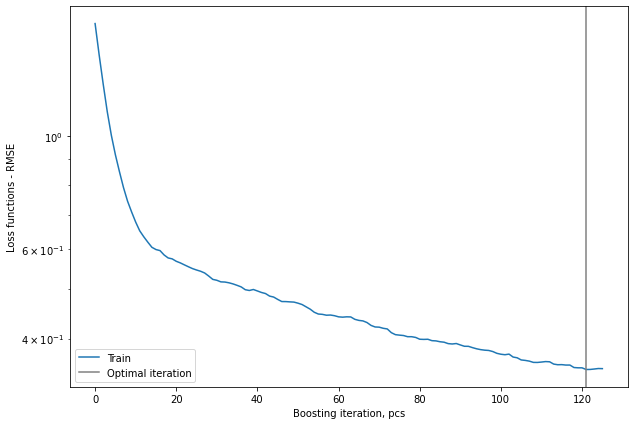

In [29]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [30]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [31]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()
print('Bias: %.1f' % (f_bias/f_n_sample))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: -0.0
Relative bias(%):  -0.32
RMSE: 0.3
Relative RMSE(%):  0.168
MSE: 0.1
R square: 90.3%


In [32]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

Optimal values of regression parameters
a0: 0.268
a1: 0.869
R^2: 0.904
Uncertainty
a0: 0.27+/-0.05
a1: 0.869+/-0.020


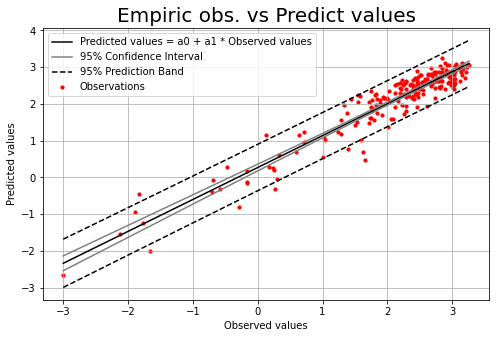

In [33]:
# Building linear a graph and calculation uncertainties
# retrieve parameter values
a0 = popt[0]
a1 = popt[1]
print('Optimal values of regression parameters')
print(f'a0: {a0:.3f}')
print(f'a1: {a1:.3f}')

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
f_r2 = round(r2, 3)
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(-3, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final the model***

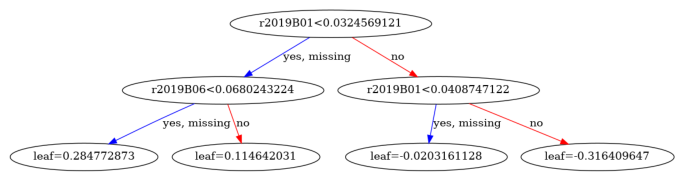

In [36]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=1) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [12, 45]
plt.show()

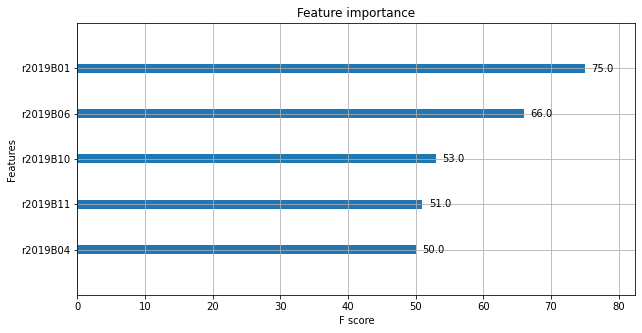

In [38]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

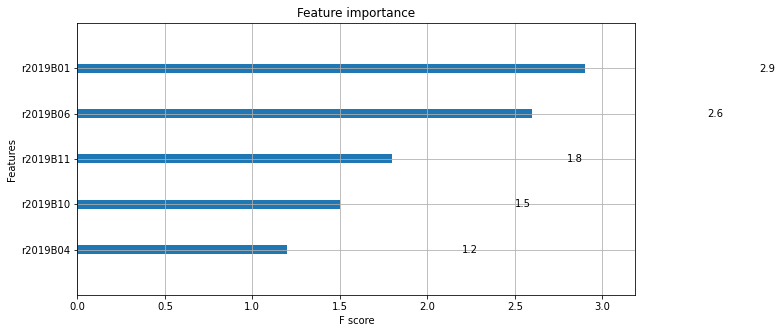

In [39]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

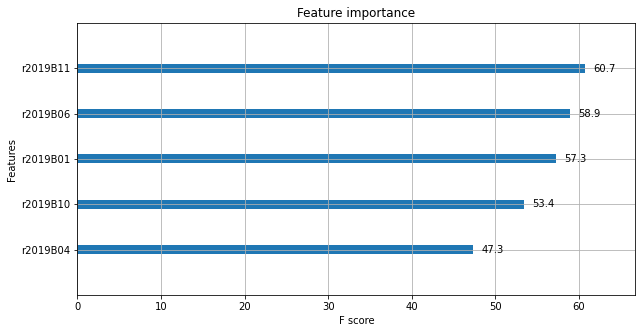

In [40]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# SHAP method

In [41]:
# Load SHAP`s library
import shap

In [42]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


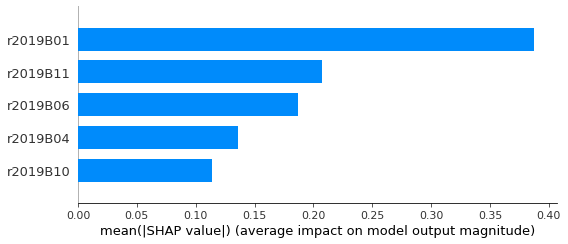

In [43]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

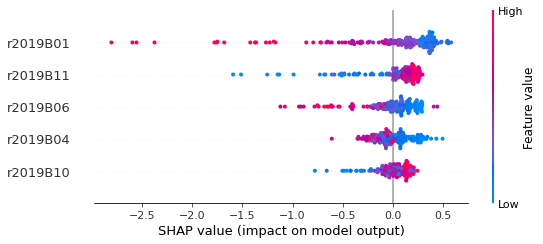

In [44]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

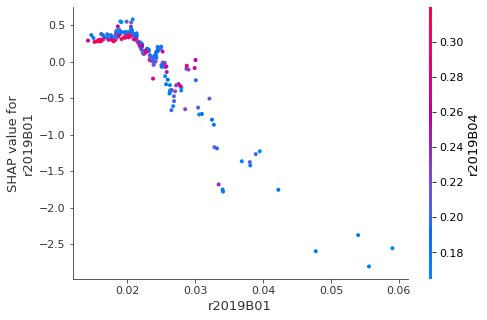

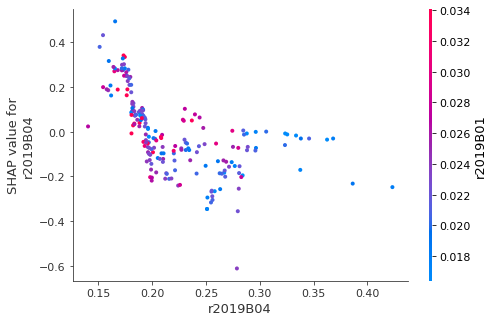

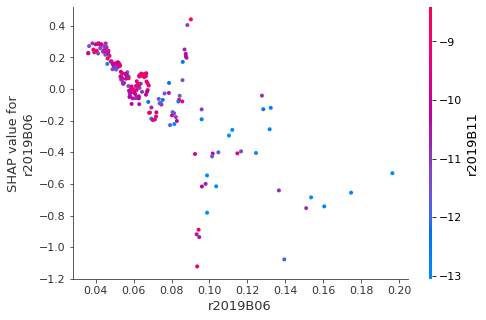

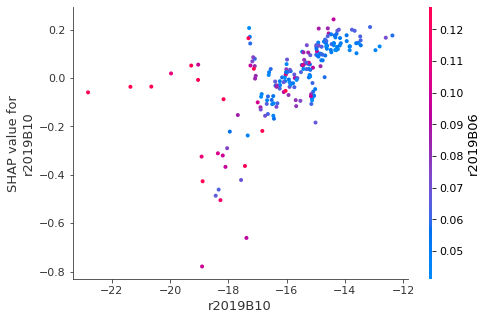

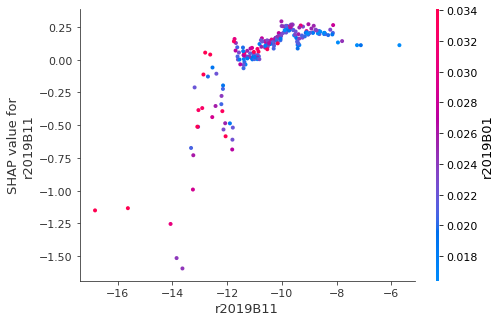

In [45]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [46]:
# Save to JSON
f_xgb_model.save_model("/home/dima/Desktop/WORK/GIS and ML algoritms/6_Est_RN&biomass_all_site_Sentinel/Nootbooks/XGB_model_AG_biomass_Sentinel_data.json")
# Save to text format
f_xgb_model.save_model("/home/dima/Desktop/WORK/GIS and ML algoritms/6_Est_RN&biomass_all_site_Sentinel/Nootbooks/XGB_model_AG_biomass_Sentinel_data.txt")